<a href="https://colab.research.google.com/github/iam1997/Project-Deep-Learning-of-Artificial-Intelligence/blob/main/Project_DL_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
# Import Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

### **Define all functions**

In [186]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters     


def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = W.dot(A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

def predict(X, y, parameters, test):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

  
    acurracy = np.sum((p == y)/m)
    if test == True:
      print("Accuracy of the training set: "  + str(np.sum((p == y)/m)))
    else:
      print("Accuracy of the test set:     "  + str(np.sum((p == y)/m)) + '\n')

    return p, acurracy

def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation= "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation= "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    print('Layer dimensions: ' + str(layers_dims))
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
       
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # Plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

def plotAcurracy(y_axis1, y_axis2, title):
  plt.figure(figsize=(16, 3))
  line1, = plt.plot(np.arange(len(y_axis1)),y_axis1, label = 'Training acurracy')
  line2, = plt.plot(np.arange(len(y_axis2)),y_axis2, label = 'Test acurracy')
  plt.legend(handles = [line1, line2])
  plt.title(title)
  plt.xlabel('Iteration')
  plt.ylabel('Acurracy')
  plt.show()


### **Import the MNIST-Dataset**

In [72]:
# Import the MNIST-Dataset
digits = load_digits()

In [73]:
#Split the dataset into training and test examples
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size= 0.2, random_state= 123)

In [74]:
# Convert the tuples to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Show the structure of the training dataset
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Number of training examples of the original dataset: ' + str(x_train.shape[0]))
print('Structure of the training dataset')
print(frequencies)

# Show the structure of the test dataset
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('\nNumber of test examples of the original dataset: ' + str(x_test.shape[0]))
print('Structure of the test dataset')
print(frequencies)

In [76]:
# Relabel the dataset to have only an one-class classification 
# Label 0 -> 0, 2, 3, 4, 5, 6, 7, 8, 9
# Label 1 -> 1
y_train = np.where(y_train == 1, y_train, 0)
y_test = np.where(y_test == 1, y_test, 0)

In [85]:
# Show the structure of the training dataset
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Number of training examples of the modified dataset: ' + str(x_train.shape[0]))
print('Structure of the training dataset')
print(frequencies)

# Show the structure of the test dataset
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('\nNumber of test examples of the modified dataset: ' + str(x_test.shape[0]))
print('Structure of the test dataset')
print(frequencies)

# Show the image size
print('\nEach image has the size: (' + str(int(X_train.shape[1]/8)) + ', ' + str(int(X_train.shape[1]/8)) + ', 1)')
print('--> Equal to ' + str(int(X_train.shape[1]*X_train.shape[1]*1/64)) + ' pixels')

Number of training examples of the modified dataset: 1437
Structure of the training dataset
[[   0 1289]
 [   1  148]]

Number of test examples of the modified dataset: 360
Structure of the test dataset
[[  0 326]
 [  1  34]]

Each image has the size: (8, 8, 1)
--> Equal to 64 pixels


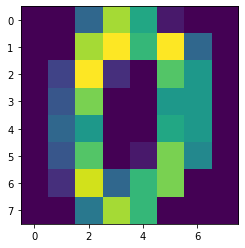

In [94]:
# Show a random image of the test dataset
plt.imshow(digits.images[0]);

In [95]:
# Reshape the dataset 
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T
y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

# Show the shapes of the dataset
print('Shape of x_train: ' + str(X_train_flatten.shape))
print('Shape of x_test: ' + str(X_test_flatten.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of y_test: ' + str(y_test.shape))

Shape of x_train: (64, 1437)
Shape of x_test: (64, 360)
Shape of y_train: (1, 1437)
Shape of y_test: (1, 360)


In [96]:
# Standardize the data to have feature values between 0 and 1.
X_train_standardize = X_train_flatten/255.
X_test_standardize = X_test_flatten/255.

### **2-Layer Neural Network**

Layer dimensions: [64, 1, 1]
Cost after iteration 0: 0.693183
Cost after iteration 100: 0.594452
Cost after iteration 200: 0.526141
Cost after iteration 300: 0.478164
Cost after iteration 400: 0.443838
Cost after iteration 500: 0.418808
Cost after iteration 600: 0.400225
Cost after iteration 700: 0.386200
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355398
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342969
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335137
Cost after iteration 2300: 0.334619
Cost after iteration 2400: 0.334181


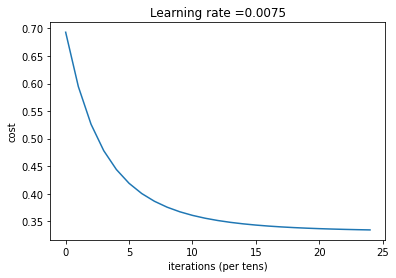

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 11, 1]
Cost after iteration 0: 0.688756
Cost after iteration 100: 0.544432
Cost after iteration 200: 0.450199
Cost after iteration 300: 0.398594
Cost after iteration 400: 0.369881
Cost after iteration 500: 0.353745
Cost after iteration 600: 0.344572
Cost after iteration 700: 0.339273
Cost after iteration 800: 0.336148
Cost after iteration 900: 0.334277
Cost after iteration 1000: 0.333161
Cost after iteration 1100: 0.332472
Cost after iteration 1200: 0.332028
Cost after iteration 1300: 0.331726
Cost after iteration 1400: 0.331507
Cost after iteration 1500: 0.331337
Cost after iteration 1600: 0.331196
Cost after iteration 1700: 0.331073
Cost after iteration 1800: 0.330960
Cost after iteration 1900: 0.330853
Cost after iteration 2000: 0.330750
Cost after iteration 2100: 0.330649
Cost after iteration 2200: 0.330550
Cost after iteration 2300: 0.330451
Cost after iteratio

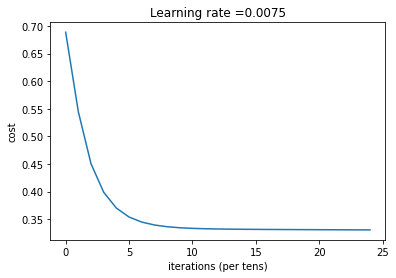

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 21, 1]
Cost after iteration 0: 0.683738
Cost after iteration 100: 0.542597
Cost after iteration 200: 0.458185
Cost after iteration 300: 0.407482
Cost after iteration 400: 0.377003
Cost after iteration 500: 0.358628
Cost after iteration 600: 0.347607
Cost after iteration 700: 0.341080
Cost after iteration 800: 0.337157
Cost after iteration 900: 0.334766
Cost after iteration 1000: 0.333286
Cost after iteration 1100: 0.332349
Cost after iteration 1200: 0.331740
Cost after iteration 1300: 0.331331
Cost after iteration 1400: 0.331044
Cost after iteration 1500: 0.330830
Cost after iteration 1600: 0.330658
Cost after iteration 1700: 0.330510
Cost after iteration 1800: 0.330372
Cost after iteration 1900: 0.330233
Cost after iteration 2000: 0.330068
Cost after iteration 2100: 0.329893
Cost after iteration 2200: 0.329749
Cost after iteration 2300: 0.329625
Cost after iteratio

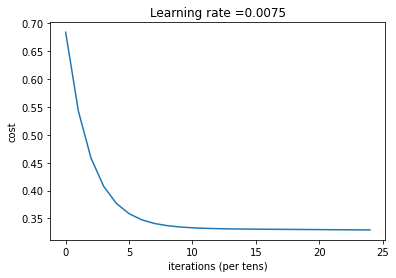

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 31, 1]
Cost after iteration 0: 0.691490
Cost after iteration 100: 0.558913
Cost after iteration 200: 0.476741
Cost after iteration 300: 0.423988
Cost after iteration 400: 0.390106
Cost after iteration 500: 0.368497
Cost after iteration 600: 0.354778
Cost after iteration 700: 0.346080
Cost after iteration 800: 0.340556
Cost after iteration 900: 0.337029
Cost after iteration 1000: 0.334758
Cost after iteration 1100: 0.333280
Cost after iteration 1200: 0.332302
Cost after iteration 1300: 0.331641
Cost after iteration 1400: 0.331181
Cost after iteration 1500: 0.330850
Cost after iteration 1600: 0.330599
Cost after iteration 1700: 0.330400
Cost after iteration 1800: 0.330234
Cost after iteration 1900: 0.330088
Cost after iteration 2000: 0.329956
Cost after iteration 2100: 0.329831
Cost after iteration 2200: 0.329711
Cost after iteration 2300: 0.329596
Cost after iteratio

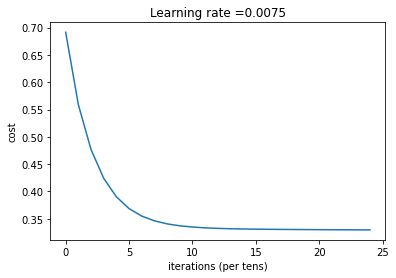

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 1]
Cost after iteration 0: 0.702064
Cost after iteration 100: 0.579045
Cost after iteration 200: 0.502571
Cost after iteration 300: 0.450435
Cost after iteration 400: 0.414199
Cost after iteration 500: 0.388843
Cost after iteration 600: 0.371049
Cost after iteration 700: 0.358551
Cost after iteration 800: 0.349767
Cost after iteration 900: 0.343574
Cost after iteration 1000: 0.339190
Cost after iteration 1100: 0.336092
Cost after iteration 1200: 0.333887
Cost after iteration 1300: 0.332303
Cost after iteration 1400: 0.331155
Cost after iteration 1500: 0.330315
Cost after iteration 1600: 0.329692
Cost after iteration 1700: 0.329221
Cost after iteration 1800: 0.328858
Cost after iteration 1900: 0.328570
Cost after iteration 2000: 0.328335
Cost after iteration 2100: 0.328140
Cost after iteration 2200: 0.327972
Cost after iteration 2300: 0.327824
Cost after iteratio

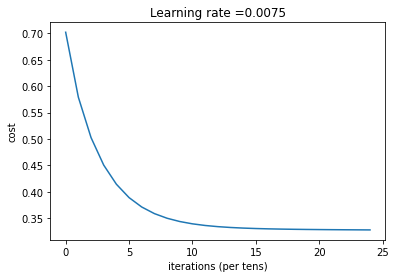

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 51, 1]
Cost after iteration 0: 0.690543
Cost after iteration 100: 0.560642
Cost after iteration 200: 0.478982
Cost after iteration 300: 0.425984
Cost after iteration 400: 0.391573
Cost after iteration 500: 0.369239
Cost after iteration 600: 0.354818
Cost after iteration 700: 0.345659
Cost after iteration 800: 0.339787
Cost after iteration 900: 0.335981
Cost after iteration 1000: 0.333486
Cost after iteration 1100: 0.331841
Cost after iteration 1200: 0.330726
Cost after iteration 1300: 0.329956
Cost after iteration 1400: 0.329399
Cost after iteration 1500: 0.328978
Cost after iteration 1600: 0.328661
Cost after iteration 1700: 0.328415
Cost after iteration 1800: 0.328215
Cost after iteration 1900: 0.328045
Cost after iteration 2000: 0.327893
Cost after iteration 2100: 0.327750
Cost after iteration 2200: 0.327618
Cost after iteration 2300: 0.327493
Cost after iteratio

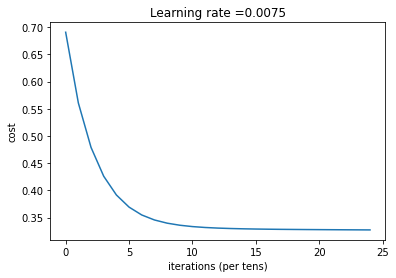

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 61, 1]
Cost after iteration 0: 0.704496
Cost after iteration 100: 0.572401
Cost after iteration 200: 0.488215
Cost after iteration 300: 0.433987
Cost after iteration 400: 0.398458
Cost after iteration 500: 0.375107
Cost after iteration 600: 0.359754
Cost after iteration 700: 0.349655
Cost after iteration 800: 0.342999
Cost after iteration 900: 0.338584
Cost after iteration 1000: 0.335635
Cost after iteration 1100: 0.333640
Cost after iteration 1200: 0.332264
Cost after iteration 1300: 0.331310
Cost after iteration 1400: 0.330636
Cost after iteration 1500: 0.330146
Cost after iteration 1600: 0.329776
Cost after iteration 1700: 0.329489
Cost after iteration 1800: 0.329260
Cost after iteration 1900: 0.329069
Cost after iteration 2000: 0.328904
Cost after iteration 2100: 0.328757
Cost after iteration 2200: 0.328622
Cost after iteration 2300: 0.328494
Cost after iteratio

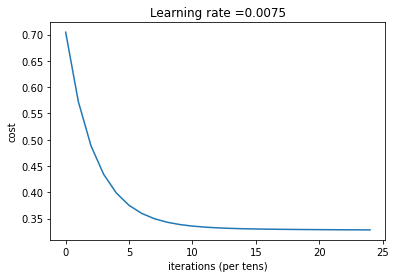

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556



In [149]:
# Define variables to save the results and the parameters
parameters_2L_cache = []
pred_train_2L_cache = []
pred_test_2L_cache = []

for neurons_L1 in range(1, x_train_flatten.shape[0]+1, 10):
  # Train the Neural Network
  layers_dims = [x_train_flatten.shape[0], neurons_L1 ,1]
  parameters = L_layer_model(x_train_standardize, y_train, layers_dims, num_iterations = 2500, print_cost = True)

  # Make the prediction with the training dataset
  pred_train, acurracy_train = predict(X_train_standardize, y_train, parameters, True)

  # Make the prediction with the training dataset
  pred_test, acurracy_test = predict(X_test_standardize, y_test, parameters, False)

  # Save parameters and results
  parameters_2L_cache.append(layers_dims)
  pred_train_2L_cache.append(acurracy_train)
  pred_test_2L_cache.append(acurracy_test)

### **3-Layer Neural Network**

Layer dimensions: [64, 1, 1, 1]
Cost after iteration 0: 0.693144
Cost after iteration 100: 0.593954
Cost after iteration 200: 0.525370
Cost after iteration 300: 0.477206
Cost after iteration 400: 0.442745
Cost after iteration 500: 0.417616
Cost after iteration 600: 0.398964
Cost after iteration 700: 0.384896
Cost after iteration 800: 0.374135
Cost after iteration 900: 0.365800
Cost after iteration 1000: 0.359274
Cost after iteration 1100: 0.354116
Cost after iteration 1200: 0.350005
Cost after iteration 1300: 0.346704
Cost after iteration 1400: 0.344035
Cost after iteration 1500: 0.341865
Cost after iteration 1600: 0.340085
Cost after iteration 1700: 0.338611
Cost after iteration 1800: 0.337379
Cost after iteration 1900: 0.336351
Cost after iteration 2000: 0.335513
Cost after iteration 2100: 0.334827
Cost after iteration 2200: 0.334262
Cost after iteration 2300: 0.333793
Cost after iteration 2400: 0.333404


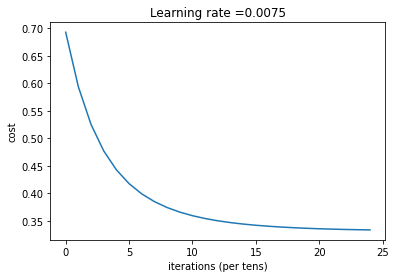

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 1, 1]
Cost after iteration 0: 0.692998
Cost after iteration 100: 0.594226
Cost after iteration 200: 0.525849
Cost after iteration 300: 0.477805
Cost after iteration 400: 0.443416
Cost after iteration 500: 0.418332
Cost after iteration 600: 0.399704
Cost after iteration 700: 0.385644
Cost after iteration 800: 0.374877
Cost after iteration 900: 0.366528
Cost after iteration 1000: 0.359980
Cost after iteration 1100: 0.354794
Cost after iteration 1200: 0.350652
Cost after iteration 1300: 0.347319
Cost after iteration 1400: 0.344619
Cost after iteration 1500: 0.342419
Cost after iteration 1600: 0.340617
Cost after iteration 1700: 0.339135
Cost after iteration 1800: 0.337911
Cost after iteration 1900: 0.336896
Cost after iteration 2000: 0.336052
Cost after iteration 2100: 0.335348
Cost after iteration 2200: 0.334759
Cost after iteration 2300: 0.334266
Cost after iterat

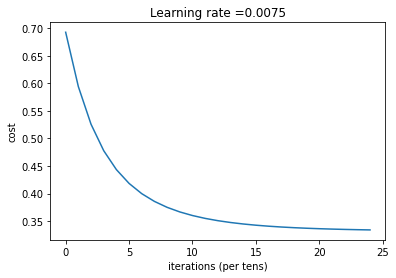

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 1, 1]
Cost after iteration 0: 0.692921
Cost after iteration 100: 0.590038
Cost after iteration 200: 0.518053
Cost after iteration 300: 0.467460
Cost after iteration 400: 0.431116
Cost after iteration 500: 0.404607
Cost after iteration 600: 0.385101
Cost after iteration 700: 0.370692
Cost after iteration 800: 0.360045
Cost after iteration 900: 0.352199
Cost after iteration 1000: 0.346440
Cost after iteration 1100: 0.342233
Cost after iteration 1200: 0.339175
Cost after iteration 1300: 0.336962
Cost after iteration 1400: 0.335366
Cost after iteration 1500: 0.334218
Cost after iteration 1600: 0.333393
Cost after iteration 1700: 0.332798
Cost after iteration 1800: 0.332368
Cost after iteration 1900: 0.332055
Cost after iteration 2000: 0.331821
Cost after iteration 2100: 0.331640
Cost after iteration 2200: 0.331498
Cost after iteration 2300: 0.331387
Cost after itera

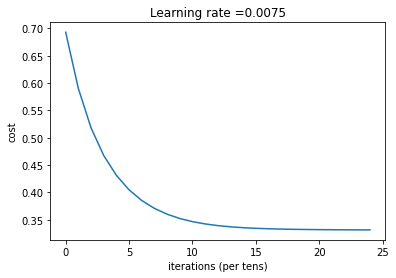

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 1, 1]
Cost after iteration 0: 0.693340
Cost after iteration 100: 0.594450
Cost after iteration 200: 0.526141
Cost after iteration 300: 0.478164
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400223
Cost after iteration 700: 0.386198
Cost after iteration 800: 0.375457
Cost after iteration 900: 0.367123
Cost after iteration 1000: 0.360582
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351248
Cost after iteration 1300: 0.347903
Cost after iteration 1400: 0.345187
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after itera

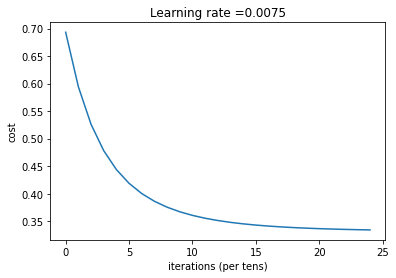

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 1, 1]
Cost after iteration 0: 0.692876
Cost after iteration 100: 0.557606
Cost after iteration 200: 0.465746
Cost after iteration 300: 0.408681
Cost after iteration 400: 0.374481
Cost after iteration 500: 0.354756
Cost after iteration 600: 0.343735
Cost after iteration 700: 0.337701
Cost after iteration 800: 0.334424
Cost after iteration 900: 0.332633
Cost after iteration 1000: 0.331633
Cost after iteration 1100: 0.331054
Cost after iteration 1200: 0.330700
Cost after iteration 1300: 0.330467
Cost after iteration 1400: 0.330297
Cost after iteration 1500: 0.330160
Cost after iteration 1600: 0.330034
Cost after iteration 1700: 0.329909
Cost after iteration 1800: 0.329755
Cost after iteration 1900: 0.329590
Cost after iteration 2000: 0.329459
Cost after iteration 2100: 0.329348
Cost after iteration 2200: 0.329245
Cost after iteration 2300: 0.329148
Cost after itera

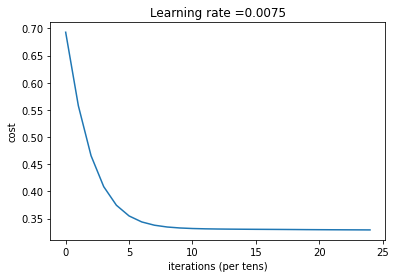

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 1, 1]
Cost after iteration 0: 0.694486
Cost after iteration 100: 0.594496
Cost after iteration 200: 0.526115
Cost after iteration 300: 0.478136
Cost after iteration 400: 0.443814
Cost after iteration 500: 0.418789
Cost after iteration 600: 0.400210
Cost after iteration 700: 0.386188
Cost after iteration 800: 0.375449
Cost after iteration 900: 0.367117
Cost after iteration 1000: 0.360577
Cost after iteration 1100: 0.355393
Cost after iteration 1200: 0.351245
Cost after iteration 1300: 0.347901
Cost after iteration 1400: 0.345185
Cost after iteration 1500: 0.342967
Cost after iteration 1600: 0.341143
Cost after iteration 1700: 0.339638
Cost after iteration 1800: 0.338389
Cost after iteration 1900: 0.337348
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after itera

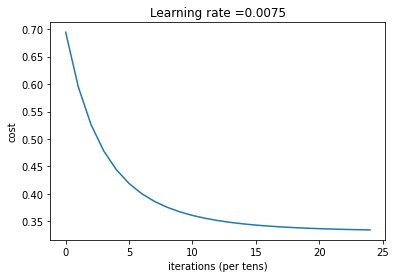

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 1, 1]
Cost after iteration 0: 0.688931
Cost after iteration 100: 0.572462
Cost after iteration 200: 0.493490
Cost after iteration 300: 0.438611
Cost after iteration 400: 0.400771
Cost after iteration 500: 0.375217
Cost after iteration 600: 0.358380
Cost after iteration 700: 0.347548
Cost after iteration 800: 0.340714
Cost after iteration 900: 0.336461
Cost after iteration 1000: 0.333830
Cost after iteration 1100: 0.332201
Cost after iteration 1200: 0.331169
Cost after iteration 1300: 0.330490
Cost after iteration 1400: 0.330040
Cost after iteration 1500: 0.329731
Cost after iteration 1600: 0.329520
Cost after iteration 1700: 0.329366
Cost after iteration 1800: 0.329247
Cost after iteration 1900: 0.329143
Cost after iteration 2000: 0.329048
Cost after iteration 2100: 0.328958
Cost after iteration 2200: 0.328872
Cost after iteration 2300: 0.328787
Cost after itera

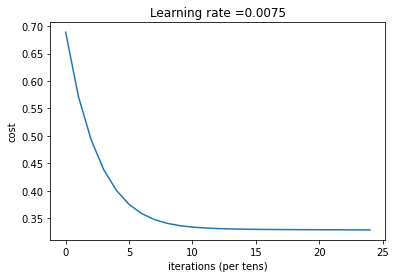

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 1, 1]
Cost after iteration 0: 0.693017
Cost after iteration 100: 0.594135
Cost after iteration 200: 0.525621
Cost after iteration 300: 0.477487
Cost after iteration 400: 0.443034
Cost after iteration 500: 0.417900
Cost after iteration 600: 0.399233
Cost after iteration 700: 0.385143
Cost after iteration 800: 0.374354
Cost after iteration 900: 0.365988
Cost after iteration 1000: 0.359429
Cost after iteration 1100: 0.354237
Cost after iteration 1200: 0.350093
Cost after iteration 1300: 0.346761
Cost after iteration 1400: 0.344064
Cost after iteration 1500: 0.341870
Cost after iteration 1600: 0.340076
Cost after iteration 1700: 0.338602
Cost after iteration 1800: 0.337386
Cost after iteration 1900: 0.336380
Cost after iteration 2000: 0.335546
Cost after iteration 2100: 0.334850
Cost after iteration 2200: 0.334270
Cost after iteration 2300: 0.333784
Cost after itera

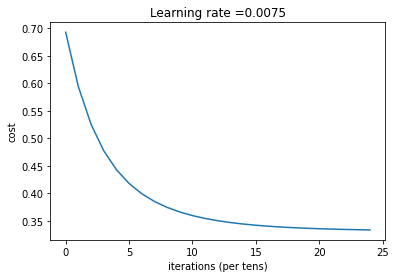

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 9, 1]
Cost after iteration 0: 0.693134
Cost after iteration 100: 0.557956
Cost after iteration 200: 0.469879
Cost after iteration 300: 0.410942
Cost after iteration 400: 0.374326
Cost after iteration 500: 0.352851
Cost after iteration 600: 0.341134
Cost after iteration 700: 0.335112
Cost after iteration 800: 0.332129
Cost after iteration 900: 0.330666
Cost after iteration 1000: 0.329929
Cost after iteration 1100: 0.329530
Cost after iteration 1200: 0.329285
Cost after iteration 1300: 0.329109
Cost after iteration 1400: 0.328963
Cost after iteration 1500: 0.328829
Cost after iteration 1600: 0.328698
Cost after iteration 1700: 0.328567
Cost after iteration 1800: 0.328433
Cost after iteration 1900: 0.328297
Cost after iteration 2000: 0.328158
Cost after iteration 2100: 0.328014
Cost after iteration 2200: 0.327867
Cost after iteration 2300: 0.327715
Cost after iterat

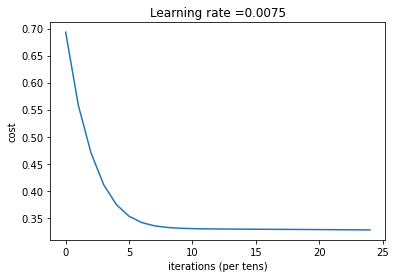

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 9, 1]
Cost after iteration 0: 0.689526
Cost after iteration 100: 0.507643
Cost after iteration 200: 0.416499
Cost after iteration 300: 0.371338
Cost after iteration 400: 0.349602
Cost after iteration 500: 0.339282
Cost after iteration 600: 0.334569
Cost after iteration 700: 0.332354
Cost after iteration 800: 0.331289
Cost after iteration 900: 0.330748
Cost after iteration 1000: 0.330445
Cost after iteration 1100: 0.330250
Cost after iteration 1200: 0.330105
Cost after iteration 1300: 0.329982
Cost after iteration 1400: 0.329868
Cost after iteration 1500: 0.329759
Cost after iteration 1600: 0.329652
Cost after iteration 1700: 0.329545
Cost after iteration 1800: 0.329437
Cost after iteration 1900: 0.329329
Cost after iteration 2000: 0.329222
Cost after iteration 2100: 0.329113
Cost after iteration 2200: 0.329004
Cost after iteration 2300: 0.328895
Cost after iterat

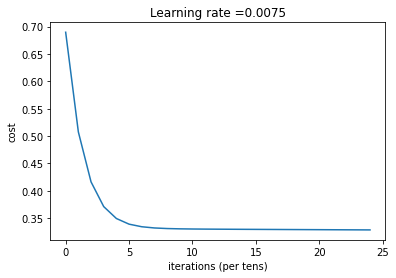

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 9, 1]
Cost after iteration 0: 0.698984
Cost after iteration 100: 0.571610
Cost after iteration 200: 0.480573
Cost after iteration 300: 0.422758
Cost after iteration 400: 0.386267
Cost after iteration 500: 0.363853
Cost after iteration 600: 0.350501
Cost after iteration 700: 0.342736
Cost after iteration 800: 0.338294
Cost after iteration 900: 0.335775
Cost after iteration 1000: 0.334349
Cost after iteration 1100: 0.333535
Cost after iteration 1200: 0.333062
Cost after iteration 1300: 0.332779
Cost after iteration 1400: 0.332598
Cost after iteration 1500: 0.332474
Cost after iteration 1600: 0.332380
Cost after iteration 1700: 0.332300
Cost after iteration 1800: 0.332227
Cost after iteration 1900: 0.332149
Cost after iteration 2000: 0.332025
Cost after iteration 2100: 0.331885
Cost after iteration 2200: 0.331795
Cost after iteration 2300: 0.331729
Cost after itera

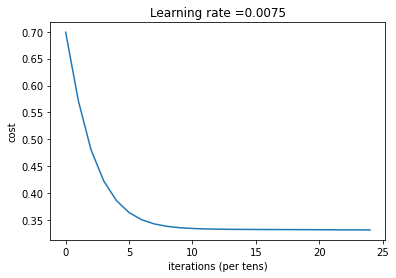

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 9, 1]
Cost after iteration 0: 0.683538
Cost after iteration 100: 0.558126
Cost after iteration 200: 0.471481
Cost after iteration 300: 0.412318
Cost after iteration 400: 0.374855
Cost after iteration 500: 0.353282
Cost after iteration 600: 0.341697
Cost after iteration 700: 0.335744
Cost after iteration 800: 0.332742
Cost after iteration 900: 0.331211
Cost after iteration 1000: 0.330387
Cost after iteration 1100: 0.329899
Cost after iteration 1200: 0.329601
Cost after iteration 1300: 0.329410
Cost after iteration 1400: 0.329265
Cost after iteration 1500: 0.329143
Cost after iteration 1600: 0.329032
Cost after iteration 1700: 0.328925
Cost after iteration 1800: 0.328821
Cost after iteration 1900: 0.328718
Cost after iteration 2000: 0.328615
Cost after iteration 2100: 0.328512
Cost after iteration 2200: 0.328408
Cost after iteration 2300: 0.328303
Cost after itera

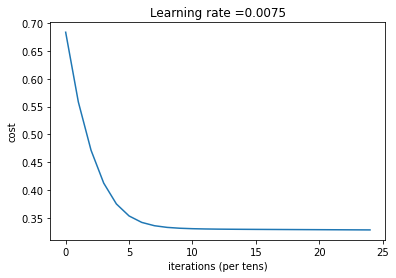

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 9, 1]
Cost after iteration 0: 0.697723
Cost after iteration 100: 0.583359
Cost after iteration 200: 0.505219
Cost after iteration 300: 0.450039
Cost after iteration 400: 0.411513
Cost after iteration 500: 0.384824
Cost after iteration 600: 0.366520
Cost after iteration 700: 0.354154
Cost after iteration 800: 0.345921
Cost after iteration 900: 0.340511
Cost after iteration 1000: 0.336982
Cost after iteration 1100: 0.334697
Cost after iteration 1200: 0.333214
Cost after iteration 1300: 0.332250
Cost after iteration 1400: 0.331619
Cost after iteration 1500: 0.331196
Cost after iteration 1600: 0.330905
Cost after iteration 1700: 0.330695
Cost after iteration 1800: 0.330531
Cost after iteration 1900: 0.330399
Cost after iteration 2000: 0.330282
Cost after iteration 2100: 0.330171
Cost after iteration 2200: 0.330051
Cost after iteration 2300: 0.329909
Cost after itera

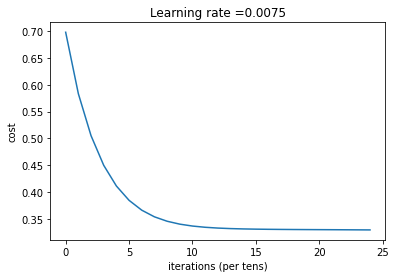

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 9, 1]
Cost after iteration 0: 0.691087
Cost after iteration 100: 0.543836
Cost after iteration 200: 0.441992
Cost after iteration 300: 0.388424
Cost after iteration 400: 0.360633
Cost after iteration 500: 0.346400
Cost after iteration 600: 0.339126
Cost after iteration 700: 0.335363
Cost after iteration 800: 0.333389
Cost after iteration 900: 0.332315
Cost after iteration 1000: 0.331697
Cost after iteration 1100: 0.331307
Cost after iteration 1200: 0.331030
Cost after iteration 1300: 0.330809
Cost after iteration 1400: 0.330616
Cost after iteration 1500: 0.330437
Cost after iteration 1600: 0.330243
Cost after iteration 1700: 0.330010
Cost after iteration 1800: 0.329800
Cost after iteration 1900: 0.329627
Cost after iteration 2000: 0.329470
Cost after iteration 2100: 0.329325
Cost after iteration 2200: 0.329187
Cost after iteration 2300: 0.329054
Cost after itera

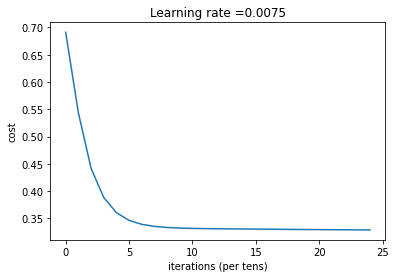

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 9, 1]
Cost after iteration 0: 0.687035
Cost after iteration 100: 0.523650
Cost after iteration 200: 0.430087
Cost after iteration 300: 0.380419
Cost after iteration 400: 0.354678
Cost after iteration 500: 0.341616
Cost after iteration 600: 0.335031
Cost after iteration 700: 0.331669
Cost after iteration 800: 0.329861
Cost after iteration 900: 0.328846
Cost after iteration 1000: 0.328243
Cost after iteration 1100: 0.327866
Cost after iteration 1200: 0.327601
Cost after iteration 1300: 0.327389
Cost after iteration 1400: 0.327201
Cost after iteration 1500: 0.327023
Cost after iteration 1600: 0.326845
Cost after iteration 1700: 0.326666
Cost after iteration 1800: 0.326494
Cost after iteration 1900: 0.326328
Cost after iteration 2000: 0.326164
Cost after iteration 2100: 0.326002
Cost after iteration 2200: 0.325840
Cost after iteration 2300: 0.325676
Cost after itera

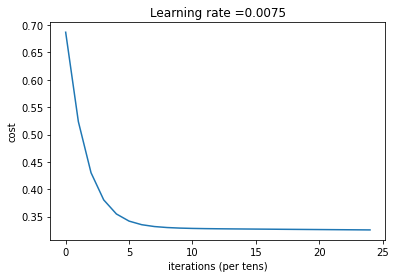

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 9, 1]
Cost after iteration 0: 0.685906
Cost after iteration 100: 0.537593
Cost after iteration 200: 0.446597
Cost after iteration 300: 0.392964
Cost after iteration 400: 0.363103
Cost after iteration 500: 0.347151
Cost after iteration 600: 0.339156
Cost after iteration 700: 0.335169
Cost after iteration 800: 0.333143
Cost after iteration 900: 0.332059
Cost after iteration 1000: 0.331445
Cost after iteration 1100: 0.331068
Cost after iteration 1200: 0.330806
Cost after iteration 1300: 0.330609
Cost after iteration 1400: 0.330448
Cost after iteration 1500: 0.330300
Cost after iteration 1600: 0.330157
Cost after iteration 1700: 0.330016
Cost after iteration 1800: 0.329880
Cost after iteration 1900: 0.329748
Cost after iteration 2000: 0.329617
Cost after iteration 2100: 0.329486
Cost after iteration 2200: 0.329356
Cost after iteration 2300: 0.329224
Cost after itera

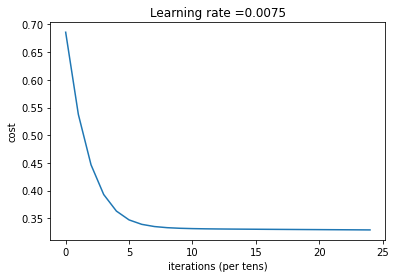

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 17, 1]
Cost after iteration 0: 0.693188
Cost after iteration 100: 0.593659
Cost after iteration 200: 0.524893
Cost after iteration 300: 0.476612
Cost after iteration 400: 0.442068
Cost after iteration 500: 0.416882
Cost after iteration 600: 0.398194
Cost after iteration 700: 0.384108
Cost after iteration 800: 0.373343
Cost after iteration 900: 0.365017
Cost after iteration 1000: 0.358511
Cost after iteration 1100: 0.353381
Cost after iteration 1200: 0.349307
Cost after iteration 1300: 0.346048
Cost after iteration 1400: 0.343427
Cost after iteration 1500: 0.341308
Cost after iteration 1600: 0.339589
Cost after iteration 1700: 0.338188
Cost after iteration 1800: 0.337043
Cost after iteration 1900: 0.336105
Cost after iteration 2000: 0.335334
Cost after iteration 2100: 0.334699
Cost after iteration 2200: 0.334175
Cost after iteration 2300: 0.333742
Cost after itera

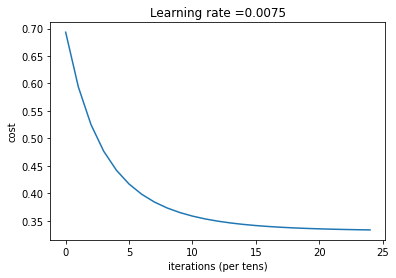

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 17, 1]
Cost after iteration 0: 0.695713
Cost after iteration 100: 0.565889
Cost after iteration 200: 0.481216
Cost after iteration 300: 0.423409
Cost after iteration 400: 0.385398
Cost after iteration 500: 0.361803
Cost after iteration 600: 0.347957
Cost after iteration 700: 0.340175
Cost after iteration 800: 0.335919
Cost after iteration 900: 0.333617
Cost after iteration 1000: 0.332368
Cost after iteration 1100: 0.331669
Cost after iteration 1200: 0.331264
Cost after iteration 1300: 0.331013
Cost after iteration 1400: 0.330851
Cost after iteration 1500: 0.330734
Cost after iteration 1600: 0.330640
Cost after iteration 1700: 0.330559
Cost after iteration 1800: 0.330485
Cost after iteration 1900: 0.330415
Cost after iteration 2000: 0.330346
Cost after iteration 2100: 0.330276
Cost after iteration 2200: 0.330205
Cost after iteration 2300: 0.330135
Cost after itera

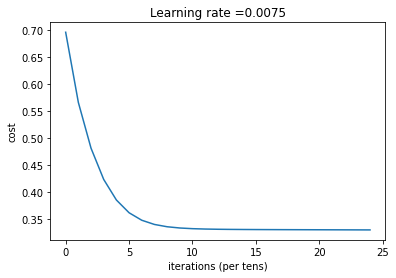

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 17, 1]
Cost after iteration 0: 0.688125
Cost after iteration 100: 0.526203
Cost after iteration 200: 0.432740
Cost after iteration 300: 0.381605
Cost after iteration 400: 0.355599
Cost after iteration 500: 0.342882
Cost after iteration 600: 0.336714
Cost after iteration 700: 0.333923
Cost after iteration 800: 0.332664
Cost after iteration 900: 0.332053
Cost after iteration 1000: 0.331722
Cost after iteration 1100: 0.331507
Cost after iteration 1200: 0.331338
Cost after iteration 1300: 0.331189
Cost after iteration 1400: 0.331065
Cost after iteration 1500: 0.330961
Cost after iteration 1600: 0.330864
Cost after iteration 1700: 0.330770
Cost after iteration 1800: 0.330677
Cost after iteration 1900: 0.330585
Cost after iteration 2000: 0.330493
Cost after iteration 2100: 0.330401
Cost after iteration 2200: 0.330310
Cost after iteration 2300: 0.330217
Cost after iter

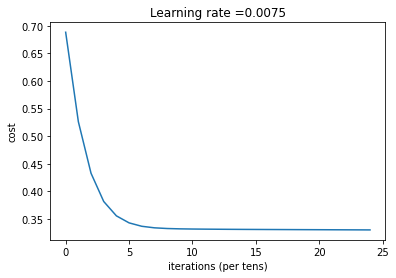

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 17, 1]
Cost after iteration 0: 0.693156
Cost after iteration 100: 0.554119
Cost after iteration 200: 0.462886
Cost after iteration 300: 0.403340
Cost after iteration 400: 0.368241
Cost after iteration 500: 0.349220
Cost after iteration 600: 0.339512
Cost after iteration 700: 0.334710
Cost after iteration 800: 0.332337
Cost after iteration 900: 0.331135
Cost after iteration 1000: 0.330493
Cost after iteration 1100: 0.330115
Cost after iteration 1200: 0.329863
Cost after iteration 1300: 0.329669
Cost after iteration 1400: 0.329498
Cost after iteration 1500: 0.329344
Cost after iteration 1600: 0.329200
Cost after iteration 1700: 0.329063
Cost after iteration 1800: 0.328929
Cost after iteration 1900: 0.328798
Cost after iteration 2000: 0.328670
Cost after iteration 2100: 0.328542
Cost after iteration 2200: 0.328415
Cost after iteration 2300: 0.328287
Cost after iter

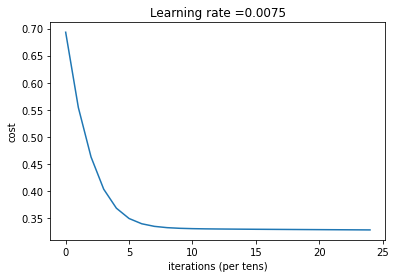

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 17, 1]
Cost after iteration 0: 0.683445
Cost after iteration 100: 0.533472
Cost after iteration 200: 0.443316
Cost after iteration 300: 0.391068
Cost after iteration 400: 0.361899
Cost after iteration 500: 0.346199
Cost after iteration 600: 0.338001
Cost after iteration 700: 0.333702
Cost after iteration 800: 0.331461
Cost after iteration 900: 0.330264
Cost after iteration 1000: 0.329595
Cost after iteration 1100: 0.329199
Cost after iteration 1200: 0.328940
Cost after iteration 1300: 0.328751
Cost after iteration 1400: 0.328597
Cost after iteration 1500: 0.328462
Cost after iteration 1600: 0.328337
Cost after iteration 1700: 0.328216
Cost after iteration 1800: 0.328096
Cost after iteration 1900: 0.327976
Cost after iteration 2000: 0.327857
Cost after iteration 2100: 0.327736
Cost after iteration 2200: 0.327615
Cost after iteration 2300: 0.327492
Cost after iter

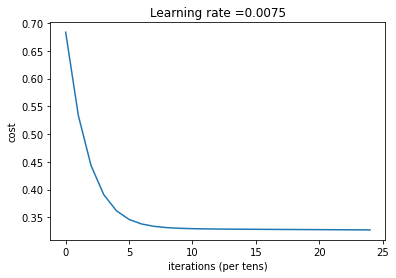

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 17, 1]
Cost after iteration 0: 0.688712
Cost after iteration 100: 0.534604
Cost after iteration 200: 0.443519
Cost after iteration 300: 0.390112
Cost after iteration 400: 0.360798
Cost after iteration 500: 0.345667
Cost after iteration 600: 0.338138
Cost after iteration 700: 0.334389
Cost after iteration 800: 0.332371
Cost after iteration 900: 0.331204
Cost after iteration 1000: 0.330449
Cost after iteration 1100: 0.329932
Cost after iteration 1200: 0.329571
Cost after iteration 1300: 0.329290
Cost after iteration 1400: 0.329037
Cost after iteration 1500: 0.328794
Cost after iteration 1600: 0.328557
Cost after iteration 1700: 0.328329
Cost after iteration 1800: 0.328108
Cost after iteration 1900: 0.327894
Cost after iteration 2000: 0.327695
Cost after iteration 2100: 0.327505
Cost after iteration 2200: 0.327319
Cost after iteration 2300: 0.327136
Cost after iter

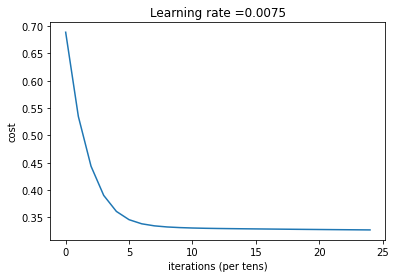

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 17, 1]
Cost after iteration 0: 0.694206
Cost after iteration 100: 0.552944
Cost after iteration 200: 0.462963
Cost after iteration 300: 0.406593
Cost after iteration 400: 0.372856
Cost after iteration 500: 0.353677
Cost after iteration 600: 0.343201
Cost after iteration 700: 0.337613
Cost after iteration 800: 0.334653
Cost after iteration 900: 0.333075
Cost after iteration 1000: 0.332211
Cost after iteration 1100: 0.331716
Cost after iteration 1200: 0.331408
Cost after iteration 1300: 0.331196
Cost after iteration 1400: 0.331033
Cost after iteration 1500: 0.330869
Cost after iteration 1600: 0.330705
Cost after iteration 1700: 0.330528
Cost after iteration 1800: 0.330197
Cost after iteration 1900: 0.329987
Cost after iteration 2000: 0.329800
Cost after iteration 2100: 0.329622
Cost after iteration 2200: 0.329452
Cost after iteration 2300: 0.329297
Cost after iter

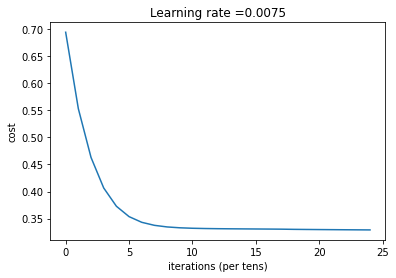

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 17, 1]
Cost after iteration 0: 0.690574
Cost after iteration 100: 0.559631
Cost after iteration 200: 0.474831
Cost after iteration 300: 0.418584
Cost after iteration 400: 0.382453
Cost after iteration 500: 0.360215
Cost after iteration 600: 0.347014
Cost after iteration 700: 0.339357
Cost after iteration 800: 0.334931
Cost after iteration 900: 0.332305
Cost after iteration 1000: 0.330758
Cost after iteration 1100: 0.329848
Cost after iteration 1200: 0.329265
Cost after iteration 1300: 0.328862
Cost after iteration 1400: 0.328556
Cost after iteration 1500: 0.328300
Cost after iteration 1600: 0.328077
Cost after iteration 1700: 0.327879
Cost after iteration 1800: 0.327697
Cost after iteration 1900: 0.327525
Cost after iteration 2000: 0.327362
Cost after iteration 2100: 0.327205
Cost after iteration 2200: 0.327050
Cost after iteration 2300: 0.326896
Cost after iter

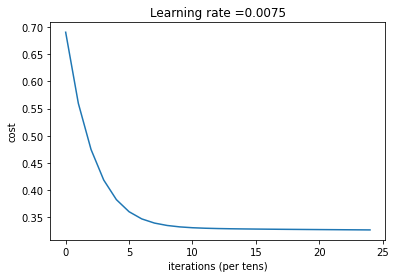

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 25, 1]
Cost after iteration 0: 0.693116
Cost after iteration 100: 0.575056
Cost after iteration 200: 0.477380
Cost after iteration 300: 0.404504
Cost after iteration 400: 0.359046
Cost after iteration 500: 0.338764
Cost after iteration 600: 0.331702
Cost after iteration 700: 0.329454
Cost after iteration 800: 0.328679
Cost after iteration 900: 0.328322
Cost after iteration 1000: 0.328077
Cost after iteration 1100: 0.327860
Cost after iteration 1200: 0.327646
Cost after iteration 1300: 0.327430
Cost after iteration 1400: 0.327210
Cost after iteration 1500: 0.326984
Cost after iteration 1600: 0.326753
Cost after iteration 1700: 0.326517
Cost after iteration 1800: 0.326274
Cost after iteration 1900: 0.326024
Cost after iteration 2000: 0.325768
Cost after iteration 2100: 0.325505
Cost after iteration 2200: 0.325234
Cost after iteration 2300: 0.324954
Cost after itera

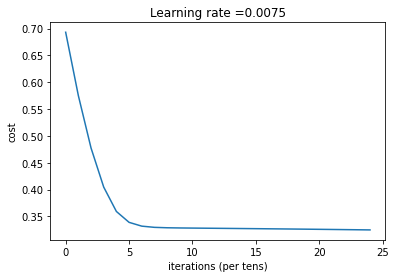

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 25, 1]
Cost after iteration 0: 0.698336
Cost after iteration 100: 0.558168
Cost after iteration 200: 0.469371
Cost after iteration 300: 0.410169
Cost after iteration 400: 0.373291
Cost after iteration 500: 0.352174
Cost after iteration 600: 0.340870
Cost after iteration 700: 0.335045
Cost after iteration 800: 0.332068
Cost after iteration 900: 0.330553
Cost after iteration 1000: 0.329769
Cost after iteration 1100: 0.329340
Cost after iteration 1200: 0.329079
Cost after iteration 1300: 0.328896
Cost after iteration 1400: 0.328751
Cost after iteration 1500: 0.328619
Cost after iteration 1600: 0.328480
Cost after iteration 1700: 0.328332
Cost after iteration 1800: 0.328168
Cost after iteration 1900: 0.328025
Cost after iteration 2000: 0.327895
Cost after iteration 2100: 0.327768
Cost after iteration 2200: 0.327642
Cost after iteration 2300: 0.327515
Cost after itera

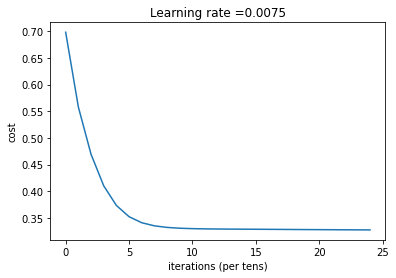

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 25, 1]
Cost after iteration 0: 0.684445
Cost after iteration 100: 0.504623
Cost after iteration 200: 0.406208
Cost after iteration 300: 0.360979
Cost after iteration 400: 0.342919
Cost after iteration 500: 0.335959
Cost after iteration 600: 0.333268
Cost after iteration 700: 0.332173
Cost after iteration 800: 0.331670
Cost after iteration 900: 0.331390
Cost after iteration 1000: 0.331195
Cost after iteration 1100: 0.331031
Cost after iteration 1200: 0.330879
Cost after iteration 1300: 0.330732
Cost after iteration 1400: 0.330586
Cost after iteration 1500: 0.330441
Cost after iteration 1600: 0.330297
Cost after iteration 1700: 0.330152
Cost after iteration 1800: 0.330007
Cost after iteration 1900: 0.329861
Cost after iteration 2000: 0.329714
Cost after iteration 2100: 0.329566
Cost after iteration 2200: 0.329417
Cost after iteration 2300: 0.329267
Cost after iter

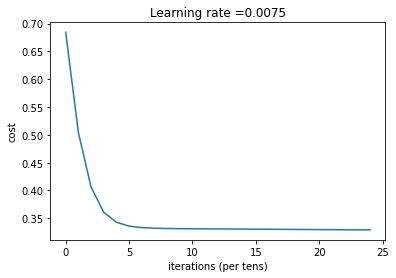

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 25, 1]
Cost after iteration 0: 0.693421
Cost after iteration 100: 0.550809
Cost after iteration 200: 0.456878
Cost after iteration 300: 0.396729
Cost after iteration 400: 0.361876
Cost after iteration 500: 0.343987
Cost after iteration 600: 0.335462
Cost after iteration 700: 0.331505
Cost after iteration 800: 0.329656
Cost after iteration 900: 0.328754
Cost after iteration 1000: 0.328267
Cost after iteration 1100: 0.327957
Cost after iteration 1200: 0.327733
Cost after iteration 1300: 0.327552
Cost after iteration 1400: 0.327391
Cost after iteration 1500: 0.327240
Cost after iteration 1600: 0.327092
Cost after iteration 1700: 0.326948
Cost after iteration 1800: 0.326805
Cost after iteration 1900: 0.326663
Cost after iteration 2000: 0.326520
Cost after iteration 2100: 0.326376
Cost after iteration 2200: 0.326231
Cost after iteration 2300: 0.326084
Cost after iter

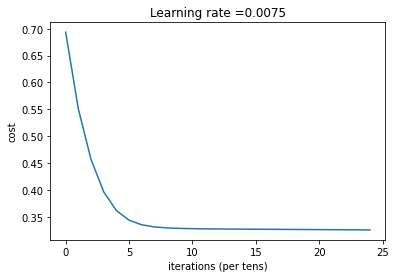

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 25, 1]
Cost after iteration 0: 0.698399
Cost after iteration 100: 0.583411
Cost after iteration 200: 0.504095
Cost after iteration 300: 0.448638
Cost after iteration 400: 0.409543
Cost after iteration 500: 0.380952
Cost after iteration 600: 0.361198
Cost after iteration 700: 0.348937
Cost after iteration 800: 0.341403
Cost after iteration 900: 0.336797
Cost after iteration 1000: 0.333957
Cost after iteration 1100: 0.332139
Cost after iteration 1200: 0.331009
Cost after iteration 1300: 0.330289
Cost after iteration 1400: 0.329797
Cost after iteration 1500: 0.329448
Cost after iteration 1600: 0.329170
Cost after iteration 1700: 0.328947
Cost after iteration 1800: 0.328764
Cost after iteration 1900: 0.328605
Cost after iteration 2000: 0.328459
Cost after iteration 2100: 0.328319
Cost after iteration 2200: 0.328187
Cost after iteration 2300: 0.328060
Cost after iter

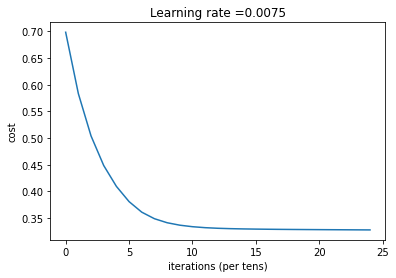

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 25, 1]
Cost after iteration 0: 0.682458
Cost after iteration 100: 0.499788
Cost after iteration 200: 0.406095
Cost after iteration 300: 0.362628
Cost after iteration 400: 0.343721
Cost after iteration 500: 0.335720
Cost after iteration 600: 0.332314
Cost after iteration 700: 0.330800
Cost after iteration 800: 0.330066
Cost after iteration 900: 0.329655
Cost after iteration 1000: 0.329381
Cost after iteration 1100: 0.329167
Cost after iteration 1200: 0.328978
Cost after iteration 1300: 0.328802
Cost after iteration 1400: 0.328633
Cost after iteration 1500: 0.328467
Cost after iteration 1600: 0.328304
Cost after iteration 1700: 0.328143
Cost after iteration 1800: 0.327983
Cost after iteration 1900: 0.327822
Cost after iteration 2000: 0.327661
Cost after iteration 2100: 0.327499
Cost after iteration 2200: 0.327337
Cost after iteration 2300: 0.327174
Cost after iter

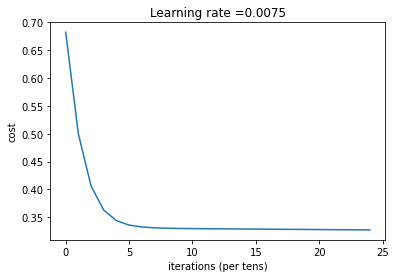

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 25, 1]
Cost after iteration 0: 0.689637
Cost after iteration 100: 0.568432
Cost after iteration 200: 0.482153
Cost after iteration 300: 0.424471
Cost after iteration 400: 0.386643
Cost after iteration 500: 0.362758
Cost after iteration 600: 0.348303
Cost after iteration 700: 0.339858
Cost after iteration 800: 0.335026
Cost after iteration 900: 0.332276
Cost after iteration 1000: 0.330695
Cost after iteration 1100: 0.329754
Cost after iteration 1200: 0.329173
Cost after iteration 1300: 0.328786
Cost after iteration 1400: 0.328505
Cost after iteration 1500: 0.328287
Cost after iteration 1600: 0.328101
Cost after iteration 1700: 0.327942
Cost after iteration 1800: 0.327798
Cost after iteration 1900: 0.327662
Cost after iteration 2000: 0.327529
Cost after iteration 2100: 0.327401
Cost after iteration 2200: 0.327274
Cost after iteration 2300: 0.327147
Cost after iter

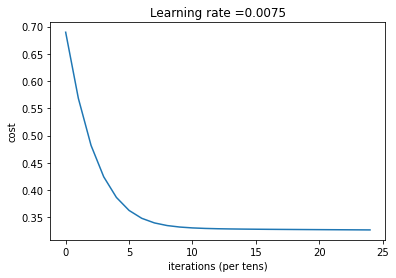

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 25, 1]
Cost after iteration 0: 0.680287
Cost after iteration 100: 0.511144
Cost after iteration 200: 0.413720
Cost after iteration 300: 0.366330
Cost after iteration 400: 0.344987
Cost after iteration 500: 0.335681
Cost after iteration 600: 0.331690
Cost after iteration 700: 0.329931
Cost after iteration 800: 0.329093
Cost after iteration 900: 0.328611
Cost after iteration 1000: 0.328253
Cost after iteration 1100: 0.327916
Cost after iteration 1200: 0.327623
Cost after iteration 1300: 0.327362
Cost after iteration 1400: 0.327120
Cost after iteration 1500: 0.326887
Cost after iteration 1600: 0.326655
Cost after iteration 1700: 0.326427
Cost after iteration 1800: 0.326195
Cost after iteration 1900: 0.325955
Cost after iteration 2000: 0.325702
Cost after iteration 2100: 0.325450
Cost after iteration 2200: 0.325197
Cost after iteration 2300: 0.324945
Cost after iter

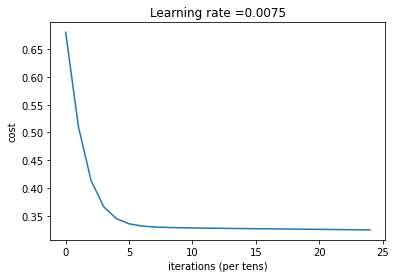

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 33, 1]
Cost after iteration 0: 0.693220
Cost after iteration 100: 0.563867
Cost after iteration 200: 0.482093
Cost after iteration 300: 0.429195
Cost after iteration 400: 0.394799
Cost after iteration 500: 0.372478
Cost after iteration 600: 0.358038
Cost after iteration 700: 0.348713
Cost after iteration 800: 0.342693
Cost after iteration 900: 0.338804
Cost after iteration 1000: 0.336287
Cost after iteration 1100: 0.334655
Cost after iteration 1200: 0.333595
Cost after iteration 1300: 0.332906
Cost after iteration 1400: 0.332457
Cost after iteration 1500: 0.332163
Cost after iteration 1600: 0.331972
Cost after iteration 1700: 0.331846
Cost after iteration 1800: 0.331764
Cost after iteration 1900: 0.331711
Cost after iteration 2000: 0.331675
Cost after iteration 2100: 0.331652
Cost after iteration 2200: 0.331637
Cost after iteration 2300: 0.331627
Cost after itera

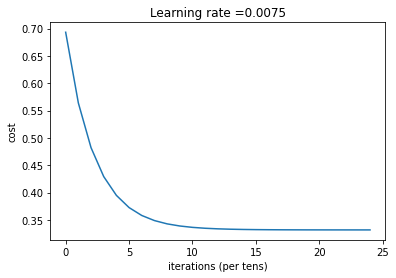

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 33, 1]
Cost after iteration 0: 0.690254
Cost after iteration 100: 0.549817
Cost after iteration 200: 0.460179
Cost after iteration 300: 0.403302
Cost after iteration 400: 0.369477
Cost after iteration 500: 0.350787
Cost after iteration 600: 0.341025
Cost after iteration 700: 0.336083
Cost after iteration 800: 0.333581
Cost after iteration 900: 0.332274
Cost after iteration 1000: 0.331545
Cost after iteration 1100: 0.331120
Cost after iteration 1200: 0.330851
Cost after iteration 1300: 0.330658
Cost after iteration 1400: 0.330513
Cost after iteration 1500: 0.330390
Cost after iteration 1600: 0.330279
Cost after iteration 1700: 0.330174
Cost after iteration 1800: 0.330072
Cost after iteration 1900: 0.329971
Cost after iteration 2000: 0.329870
Cost after iteration 2100: 0.329769
Cost after iteration 2200: 0.329668
Cost after iteration 2300: 0.329566
Cost after itera

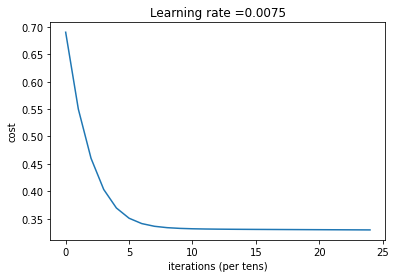

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 33, 1]
Cost after iteration 0: 0.699329
Cost after iteration 100: 0.538390
Cost after iteration 200: 0.443574
Cost after iteration 300: 0.388233
Cost after iteration 400: 0.358566
Cost after iteration 500: 0.343756
Cost after iteration 600: 0.336659
Cost after iteration 700: 0.333275
Cost after iteration 800: 0.331618
Cost after iteration 900: 0.330762
Cost after iteration 1000: 0.330278
Cost after iteration 1100: 0.329964
Cost after iteration 1200: 0.329732
Cost after iteration 1300: 0.329525
Cost after iteration 1400: 0.329306
Cost after iteration 1500: 0.329054
Cost after iteration 1600: 0.328822
Cost after iteration 1700: 0.328613
Cost after iteration 1800: 0.328439
Cost after iteration 1900: 0.328281
Cost after iteration 2000: 0.328129
Cost after iteration 2100: 0.327978
Cost after iteration 2200: 0.327826
Cost after iteration 2300: 0.327672
Cost after iter

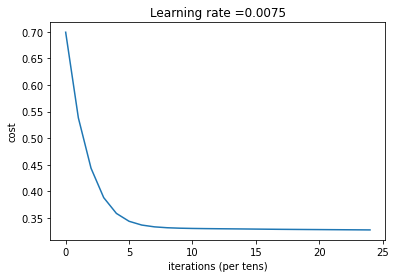

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 33, 1]
Cost after iteration 0: 0.684425
Cost after iteration 100: 0.534505
Cost after iteration 200: 0.437857
Cost after iteration 300: 0.383410
Cost after iteration 400: 0.355438
Cost after iteration 500: 0.341850
Cost after iteration 600: 0.335435
Cost after iteration 700: 0.332398
Cost after iteration 800: 0.330934
Cost after iteration 900: 0.330193
Cost after iteration 1000: 0.329787
Cost after iteration 1100: 0.329536
Cost after iteration 1200: 0.329359
Cost after iteration 1300: 0.329217
Cost after iteration 1400: 0.329090
Cost after iteration 1500: 0.328971
Cost after iteration 1600: 0.328854
Cost after iteration 1700: 0.328739
Cost after iteration 1800: 0.328624
Cost after iteration 1900: 0.328509
Cost after iteration 2000: 0.328393
Cost after iteration 2100: 0.328277
Cost after iteration 2200: 0.328161
Cost after iteration 2300: 0.328043
Cost after iter

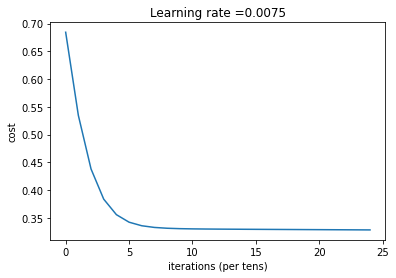

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 33, 1]
Cost after iteration 0: 0.686444
Cost after iteration 100: 0.540043
Cost after iteration 200: 0.443723
Cost after iteration 300: 0.387746
Cost after iteration 400: 0.358329
Cost after iteration 500: 0.343531
Cost after iteration 600: 0.336294
Cost after iteration 700: 0.332790
Cost after iteration 800: 0.331076
Cost after iteration 900: 0.330210
Cost after iteration 1000: 0.329743
Cost after iteration 1100: 0.329454
Cost after iteration 1200: 0.329251
Cost after iteration 1300: 0.329088
Cost after iteration 1400: 0.328945
Cost after iteration 1500: 0.328813
Cost after iteration 1600: 0.328684
Cost after iteration 1700: 0.328557
Cost after iteration 1800: 0.328436
Cost after iteration 1900: 0.328320
Cost after iteration 2000: 0.328206
Cost after iteration 2100: 0.328094
Cost after iteration 2200: 0.327984
Cost after iteration 2300: 0.327873
Cost after iter

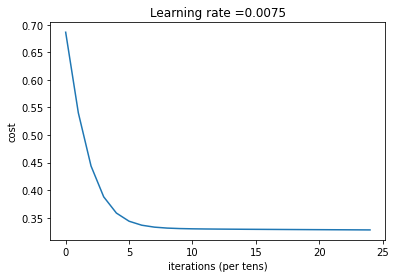

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 33, 1]
Cost after iteration 0: 0.698447
Cost after iteration 100: 0.570508
Cost after iteration 200: 0.488263
Cost after iteration 300: 0.432139
Cost after iteration 400: 0.394320
Cost after iteration 500: 0.369584
Cost after iteration 600: 0.353951
Cost after iteration 700: 0.344363
Cost after iteration 800: 0.338624
Cost after iteration 900: 0.335237
Cost after iteration 1000: 0.333246
Cost after iteration 1100: 0.332067
Cost after iteration 1200: 0.331356
Cost after iteration 1300: 0.330912
Cost after iteration 1400: 0.330614
Cost after iteration 1500: 0.330402
Cost after iteration 1600: 0.330230
Cost after iteration 1700: 0.330053
Cost after iteration 1800: 0.329870
Cost after iteration 1900: 0.329716
Cost after iteration 2000: 0.329591
Cost after iteration 2100: 0.329478
Cost after iteration 2200: 0.329368
Cost after iteration 2300: 0.329261
Cost after iter

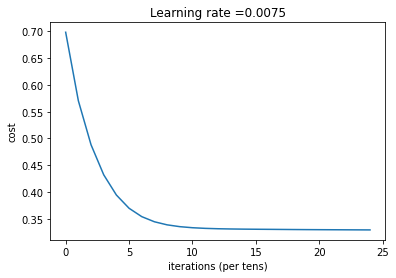

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 33, 1]
Cost after iteration 0: 0.685984
Cost after iteration 100: 0.525770
Cost after iteration 200: 0.432817
Cost after iteration 300: 0.381887
Cost after iteration 400: 0.355603
Cost after iteration 500: 0.342617
Cost after iteration 600: 0.336336
Cost after iteration 700: 0.333296
Cost after iteration 800: 0.331789
Cost after iteration 900: 0.331001
Cost after iteration 1000: 0.330547
Cost after iteration 1100: 0.330252
Cost after iteration 1200: 0.330032
Cost after iteration 1300: 0.329843
Cost after iteration 1400: 0.329665
Cost after iteration 1500: 0.329487
Cost after iteration 1600: 0.329312
Cost after iteration 1700: 0.329146
Cost after iteration 1800: 0.328987
Cost after iteration 1900: 0.328832
Cost after iteration 2000: 0.328677
Cost after iteration 2100: 0.328524
Cost after iteration 2200: 0.328371
Cost after iteration 2300: 0.328216
Cost after iter

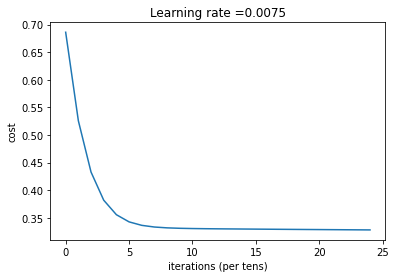

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 33, 1]
Cost after iteration 0: 0.701027
Cost after iteration 100: 0.546452
Cost after iteration 200: 0.452359
Cost after iteration 300: 0.397069
Cost after iteration 400: 0.365466
Cost after iteration 500: 0.347618
Cost after iteration 600: 0.338052
Cost after iteration 700: 0.333241
Cost after iteration 800: 0.330727
Cost after iteration 900: 0.329363
Cost after iteration 1000: 0.328575
Cost after iteration 1100: 0.328066
Cost after iteration 1200: 0.327692
Cost after iteration 1300: 0.327394
Cost after iteration 1400: 0.327149
Cost after iteration 1500: 0.326930
Cost after iteration 1600: 0.326730
Cost after iteration 1700: 0.326541
Cost after iteration 1800: 0.326357
Cost after iteration 1900: 0.326173
Cost after iteration 2000: 0.325984
Cost after iteration 2100: 0.325791
Cost after iteration 2200: 0.325586
Cost after iteration 2300: 0.325363
Cost after iter

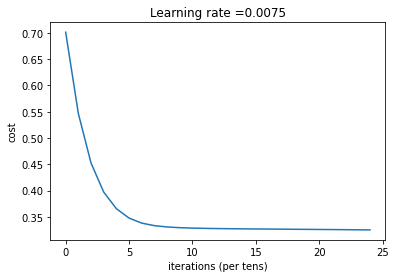

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 41, 1]
Cost after iteration 0: 0.693140
Cost after iteration 100: 0.573377
Cost after iteration 200: 0.491967
Cost after iteration 300: 0.430109
Cost after iteration 400: 0.384673
Cost after iteration 500: 0.354648
Cost after iteration 600: 0.338945
Cost after iteration 700: 0.332324
Cost after iteration 800: 0.329833
Cost after iteration 900: 0.328877
Cost after iteration 1000: 0.328434
Cost after iteration 1100: 0.328150
Cost after iteration 1200: 0.327912
Cost after iteration 1300: 0.327683
Cost after iteration 1400: 0.327452
Cost after iteration 1500: 0.327215
Cost after iteration 1600: 0.326971
Cost after iteration 1700: 0.326718
Cost after iteration 1800: 0.326456
Cost after iteration 1900: 0.326184
Cost after iteration 2000: 0.325902
Cost after iteration 2100: 0.325610
Cost after iteration 2200: 0.325305
Cost after iteration 2300: 0.324989
Cost after itera

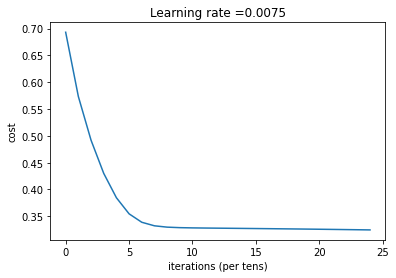

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 41, 1]
Cost after iteration 0: 0.695473
Cost after iteration 100: 0.564193
Cost after iteration 200: 0.475528
Cost after iteration 300: 0.414505
Cost after iteration 400: 0.376822
Cost after iteration 500: 0.354978
Cost after iteration 600: 0.342981
Cost after iteration 700: 0.336629
Cost after iteration 800: 0.333335
Cost after iteration 900: 0.331635
Cost after iteration 1000: 0.330747
Cost after iteration 1100: 0.330266
Cost after iteration 1200: 0.329986
Cost after iteration 1300: 0.329806
Cost after iteration 1400: 0.329674
Cost after iteration 1500: 0.329566
Cost after iteration 1600: 0.329468
Cost after iteration 1700: 0.329374
Cost after iteration 1800: 0.329282
Cost after iteration 1900: 0.329191
Cost after iteration 2000: 0.329096
Cost after iteration 2100: 0.328997
Cost after iteration 2200: 0.328891
Cost after iteration 2300: 0.328782
Cost after itera

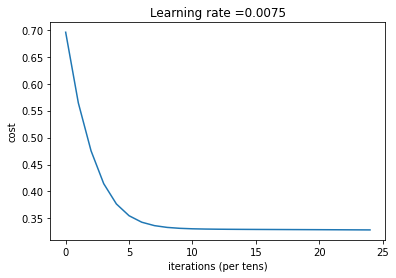

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 41, 1]
Cost after iteration 0: 0.705735
Cost after iteration 100: 0.568340
Cost after iteration 200: 0.482329
Cost after iteration 300: 0.426312
Cost after iteration 400: 0.389172
Cost after iteration 500: 0.365814
Cost after iteration 600: 0.351461
Cost after iteration 700: 0.342834
Cost after iteration 800: 0.337758
Cost after iteration 900: 0.334812
Cost after iteration 1000: 0.333107
Cost after iteration 1100: 0.332116
Cost after iteration 1200: 0.331532
Cost after iteration 1300: 0.331181
Cost after iteration 1400: 0.330961
Cost after iteration 1500: 0.330815
Cost after iteration 1600: 0.330710
Cost after iteration 1700: 0.330628
Cost after iteration 1800: 0.330560
Cost after iteration 1900: 0.330499
Cost after iteration 2000: 0.330442
Cost after iteration 2100: 0.330387
Cost after iteration 2200: 0.330333
Cost after iteration 2300: 0.330279
Cost after iter

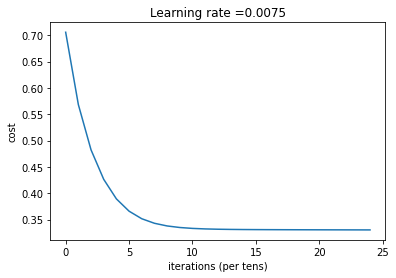

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 41, 1]
Cost after iteration 0: 0.708111
Cost after iteration 100: 0.580459
Cost after iteration 200: 0.502039
Cost after iteration 300: 0.447255
Cost after iteration 400: 0.409108
Cost after iteration 500: 0.382759
Cost after iteration 600: 0.364812
Cost after iteration 700: 0.352799
Cost after iteration 800: 0.344888
Cost after iteration 900: 0.339735
Cost after iteration 1000: 0.336466
Cost after iteration 1100: 0.334420
Cost after iteration 1200: 0.333131
Cost after iteration 1300: 0.332308
Cost after iteration 1400: 0.331771
Cost after iteration 1500: 0.331413
Cost after iteration 1600: 0.331168
Cost after iteration 1700: 0.330992
Cost after iteration 1800: 0.330861
Cost after iteration 1900: 0.330756
Cost after iteration 2000: 0.330667
Cost after iteration 2100: 0.330587
Cost after iteration 2200: 0.330510
Cost after iteration 2300: 0.330434
Cost after iter

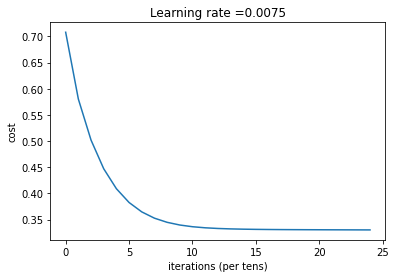

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 41, 1]
Cost after iteration 0: 0.685582
Cost after iteration 100: 0.545332
Cost after iteration 200: 0.452385
Cost after iteration 300: 0.394747
Cost after iteration 400: 0.362347
Cost after iteration 500: 0.346029
Cost after iteration 600: 0.338311
Cost after iteration 700: 0.334719
Cost after iteration 800: 0.333038
Cost after iteration 900: 0.332217
Cost after iteration 1000: 0.331783
Cost after iteration 1100: 0.331521
Cost after iteration 1200: 0.331337
Cost after iteration 1300: 0.331188
Cost after iteration 1400: 0.331053
Cost after iteration 1500: 0.330922
Cost after iteration 1600: 0.330793
Cost after iteration 1700: 0.330657
Cost after iteration 1800: 0.330504
Cost after iteration 1900: 0.330340
Cost after iteration 2000: 0.330192
Cost after iteration 2100: 0.330057
Cost after iteration 2200: 0.329929
Cost after iteration 2300: 0.329805
Cost after iter

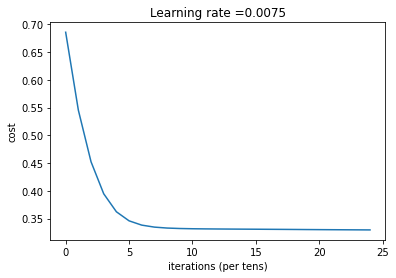

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 41, 1]
Cost after iteration 0: 0.687504
Cost after iteration 100: 0.499189
Cost after iteration 200: 0.407365
Cost after iteration 300: 0.364472
Cost after iteration 400: 0.345700
Cost after iteration 500: 0.337714
Cost after iteration 600: 0.334265
Cost after iteration 700: 0.332678
Cost after iteration 800: 0.331871
Cost after iteration 900: 0.331391
Cost after iteration 1000: 0.331058
Cost after iteration 1100: 0.330799
Cost after iteration 1200: 0.330582
Cost after iteration 1300: 0.330382
Cost after iteration 1400: 0.330176
Cost after iteration 1500: 0.329940
Cost after iteration 1600: 0.329706
Cost after iteration 1700: 0.329493
Cost after iteration 1800: 0.329298
Cost after iteration 1900: 0.329113
Cost after iteration 2000: 0.328934
Cost after iteration 2100: 0.328757
Cost after iteration 2200: 0.328581
Cost after iteration 2300: 0.328405
Cost after iter

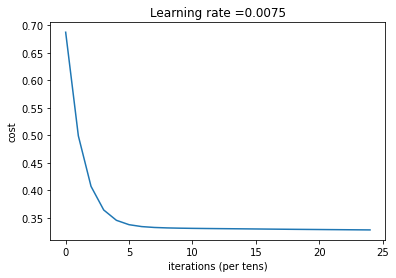

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 41, 1]
Cost after iteration 0: 0.684096
Cost after iteration 100: 0.534903
Cost after iteration 200: 0.440096
Cost after iteration 300: 0.386284
Cost after iteration 400: 0.357779
Cost after iteration 500: 0.343544
Cost after iteration 600: 0.336654
Cost after iteration 700: 0.333340
Cost after iteration 800: 0.331714
Cost after iteration 900: 0.330872
Cost after iteration 1000: 0.330385
Cost after iteration 1100: 0.330070
Cost after iteration 1200: 0.329839
Cost after iteration 1300: 0.329657
Cost after iteration 1400: 0.329498
Cost after iteration 1500: 0.329349
Cost after iteration 1600: 0.329205
Cost after iteration 1700: 0.329066
Cost after iteration 1800: 0.328929
Cost after iteration 1900: 0.328791
Cost after iteration 2000: 0.328652
Cost after iteration 2100: 0.328511
Cost after iteration 2200: 0.328367
Cost after iteration 2300: 0.328221
Cost after iter

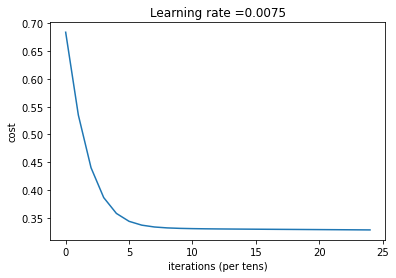

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 41, 1]
Cost after iteration 0: 0.688262
Cost after iteration 100: 0.539901
Cost after iteration 200: 0.443082
Cost after iteration 300: 0.386157
Cost after iteration 400: 0.357174
Cost after iteration 500: 0.342902
Cost after iteration 600: 0.335960
Cost after iteration 700: 0.332533
Cost after iteration 800: 0.330787
Cost after iteration 900: 0.329827
Cost after iteration 1000: 0.329230
Cost after iteration 1100: 0.328795
Cost after iteration 1200: 0.328410
Cost after iteration 1300: 0.328104
Cost after iteration 1400: 0.327856
Cost after iteration 1500: 0.327640
Cost after iteration 1600: 0.327442
Cost after iteration 1700: 0.327251
Cost after iteration 1800: 0.327066
Cost after iteration 1900: 0.326887
Cost after iteration 2000: 0.326711
Cost after iteration 2100: 0.326537
Cost after iteration 2200: 0.326364
Cost after iteration 2300: 0.326191
Cost after iter

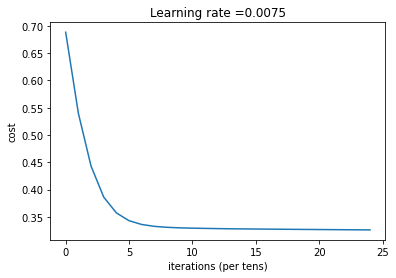

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 49, 1]
Cost after iteration 0: 0.693105
Cost after iteration 100: 0.553046
Cost after iteration 200: 0.429089
Cost after iteration 300: 0.356416
Cost after iteration 400: 0.333860
Cost after iteration 500: 0.329073
Cost after iteration 600: 0.327995
Cost after iteration 700: 0.327569
Cost after iteration 800: 0.327247
Cost after iteration 900: 0.326935
Cost after iteration 1000: 0.326619
Cost after iteration 1100: 0.326293
Cost after iteration 1200: 0.325958
Cost after iteration 1300: 0.325613
Cost after iteration 1400: 0.325257
Cost after iteration 1500: 0.324889
Cost after iteration 1600: 0.324508
Cost after iteration 1700: 0.324114
Cost after iteration 1800: 0.323705
Cost after iteration 1900: 0.323281
Cost after iteration 2000: 0.322840
Cost after iteration 2100: 0.322382
Cost after iteration 2200: 0.321905
Cost after iteration 2300: 0.321407
Cost after itera

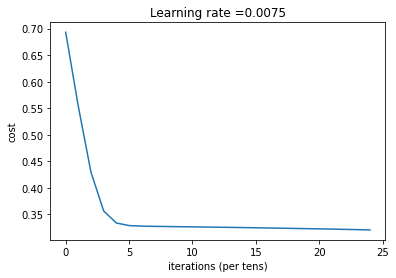

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 49, 1]
Cost after iteration 0: 0.691484
Cost after iteration 100: 0.533402
Cost after iteration 200: 0.436031
Cost after iteration 300: 0.379504
Cost after iteration 400: 0.351276
Cost after iteration 500: 0.338702
Cost after iteration 600: 0.333366
Cost after iteration 700: 0.331076
Cost after iteration 800: 0.330028
Cost after iteration 900: 0.329470
Cost after iteration 1000: 0.329092
Cost after iteration 1100: 0.328791
Cost after iteration 1200: 0.328569
Cost after iteration 1300: 0.328385
Cost after iteration 1400: 0.328213
Cost after iteration 1500: 0.328046
Cost after iteration 1600: 0.327880
Cost after iteration 1700: 0.327714
Cost after iteration 1800: 0.327545
Cost after iteration 1900: 0.327374
Cost after iteration 2000: 0.327201
Cost after iteration 2100: 0.327024
Cost after iteration 2200: 0.326846
Cost after iteration 2300: 0.326665
Cost after itera

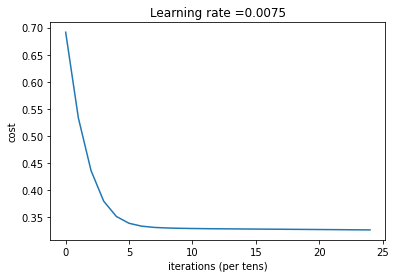

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 49, 1]
Cost after iteration 0: 0.685490
Cost after iteration 100: 0.529997
Cost after iteration 200: 0.432966
Cost after iteration 300: 0.376583
Cost after iteration 400: 0.349440
Cost after iteration 500: 0.337627
Cost after iteration 600: 0.332692
Cost after iteration 700: 0.330625
Cost after iteration 800: 0.329720
Cost after iteration 900: 0.329279
Cost after iteration 1000: 0.329024
Cost after iteration 1100: 0.328840
Cost after iteration 1200: 0.328684
Cost after iteration 1300: 0.328540
Cost after iteration 1400: 0.328390
Cost after iteration 1500: 0.328221
Cost after iteration 1600: 0.328025
Cost after iteration 1700: 0.327844
Cost after iteration 1800: 0.327674
Cost after iteration 1900: 0.327506
Cost after iteration 2000: 0.327338
Cost after iteration 2100: 0.327163
Cost after iteration 2200: 0.326990
Cost after iteration 2300: 0.326819
Cost after iter

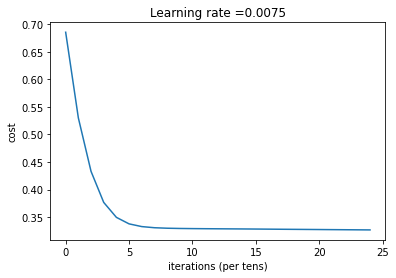

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 49, 1]
Cost after iteration 0: 0.691267
Cost after iteration 100: 0.538192
Cost after iteration 200: 0.440821
Cost after iteration 300: 0.384597
Cost after iteration 400: 0.355418
Cost after iteration 500: 0.341579
Cost after iteration 600: 0.335336
Cost after iteration 700: 0.332557
Cost after iteration 800: 0.331294
Cost after iteration 900: 0.330682
Cost after iteration 1000: 0.330349
Cost after iteration 1100: 0.330133
Cost after iteration 1200: 0.329970
Cost after iteration 1300: 0.329830
Cost after iteration 1400: 0.329699
Cost after iteration 1500: 0.329571
Cost after iteration 1600: 0.329445
Cost after iteration 1700: 0.329319
Cost after iteration 1800: 0.329193
Cost after iteration 1900: 0.329067
Cost after iteration 2000: 0.328941
Cost after iteration 2100: 0.328814
Cost after iteration 2200: 0.328687
Cost after iteration 2300: 0.328558
Cost after iter

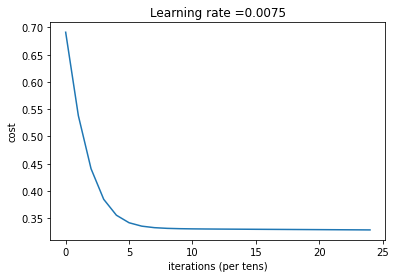

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 49, 1]
Cost after iteration 0: 0.694769
Cost after iteration 100: 0.567939
Cost after iteration 200: 0.481222
Cost after iteration 300: 0.422428
Cost after iteration 400: 0.384756
Cost after iteration 500: 0.361520
Cost after iteration 600: 0.347833
Cost after iteration 700: 0.340078
Cost after iteration 800: 0.335787
Cost after iteration 900: 0.333434
Cost after iteration 1000: 0.332137
Cost after iteration 1100: 0.331405
Cost after iteration 1200: 0.330970
Cost after iteration 1300: 0.330690
Cost after iteration 1400: 0.330489
Cost after iteration 1500: 0.330330
Cost after iteration 1600: 0.330192
Cost after iteration 1700: 0.330060
Cost after iteration 1800: 0.329917
Cost after iteration 1900: 0.329754
Cost after iteration 2000: 0.329609
Cost after iteration 2100: 0.329484
Cost after iteration 2200: 0.329370
Cost after iteration 2300: 0.329262
Cost after iter

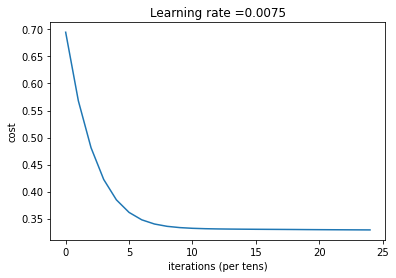

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 49, 1]
Cost after iteration 0: 0.698451
Cost after iteration 100: 0.574940
Cost after iteration 200: 0.493944
Cost after iteration 300: 0.437094
Cost after iteration 400: 0.397219
Cost after iteration 500: 0.371103
Cost after iteration 600: 0.354724
Cost after iteration 700: 0.344733
Cost after iteration 800: 0.338762
Cost after iteration 900: 0.335230
Cost after iteration 1000: 0.333125
Cost after iteration 1100: 0.331834
Cost after iteration 1200: 0.331004
Cost after iteration 1300: 0.330431
Cost after iteration 1400: 0.329965
Cost after iteration 1500: 0.329561
Cost after iteration 1600: 0.329285
Cost after iteration 1700: 0.329076
Cost after iteration 1800: 0.328905
Cost after iteration 1900: 0.328753
Cost after iteration 2000: 0.328613
Cost after iteration 2100: 0.328478
Cost after iteration 2200: 0.328346
Cost after iteration 2300: 0.328215
Cost after iter

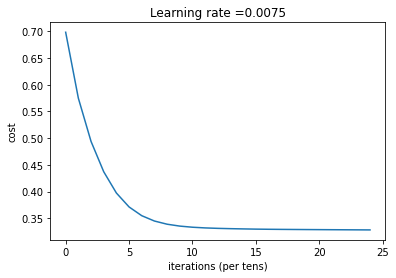

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 49, 1]
Cost after iteration 0: 0.700191
Cost after iteration 100: 0.564074
Cost after iteration 200: 0.475243
Cost after iteration 300: 0.418689
Cost after iteration 400: 0.383239
Cost after iteration 500: 0.361556
Cost after iteration 600: 0.348635
Cost after iteration 700: 0.341068
Cost after iteration 800: 0.336643
Cost after iteration 900: 0.334021
Cost after iteration 1000: 0.332390
Cost after iteration 1100: 0.331278
Cost after iteration 1200: 0.330488
Cost after iteration 1300: 0.329930
Cost after iteration 1400: 0.329561
Cost after iteration 1500: 0.329294
Cost after iteration 1600: 0.329084
Cost after iteration 1700: 0.328904
Cost after iteration 1800: 0.328745
Cost after iteration 1900: 0.328598
Cost after iteration 2000: 0.328460
Cost after iteration 2100: 0.328325
Cost after iteration 2200: 0.328193
Cost after iteration 2300: 0.328061
Cost after iter

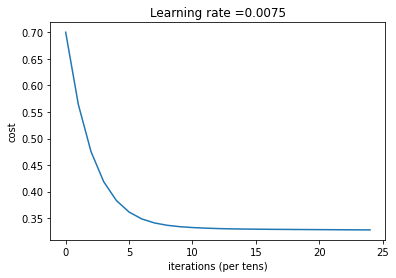

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 49, 1]
Cost after iteration 0: 0.686953
Cost after iteration 100: 0.539239
Cost after iteration 200: 0.447422
Cost after iteration 300: 0.392503
Cost after iteration 400: 0.362033
Cost after iteration 500: 0.346180
Cost after iteration 600: 0.338186
Cost after iteration 700: 0.334091
Cost after iteration 800: 0.331976
Cost after iteration 900: 0.330877
Cost after iteration 1000: 0.330235
Cost after iteration 1100: 0.329790
Cost after iteration 1200: 0.329443
Cost after iteration 1300: 0.329162
Cost after iteration 1400: 0.328909
Cost after iteration 1500: 0.328664
Cost after iteration 1600: 0.328429
Cost after iteration 1700: 0.328218
Cost after iteration 1800: 0.328030
Cost after iteration 1900: 0.327853
Cost after iteration 2000: 0.327682
Cost after iteration 2100: 0.327512
Cost after iteration 2200: 0.327344
Cost after iteration 2300: 0.327178
Cost after iter

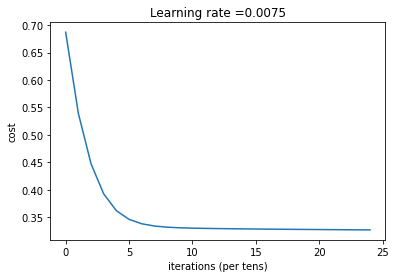

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 57, 1]
Cost after iteration 0: 0.693160
Cost after iteration 100: 0.571742
Cost after iteration 200: 0.492573
Cost after iteration 300: 0.437123
Cost after iteration 400: 0.397040
Cost after iteration 500: 0.369880
Cost after iteration 600: 0.351973
Cost after iteration 700: 0.341052
Cost after iteration 800: 0.334986
Cost after iteration 900: 0.331863
Cost after iteration 1000: 0.330320
Cost after iteration 1100: 0.329553
Cost after iteration 1200: 0.329135
Cost after iteration 1300: 0.328865
Cost after iteration 1400: 0.328655
Cost after iteration 1500: 0.328464
Cost after iteration 1600: 0.328277
Cost after iteration 1700: 0.328087
Cost after iteration 1800: 0.327890
Cost after iteration 1900: 0.327685
Cost after iteration 2000: 0.327470
Cost after iteration 2100: 0.327244
Cost after iteration 2200: 0.326993
Cost after iteration 2300: 0.326634
Cost after itera

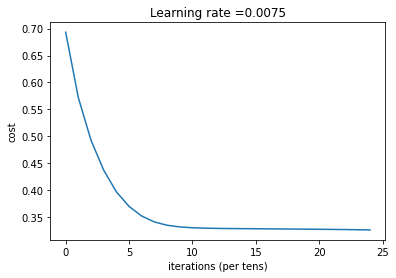

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 57, 1]
Cost after iteration 0: 0.688425
Cost after iteration 100: 0.525538
Cost after iteration 200: 0.424337
Cost after iteration 300: 0.364956
Cost after iteration 400: 0.341684
Cost after iteration 500: 0.333496
Cost after iteration 600: 0.330730
Cost after iteration 700: 0.329750
Cost after iteration 800: 0.329332
Cost after iteration 900: 0.329068
Cost after iteration 1000: 0.328844
Cost after iteration 1100: 0.328633
Cost after iteration 1200: 0.328423
Cost after iteration 1300: 0.328212
Cost after iteration 1400: 0.328000
Cost after iteration 1500: 0.327788
Cost after iteration 1600: 0.327575
Cost after iteration 1700: 0.327362
Cost after iteration 1800: 0.327146
Cost after iteration 1900: 0.326927
Cost after iteration 2000: 0.326705
Cost after iteration 2100: 0.326481
Cost after iteration 2200: 0.326253
Cost after iteration 2300: 0.326022
Cost after itera

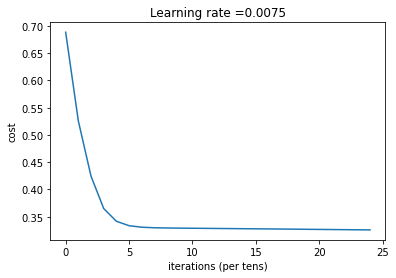

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 57, 1]
Cost after iteration 0: 0.697231
Cost after iteration 100: 0.560717
Cost after iteration 200: 0.472473
Cost after iteration 300: 0.415658
Cost after iteration 400: 0.379690
Cost after iteration 500: 0.357849
Cost after iteration 600: 0.345442
Cost after iteration 700: 0.338563
Cost after iteration 800: 0.334809
Cost after iteration 900: 0.332759
Cost after iteration 1000: 0.331618
Cost after iteration 1100: 0.330962
Cost after iteration 1200: 0.330568
Cost after iteration 1300: 0.330305
Cost after iteration 1400: 0.330111
Cost after iteration 1500: 0.329964
Cost after iteration 1600: 0.329844
Cost after iteration 1700: 0.329737
Cost after iteration 1800: 0.329637
Cost after iteration 1900: 0.329539
Cost after iteration 2000: 0.329443
Cost after iteration 2100: 0.329345
Cost after iteration 2200: 0.329247
Cost after iteration 2300: 0.329147
Cost after iter

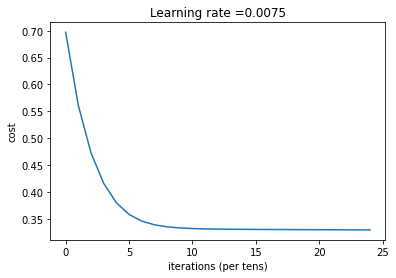

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 57, 1]
Cost after iteration 0: 0.705723
Cost after iteration 100: 0.581513
Cost after iteration 200: 0.502741
Cost after iteration 300: 0.448515
Cost after iteration 400: 0.410864
Cost after iteration 500: 0.384730
Cost after iteration 600: 0.366726
Cost after iteration 700: 0.354448
Cost after iteration 800: 0.346143
Cost after iteration 900: 0.340599
Cost after iteration 1000: 0.336947
Cost after iteration 1100: 0.334539
Cost after iteration 1200: 0.332942
Cost after iteration 1300: 0.331869
Cost after iteration 1400: 0.331137
Cost after iteration 1500: 0.330630
Cost after iteration 1600: 0.330269
Cost after iteration 1700: 0.330003
Cost after iteration 1800: 0.329798
Cost after iteration 1900: 0.329640
Cost after iteration 2000: 0.329510
Cost after iteration 2100: 0.329400
Cost after iteration 2200: 0.329303
Cost after iteration 2300: 0.329216
Cost after iter

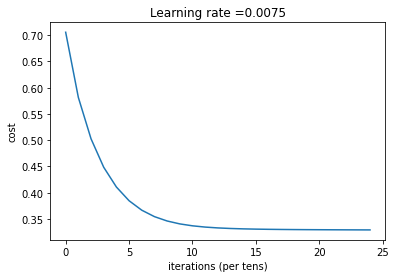

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 57, 1]
Cost after iteration 0: 0.689207
Cost after iteration 100: 0.571374
Cost after iteration 200: 0.484573
Cost after iteration 300: 0.423958
Cost after iteration 400: 0.384495
Cost after iteration 500: 0.360298
Cost after iteration 600: 0.346307
Cost after iteration 700: 0.338534
Cost after iteration 800: 0.334369
Cost after iteration 900: 0.332177
Cost after iteration 1000: 0.330992
Cost after iteration 1100: 0.330320
Cost after iteration 1200: 0.329912
Cost after iteration 1300: 0.329636
Cost after iteration 1400: 0.329428
Cost after iteration 1500: 0.329254
Cost after iteration 1600: 0.329099
Cost after iteration 1700: 0.328956
Cost after iteration 1800: 0.328818
Cost after iteration 1900: 0.328681
Cost after iteration 2000: 0.328544
Cost after iteration 2100: 0.328404
Cost after iteration 2200: 0.328260
Cost after iteration 2300: 0.328110
Cost after iter

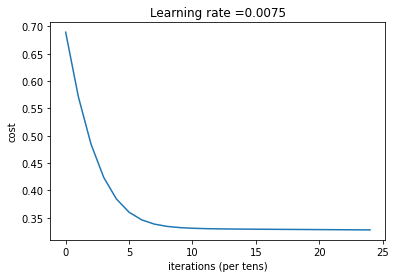

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 57, 1]
Cost after iteration 0: 0.690141
Cost after iteration 100: 0.545542
Cost after iteration 200: 0.454295
Cost after iteration 300: 0.397438
Cost after iteration 400: 0.364773
Cost after iteration 500: 0.347608
Cost after iteration 600: 0.339026
Cost after iteration 700: 0.334822
Cost after iteration 800: 0.332749
Cost after iteration 900: 0.331692
Cost after iteration 1000: 0.331115
Cost after iteration 1100: 0.330768
Cost after iteration 1200: 0.330531
Cost after iteration 1300: 0.330347
Cost after iteration 1400: 0.330186
Cost after iteration 1500: 0.330038
Cost after iteration 1600: 0.329895
Cost after iteration 1700: 0.329756
Cost after iteration 1800: 0.329614
Cost after iteration 1900: 0.329475
Cost after iteration 2000: 0.329340
Cost after iteration 2100: 0.329208
Cost after iteration 2200: 0.329077
Cost after iteration 2300: 0.328947
Cost after iter

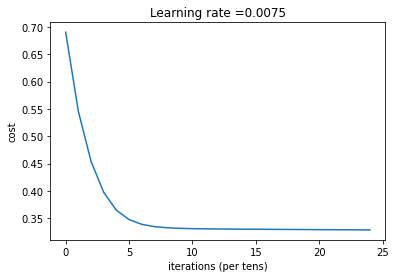

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 57, 1]
Cost after iteration 0: 0.687052
Cost after iteration 100: 0.552405
Cost after iteration 200: 0.463946
Cost after iteration 300: 0.407041
Cost after iteration 400: 0.372619
Cost after iteration 500: 0.352968
Cost after iteration 600: 0.342267
Cost after iteration 700: 0.336612
Cost after iteration 800: 0.333650
Cost after iteration 900: 0.332086
Cost after iteration 1000: 0.331232
Cost after iteration 1100: 0.330739
Cost after iteration 1200: 0.330430
Cost after iteration 1300: 0.330214
Cost after iteration 1400: 0.330045
Cost after iteration 1500: 0.329898
Cost after iteration 1600: 0.329764
Cost after iteration 1700: 0.329636
Cost after iteration 1800: 0.329512
Cost after iteration 1900: 0.329392
Cost after iteration 2000: 0.329274
Cost after iteration 2100: 0.329156
Cost after iteration 2200: 0.329038
Cost after iteration 2300: 0.328920
Cost after iter

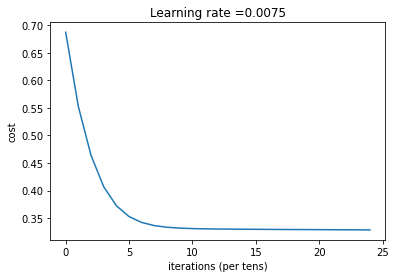

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 57, 1]
Cost after iteration 0: 0.696191
Cost after iteration 100: 0.563243
Cost after iteration 200: 0.476607
Cost after iteration 300: 0.419289
Cost after iteration 400: 0.382824
Cost after iteration 500: 0.360462
Cost after iteration 600: 0.347258
Cost after iteration 700: 0.339657
Cost after iteration 800: 0.335337
Cost after iteration 900: 0.332879
Cost after iteration 1000: 0.331455
Cost after iteration 1100: 0.330601
Cost after iteration 1200: 0.330058
Cost after iteration 1300: 0.329685
Cost after iteration 1400: 0.329411
Cost after iteration 1500: 0.329203
Cost after iteration 1600: 0.329033
Cost after iteration 1700: 0.328883
Cost after iteration 1800: 0.328744
Cost after iteration 1900: 0.328611
Cost after iteration 2000: 0.328481
Cost after iteration 2100: 0.328352
Cost after iteration 2200: 0.328225
Cost after iteration 2300: 0.328096
Cost after iter

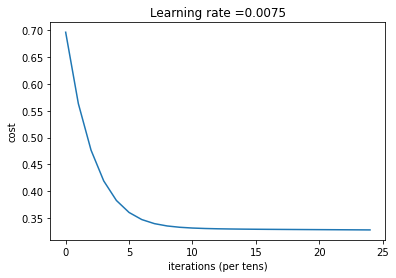

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556



In [189]:
# Define variables to save the results and the parameters
parameters_3L_cache = []
pred_train_3L_cache = []
pred_test_3L_cache = []

for neurons_L2 in range(1, x_train_flatten.shape[0]+1, 8):
  for neurons_L1 in range(1, x_train_flatten.shape[0]+1, 8):
    # Train the Neural Network
    layers_dims = [x_train_flatten.shape[0], neurons_L1, neurons_L2 ,1]
    parameters = L_layer_model(x_train_standardize, y_train, layers_dims, num_iterations = 2500, print_cost = True)

    # Make the prediction with the training dataset
    pred_train, acurracy_train = predict(X_train_standardize, y_train, parameters, True)

    # Make the prediction with the training dataset
    pred_test, acurracy_test = predict(X_test_standardize, y_test, parameters, False)

    # Save parameters and results
    parameters_3L_cache.append(layers_dims)
    pred_train_3L_cache.append(acurracy_train)
    pred_test_3L_cache.append(acurracy_test)

### **4-Layer Neural Network**

Layer dimensions: [64, 1, 1, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after iteration 2400: 0.334181


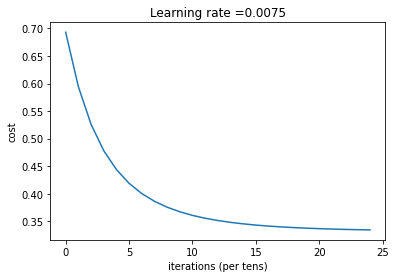

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 1, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after ite

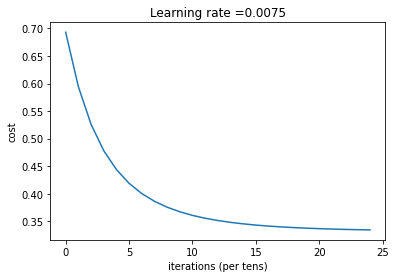

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 1, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

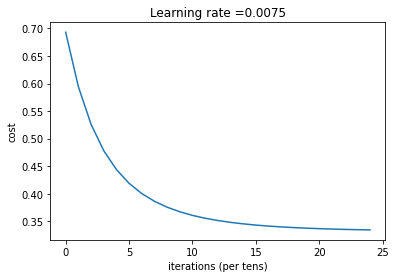

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 1, 1, 1]
Cost after iteration 0: 0.693121
Cost after iteration 100: 0.592780
Cost after iteration 200: 0.522405
Cost after iteration 300: 0.466556
Cost after iteration 400: 0.423366
Cost after iteration 500: 0.389700
Cost after iteration 600: 0.365131
Cost after iteration 700: 0.349111
Cost after iteration 800: 0.339819
Cost after iteration 900: 0.334904
Cost after iteration 1000: 0.332436
Cost after iteration 1100: 0.331207
Cost after iteration 1200: 0.330565
Cost after iteration 1300: 0.330198
Cost after iteration 1400: 0.329972
Cost after iteration 1500: 0.329815
Cost after iteration 1600: 0.329693
Cost after iteration 1700: 0.329593
Cost after iteration 1800: 0.329504
Cost after iteration 1900: 0.329421
Cost after iteration 2000: 0.329341
Cost after iteration 2100: 0.329263
Cost after iteration 2200: 0.329185
Cost after iteration 2300: 0.329106
Cost after it

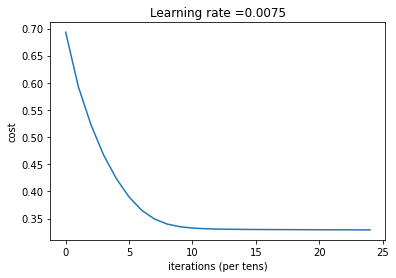

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 1, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

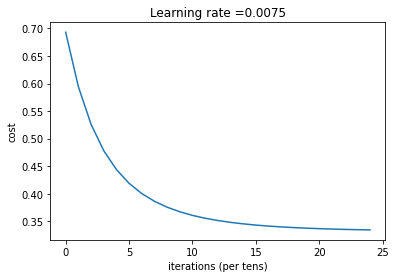

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 1, 1, 1]
Cost after iteration 0: 0.692432
Cost after iteration 100: 0.569927
Cost after iteration 200: 0.490350
Cost after iteration 300: 0.437355
Cost after iteration 400: 0.401836
Cost after iteration 500: 0.378082
Cost after iteration 600: 0.362276
Cost after iteration 700: 0.351812
Cost after iteration 800: 0.344913
Cost after iteration 900: 0.340375
Cost after iteration 1000: 0.337394
Cost after iteration 1100: 0.335438
Cost after iteration 1200: 0.334152
Cost after iteration 1300: 0.333307
Cost after iteration 1400: 0.332749
Cost after iteration 1500: 0.332380
Cost after iteration 1600: 0.332134
Cost after iteration 1700: 0.331968
Cost after iteration 1800: 0.331856
Cost after iteration 1900: 0.331779
Cost after iteration 2000: 0.331723
Cost after iteration 2100: 0.331683
Cost after iteration 2200: 0.331652
Cost after iteration 2300: 0.331627
Cost after it

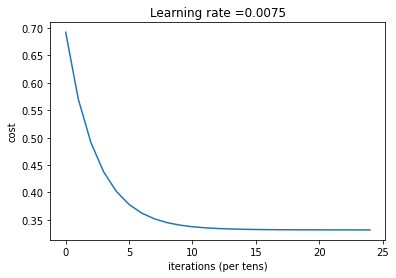

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 1, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

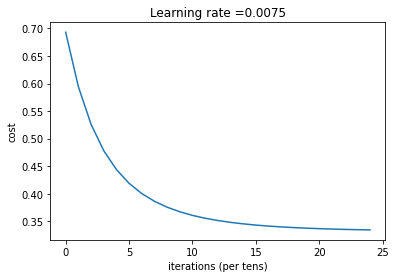

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 1, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

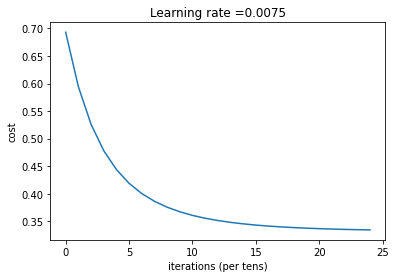

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 9, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after ite

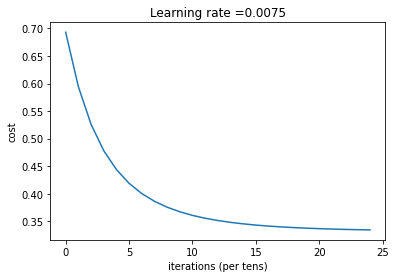

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 9, 1, 1]
Cost after iteration 0: 0.693143
Cost after iteration 100: 0.592190
Cost after iteration 200: 0.517486
Cost after iteration 300: 0.466131
Cost after iteration 400: 0.429917
Cost after iteration 500: 0.403908
Cost after iteration 600: 0.384991
Cost after iteration 700: 0.371115
Cost after iteration 800: 0.360883
Cost after iteration 900: 0.353311
Cost after iteration 1000: 0.347699
Cost after iteration 1100: 0.343536
Cost after iteration 1200: 0.340446
Cost after iteration 1300: 0.338152
Cost after iteration 1400: 0.336450
Cost after iteration 1500: 0.335186
Cost after iteration 1600: 0.334248
Cost after iteration 1700: 0.333551
Cost after iteration 1800: 0.333031
Cost after iteration 1900: 0.332645
Cost after iteration 2000: 0.332357
Cost after iteration 2100: 0.332140
Cost after iteration 2200: 0.331976
Cost after iteration 2300: 0.331852
Cost after ite

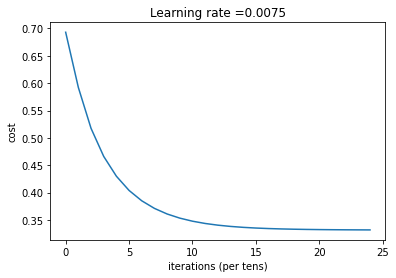

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 9, 1, 1]
Cost after iteration 0: 0.687267
Cost after iteration 100: 0.455198
Cost after iteration 200: 0.370553
Cost after iteration 300: 0.342661
Cost after iteration 400: 0.334034
Cost after iteration 500: 0.331312
Cost after iteration 600: 0.330298
Cost after iteration 700: 0.329767
Cost after iteration 800: 0.329468
Cost after iteration 900: 0.329273
Cost after iteration 1000: 0.329122
Cost after iteration 1100: 0.328986
Cost after iteration 1200: 0.328854
Cost after iteration 1300: 0.328720
Cost after iteration 1400: 0.328580
Cost after iteration 1500: 0.328374
Cost after iteration 1600: 0.328064
Cost after iteration 1700: 0.327883
Cost after iteration 1800: 0.327732
Cost after iteration 1900: 0.327585
Cost after iteration 2000: 0.327437
Cost after iteration 2100: 0.327286
Cost after iteration 2200: 0.327132
Cost after iteration 2300: 0.326975
Cost after it

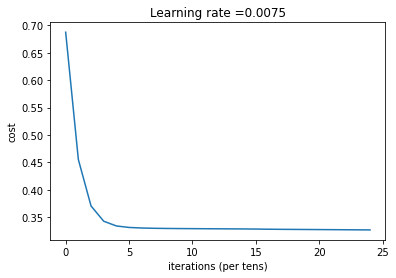

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 9, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

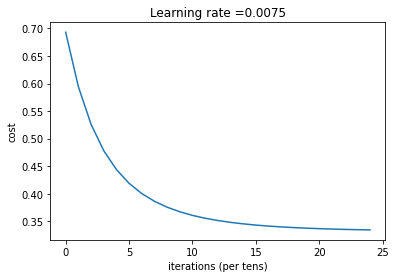

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 9, 1, 1]
Cost after iteration 0: 0.693007
Cost after iteration 100: 0.594222
Cost after iteration 200: 0.525851
Cost after iteration 300: 0.477817
Cost after iteration 400: 0.443441
Cost after iteration 500: 0.418368
Cost after iteration 600: 0.399752
Cost after iteration 700: 0.385702
Cost after iteration 800: 0.374945
Cost after iteration 900: 0.366602
Cost after iteration 1000: 0.360059
Cost after iteration 1100: 0.354876
Cost after iteration 1200: 0.350736
Cost after iteration 1300: 0.347402
Cost after iteration 1400: 0.344701
Cost after iteration 1500: 0.342499
Cost after iteration 1600: 0.340694
Cost after iteration 1700: 0.339207
Cost after iteration 1800: 0.337978
Cost after iteration 1900: 0.336958
Cost after iteration 2000: 0.336109
Cost after iteration 2100: 0.335399
Cost after iteration 2200: 0.334805
Cost after iteration 2300: 0.334306
Cost after it

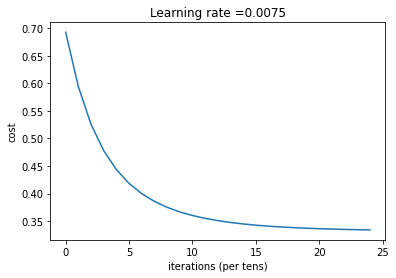

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 9, 1, 1]
Cost after iteration 0: 0.693158
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

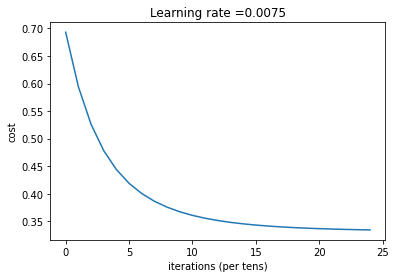

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 9, 1, 1]
Cost after iteration 0: 0.693151
Cost after iteration 100: 0.594443
Cost after iteration 200: 0.526138
Cost after iteration 300: 0.478163
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

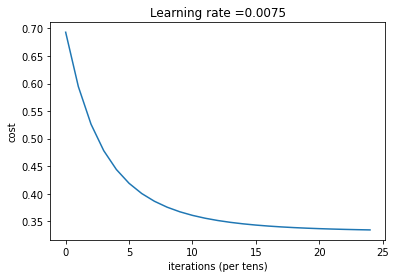

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 9, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

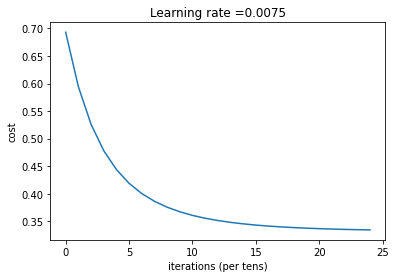

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 17, 1, 1]
Cost after iteration 0: 0.693122
Cost after iteration 100: 0.558553
Cost after iteration 200: 0.471329
Cost after iteration 300: 0.411502
Cost after iteration 400: 0.373234
Cost after iteration 500: 0.350558
Cost after iteration 600: 0.338692
Cost after iteration 700: 0.333212
Cost after iteration 800: 0.330893
Cost after iteration 900: 0.329938
Cost after iteration 1000: 0.329517
Cost after iteration 1100: 0.329292
Cost after iteration 1200: 0.329135
Cost after iteration 1300: 0.328999
Cost after iteration 1400: 0.328868
Cost after iteration 1500: 0.328736
Cost after iteration 1600: 0.328601
Cost after iteration 1700: 0.328463
Cost after iteration 1800: 0.328319
Cost after iteration 1900: 0.328171
Cost after iteration 2000: 0.328018
Cost after iteration 2100: 0.327860
Cost after iteration 2200: 0.327696
Cost after iteration 2300: 0.327526
Cost after it

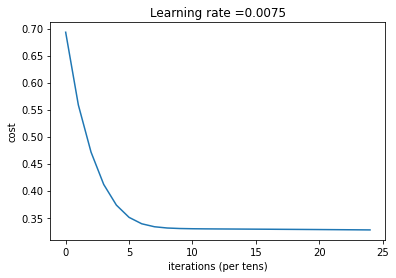

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 17, 1, 1]
Cost after iteration 0: 0.694828
Cost after iteration 100: 0.594427
Cost after iteration 200: 0.526125
Cost after iteration 300: 0.478154
Cost after iteration 400: 0.443831
Cost after iteration 500: 0.418803
Cost after iteration 600: 0.400221
Cost after iteration 700: 0.386197
Cost after iteration 800: 0.375456
Cost after iteration 900: 0.367122
Cost after iteration 1000: 0.360582
Cost after iteration 1100: 0.355396
Cost after iteration 1200: 0.351248
Cost after iteration 1300: 0.347903
Cost after iteration 1400: 0.345187
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341144
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338389
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

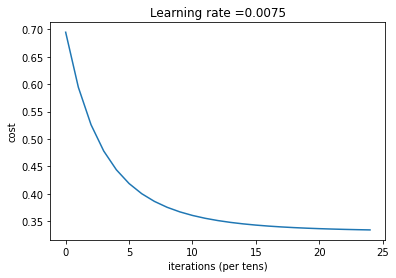

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 17, 1, 1]
Cost after iteration 0: 0.693471
Cost after iteration 100: 0.594442
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443836
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

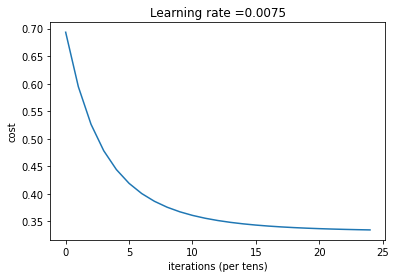

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 17, 1, 1]
Cost after iteration 0: 0.691677
Cost after iteration 100: 0.508385
Cost after iteration 200: 0.412952
Cost after iteration 300: 0.366302
Cost after iteration 400: 0.345442
Cost after iteration 500: 0.336711
Cost after iteration 600: 0.333165
Cost after iteration 700: 0.331723
Cost after iteration 800: 0.331111
Cost after iteration 900: 0.330819
Cost after iteration 1000: 0.330655
Cost after iteration 1100: 0.330543
Cost after iteration 1200: 0.330450
Cost after iteration 1300: 0.330367
Cost after iteration 1400: 0.330287
Cost after iteration 1500: 0.330208
Cost after iteration 1600: 0.330130
Cost after iteration 1700: 0.330051
Cost after iteration 1800: 0.329972
Cost after iteration 1900: 0.329893
Cost after iteration 2000: 0.329813
Cost after iteration 2100: 0.329732
Cost after iteration 2200: 0.329650
Cost after iteration 2300: 0.329567
Cost after i

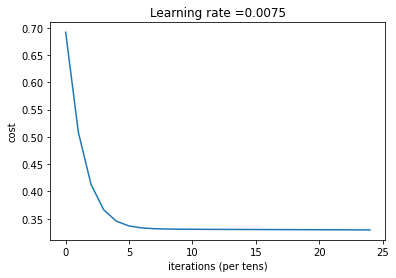

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 17, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

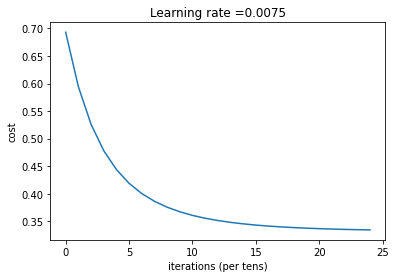

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 17, 1, 1]
Cost after iteration 0: 0.693387
Cost after iteration 100: 0.594448
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478160
Cost after iteration 400: 0.443835
Cost after iteration 500: 0.418806
Cost after iteration 600: 0.400223
Cost after iteration 700: 0.386198
Cost after iteration 800: 0.375457
Cost after iteration 900: 0.367123
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351248
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345187
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

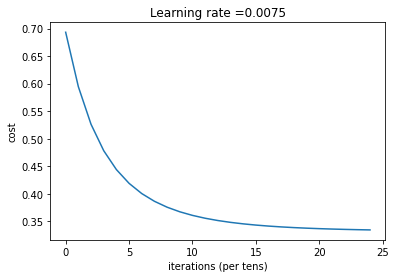

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 17, 1, 1]
Cost after iteration 0: 0.691887
Cost after iteration 100: 0.497559
Cost after iteration 200: 0.403542
Cost after iteration 300: 0.360561
Cost after iteration 400: 0.342382
Cost after iteration 500: 0.335003
Cost after iteration 600: 0.332009
Cost after iteration 700: 0.330743
Cost after iteration 800: 0.330162
Cost after iteration 900: 0.329841
Cost after iteration 1000: 0.329617
Cost after iteration 1100: 0.329422
Cost after iteration 1200: 0.329257
Cost after iteration 1300: 0.329113
Cost after iteration 1400: 0.328976
Cost after iteration 1500: 0.328844
Cost after iteration 1600: 0.328716
Cost after iteration 1700: 0.328587
Cost after iteration 1800: 0.328457
Cost after iteration 1900: 0.328324
Cost after iteration 2000: 0.328188
Cost after iteration 2100: 0.328050
Cost after iteration 2200: 0.327908
Cost after iteration 2300: 0.327764
Cost after i

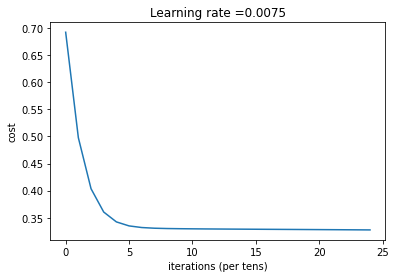

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 17, 1, 1]
Cost after iteration 0: 0.693084
Cost after iteration 100: 0.433654
Cost after iteration 200: 0.360606
Cost after iteration 300: 0.340305
Cost after iteration 400: 0.334287
Cost after iteration 500: 0.332287
Cost after iteration 600: 0.331470
Cost after iteration 700: 0.331020
Cost after iteration 800: 0.330664
Cost after iteration 900: 0.330332
Cost after iteration 1000: 0.330055
Cost after iteration 1100: 0.329819
Cost after iteration 1200: 0.329624
Cost after iteration 1300: 0.329449
Cost after iteration 1400: 0.329284
Cost after iteration 1500: 0.329125
Cost after iteration 1600: 0.328967
Cost after iteration 1700: 0.328808
Cost after iteration 1800: 0.328653
Cost after iteration 1900: 0.328497
Cost after iteration 2000: 0.328340
Cost after iteration 2100: 0.328182
Cost after iteration 2200: 0.328023
Cost after iteration 2300: 0.327861
Cost after i

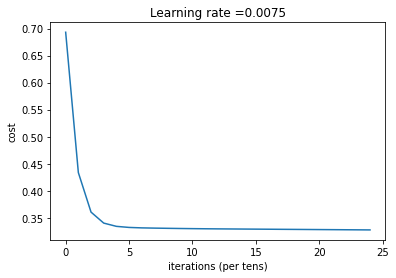

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 25, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

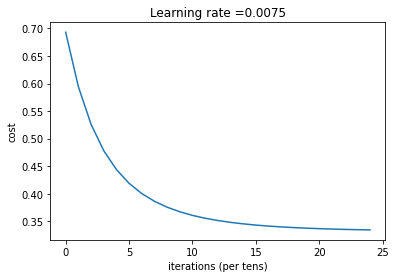

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 25, 1, 1]
Cost after iteration 0: 0.696261
Cost after iteration 100: 0.594419
Cost after iteration 200: 0.526113
Cost after iteration 300: 0.478144
Cost after iteration 400: 0.443824
Cost after iteration 500: 0.418798
Cost after iteration 600: 0.400217
Cost after iteration 700: 0.386194
Cost after iteration 800: 0.375454
Cost after iteration 900: 0.367121
Cost after iteration 1000: 0.360580
Cost after iteration 1100: 0.355395
Cost after iteration 1200: 0.351247
Cost after iteration 1300: 0.347902
Cost after iteration 1400: 0.345187
Cost after iteration 1500: 0.342967
Cost after iteration 1600: 0.341144
Cost after iteration 1700: 0.339638
Cost after iteration 1800: 0.338389
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

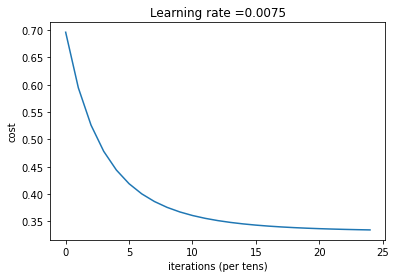

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 25, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

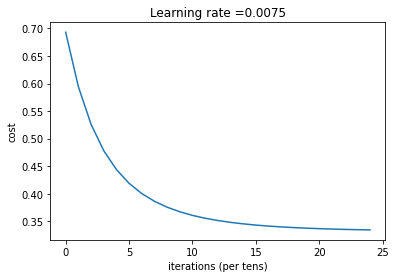

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 25, 1, 1]
Cost after iteration 0: 0.695302
Cost after iteration 100: 0.594423
Cost after iteration 200: 0.526121
Cost after iteration 300: 0.478142
Cost after iteration 400: 0.443475
Cost after iteration 500: 0.418149
Cost after iteration 600: 0.399338
Cost after iteration 700: 0.385101
Cost after iteration 800: 0.374172
Cost after iteration 900: 0.365669
Cost after iteration 1000: 0.358967
Cost after iteration 1100: 0.353618
Cost after iteration 1200: 0.349301
Cost after iteration 1300: 0.345794
Cost after iteration 1400: 0.342920
Cost after iteration 1500: 0.340547
Cost after iteration 1600: 0.338572
Cost after iteration 1700: 0.336915
Cost after iteration 1800: 0.335517
Cost after iteration 1900: 0.334331
Cost after iteration 2000: 0.333320
Cost after iteration 2100: 0.332452
Cost after iteration 2200: 0.331699
Cost after iteration 2300: 0.331047
Cost after i

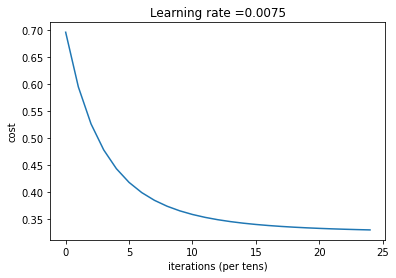

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 25, 1, 1]
Cost after iteration 0: 0.692159
Cost after iteration 100: 0.588991
Cost after iteration 200: 0.517607
Cost after iteration 300: 0.467129
Cost after iteration 400: 0.430716
Cost after iteration 500: 0.404069
Cost after iteration 600: 0.384417
Cost after iteration 700: 0.369892
Cost after iteration 800: 0.359173
Cost after iteration 900: 0.351302
Cost after iteration 1000: 0.345561
Cost after iteration 1100: 0.341407
Cost after iteration 1200: 0.338425
Cost after iteration 1300: 0.336299
Cost after iteration 1400: 0.334794
Cost after iteration 1500: 0.333732
Cost after iteration 1600: 0.332986
Cost after iteration 1700: 0.332462
Cost after iteration 1800: 0.332093
Cost after iteration 1900: 0.331831
Cost after iteration 2000: 0.331643
Cost after iteration 2100: 0.331507
Cost after iteration 2200: 0.331406
Cost after iteration 2300: 0.331328
Cost after i

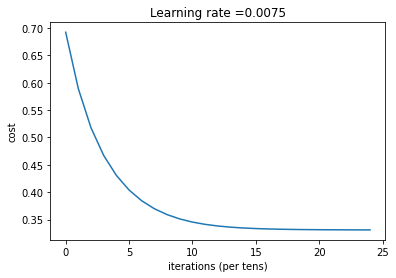

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 25, 1, 1]
Cost after iteration 0: 0.693154
Cost after iteration 100: 0.594444
Cost after iteration 200: 0.526138
Cost after iteration 300: 0.478163
Cost after iteration 400: 0.443838
Cost after iteration 500: 0.418808
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

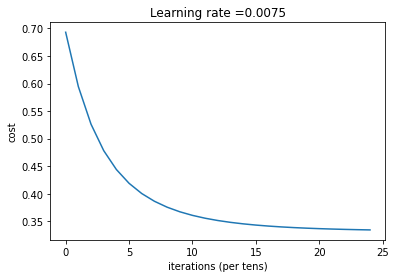

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 25, 1, 1]
Cost after iteration 0: 0.693149
Cost after iteration 100: 0.594442
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335137
Cost after iteration 2300: 0.334619
Cost after i

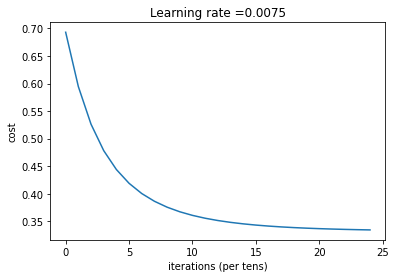

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 25, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

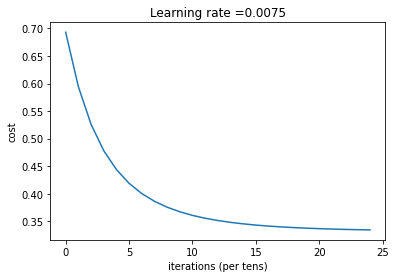

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 33, 1, 1]
Cost after iteration 0: 0.693134
Cost after iteration 100: 0.590749
Cost after iteration 200: 0.520109
Cost after iteration 300: 0.469598
Cost after iteration 400: 0.430954
Cost after iteration 500: 0.402008
Cost after iteration 600: 0.379985
Cost after iteration 700: 0.363318
Cost after iteration 800: 0.351078
Cost after iteration 900: 0.342553
Cost after iteration 1000: 0.337001
Cost after iteration 1100: 0.333627
Cost after iteration 1200: 0.331692
Cost after iteration 1300: 0.330622
Cost after iteration 1400: 0.330033
Cost after iteration 1500: 0.329695
Cost after iteration 1600: 0.329483
Cost after iteration 1700: 0.329331
Cost after iteration 1800: 0.329206
Cost after iteration 1900: 0.329093
Cost after iteration 2000: 0.328983
Cost after iteration 2100: 0.328874
Cost after iteration 2200: 0.328763
Cost after iteration 2300: 0.328650
Cost after it

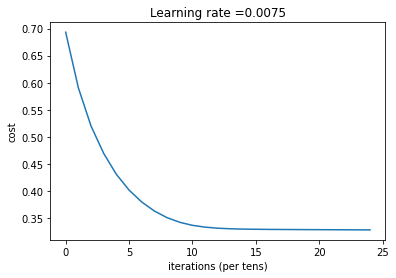

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 33, 1, 1]
Cost after iteration 0: 0.693215
Cost after iteration 100: 0.594442
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

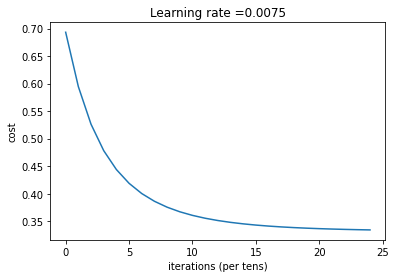

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 33, 1, 1]
Cost after iteration 0: 0.703895
Cost after iteration 100: 0.594401
Cost after iteration 200: 0.526106
Cost after iteration 300: 0.478137
Cost after iteration 400: 0.443815
Cost after iteration 500: 0.418786
Cost after iteration 600: 0.400204
Cost after iteration 700: 0.386179
Cost after iteration 800: 0.375435
Cost after iteration 900: 0.367098
Cost after iteration 1000: 0.360553
Cost after iteration 1100: 0.355360
Cost after iteration 1200: 0.351206
Cost after iteration 1300: 0.347856
Cost after iteration 1400: 0.345134
Cost after iteration 1500: 0.342911
Cost after iteration 1600: 0.341083
Cost after iteration 1700: 0.339573
Cost after iteration 1800: 0.338320
Cost after iteration 1900: 0.337272
Cost after iteration 2000: 0.336396
Cost after iteration 2100: 0.335651
Cost after iteration 2200: 0.335006
Cost after iteration 2300: 0.333123
Cost after i

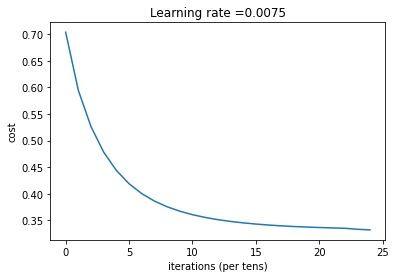

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 33, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

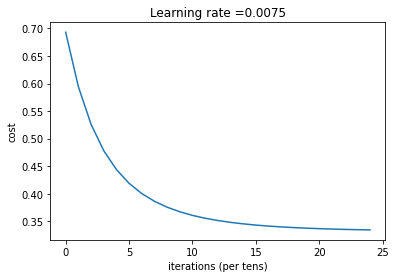

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 33, 1, 1]
Cost after iteration 0: 0.693149
Cost after iteration 100: 0.594442
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

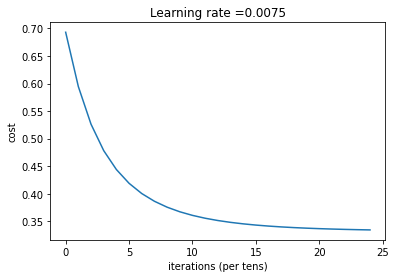

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 33, 1, 1]
Cost after iteration 0: 0.694604
Cost after iteration 100: 0.594430
Cost after iteration 200: 0.526124
Cost after iteration 300: 0.478152
Cost after iteration 400: 0.443830
Cost after iteration 500: 0.418802
Cost after iteration 600: 0.400220
Cost after iteration 700: 0.386196
Cost after iteration 800: 0.375456
Cost after iteration 900: 0.367122
Cost after iteration 1000: 0.360582
Cost after iteration 1100: 0.355396
Cost after iteration 1200: 0.351248
Cost after iteration 1300: 0.347903
Cost after iteration 1400: 0.345187
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341144
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338389
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

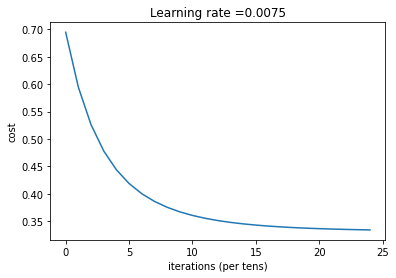

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 33, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

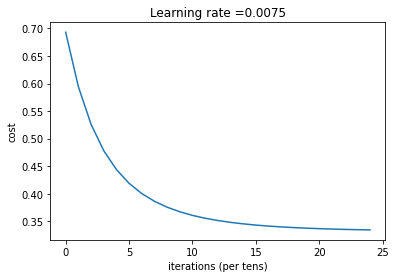

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 33, 1, 1]
Cost after iteration 0: 0.697095
Cost after iteration 100: 0.594396
Cost after iteration 200: 0.526097
Cost after iteration 300: 0.478124
Cost after iteration 400: 0.443797
Cost after iteration 500: 0.418763
Cost after iteration 600: 0.400173
Cost after iteration 700: 0.386133
Cost after iteration 800: 0.375373
Cost after iteration 900: 0.367021
Cost after iteration 1000: 0.360460
Cost after iteration 1100: 0.355253
Cost after iteration 1200: 0.351083
Cost after iteration 1300: 0.347714
Cost after iteration 1400: 0.344974
Cost after iteration 1500: 0.342728
Cost after iteration 1600: 0.340875
Cost after iteration 1700: 0.339339
Cost after iteration 1800: 0.338060
Cost after iteration 1900: 0.336986
Cost after iteration 2000: 0.336080
Cost after iteration 2100: 0.335311
Cost after iteration 2200: 0.334659
Cost after iteration 2300: 0.334094
Cost after i

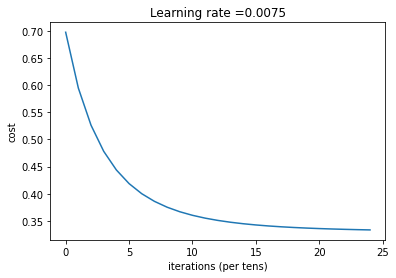

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 41, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

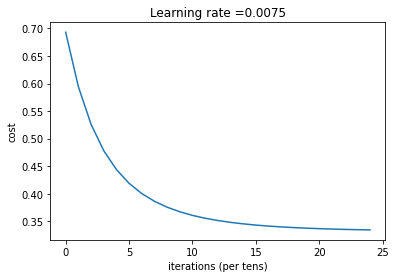

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 41, 1, 1]
Cost after iteration 0: 0.693646
Cost after iteration 100: 0.594438
Cost after iteration 200: 0.526133
Cost after iteration 300: 0.478159
Cost after iteration 400: 0.443835
Cost after iteration 500: 0.418806
Cost after iteration 600: 0.400223
Cost after iteration 700: 0.386198
Cost after iteration 800: 0.375457
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

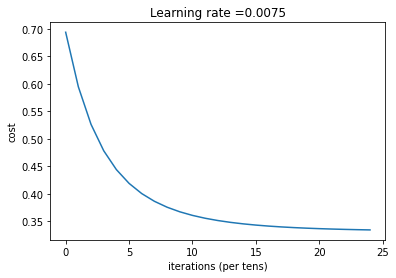

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 41, 1, 1]
Cost after iteration 0: 0.685294
Cost after iteration 100: 0.517769
Cost after iteration 200: 0.418686
Cost after iteration 300: 0.367228
Cost after iteration 400: 0.344924
Cost after iteration 500: 0.336424
Cost after iteration 600: 0.333300
Cost after iteration 700: 0.332051
Cost after iteration 800: 0.331484
Cost after iteration 900: 0.331197
Cost after iteration 1000: 0.331009
Cost after iteration 1100: 0.330860
Cost after iteration 1200: 0.330726
Cost after iteration 1300: 0.330598
Cost after iteration 1400: 0.330472
Cost after iteration 1500: 0.330343
Cost after iteration 1600: 0.330212
Cost after iteration 1700: 0.330079
Cost after iteration 1800: 0.329941
Cost after iteration 1900: 0.329795
Cost after iteration 2000: 0.329638
Cost after iteration 2100: 0.329478
Cost after iteration 2200: 0.329319
Cost after iteration 2300: 0.329159
Cost after i

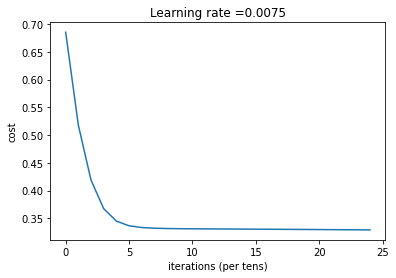

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 41, 1, 1]
Cost after iteration 0: 0.685283
Cost after iteration 100: 0.541476
Cost after iteration 200: 0.446288
Cost after iteration 300: 0.387294
Cost after iteration 400: 0.355594
Cost after iteration 500: 0.340816
Cost after iteration 600: 0.334563
Cost after iteration 700: 0.331998
Cost after iteration 800: 0.330923
Cost after iteration 900: 0.330432
Cost after iteration 1000: 0.330170
Cost after iteration 1100: 0.329994
Cost after iteration 1200: 0.329855
Cost after iteration 1300: 0.329733
Cost after iteration 1400: 0.329620
Cost after iteration 1500: 0.329511
Cost after iteration 1600: 0.329404
Cost after iteration 1700: 0.329298
Cost after iteration 1800: 0.329192
Cost after iteration 1900: 0.329086
Cost after iteration 2000: 0.328980
Cost after iteration 2100: 0.328873
Cost after iteration 2200: 0.328765
Cost after iteration 2300: 0.328656
Cost after i

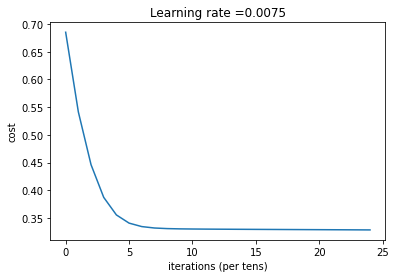

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 41, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478161
Cost after iteration 400: 0.443835
Cost after iteration 500: 0.418802
Cost after iteration 600: 0.400207
Cost after iteration 700: 0.385983
Cost after iteration 800: 0.374137
Cost after iteration 900: 0.365090
Cost after iteration 1000: 0.358178
Cost after iteration 1100: 0.352824
Cost after iteration 1200: 0.348629
Cost after iteration 1300: 0.345313
Cost after iteration 1400: 0.342673
Cost after iteration 1500: 0.340559
Cost after iteration 1600: 0.338856
Cost after iteration 1700: 0.337479
Cost after iteration 1800: 0.336363
Cost after iteration 1900: 0.335454
Cost after iteration 2000: 0.334713
Cost after iteration 2100: 0.334106
Cost after iteration 2200: 0.333608
Cost after iteration 2300: 0.333197
Cost after i

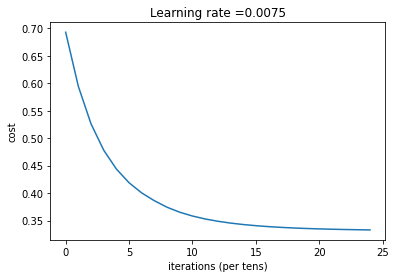

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 41, 1, 1]
Cost after iteration 0: 0.693939
Cost after iteration 100: 0.594439
Cost after iteration 200: 0.526135
Cost after iteration 300: 0.478160
Cost after iteration 400: 0.443835
Cost after iteration 500: 0.418806
Cost after iteration 600: 0.400223
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

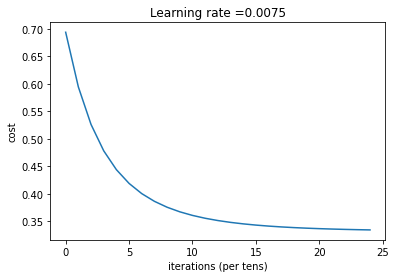

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 41, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

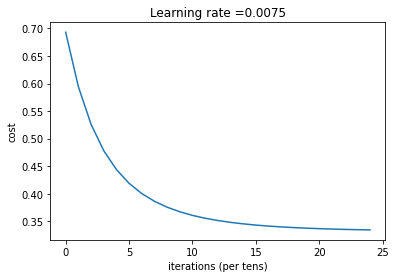

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 41, 1, 1]
Cost after iteration 0: 0.693177
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

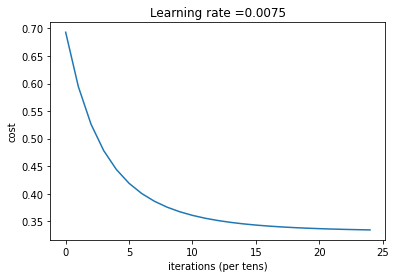

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 49, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

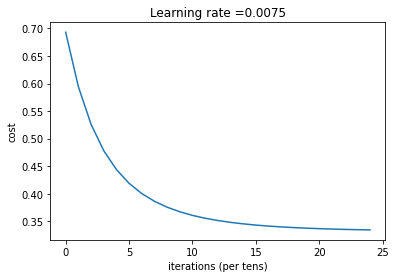

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 49, 1, 1]
Cost after iteration 0: 0.693167
Cost after iteration 100: 0.594451
Cost after iteration 200: 0.526142
Cost after iteration 300: 0.478165
Cost after iteration 400: 0.443838
Cost after iteration 500: 0.418808
Cost after iteration 600: 0.400225
Cost after iteration 700: 0.386200
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342969
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335137
Cost after iteration 2300: 0.334619
Cost after it

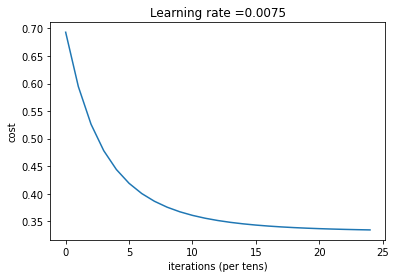

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 49, 1, 1]
Cost after iteration 0: 0.693111
Cost after iteration 100: 0.551889
Cost after iteration 200: 0.450676
Cost after iteration 300: 0.392993
Cost after iteration 400: 0.361706
Cost after iteration 500: 0.345834
Cost after iteration 600: 0.338207
Cost after iteration 700: 0.334663
Cost after iteration 800: 0.333038
Cost after iteration 900: 0.332283
Cost after iteration 1000: 0.331917
Cost after iteration 1100: 0.331722
Cost after iteration 1200: 0.331602
Cost after iteration 1300: 0.331514
Cost after iteration 1400: 0.331441
Cost after iteration 1500: 0.331373
Cost after iteration 1600: 0.331307
Cost after iteration 1700: 0.331239
Cost after iteration 1800: 0.331170
Cost after iteration 1900: 0.331100
Cost after iteration 2000: 0.331032
Cost after iteration 2100: 0.330967
Cost after iteration 2200: 0.330906
Cost after iteration 2300: 0.330847
Cost after i

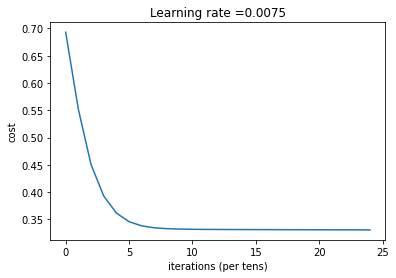

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 49, 1, 1]
Cost after iteration 0: 0.692870
Cost after iteration 100: 0.573335
Cost after iteration 200: 0.492803
Cost after iteration 300: 0.437892
Cost after iteration 400: 0.400260
Cost after iteration 500: 0.374894
Cost after iteration 600: 0.358226
Cost after iteration 700: 0.347581
Cost after iteration 800: 0.340958
Cost after iteration 900: 0.336922
Cost after iteration 1000: 0.334493
Cost after iteration 1100: 0.333020
Cost after iteration 1200: 0.332092
Cost after iteration 1300: 0.331499
Cost after iteration 1400: 0.331158
Cost after iteration 1500: 0.330946
Cost after iteration 1600: 0.330806
Cost after iteration 1700: 0.330706
Cost after iteration 1800: 0.330628
Cost after iteration 1900: 0.330564
Cost after iteration 2000: 0.330506
Cost after iteration 2100: 0.330453
Cost after iteration 2200: 0.330401
Cost after iteration 2300: 0.330350
Cost after i

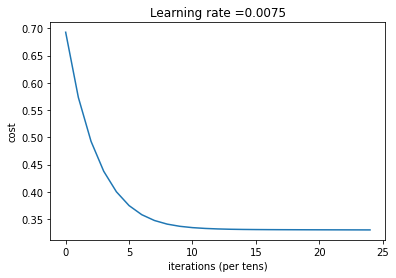

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 49, 1, 1]
Cost after iteration 0: 0.692944
Cost after iteration 100: 0.592714
Cost after iteration 200: 0.523425
Cost after iteration 300: 0.474690
Cost after iteration 400: 0.439734
Cost after iteration 500: 0.414192
Cost after iteration 600: 0.395222
Cost after iteration 700: 0.380934
Cost after iteration 800: 0.370047
Cost after iteration 900: 0.361670
Cost after iteration 1000: 0.355177
Cost after iteration 1100: 0.350114
Cost after iteration 1200: 0.346149
Cost after iteration 1300: 0.343033
Cost after iteration 1400: 0.340577
Cost after iteration 1500: 0.338638
Cost after iteration 1600: 0.337104
Cost after iteration 1700: 0.335890
Cost after iteration 1800: 0.334926
Cost after iteration 1900: 0.334161
Cost after iteration 2000: 0.333554
Cost after iteration 2100: 0.333069
Cost after iteration 2200: 0.332677
Cost after iteration 2300: 0.332357
Cost after i

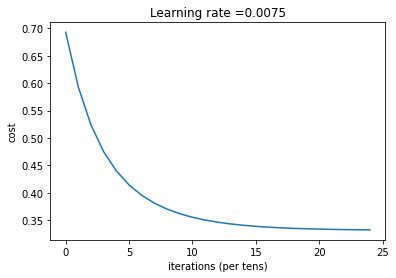

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 49, 1, 1]
Cost after iteration 0: 0.705154
Cost after iteration 100: 0.594401
Cost after iteration 200: 0.526109
Cost after iteration 300: 0.478142
Cost after iteration 400: 0.443823
Cost after iteration 500: 0.418797
Cost after iteration 600: 0.400216
Cost after iteration 700: 0.386193
Cost after iteration 800: 0.375453
Cost after iteration 900: 0.367120
Cost after iteration 1000: 0.360580
Cost after iteration 1100: 0.355395
Cost after iteration 1200: 0.351247
Cost after iteration 1300: 0.347902
Cost after iteration 1400: 0.345187
Cost after iteration 1500: 0.342967
Cost after iteration 1600: 0.341144
Cost after iteration 1700: 0.339638
Cost after iteration 1800: 0.338389
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

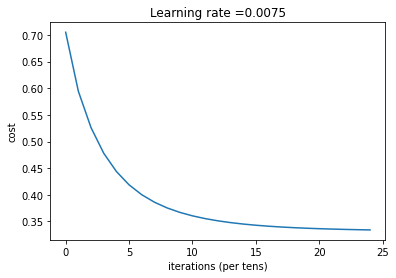

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 49, 1, 1]
Cost after iteration 0: 0.694108
Cost after iteration 100: 0.594433
Cost after iteration 200: 0.526123
Cost after iteration 300: 0.478151
Cost after iteration 400: 0.443829
Cost after iteration 500: 0.418801
Cost after iteration 600: 0.400219
Cost after iteration 700: 0.386195
Cost after iteration 800: 0.375455
Cost after iteration 900: 0.367122
Cost after iteration 1000: 0.360581
Cost after iteration 1100: 0.355396
Cost after iteration 1200: 0.351248
Cost after iteration 1300: 0.347903
Cost after iteration 1400: 0.345187
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341144
Cost after iteration 1700: 0.339638
Cost after iteration 1800: 0.338389
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

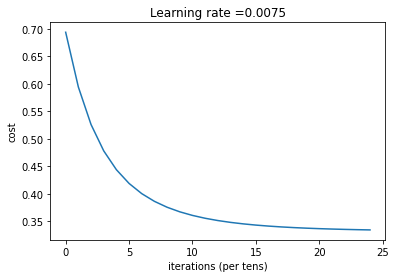

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 49, 1, 1]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

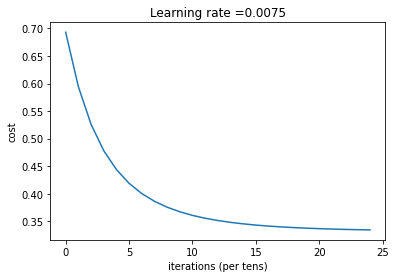

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 57, 1, 1]
Cost after iteration 0: 0.693156
Cost after iteration 100: 0.594441
Cost after iteration 200: 0.526137
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after it

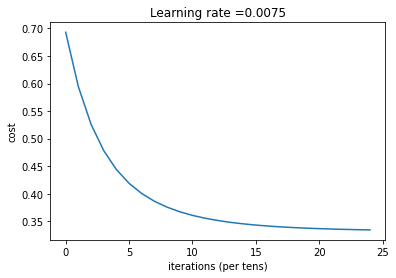

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 57, 1, 1]
Cost after iteration 0: 0.693125
Cost after iteration 100: 0.528721
Cost after iteration 200: 0.425529
Cost after iteration 300: 0.374095
Cost after iteration 400: 0.349850
Cost after iteration 500: 0.339086
Cost after iteration 600: 0.334514
Cost after iteration 700: 0.332598
Cost after iteration 800: 0.331777
Cost after iteration 900: 0.331402
Cost after iteration 1000: 0.331197
Cost after iteration 1100: 0.331042
Cost after iteration 1200: 0.330886
Cost after iteration 1300: 0.330776
Cost after iteration 1400: 0.330686
Cost after iteration 1500: 0.330604
Cost after iteration 1600: 0.330524
Cost after iteration 1700: 0.330444
Cost after iteration 1800: 0.330362
Cost after iteration 1900: 0.330276
Cost after iteration 2000: 0.330184
Cost after iteration 2100: 0.330083
Cost after iteration 2200: 0.329961
Cost after iteration 2300: 0.329806
Cost after it

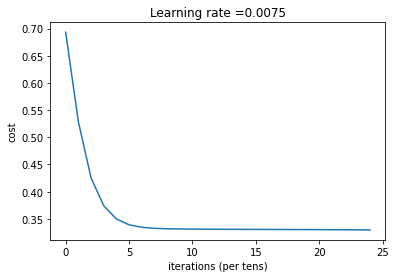

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 57, 1, 1]
Cost after iteration 0: 0.693764
Cost after iteration 100: 0.594439
Cost after iteration 200: 0.526131
Cost after iteration 300: 0.478157
Cost after iteration 400: 0.443833
Cost after iteration 500: 0.418804
Cost after iteration 600: 0.400222
Cost after iteration 700: 0.386198
Cost after iteration 800: 0.375457
Cost after iteration 900: 0.367123
Cost after iteration 1000: 0.360582
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351248
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345187
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

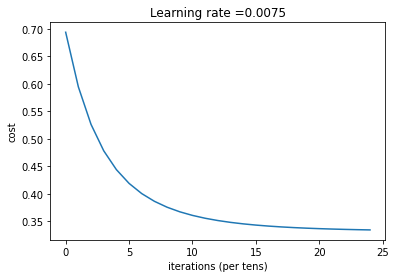

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 57, 1, 1]
Cost after iteration 0: 0.694788
Cost after iteration 100: 0.594411
Cost after iteration 200: 0.526094
Cost after iteration 300: 0.478129
Cost after iteration 400: 0.443812
Cost after iteration 500: 0.418789
Cost after iteration 600: 0.400211
Cost after iteration 700: 0.386189
Cost after iteration 800: 0.375450
Cost after iteration 900: 0.367118
Cost after iteration 1000: 0.360578
Cost after iteration 1100: 0.355393
Cost after iteration 1200: 0.351246
Cost after iteration 1300: 0.347901
Cost after iteration 1400: 0.345186
Cost after iteration 1500: 0.342967
Cost after iteration 1600: 0.341143
Cost after iteration 1700: 0.339638
Cost after iteration 1800: 0.338389
Cost after iteration 1900: 0.337348
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

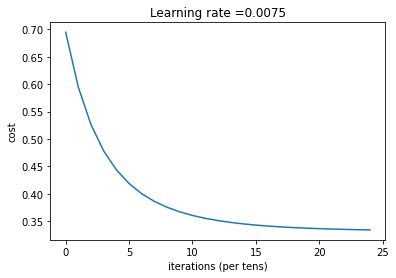

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 57, 1, 1]
Cost after iteration 0: 0.693145
Cost after iteration 100: 0.594435
Cost after iteration 200: 0.526129
Cost after iteration 300: 0.478152
Cost after iteration 400: 0.443824
Cost after iteration 500: 0.418792
Cost after iteration 600: 0.400206
Cost after iteration 700: 0.386178
Cost after iteration 800: 0.375433
Cost after iteration 900: 0.367095
Cost after iteration 1000: 0.360549
Cost after iteration 1100: 0.355356
Cost after iteration 1200: 0.351199
Cost after iteration 1300: 0.347842
Cost after iteration 1400: 0.345113
Cost after iteration 1500: 0.342878
Cost after iteration 1600: 0.341037
Cost after iteration 1700: 0.339513
Cost after iteration 1800: 0.338243
Cost after iteration 1900: 0.337182
Cost after iteration 2000: 0.336292
Cost after iteration 2100: 0.335542
Cost after iteration 2200: 0.334908
Cost after iteration 2300: 0.334371
Cost after i

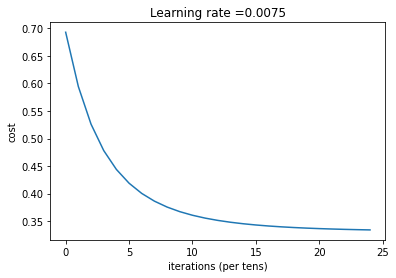

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 57, 1, 1]
Cost after iteration 0: 0.693162
Cost after iteration 100: 0.594447
Cost after iteration 200: 0.526140
Cost after iteration 300: 0.478164
Cost after iteration 400: 0.443838
Cost after iteration 500: 0.418808
Cost after iteration 600: 0.400225
Cost after iteration 700: 0.386200
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355398
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342969
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336480
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335137
Cost after iteration 2300: 0.334619
Cost after i

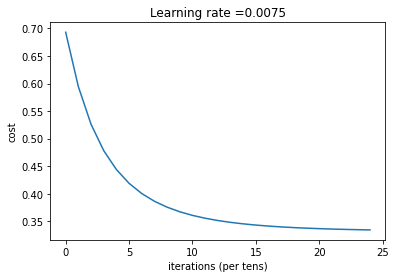

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 57, 1, 1]
Cost after iteration 0: 0.693158
Cost after iteration 100: 0.594445
Cost after iteration 200: 0.526138
Cost after iteration 300: 0.478162
Cost after iteration 400: 0.443837
Cost after iteration 500: 0.418807
Cost after iteration 600: 0.400224
Cost after iteration 700: 0.386199
Cost after iteration 800: 0.375458
Cost after iteration 900: 0.367124
Cost after iteration 1000: 0.360583
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351249
Cost after iteration 1300: 0.347904
Cost after iteration 1400: 0.345188
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338390
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

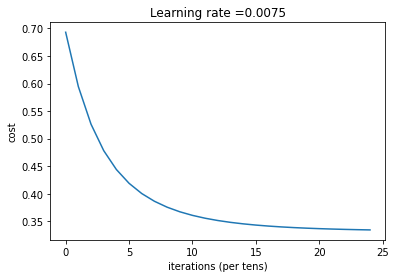

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 57, 1, 1]
Cost after iteration 0: 0.702788
Cost after iteration 100: 0.594428
Cost after iteration 200: 0.526127
Cost after iteration 300: 0.478155
Cost after iteration 400: 0.443832
Cost after iteration 500: 0.418804
Cost after iteration 600: 0.400222
Cost after iteration 700: 0.386197
Cost after iteration 800: 0.375457
Cost after iteration 900: 0.367123
Cost after iteration 1000: 0.360582
Cost after iteration 1100: 0.355397
Cost after iteration 1200: 0.351248
Cost after iteration 1300: 0.347903
Cost after iteration 1400: 0.345187
Cost after iteration 1500: 0.342968
Cost after iteration 1600: 0.341145
Cost after iteration 1700: 0.339639
Cost after iteration 1800: 0.338389
Cost after iteration 1900: 0.337349
Cost after iteration 2000: 0.336479
Cost after iteration 2100: 0.335750
Cost after iteration 2200: 0.335136
Cost after iteration 2300: 0.334619
Cost after i

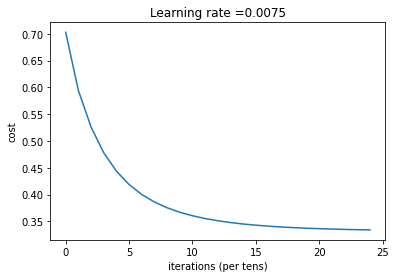

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 1, 9, 1]
Cost after iteration 0: 0.693138
Cost after iteration 100: 0.544859
Cost after iteration 200: 0.449546
Cost after iteration 300: 0.388247
Cost after iteration 400: 0.353181
Cost after iteration 500: 0.338238
Cost after iteration 600: 0.332941
Cost after iteration 700: 0.331223
Cost after iteration 800: 0.330674
Cost after iteration 900: 0.330483
Cost after iteration 1000: 0.330399
Cost after iteration 1100: 0.330345
Cost after iteration 1200: 0.330300
Cost after iteration 1300: 0.330256
Cost after iteration 1400: 0.330212
Cost after iteration 1500: 0.330168
Cost after iteration 1600: 0.330122
Cost after iteration 1700: 0.330076
Cost after iteration 1800: 0.330028
Cost after iteration 1900: 0.329979
Cost after iteration 2000: 0.329929
Cost after iteration 2100: 0.329878
Cost after iteration 2200: 0.329826
Cost after iteration 2300: 0.329772
Cost after ite

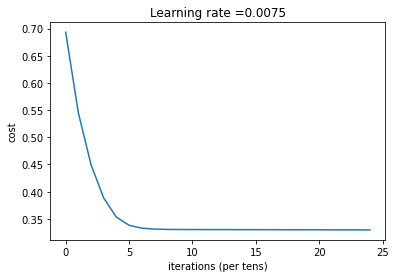

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 1, 9, 1]
Cost after iteration 0: 0.695514
Cost after iteration 100: 0.581387
Cost after iteration 200: 0.503499
Cost after iteration 300: 0.448729
Cost after iteration 400: 0.410065
Cost after iteration 500: 0.383151
Cost after iteration 600: 0.364802
Cost after iteration 700: 0.352612
Cost after iteration 800: 0.344692
Cost after iteration 900: 0.339633
Cost after iteration 1000: 0.336452
Cost after iteration 1100: 0.334482
Cost after iteration 1200: 0.333278
Cost after iteration 1300: 0.332547
Cost after iteration 1400: 0.332106
Cost after iteration 1500: 0.331836
Cost after iteration 1600: 0.331664
Cost after iteration 1700: 0.331543
Cost after iteration 1800: 0.331447
Cost after iteration 1900: 0.331376
Cost after iteration 2000: 0.331323
Cost after iteration 2100: 0.331281
Cost after iteration 2200: 0.331244
Cost after iteration 2300: 0.331211
Cost after ite

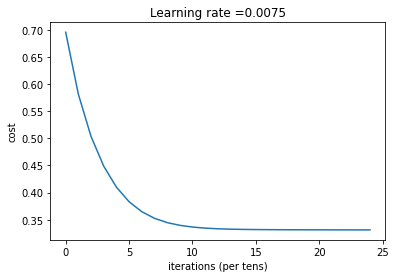

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 1, 9, 1]
Cost after iteration 0: 0.692924
Cost after iteration 100: 0.576090
Cost after iteration 200: 0.489623
Cost after iteration 300: 0.425460
Cost after iteration 400: 0.381462
Cost after iteration 500: 0.355394
Cost after iteration 600: 0.342028
Cost after iteration 700: 0.335872
Cost after iteration 800: 0.333211
Cost after iteration 900: 0.332086
Cost after iteration 1000: 0.331589
Cost after iteration 1100: 0.331340
Cost after iteration 1200: 0.331160
Cost after iteration 1300: 0.331020
Cost after iteration 1400: 0.330918
Cost after iteration 1500: 0.330830
Cost after iteration 1600: 0.330754
Cost after iteration 1700: 0.330684
Cost after iteration 1800: 0.330616
Cost after iteration 1900: 0.330549
Cost after iteration 2000: 0.330484
Cost after iteration 2100: 0.330418
Cost after iteration 2200: 0.330353
Cost after iteration 2300: 0.330288
Cost after it

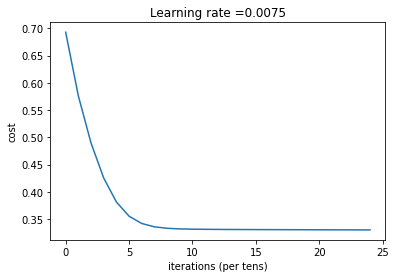

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 1, 9, 1]
Cost after iteration 0: 0.692988
Cost after iteration 100: 0.412121
Cost after iteration 200: 0.335525
Cost after iteration 300: 0.329309
Cost after iteration 400: 0.328169
Cost after iteration 500: 0.327528
Cost after iteration 600: 0.327078
Cost after iteration 700: 0.326693
Cost after iteration 800: 0.326323
Cost after iteration 900: 0.325952
Cost after iteration 1000: 0.325573
Cost after iteration 1100: 0.325179
Cost after iteration 1200: 0.324765
Cost after iteration 1300: 0.324320
Cost after iteration 1400: 0.323835
Cost after iteration 1500: 0.323309
Cost after iteration 1600: 0.322790
Cost after iteration 1700: 0.322262
Cost after iteration 1800: 0.321711
Cost after iteration 1900: 0.321131
Cost after iteration 2000: 0.320519
Cost after iteration 2100: 0.319870
Cost after iteration 2200: 0.319181
Cost after iteration 2300: 0.318449
Cost after it

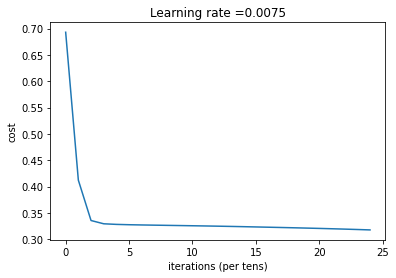

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 1, 9, 1]
Cost after iteration 0: 0.692971
Cost after iteration 100: 0.552629
Cost after iteration 200: 0.455943
Cost after iteration 300: 0.392088
Cost after iteration 400: 0.356998
Cost after iteration 500: 0.341000
Cost after iteration 600: 0.334545
Cost after iteration 700: 0.332065
Cost after iteration 800: 0.331082
Cost after iteration 900: 0.330643
Cost after iteration 1000: 0.330397
Cost after iteration 1100: 0.330224
Cost after iteration 1200: 0.330069
Cost after iteration 1300: 0.329904
Cost after iteration 1400: 0.329683
Cost after iteration 1500: 0.329491
Cost after iteration 1600: 0.329340
Cost after iteration 1700: 0.329205
Cost after iteration 1800: 0.329077
Cost after iteration 1900: 0.328952
Cost after iteration 2000: 0.328829
Cost after iteration 2100: 0.328705
Cost after iteration 2200: 0.328580
Cost after iteration 2300: 0.328453
Cost after it

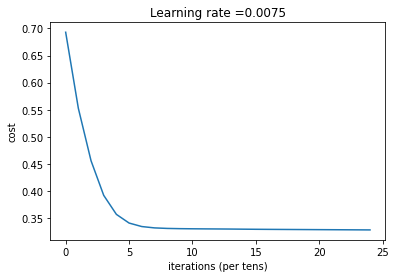

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 1, 9, 1]
Cost after iteration 0: 0.685229
Cost after iteration 100: 0.469804
Cost after iteration 200: 0.364101
Cost after iteration 300: 0.337843
Cost after iteration 400: 0.332961
Cost after iteration 500: 0.331738
Cost after iteration 600: 0.331100
Cost after iteration 700: 0.330641
Cost after iteration 800: 0.330263
Cost after iteration 900: 0.329898
Cost after iteration 1000: 0.329564
Cost after iteration 1100: 0.329248
Cost after iteration 1200: 0.328928
Cost after iteration 1300: 0.328581
Cost after iteration 1400: 0.328238
Cost after iteration 1500: 0.327902
Cost after iteration 1600: 0.327588
Cost after iteration 1700: 0.327286
Cost after iteration 1800: 0.326989
Cost after iteration 1900: 0.326689
Cost after iteration 2000: 0.326383
Cost after iteration 2100: 0.326069
Cost after iteration 2200: 0.325747
Cost after iteration 2300: 0.325413
Cost after it

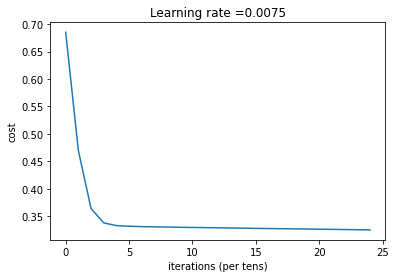

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 1, 9, 1]
Cost after iteration 0: 0.690864
Cost after iteration 100: 0.557218
Cost after iteration 200: 0.468854
Cost after iteration 300: 0.409601
Cost after iteration 400: 0.372191
Cost after iteration 500: 0.350789
Cost after iteration 600: 0.339701
Cost after iteration 700: 0.334357
Cost after iteration 800: 0.331880
Cost after iteration 900: 0.330738
Cost after iteration 1000: 0.330190
Cost after iteration 1100: 0.329900
Cost after iteration 1200: 0.329718
Cost after iteration 1300: 0.329578
Cost after iteration 1400: 0.329453
Cost after iteration 1500: 0.329330
Cost after iteration 1600: 0.329193
Cost after iteration 1700: 0.329039
Cost after iteration 1800: 0.328890
Cost after iteration 1900: 0.328743
Cost after iteration 2000: 0.328605
Cost after iteration 2100: 0.328478
Cost after iteration 2200: 0.328357
Cost after iteration 2300: 0.328240
Cost after it

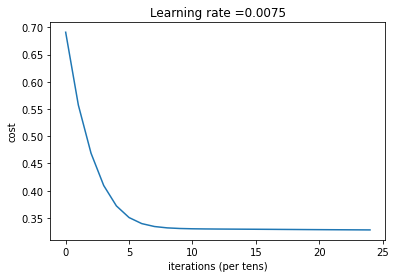

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 1, 9, 1]
Cost after iteration 0: 0.691049
Cost after iteration 100: 0.492072
Cost after iteration 200: 0.380421
Cost after iteration 300: 0.341649
Cost after iteration 400: 0.331896
Cost after iteration 500: 0.329384
Cost after iteration 600: 0.328517
Cost after iteration 700: 0.328030
Cost after iteration 800: 0.327646
Cost after iteration 900: 0.327314
Cost after iteration 1000: 0.327011
Cost after iteration 1100: 0.326719
Cost after iteration 1200: 0.326431
Cost after iteration 1300: 0.326146
Cost after iteration 1400: 0.325865
Cost after iteration 1500: 0.325584
Cost after iteration 1600: 0.325299
Cost after iteration 1700: 0.325010
Cost after iteration 1800: 0.324715
Cost after iteration 1900: 0.324413
Cost after iteration 2000: 0.324102
Cost after iteration 2100: 0.323782
Cost after iteration 2200: 0.323454
Cost after iteration 2300: 0.323114
Cost after it

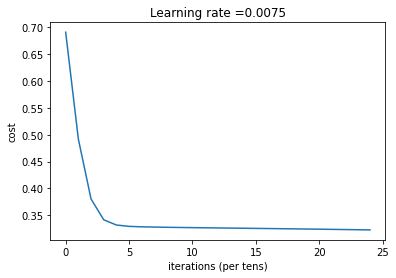

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 9, 9, 1]
Cost after iteration 0: 0.693124
Cost after iteration 100: 0.564514
Cost after iteration 200: 0.477651
Cost after iteration 300: 0.414295
Cost after iteration 400: 0.372915
Cost after iteration 500: 0.349170
Cost after iteration 600: 0.337568
Cost after iteration 700: 0.332611
Cost after iteration 800: 0.330653
Cost after iteration 900: 0.329884
Cost after iteration 1000: 0.329549
Cost after iteration 1100: 0.329364
Cost after iteration 1200: 0.329229
Cost after iteration 1300: 0.329109
Cost after iteration 1400: 0.328991
Cost after iteration 1500: 0.328872
Cost after iteration 1600: 0.328750
Cost after iteration 1700: 0.328625
Cost after iteration 1800: 0.328496
Cost after iteration 1900: 0.328363
Cost after iteration 2000: 0.328226
Cost after iteration 2100: 0.328085
Cost after iteration 2200: 0.327940
Cost after iteration 2300: 0.327789
Cost after ite

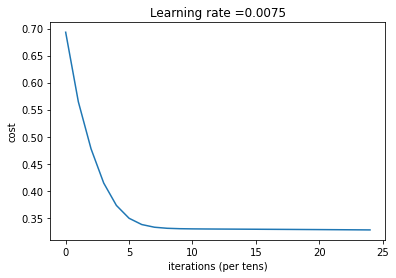

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 9, 9, 1]
Cost after iteration 0: 0.690852
Cost after iteration 100: 0.523231
Cost after iteration 200: 0.421365
Cost after iteration 300: 0.373839
Cost after iteration 400: 0.351384
Cost after iteration 500: 0.340732
Cost after iteration 600: 0.335657
Cost after iteration 700: 0.333222
Cost after iteration 800: 0.332041
Cost after iteration 900: 0.331457
Cost after iteration 1000: 0.331160
Cost after iteration 1100: 0.331003
Cost after iteration 1200: 0.330914
Cost after iteration 1300: 0.330858
Cost after iteration 1400: 0.330818
Cost after iteration 1500: 0.330786
Cost after iteration 1600: 0.330758
Cost after iteration 1700: 0.330731
Cost after iteration 1800: 0.330705
Cost after iteration 1900: 0.330680
Cost after iteration 2000: 0.330654
Cost after iteration 2100: 0.330629
Cost after iteration 2200: 0.330603
Cost after iteration 2300: 0.330576
Cost after ite

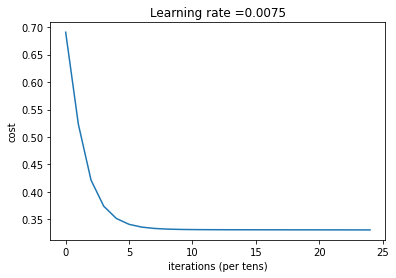

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 9, 9, 1]
Cost after iteration 0: 0.696867
Cost after iteration 100: 0.586794
Cost after iteration 200: 0.514198
Cost after iteration 300: 0.462871
Cost after iteration 400: 0.425826
Cost after iteration 500: 0.398926
Cost after iteration 600: 0.379334
Cost after iteration 700: 0.365116
Cost after iteration 800: 0.354887
Cost after iteration 900: 0.347614
Cost after iteration 1000: 0.342509
Cost after iteration 1100: 0.338968
Cost after iteration 1200: 0.336539
Cost after iteration 1300: 0.334886
Cost after iteration 1400: 0.333767
Cost after iteration 1500: 0.333011
Cost after iteration 1600: 0.332493
Cost after iteration 1700: 0.332133
Cost after iteration 1800: 0.331872
Cost after iteration 1900: 0.331683
Cost after iteration 2000: 0.331562
Cost after iteration 2100: 0.331479
Cost after iteration 2200: 0.331420
Cost after iteration 2300: 0.331374
Cost after it

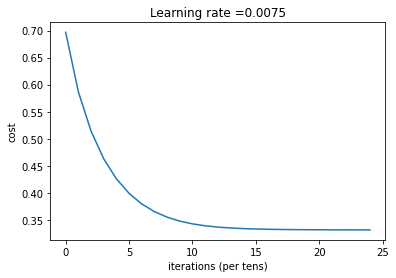

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 9, 9, 1]
Cost after iteration 0: 0.690038
Cost after iteration 100: 0.524318
Cost after iteration 200: 0.423808
Cost after iteration 300: 0.370338
Cost after iteration 400: 0.346414
Cost after iteration 500: 0.336785
Cost after iteration 600: 0.333103
Cost after iteration 700: 0.331691
Cost after iteration 800: 0.331099
Cost after iteration 900: 0.330789
Cost after iteration 1000: 0.330547
Cost after iteration 1100: 0.330354
Cost after iteration 1200: 0.330202
Cost after iteration 1300: 0.330069
Cost after iteration 1400: 0.329950
Cost after iteration 1500: 0.329834
Cost after iteration 1600: 0.329720
Cost after iteration 1700: 0.329605
Cost after iteration 1800: 0.329490
Cost after iteration 1900: 0.329372
Cost after iteration 2000: 0.329250
Cost after iteration 2100: 0.329120
Cost after iteration 2200: 0.328984
Cost after iteration 2300: 0.328841
Cost after it

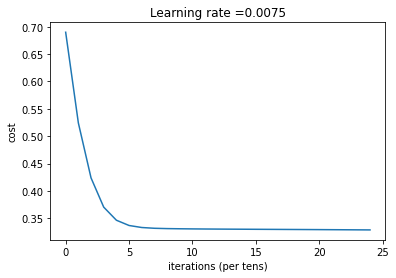

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 9, 9, 1]
Cost after iteration 0: 0.691478
Cost after iteration 100: 0.561478
Cost after iteration 200: 0.476847
Cost after iteration 300: 0.420586
Cost after iteration 400: 0.384114
Cost after iteration 500: 0.361428
Cost after iteration 600: 0.347993
Cost after iteration 700: 0.340343
Cost after iteration 800: 0.336089
Cost after iteration 900: 0.333745
Cost after iteration 1000: 0.332460
Cost after iteration 1100: 0.331746
Cost after iteration 1200: 0.331336
Cost after iteration 1300: 0.331083
Cost after iteration 1400: 0.330911
Cost after iteration 1500: 0.330781
Cost after iteration 1600: 0.330673
Cost after iteration 1700: 0.330580
Cost after iteration 1800: 0.330501
Cost after iteration 1900: 0.330430
Cost after iteration 2000: 0.330366
Cost after iteration 2100: 0.330307
Cost after iteration 2200: 0.330251
Cost after iteration 2300: 0.330198
Cost after it

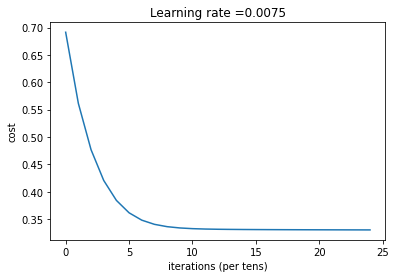

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 9, 9, 1]
Cost after iteration 0: 0.701181
Cost after iteration 100: 0.565226
Cost after iteration 200: 0.473134
Cost after iteration 300: 0.412730
Cost after iteration 400: 0.376602
Cost after iteration 500: 0.355665
Cost after iteration 600: 0.343951
Cost after iteration 700: 0.337570
Cost after iteration 800: 0.334148
Cost after iteration 900: 0.332307
Cost after iteration 1000: 0.331294
Cost after iteration 1100: 0.330709
Cost after iteration 1200: 0.330342
Cost after iteration 1300: 0.330070
Cost after iteration 1400: 0.329859
Cost after iteration 1500: 0.329694
Cost after iteration 1600: 0.329554
Cost after iteration 1700: 0.329430
Cost after iteration 1800: 0.329306
Cost after iteration 1900: 0.329183
Cost after iteration 2000: 0.329060
Cost after iteration 2100: 0.328938
Cost after iteration 2200: 0.328821
Cost after iteration 2300: 0.328717
Cost after it

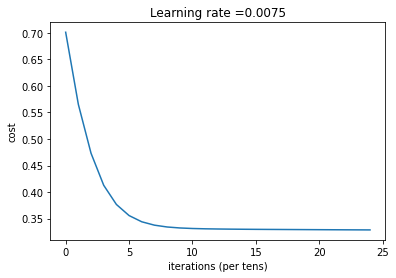

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 9, 9, 1]
Cost after iteration 0: 0.691359
Cost after iteration 100: 0.540660
Cost after iteration 200: 0.450218
Cost after iteration 300: 0.397022
Cost after iteration 400: 0.366797
Cost after iteration 500: 0.350068
Cost after iteration 600: 0.340986
Cost after iteration 700: 0.336107
Cost after iteration 800: 0.333488
Cost after iteration 900: 0.332064
Cost after iteration 1000: 0.331265
Cost after iteration 1100: 0.330794
Cost after iteration 1200: 0.330497
Cost after iteration 1300: 0.330287
Cost after iteration 1400: 0.330124
Cost after iteration 1500: 0.329983
Cost after iteration 1600: 0.329864
Cost after iteration 1700: 0.329767
Cost after iteration 1800: 0.329681
Cost after iteration 1900: 0.329604
Cost after iteration 2000: 0.329534
Cost after iteration 2100: 0.329468
Cost after iteration 2200: 0.329403
Cost after iteration 2300: 0.329338
Cost after it

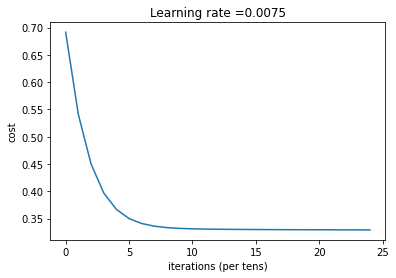

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 9, 9, 1]
Cost after iteration 0: 0.692848
Cost after iteration 100: 0.551886
Cost after iteration 200: 0.453417
Cost after iteration 300: 0.389564
Cost after iteration 400: 0.355757
Cost after iteration 500: 0.340599
Cost after iteration 600: 0.334775
Cost after iteration 700: 0.332553
Cost after iteration 800: 0.331633
Cost after iteration 900: 0.331139
Cost after iteration 1000: 0.330804
Cost after iteration 1100: 0.330557
Cost after iteration 1200: 0.330353
Cost after iteration 1300: 0.330183
Cost after iteration 1400: 0.330030
Cost after iteration 1500: 0.329887
Cost after iteration 1600: 0.329747
Cost after iteration 1700: 0.329613
Cost after iteration 1800: 0.329480
Cost after iteration 1900: 0.329347
Cost after iteration 2000: 0.329215
Cost after iteration 2100: 0.329084
Cost after iteration 2200: 0.328952
Cost after iteration 2300: 0.328819
Cost after it

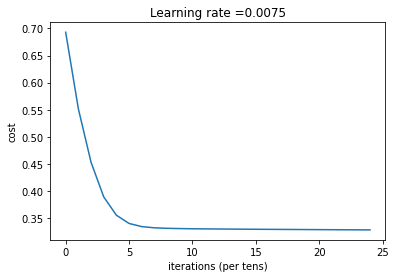

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 17, 9, 1]
Cost after iteration 0: 0.693079
Cost after iteration 100: 0.490563
Cost after iteration 200: 0.375356
Cost after iteration 300: 0.338160
Cost after iteration 400: 0.330248
Cost after iteration 500: 0.328724
Cost after iteration 600: 0.328290
Cost after iteration 700: 0.328022
Cost after iteration 800: 0.327773
Cost after iteration 900: 0.327519
Cost after iteration 1000: 0.327258
Cost after iteration 1100: 0.326987
Cost after iteration 1200: 0.326707
Cost after iteration 1300: 0.326416
Cost after iteration 1400: 0.326113
Cost after iteration 1500: 0.325797
Cost after iteration 1600: 0.325469
Cost after iteration 1700: 0.325126
Cost after iteration 1800: 0.324768
Cost after iteration 1900: 0.324393
Cost after iteration 2000: 0.324000
Cost after iteration 2100: 0.323588
Cost after iteration 2200: 0.323156
Cost after iteration 2300: 0.322701
Cost after it

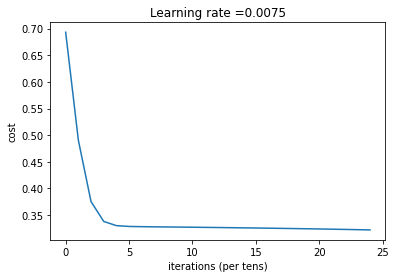

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 17, 9, 1]
Cost after iteration 0: 0.693382
Cost after iteration 100: 0.569894
Cost after iteration 200: 0.487774
Cost after iteration 300: 0.431441
Cost after iteration 400: 0.393357
Cost after iteration 500: 0.368429
Cost after iteration 600: 0.352775
Cost after iteration 700: 0.343319
Cost after iteration 800: 0.337790
Cost after iteration 900: 0.334631
Cost after iteration 1000: 0.332853
Cost after iteration 1100: 0.331858
Cost after iteration 1200: 0.331298
Cost after iteration 1300: 0.330976
Cost after iteration 1400: 0.330782
Cost after iteration 1500: 0.330657
Cost after iteration 1600: 0.330570
Cost after iteration 1700: 0.330501
Cost after iteration 1800: 0.330435
Cost after iteration 1900: 0.330364
Cost after iteration 2000: 0.330318
Cost after iteration 2100: 0.330280
Cost after iteration 2200: 0.330243
Cost after iteration 2300: 0.330208
Cost after it

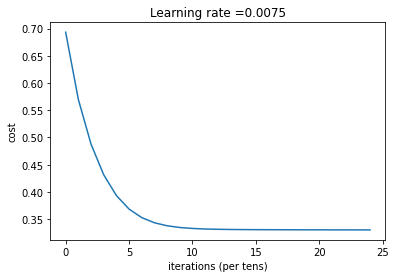

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 17, 9, 1]
Cost after iteration 0: 0.681291
Cost after iteration 100: 0.419537
Cost after iteration 200: 0.350676
Cost after iteration 300: 0.335127
Cost after iteration 400: 0.331590
Cost after iteration 500: 0.330625
Cost after iteration 600: 0.330208
Cost after iteration 700: 0.329936
Cost after iteration 800: 0.329719
Cost after iteration 900: 0.329518
Cost after iteration 1000: 0.329316
Cost after iteration 1100: 0.329109
Cost after iteration 1200: 0.328878
Cost after iteration 1300: 0.328620
Cost after iteration 1400: 0.328367
Cost after iteration 1500: 0.328117
Cost after iteration 1600: 0.327893
Cost after iteration 1700: 0.327680
Cost after iteration 1800: 0.327471
Cost after iteration 1900: 0.327259
Cost after iteration 2000: 0.327044
Cost after iteration 2100: 0.326826
Cost after iteration 2200: 0.326603
Cost after iteration 2300: 0.326375
Cost after i

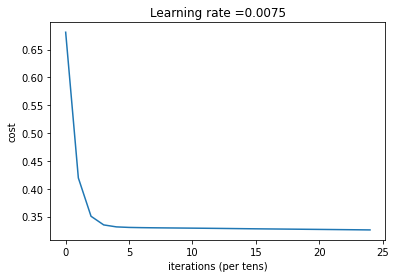

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 17, 9, 1]
Cost after iteration 0: 0.693868
Cost after iteration 100: 0.578056
Cost after iteration 200: 0.499746
Cost after iteration 300: 0.444321
Cost after iteration 400: 0.404975
Cost after iteration 500: 0.377837
Cost after iteration 600: 0.359722
Cost after iteration 700: 0.348098
Cost after iteration 800: 0.340930
Cost after iteration 900: 0.336641
Cost after iteration 1000: 0.334126
Cost after iteration 1100: 0.332663
Cost after iteration 1200: 0.331809
Cost after iteration 1300: 0.331301
Cost after iteration 1400: 0.330979
Cost after iteration 1500: 0.330760
Cost after iteration 1600: 0.330610
Cost after iteration 1700: 0.330502
Cost after iteration 1800: 0.330418
Cost after iteration 1900: 0.330348
Cost after iteration 2000: 0.330287
Cost after iteration 2100: 0.330230
Cost after iteration 2200: 0.330175
Cost after iteration 2300: 0.330122
Cost after i

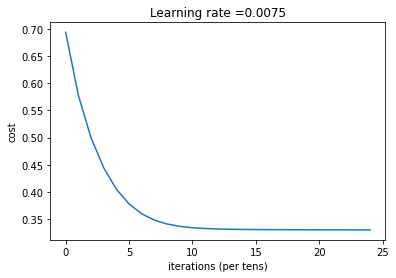

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 17, 9, 1]
Cost after iteration 0: 0.692373
Cost after iteration 100: 0.543343
Cost after iteration 200: 0.447191
Cost after iteration 300: 0.392867
Cost after iteration 400: 0.362998
Cost after iteration 500: 0.347099
Cost after iteration 600: 0.338856
Cost after iteration 700: 0.334630
Cost after iteration 800: 0.332453
Cost after iteration 900: 0.331304
Cost after iteration 1000: 0.330671
Cost after iteration 1100: 0.330279
Cost after iteration 1200: 0.329992
Cost after iteration 1300: 0.329757
Cost after iteration 1400: 0.329580
Cost after iteration 1500: 0.329452
Cost after iteration 1600: 0.329341
Cost after iteration 1700: 0.329246
Cost after iteration 1800: 0.329158
Cost after iteration 1900: 0.329077
Cost after iteration 2000: 0.328998
Cost after iteration 2100: 0.328921
Cost after iteration 2200: 0.328845
Cost after iteration 2300: 0.328768
Cost after i

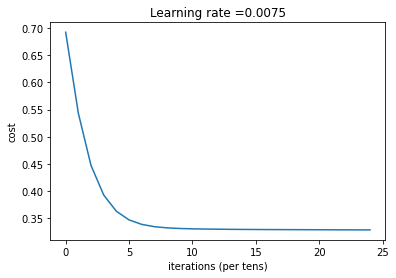

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 17, 9, 1]
Cost after iteration 0: 0.694053
Cost after iteration 100: 0.580587
Cost after iteration 200: 0.493725
Cost after iteration 300: 0.433925
Cost after iteration 400: 0.393233
Cost after iteration 500: 0.366920
Cost after iteration 600: 0.350962
Cost after iteration 700: 0.341832
Cost after iteration 800: 0.336846
Cost after iteration 900: 0.334208
Cost after iteration 1000: 0.332816
Cost after iteration 1100: 0.332073
Cost after iteration 1200: 0.331661
Cost after iteration 1300: 0.331415
Cost after iteration 1400: 0.331257
Cost after iteration 1500: 0.331143
Cost after iteration 1600: 0.331053
Cost after iteration 1700: 0.330976
Cost after iteration 1800: 0.330907
Cost after iteration 1900: 0.330840
Cost after iteration 2000: 0.330776
Cost after iteration 2100: 0.330712
Cost after iteration 2200: 0.330648
Cost after iteration 2300: 0.330583
Cost after i

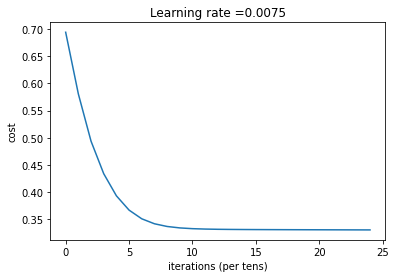

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 17, 9, 1]
Cost after iteration 0: 0.686823
Cost after iteration 100: 0.468314
Cost after iteration 200: 0.376248
Cost after iteration 300: 0.343870
Cost after iteration 400: 0.333392
Cost after iteration 500: 0.329880
Cost after iteration 600: 0.328461
Cost after iteration 700: 0.327707
Cost after iteration 800: 0.327245
Cost after iteration 900: 0.326903
Cost after iteration 1000: 0.326607
Cost after iteration 1100: 0.326329
Cost after iteration 1200: 0.326051
Cost after iteration 1300: 0.325770
Cost after iteration 1400: 0.325480
Cost after iteration 1500: 0.325180
Cost after iteration 1600: 0.324878
Cost after iteration 1700: 0.324575
Cost after iteration 1800: 0.324268
Cost after iteration 1900: 0.323955
Cost after iteration 2000: 0.323634
Cost after iteration 2100: 0.323305
Cost after iteration 2200: 0.322967
Cost after iteration 2300: 0.322618
Cost after i

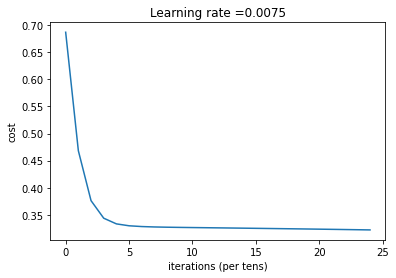

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 17, 9, 1]
Cost after iteration 0: 0.684923
Cost after iteration 100: 0.469652
Cost after iteration 200: 0.377955
Cost after iteration 300: 0.345118
Cost after iteration 400: 0.334251
Cost after iteration 500: 0.330597
Cost after iteration 600: 0.329218
Cost after iteration 700: 0.328533
Cost after iteration 800: 0.328040
Cost after iteration 900: 0.327562
Cost after iteration 1000: 0.326985
Cost after iteration 1100: 0.326413
Cost after iteration 1200: 0.325970
Cost after iteration 1300: 0.325608
Cost after iteration 1400: 0.325292
Cost after iteration 1500: 0.324992
Cost after iteration 1600: 0.324696
Cost after iteration 1700: 0.324391
Cost after iteration 1800: 0.324075
Cost after iteration 1900: 0.323733
Cost after iteration 2000: 0.323367
Cost after iteration 2100: 0.323012
Cost after iteration 2200: 0.322665
Cost after iteration 2300: 0.322328
Cost after i

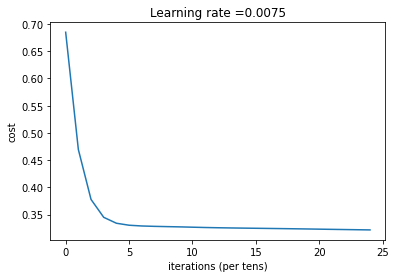

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 25, 9, 1]
Cost after iteration 0: 0.693121
Cost after iteration 100: 0.570323
Cost after iteration 200: 0.475771
Cost after iteration 300: 0.402012
Cost after iteration 400: 0.355966
Cost after iteration 500: 0.336461
Cost after iteration 600: 0.330531
Cost after iteration 700: 0.328931
Cost after iteration 800: 0.328411
Cost after iteration 900: 0.328129
Cost after iteration 1000: 0.327894
Cost after iteration 1100: 0.327664
Cost after iteration 1200: 0.327430
Cost after iteration 1300: 0.327190
Cost after iteration 1400: 0.326943
Cost after iteration 1500: 0.326688
Cost after iteration 1600: 0.326425
Cost after iteration 1700: 0.326153
Cost after iteration 1800: 0.325871
Cost after iteration 1900: 0.325579
Cost after iteration 2000: 0.325277
Cost after iteration 2100: 0.324962
Cost after iteration 2200: 0.324635
Cost after iteration 2300: 0.324294
Cost after it

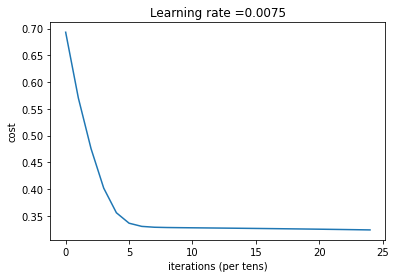

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 25, 9, 1]
Cost after iteration 0: 0.696661
Cost after iteration 100: 0.577032
Cost after iteration 200: 0.496613
Cost after iteration 300: 0.440367
Cost after iteration 400: 0.401157
Cost after iteration 500: 0.374585
Cost after iteration 600: 0.357304
Cost after iteration 700: 0.346529
Cost after iteration 800: 0.340030
Cost after iteration 900: 0.336160
Cost after iteration 1000: 0.333844
Cost after iteration 1100: 0.332503
Cost after iteration 1200: 0.331729
Cost after iteration 1300: 0.331255
Cost after iteration 1400: 0.330948
Cost after iteration 1500: 0.330751
Cost after iteration 1600: 0.330618
Cost after iteration 1700: 0.330518
Cost after iteration 1800: 0.330438
Cost after iteration 1900: 0.330370
Cost after iteration 2000: 0.330308
Cost after iteration 2100: 0.330249
Cost after iteration 2200: 0.330192
Cost after iteration 2300: 0.330137
Cost after it

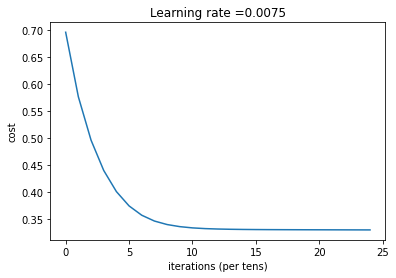

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 25, 9, 1]
Cost after iteration 0: 0.691326
Cost after iteration 100: 0.514851
Cost after iteration 200: 0.418094
Cost after iteration 300: 0.369329
Cost after iteration 400: 0.347123
Cost after iteration 500: 0.337705
Cost after iteration 600: 0.333849
Cost after iteration 700: 0.332273
Cost after iteration 800: 0.331604
Cost after iteration 900: 0.331293
Cost after iteration 1000: 0.331126
Cost after iteration 1100: 0.331017
Cost after iteration 1200: 0.330932
Cost after iteration 1300: 0.330854
Cost after iteration 1400: 0.330777
Cost after iteration 1500: 0.330695
Cost after iteration 1600: 0.330617
Cost after iteration 1700: 0.330543
Cost after iteration 1800: 0.330470
Cost after iteration 1900: 0.330402
Cost after iteration 2000: 0.330336
Cost after iteration 2100: 0.330272
Cost after iteration 2200: 0.330208
Cost after iteration 2300: 0.330144
Cost after i

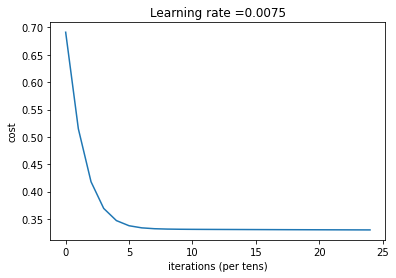

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 25, 9, 1]
Cost after iteration 0: 0.686155
Cost after iteration 100: 0.493843
Cost after iteration 200: 0.395394
Cost after iteration 300: 0.353456
Cost after iteration 400: 0.338153
Cost after iteration 500: 0.332917
Cost after iteration 600: 0.331094
Cost after iteration 700: 0.330378
Cost after iteration 800: 0.330025
Cost after iteration 900: 0.329802
Cost after iteration 1000: 0.329621
Cost after iteration 1100: 0.329454
Cost after iteration 1200: 0.329284
Cost after iteration 1300: 0.329109
Cost after iteration 1400: 0.328927
Cost after iteration 1500: 0.328760
Cost after iteration 1600: 0.328609
Cost after iteration 1700: 0.328465
Cost after iteration 1800: 0.328325
Cost after iteration 1900: 0.328187
Cost after iteration 2000: 0.328047
Cost after iteration 2100: 0.327907
Cost after iteration 2200: 0.327766
Cost after iteration 2300: 0.327623
Cost after i

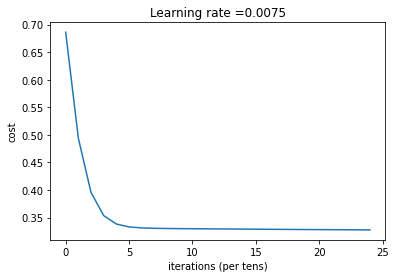

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 25, 9, 1]
Cost after iteration 0: 0.700789
Cost after iteration 100: 0.580711
Cost after iteration 200: 0.503596
Cost after iteration 300: 0.449246
Cost after iteration 400: 0.410687
Cost after iteration 500: 0.383521
Cost after iteration 600: 0.364734
Cost after iteration 700: 0.352108
Cost after iteration 800: 0.343854
Cost after iteration 900: 0.338580
Cost after iteration 1000: 0.335270
Cost after iteration 1100: 0.333218
Cost after iteration 1200: 0.331953
Cost after iteration 1300: 0.331171
Cost after iteration 1400: 0.330682
Cost after iteration 1500: 0.330369
Cost after iteration 1600: 0.330159
Cost after iteration 1700: 0.330010
Cost after iteration 1800: 0.329897
Cost after iteration 1900: 0.329808
Cost after iteration 2000: 0.329732
Cost after iteration 2100: 0.329666
Cost after iteration 2200: 0.329607
Cost after iteration 2300: 0.329551
Cost after i

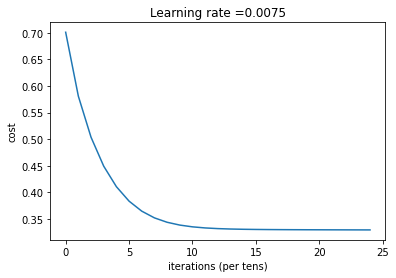

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 25, 9, 1]
Cost after iteration 0: 0.697613
Cost after iteration 100: 0.539600
Cost after iteration 200: 0.430955
Cost after iteration 300: 0.377462
Cost after iteration 400: 0.351884
Cost after iteration 500: 0.340256
Cost after iteration 600: 0.335099
Cost after iteration 700: 0.332797
Cost after iteration 800: 0.331723
Cost after iteration 900: 0.331176
Cost after iteration 1000: 0.330848
Cost after iteration 1100: 0.330618
Cost after iteration 1200: 0.330406
Cost after iteration 1300: 0.330218
Cost after iteration 1400: 0.330063
Cost after iteration 1500: 0.329919
Cost after iteration 1600: 0.329787
Cost after iteration 1700: 0.329660
Cost after iteration 1800: 0.329530
Cost after iteration 1900: 0.329371
Cost after iteration 2000: 0.329201
Cost after iteration 2100: 0.329064
Cost after iteration 2200: 0.328945
Cost after iteration 2300: 0.328833
Cost after i

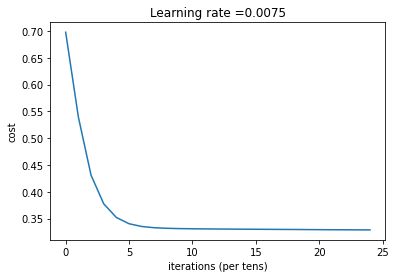

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 25, 9, 1]
Cost after iteration 0: 0.690429
Cost after iteration 100: 0.512839
Cost after iteration 200: 0.418844
Cost after iteration 300: 0.370984
Cost after iteration 400: 0.348427
Cost after iteration 500: 0.338393
Cost after iteration 600: 0.334082
Cost after iteration 700: 0.332228
Cost after iteration 800: 0.331396
Cost after iteration 900: 0.330983
Cost after iteration 1000: 0.330741
Cost after iteration 1100: 0.330570
Cost after iteration 1200: 0.330436
Cost after iteration 1300: 0.330317
Cost after iteration 1400: 0.330206
Cost after iteration 1500: 0.330098
Cost after iteration 1600: 0.329988
Cost after iteration 1700: 0.329874
Cost after iteration 1800: 0.329753
Cost after iteration 1900: 0.329627
Cost after iteration 2000: 0.329495
Cost after iteration 2100: 0.329367
Cost after iteration 2200: 0.329246
Cost after iteration 2300: 0.329127
Cost after i

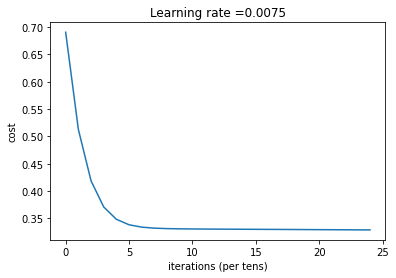

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 25, 9, 1]
Cost after iteration 0: 0.688213
Cost after iteration 100: 0.520827
Cost after iteration 200: 0.427806
Cost after iteration 300: 0.377129
Cost after iteration 400: 0.351374
Cost after iteration 500: 0.339057
Cost after iteration 600: 0.333337
Cost after iteration 700: 0.330692
Cost after iteration 800: 0.329429
Cost after iteration 900: 0.328770
Cost after iteration 1000: 0.328375
Cost after iteration 1100: 0.328089
Cost after iteration 1200: 0.327858
Cost after iteration 1300: 0.327650
Cost after iteration 1400: 0.327449
Cost after iteration 1500: 0.327251
Cost after iteration 1600: 0.327054
Cost after iteration 1700: 0.326854
Cost after iteration 1800: 0.326650
Cost after iteration 1900: 0.326447
Cost after iteration 2000: 0.326244
Cost after iteration 2100: 0.326044
Cost after iteration 2200: 0.325850
Cost after iteration 2300: 0.325658
Cost after i

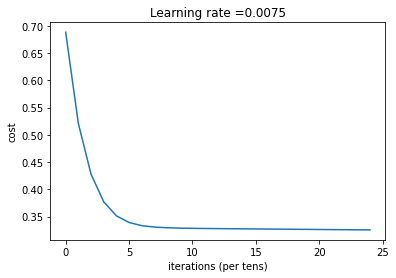

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 33, 9, 1]
Cost after iteration 0: 0.693113
Cost after iteration 100: 0.507054
Cost after iteration 200: 0.383750
Cost after iteration 300: 0.338638
Cost after iteration 400: 0.329387
Cost after iteration 500: 0.327738
Cost after iteration 600: 0.327210
Cost after iteration 700: 0.326822
Cost after iteration 800: 0.326442
Cost after iteration 900: 0.326053
Cost after iteration 1000: 0.325649
Cost after iteration 1100: 0.325231
Cost after iteration 1200: 0.324795
Cost after iteration 1300: 0.324342
Cost after iteration 1400: 0.323869
Cost after iteration 1500: 0.323374
Cost after iteration 1600: 0.322855
Cost after iteration 1700: 0.322311
Cost after iteration 1800: 0.321739
Cost after iteration 1900: 0.321136
Cost after iteration 2000: 0.320501
Cost after iteration 2100: 0.319829
Cost after iteration 2200: 0.319118
Cost after iteration 2300: 0.318364
Cost after it

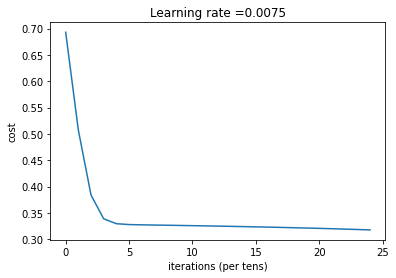

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 33, 9, 1]
Cost after iteration 0: 0.691422
Cost after iteration 100: 0.533602
Cost after iteration 200: 0.438346
Cost after iteration 300: 0.382726
Cost after iteration 400: 0.353998
Cost after iteration 500: 0.340813
Cost after iteration 600: 0.335255
Cost after iteration 700: 0.333011
Cost after iteration 800: 0.332094
Cost after iteration 900: 0.331686
Cost after iteration 1000: 0.331450
Cost after iteration 1100: 0.331255
Cost after iteration 1200: 0.331092
Cost after iteration 1300: 0.330926
Cost after iteration 1400: 0.330739
Cost after iteration 1500: 0.330577
Cost after iteration 1600: 0.330457
Cost after iteration 1700: 0.330353
Cost after iteration 1800: 0.330256
Cost after iteration 1900: 0.330163
Cost after iteration 2000: 0.330070
Cost after iteration 2100: 0.329978
Cost after iteration 2200: 0.329887
Cost after iteration 2300: 0.329795
Cost after it

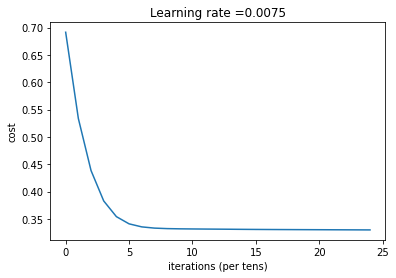

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 33, 9, 1]
Cost after iteration 0: 0.695110
Cost after iteration 100: 0.569477
Cost after iteration 200: 0.485584
Cost after iteration 300: 0.428020
Cost after iteration 400: 0.389411
Cost after iteration 500: 0.364800
Cost after iteration 600: 0.349992
Cost after iteration 700: 0.341568
Cost after iteration 800: 0.336974
Cost after iteration 900: 0.334535
Cost after iteration 1000: 0.333250
Cost after iteration 1100: 0.332566
Cost after iteration 1200: 0.332189
Cost after iteration 1300: 0.331966
Cost after iteration 1400: 0.331819
Cost after iteration 1500: 0.331712
Cost after iteration 1600: 0.331624
Cost after iteration 1700: 0.331546
Cost after iteration 1800: 0.331475
Cost after iteration 1900: 0.331406
Cost after iteration 2000: 0.331337
Cost after iteration 2100: 0.331266
Cost after iteration 2200: 0.331190
Cost after iteration 2300: 0.331117
Cost after i

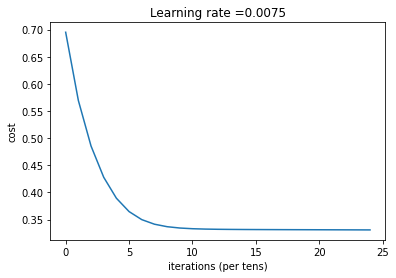

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 33, 9, 1]
Cost after iteration 0: 0.695183
Cost after iteration 100: 0.557057
Cost after iteration 200: 0.467170
Cost after iteration 300: 0.410360
Cost after iteration 400: 0.375529
Cost after iteration 500: 0.355118
Cost after iteration 600: 0.343659
Cost after iteration 700: 0.337433
Cost after iteration 800: 0.334084
Cost after iteration 900: 0.332230
Cost after iteration 1000: 0.331179
Cost after iteration 1100: 0.330511
Cost after iteration 1200: 0.330093
Cost after iteration 1300: 0.329837
Cost after iteration 1400: 0.329666
Cost after iteration 1500: 0.329538
Cost after iteration 1600: 0.329432
Cost after iteration 1700: 0.329340
Cost after iteration 1800: 0.329256
Cost after iteration 1900: 0.329172
Cost after iteration 2000: 0.329066
Cost after iteration 2100: 0.328937
Cost after iteration 2200: 0.328820
Cost after iteration 2300: 0.328705
Cost after i

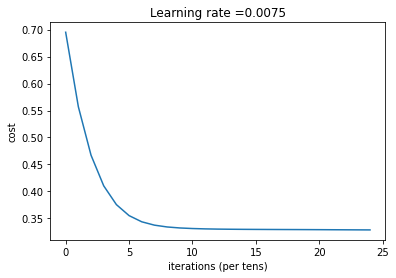

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 33, 9, 1]
Cost after iteration 0: 0.690518
Cost after iteration 100: 0.564217
Cost after iteration 200: 0.474432
Cost after iteration 300: 0.413867
Cost after iteration 400: 0.375380
Cost after iteration 500: 0.352998
Cost after iteration 600: 0.341107
Cost after iteration 700: 0.335206
Cost after iteration 800: 0.332375
Cost after iteration 900: 0.331012
Cost after iteration 1000: 0.330324
Cost after iteration 1100: 0.329951
Cost after iteration 1200: 0.329725
Cost after iteration 1300: 0.329565
Cost after iteration 1400: 0.329436
Cost after iteration 1500: 0.329323
Cost after iteration 1600: 0.329215
Cost after iteration 1700: 0.329106
Cost after iteration 1800: 0.328997
Cost after iteration 1900: 0.328884
Cost after iteration 2000: 0.328764
Cost after iteration 2100: 0.328633
Cost after iteration 2200: 0.328504
Cost after iteration 2300: 0.328374
Cost after i

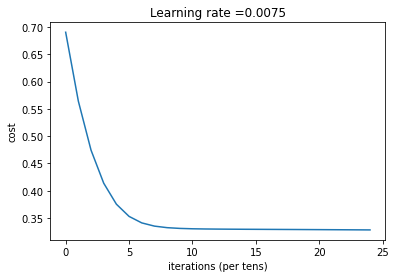

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 33, 9, 1]
Cost after iteration 0: 0.695401
Cost after iteration 100: 0.561136
Cost after iteration 200: 0.472511
Cost after iteration 300: 0.415868
Cost after iteration 400: 0.380294
Cost after iteration 500: 0.358863
Cost after iteration 600: 0.346497
Cost after iteration 700: 0.339591
Cost after iteration 800: 0.335810
Cost after iteration 900: 0.333752
Cost after iteration 1000: 0.332617
Cost after iteration 1100: 0.331975
Cost after iteration 1200: 0.331594
Cost after iteration 1300: 0.331332
Cost after iteration 1400: 0.331118
Cost after iteration 1500: 0.330950
Cost after iteration 1600: 0.330835
Cost after iteration 1700: 0.330741
Cost after iteration 1800: 0.330656
Cost after iteration 1900: 0.330576
Cost after iteration 2000: 0.330499
Cost after iteration 2100: 0.330425
Cost after iteration 2200: 0.330355
Cost after iteration 2300: 0.330288
Cost after i

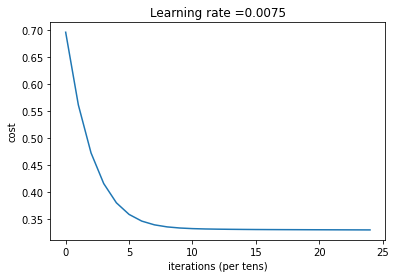

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 33, 9, 1]
Cost after iteration 0: 0.690673
Cost after iteration 100: 0.549976
Cost after iteration 200: 0.461193
Cost after iteration 300: 0.404951
Cost after iteration 400: 0.370818
Cost after iteration 500: 0.351290
Cost after iteration 600: 0.340686
Cost after iteration 700: 0.335131
Cost after iteration 800: 0.332267
Cost after iteration 900: 0.330784
Cost after iteration 1000: 0.329984
Cost after iteration 1100: 0.329508
Cost after iteration 1200: 0.329179
Cost after iteration 1300: 0.328929
Cost after iteration 1400: 0.328728
Cost after iteration 1500: 0.328558
Cost after iteration 1600: 0.328400
Cost after iteration 1700: 0.328250
Cost after iteration 1800: 0.328097
Cost after iteration 1900: 0.327936
Cost after iteration 2000: 0.327763
Cost after iteration 2100: 0.327590
Cost after iteration 2200: 0.327424
Cost after iteration 2300: 0.327250
Cost after i

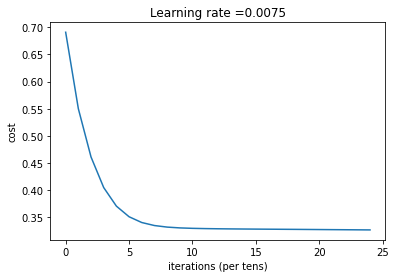

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 33, 9, 1]
Cost after iteration 0: 0.693895
Cost after iteration 100: 0.524722
Cost after iteration 200: 0.428833
Cost after iteration 300: 0.376221
Cost after iteration 400: 0.350158
Cost after iteration 500: 0.338255
Cost after iteration 600: 0.333024
Cost after iteration 700: 0.330636
Cost after iteration 800: 0.329425
Cost after iteration 900: 0.328643
Cost after iteration 1000: 0.328104
Cost after iteration 1100: 0.327685
Cost after iteration 1200: 0.327301
Cost after iteration 1300: 0.326941
Cost after iteration 1400: 0.326605
Cost after iteration 1500: 0.326307
Cost after iteration 1600: 0.326022
Cost after iteration 1700: 0.325755
Cost after iteration 1800: 0.325509
Cost after iteration 1900: 0.325270
Cost after iteration 2000: 0.325033
Cost after iteration 2100: 0.324794
Cost after iteration 2200: 0.324552
Cost after iteration 2300: 0.324306
Cost after i

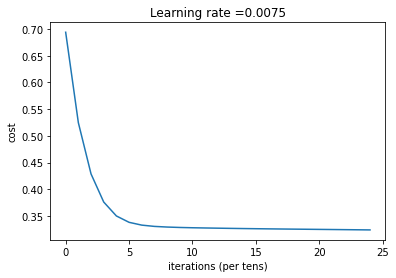

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 41, 9, 1]
Cost after iteration 0: 0.693109
Cost after iteration 100: 0.503888
Cost after iteration 200: 0.396572
Cost after iteration 300: 0.349641
Cost after iteration 400: 0.333974
Cost after iteration 500: 0.329774
Cost after iteration 600: 0.328637
Cost after iteration 700: 0.328191
Cost after iteration 800: 0.327885
Cost after iteration 900: 0.327598
Cost after iteration 1000: 0.327306
Cost after iteration 1100: 0.327000
Cost after iteration 1200: 0.326679
Cost after iteration 1300: 0.326341
Cost after iteration 1400: 0.325984
Cost after iteration 1500: 0.325607
Cost after iteration 1600: 0.325208
Cost after iteration 1700: 0.324784
Cost after iteration 1800: 0.324335
Cost after iteration 1900: 0.323856
Cost after iteration 2000: 0.323347
Cost after iteration 2100: 0.322805
Cost after iteration 2200: 0.322225
Cost after iteration 2300: 0.321606
Cost after it

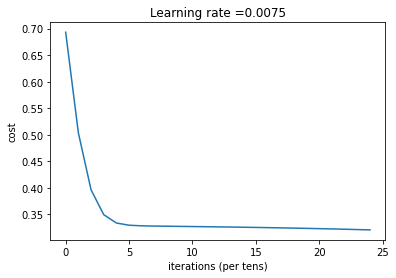

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 41, 9, 1]
Cost after iteration 0: 0.693791
Cost after iteration 100: 0.567864
Cost after iteration 200: 0.484478
Cost after iteration 300: 0.427174
Cost after iteration 400: 0.388685
Cost after iteration 500: 0.364050
Cost after iteration 600: 0.349225
Cost after iteration 700: 0.340832
Cost after iteration 800: 0.336314
Cost after iteration 900: 0.333970
Cost after iteration 1000: 0.332776
Cost after iteration 1100: 0.332170
Cost after iteration 1200: 0.331854
Cost after iteration 1300: 0.331680
Cost after iteration 1400: 0.331574
Cost after iteration 1500: 0.331500
Cost after iteration 1600: 0.331442
Cost after iteration 1700: 0.331391
Cost after iteration 1800: 0.331344
Cost after iteration 1900: 0.331299
Cost after iteration 2000: 0.331255
Cost after iteration 2100: 0.331211
Cost after iteration 2200: 0.331167
Cost after iteration 2300: 0.331123
Cost after it

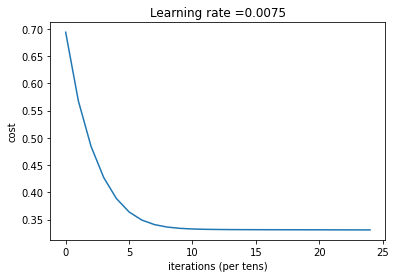

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 41, 9, 1]
Cost after iteration 0: 0.700962
Cost after iteration 100: 0.553198
Cost after iteration 200: 0.461095
Cost after iteration 300: 0.401542
Cost after iteration 400: 0.366350
Cost after iteration 500: 0.347716
Cost after iteration 600: 0.338683
Cost after iteration 700: 0.334548
Cost after iteration 800: 0.332710
Cost after iteration 900: 0.331883
Cost after iteration 1000: 0.331490
Cost after iteration 1100: 0.331280
Cost after iteration 1200: 0.331149
Cost after iteration 1300: 0.331053
Cost after iteration 1400: 0.330973
Cost after iteration 1500: 0.330898
Cost after iteration 1600: 0.330828
Cost after iteration 1700: 0.330758
Cost after iteration 1800: 0.330689
Cost after iteration 1900: 0.330620
Cost after iteration 2000: 0.330551
Cost after iteration 2100: 0.330482
Cost after iteration 2200: 0.330412
Cost after iteration 2300: 0.330341
Cost after i

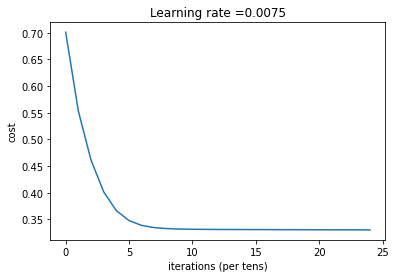

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 41, 9, 1]
Cost after iteration 0: 0.682565
Cost after iteration 100: 0.482587
Cost after iteration 200: 0.388089
Cost after iteration 300: 0.350135
Cost after iteration 400: 0.336956
Cost after iteration 500: 0.332644
Cost after iteration 600: 0.331157
Cost after iteration 700: 0.330563
Cost after iteration 800: 0.330253
Cost after iteration 900: 0.330045
Cost after iteration 1000: 0.329879
Cost after iteration 1100: 0.329731
Cost after iteration 1200: 0.329591
Cost after iteration 1300: 0.329456
Cost after iteration 1400: 0.329323
Cost after iteration 1500: 0.329192
Cost after iteration 1600: 0.329060
Cost after iteration 1700: 0.328928
Cost after iteration 1800: 0.328795
Cost after iteration 1900: 0.328660
Cost after iteration 2000: 0.328525
Cost after iteration 2100: 0.328388
Cost after iteration 2200: 0.328249
Cost after iteration 2300: 0.328109
Cost after i

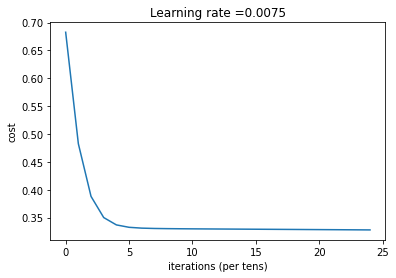

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 41, 9, 1]
Cost after iteration 0: 0.692683
Cost after iteration 100: 0.589796
Cost after iteration 200: 0.518339
Cost after iteration 300: 0.467477
Cost after iteration 400: 0.430508
Cost after iteration 500: 0.403511
Cost after iteration 600: 0.383634
Cost after iteration 700: 0.368944
Cost after iteration 800: 0.358102
Cost after iteration 900: 0.350154
Cost after iteration 1000: 0.344389
Cost after iteration 1100: 0.340256
Cost after iteration 1200: 0.337322
Cost after iteration 1300: 0.335256
Cost after iteration 1400: 0.333809
Cost after iteration 1500: 0.332796
Cost after iteration 1600: 0.332085
Cost after iteration 1700: 0.331583
Cost after iteration 1800: 0.331223
Cost after iteration 1900: 0.330959
Cost after iteration 2000: 0.330768
Cost after iteration 2100: 0.330625
Cost after iteration 2200: 0.330512
Cost after iteration 2300: 0.330416
Cost after i

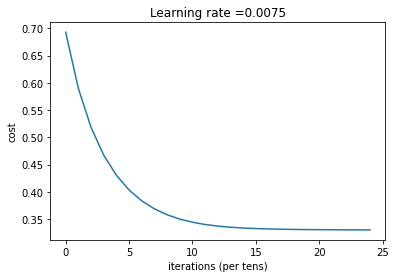

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 41, 9, 1]
Cost after iteration 0: 0.698269
Cost after iteration 100: 0.534248
Cost after iteration 200: 0.439151
Cost after iteration 300: 0.384384
Cost after iteration 400: 0.355671
Cost after iteration 500: 0.341948
Cost after iteration 600: 0.335742
Cost after iteration 700: 0.332957
Cost after iteration 800: 0.331649
Cost after iteration 900: 0.330978
Cost after iteration 1000: 0.330528
Cost after iteration 1100: 0.329964
Cost after iteration 1200: 0.329379
Cost after iteration 1300: 0.328870
Cost after iteration 1400: 0.328521
Cost after iteration 1500: 0.328257
Cost after iteration 1600: 0.328026
Cost after iteration 1700: 0.327822
Cost after iteration 1800: 0.327630
Cost after iteration 1900: 0.327438
Cost after iteration 2000: 0.327247
Cost after iteration 2100: 0.327055
Cost after iteration 2200: 0.326855
Cost after iteration 2300: 0.326645
Cost after i

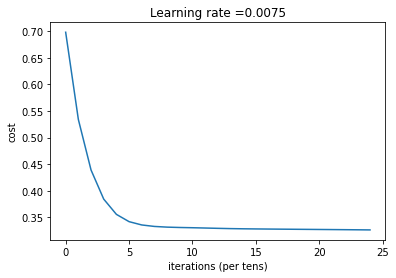

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 41, 9, 1]
Cost after iteration 0: 0.691314
Cost after iteration 100: 0.563131
Cost after iteration 200: 0.476069
Cost after iteration 300: 0.416829
Cost after iteration 400: 0.378592
Cost after iteration 500: 0.355913
Cost after iteration 600: 0.343530
Cost after iteration 700: 0.337181
Cost after iteration 800: 0.334047
Cost after iteration 900: 0.332508
Cost after iteration 1000: 0.331724
Cost after iteration 1100: 0.331288
Cost after iteration 1200: 0.331008
Cost after iteration 1300: 0.330800
Cost after iteration 1400: 0.330621
Cost after iteration 1500: 0.330452
Cost after iteration 1600: 0.330289
Cost after iteration 1700: 0.330134
Cost after iteration 1800: 0.329984
Cost after iteration 1900: 0.329844
Cost after iteration 2000: 0.329712
Cost after iteration 2100: 0.329589
Cost after iteration 2200: 0.329472
Cost after iteration 2300: 0.329360
Cost after i

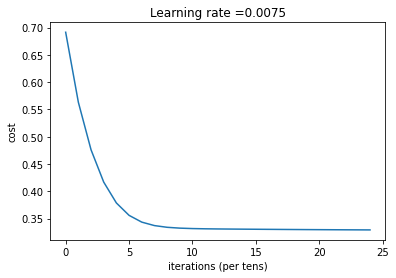

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 41, 9, 1]
Cost after iteration 0: 0.691064
Cost after iteration 100: 0.549566
Cost after iteration 200: 0.456920
Cost after iteration 300: 0.398495
Cost after iteration 400: 0.364616
Cost after iteration 500: 0.346487
Cost after iteration 600: 0.337326
Cost after iteration 700: 0.332825
Cost after iteration 800: 0.330633
Cost after iteration 900: 0.329556
Cost after iteration 1000: 0.328986
Cost after iteration 1100: 0.328648
Cost after iteration 1200: 0.328415
Cost after iteration 1300: 0.328229
Cost after iteration 1400: 0.328058
Cost after iteration 1500: 0.327891
Cost after iteration 1600: 0.327722
Cost after iteration 1700: 0.327539
Cost after iteration 1800: 0.327327
Cost after iteration 1900: 0.327083
Cost after iteration 2000: 0.326828
Cost after iteration 2100: 0.326600
Cost after iteration 2200: 0.326380
Cost after iteration 2300: 0.326168
Cost after i

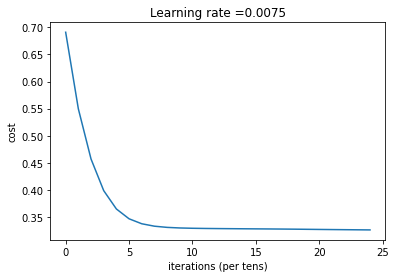

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 49, 9, 1]
Cost after iteration 0: 0.693197
Cost after iteration 100: 0.586197
Cost after iteration 200: 0.513060
Cost after iteration 300: 0.461883
Cost after iteration 400: 0.425517
Cost after iteration 500: 0.399379
Cost after iteration 600: 0.380485
Cost after iteration 700: 0.366793
Cost after iteration 800: 0.356878
Cost after iteration 900: 0.349711
Cost after iteration 1000: 0.344546
Cost after iteration 1100: 0.340833
Cost after iteration 1200: 0.338173
Cost after iteration 1300: 0.336272
Cost after iteration 1400: 0.334916
Cost after iteration 1500: 0.333952
Cost after iteration 1600: 0.333266
Cost after iteration 1700: 0.332780
Cost after iteration 1800: 0.332436
Cost after iteration 1900: 0.332192
Cost after iteration 2000: 0.332020
Cost after iteration 2100: 0.331898
Cost after iteration 2200: 0.331812
Cost after iteration 2300: 0.331751
Cost after it

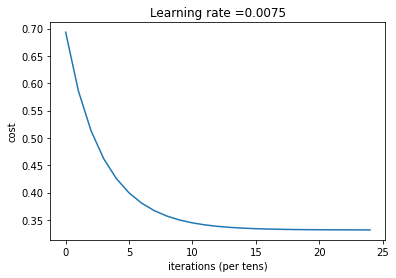

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 49, 9, 1]
Cost after iteration 0: 0.706082
Cost after iteration 100: 0.487402
Cost after iteration 200: 0.390626
Cost after iteration 300: 0.351961
Cost after iteration 400: 0.336995
Cost after iteration 500: 0.331841
Cost after iteration 600: 0.329948
Cost after iteration 700: 0.329108
Cost after iteration 800: 0.328667
Cost after iteration 900: 0.328400
Cost after iteration 1000: 0.328194
Cost after iteration 1100: 0.328018
Cost after iteration 1200: 0.327855
Cost after iteration 1300: 0.327696
Cost after iteration 1400: 0.327538
Cost after iteration 1500: 0.327367
Cost after iteration 1600: 0.327182
Cost after iteration 1700: 0.326993
Cost after iteration 1800: 0.326782
Cost after iteration 1900: 0.326461
Cost after iteration 2000: 0.326103
Cost after iteration 2100: 0.325823
Cost after iteration 2200: 0.325562
Cost after iteration 2300: 0.325300
Cost after it

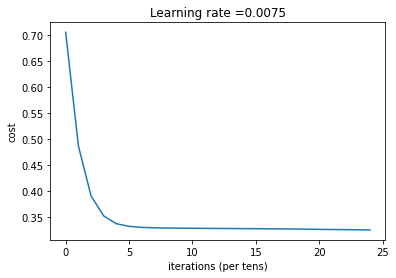

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 49, 9, 1]
Cost after iteration 0: 0.696990
Cost after iteration 100: 0.594375
Cost after iteration 200: 0.520229
Cost after iteration 300: 0.461966
Cost after iteration 400: 0.422657
Cost after iteration 500: 0.395027
Cost after iteration 600: 0.375487
Cost after iteration 700: 0.361698
Cost after iteration 800: 0.352039
Cost after iteration 900: 0.345334
Cost after iteration 1000: 0.340739
Cost after iteration 1100: 0.337613
Cost after iteration 1200: 0.335500
Cost after iteration 1300: 0.334086
Cost after iteration 1400: 0.333138
Cost after iteration 1500: 0.332498
Cost after iteration 1600: 0.332065
Cost after iteration 1700: 0.331767
Cost after iteration 1800: 0.331557
Cost after iteration 1900: 0.331404
Cost after iteration 2000: 0.331286
Cost after iteration 2100: 0.331189
Cost after iteration 2200: 0.331108
Cost after iteration 2300: 0.331036
Cost after i

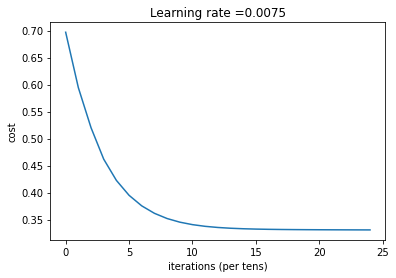

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 49, 9, 1]
Cost after iteration 0: 0.691185
Cost after iteration 100: 0.521103
Cost after iteration 200: 0.425015
Cost after iteration 300: 0.373849
Cost after iteration 400: 0.349022
Cost after iteration 500: 0.337940
Cost after iteration 600: 0.333158
Cost after iteration 700: 0.330953
Cost after iteration 800: 0.329981
Cost after iteration 900: 0.329504
Cost after iteration 1000: 0.329201
Cost after iteration 1100: 0.328984
Cost after iteration 1200: 0.328796
Cost after iteration 1300: 0.328625
Cost after iteration 1400: 0.328473
Cost after iteration 1500: 0.328329
Cost after iteration 1600: 0.328189
Cost after iteration 1700: 0.328052
Cost after iteration 1800: 0.327913
Cost after iteration 1900: 0.327774
Cost after iteration 2000: 0.327635
Cost after iteration 2100: 0.327498
Cost after iteration 2200: 0.327360
Cost after iteration 2300: 0.327220
Cost after i

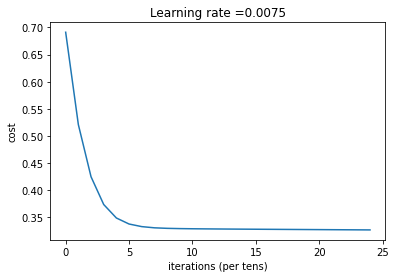

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 49, 9, 1]
Cost after iteration 0: 0.689900
Cost after iteration 100: 0.566604
Cost after iteration 200: 0.483348
Cost after iteration 300: 0.425967
Cost after iteration 400: 0.387340
Cost after iteration 500: 0.362834
Cost after iteration 600: 0.348268
Cost after iteration 700: 0.340080
Cost after iteration 800: 0.335651
Cost after iteration 900: 0.333279
Cost after iteration 1000: 0.331991
Cost after iteration 1100: 0.331326
Cost after iteration 1200: 0.330963
Cost after iteration 1300: 0.330749
Cost after iteration 1400: 0.330604
Cost after iteration 1500: 0.330497
Cost after iteration 1600: 0.330405
Cost after iteration 1700: 0.330321
Cost after iteration 1800: 0.330242
Cost after iteration 1900: 0.330167
Cost after iteration 2000: 0.330093
Cost after iteration 2100: 0.330017
Cost after iteration 2200: 0.329940
Cost after iteration 2300: 0.329859
Cost after i

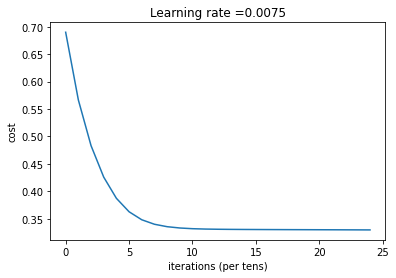

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 49, 9, 1]
Cost after iteration 0: 0.696854
Cost after iteration 100: 0.514109
Cost after iteration 200: 0.417191
Cost after iteration 300: 0.369234
Cost after iteration 400: 0.347601
Cost after iteration 500: 0.338386
Cost after iteration 600: 0.334531
Cost after iteration 700: 0.332861
Cost after iteration 800: 0.332070
Cost after iteration 900: 0.331578
Cost after iteration 1000: 0.331247
Cost after iteration 1100: 0.330990
Cost after iteration 1200: 0.330792
Cost after iteration 1300: 0.330620
Cost after iteration 1400: 0.330459
Cost after iteration 1500: 0.330307
Cost after iteration 1600: 0.330153
Cost after iteration 1700: 0.330004
Cost after iteration 1800: 0.329863
Cost after iteration 1900: 0.329724
Cost after iteration 2000: 0.329585
Cost after iteration 2100: 0.329441
Cost after iteration 2200: 0.329297
Cost after iteration 2300: 0.329153
Cost after i

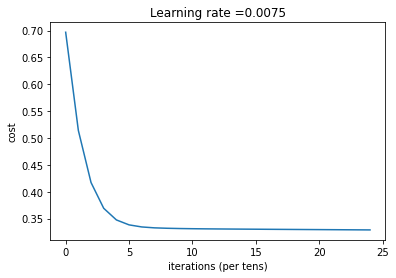

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 49, 9, 1]
Cost after iteration 0: 0.692686
Cost after iteration 100: 0.590144
Cost after iteration 200: 0.518718
Cost after iteration 300: 0.468152
Cost after iteration 400: 0.431730
Cost after iteration 500: 0.405254
Cost after iteration 600: 0.385761
Cost after iteration 700: 0.371301
Cost after iteration 800: 0.360558
Cost after iteration 900: 0.352589
Cost after iteration 1000: 0.346691
Cost after iteration 1100: 0.342339
Cost after iteration 1200: 0.339140
Cost after iteration 1300: 0.336793
Cost after iteration 1400: 0.335072
Cost after iteration 1500: 0.333813
Cost after iteration 1600: 0.332890
Cost after iteration 1700: 0.332215
Cost after iteration 1800: 0.331714
Cost after iteration 1900: 0.331341
Cost after iteration 2000: 0.331058
Cost after iteration 2100: 0.330841
Cost after iteration 2200: 0.330671
Cost after iteration 2300: 0.330535
Cost after i

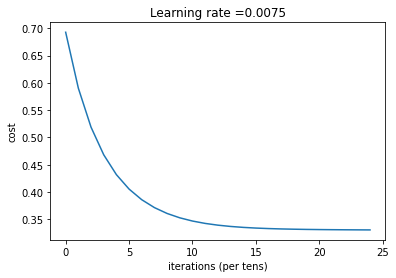

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 49, 9, 1]
Cost after iteration 0: 0.693479
Cost after iteration 100: 0.581665
Cost after iteration 200: 0.497796
Cost after iteration 300: 0.440112
Cost after iteration 400: 0.399907
Cost after iteration 500: 0.372636
Cost after iteration 600: 0.354911
Cost after iteration 700: 0.343953
Cost after iteration 800: 0.337473
Cost after iteration 900: 0.333770
Cost after iteration 1000: 0.331695
Cost after iteration 1100: 0.330537
Cost after iteration 1200: 0.329879
Cost after iteration 1300: 0.329488
Cost after iteration 1400: 0.329241
Cost after iteration 1500: 0.329069
Cost after iteration 1600: 0.328934
Cost after iteration 1700: 0.328819
Cost after iteration 1800: 0.328714
Cost after iteration 1900: 0.328612
Cost after iteration 2000: 0.328506
Cost after iteration 2100: 0.328356
Cost after iteration 2200: 0.328212
Cost after iteration 2300: 0.328093
Cost after i

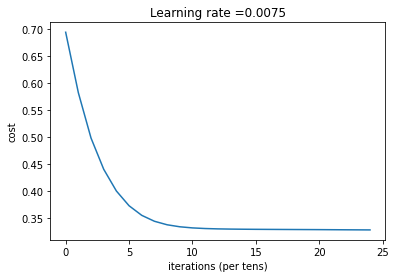

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 57, 9, 1]
Cost after iteration 0: 0.693174
Cost after iteration 100: 0.576905
Cost after iteration 200: 0.498319
Cost after iteration 300: 0.443599
Cost after iteration 400: 0.401859
Cost after iteration 500: 0.373225
Cost after iteration 600: 0.354456
Cost after iteration 700: 0.342903
Cost after iteration 800: 0.336267
Cost after iteration 900: 0.332683
Cost after iteration 1000: 0.330815
Cost after iteration 1100: 0.329839
Cost after iteration 1200: 0.329301
Cost after iteration 1300: 0.328966
Cost after iteration 1400: 0.328723
Cost after iteration 1500: 0.328518
Cost after iteration 1600: 0.328325
Cost after iteration 1700: 0.328135
Cost after iteration 1800: 0.327940
Cost after iteration 1900: 0.327738
Cost after iteration 2000: 0.327524
Cost after iteration 2100: 0.327292
Cost after iteration 2200: 0.327048
Cost after iteration 2300: 0.326784
Cost after it

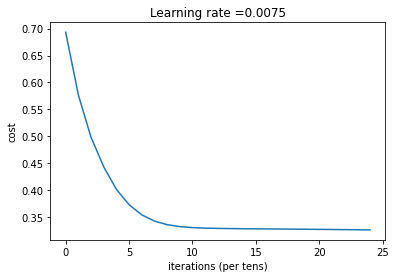

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 57, 9, 1]
Cost after iteration 0: 0.697221
Cost after iteration 100: 0.571025
Cost after iteration 200: 0.480979
Cost after iteration 300: 0.420568
Cost after iteration 400: 0.381669
Cost after iteration 500: 0.358339
Cost after iteration 600: 0.345358
Cost after iteration 700: 0.338587
Cost after iteration 800: 0.335220
Cost after iteration 900: 0.333587
Cost after iteration 1000: 0.332657
Cost after iteration 1100: 0.332209
Cost after iteration 1200: 0.331983
Cost after iteration 1300: 0.331856
Cost after iteration 1400: 0.331776
Cost after iteration 1500: 0.331719
Cost after iteration 1600: 0.331671
Cost after iteration 1700: 0.331628
Cost after iteration 1800: 0.331587
Cost after iteration 1900: 0.331547
Cost after iteration 2000: 0.331507
Cost after iteration 2100: 0.331468
Cost after iteration 2200: 0.331430
Cost after iteration 2300: 0.331391
Cost after it

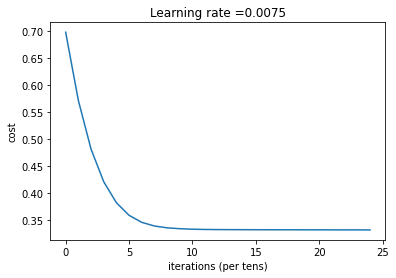

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 57, 9, 1]
Cost after iteration 0: 0.701122
Cost after iteration 100: 0.523433
Cost after iteration 200: 0.427705
Cost after iteration 300: 0.376173
Cost after iteration 400: 0.350835
Cost after iteration 500: 0.339318
Cost after iteration 600: 0.334310
Cost after iteration 700: 0.332068
Cost after iteration 800: 0.330997
Cost after iteration 900: 0.330502
Cost after iteration 1000: 0.330220
Cost after iteration 1100: 0.330022
Cost after iteration 1200: 0.329850
Cost after iteration 1300: 0.329694
Cost after iteration 1400: 0.329549
Cost after iteration 1500: 0.329407
Cost after iteration 1600: 0.329266
Cost after iteration 1700: 0.329123
Cost after iteration 1800: 0.328976
Cost after iteration 1900: 0.328825
Cost after iteration 2000: 0.328669
Cost after iteration 2100: 0.328508
Cost after iteration 2200: 0.328340
Cost after iteration 2300: 0.328167
Cost after i

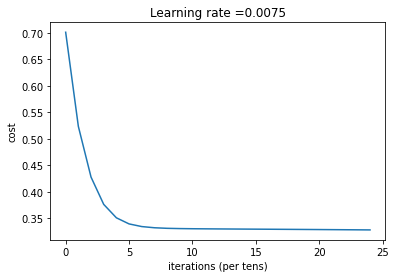

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 57, 9, 1]
Cost after iteration 0: 0.691054
Cost after iteration 100: 0.511883
Cost after iteration 200: 0.410935
Cost after iteration 300: 0.361574
Cost after iteration 400: 0.341032
Cost after iteration 500: 0.333409
Cost after iteration 600: 0.330678
Cost after iteration 700: 0.329623
Cost after iteration 800: 0.329102
Cost after iteration 900: 0.328765
Cost after iteration 1000: 0.328507
Cost after iteration 1100: 0.328290
Cost after iteration 1200: 0.328096
Cost after iteration 1300: 0.327915
Cost after iteration 1400: 0.327737
Cost after iteration 1500: 0.327559
Cost after iteration 1600: 0.327379
Cost after iteration 1700: 0.327192
Cost after iteration 1800: 0.326993
Cost after iteration 1900: 0.326782
Cost after iteration 2000: 0.326558
Cost after iteration 2100: 0.326337
Cost after iteration 2200: 0.326123
Cost after iteration 2300: 0.325910
Cost after i

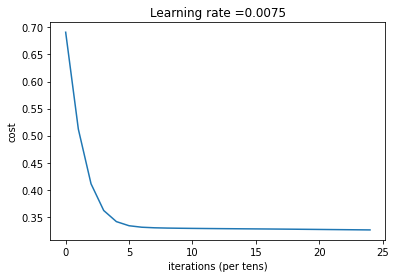

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 57, 9, 1]
Cost after iteration 0: 0.691152
Cost after iteration 100: 0.555552
Cost after iteration 200: 0.467500
Cost after iteration 300: 0.410011
Cost after iteration 400: 0.374351
Cost after iteration 500: 0.353817
Cost after iteration 600: 0.342794
Cost after iteration 700: 0.337159
Cost after iteration 800: 0.334340
Cost after iteration 900: 0.332906
Cost after iteration 1000: 0.332118
Cost after iteration 1100: 0.331619
Cost after iteration 1200: 0.331336
Cost after iteration 1300: 0.331161
Cost after iteration 1400: 0.331026
Cost after iteration 1500: 0.330911
Cost after iteration 1600: 0.330809
Cost after iteration 1700: 0.330716
Cost after iteration 1800: 0.330630
Cost after iteration 1900: 0.330548
Cost after iteration 2000: 0.330468
Cost after iteration 2100: 0.330389
Cost after iteration 2200: 0.330311
Cost after iteration 2300: 0.330232
Cost after i

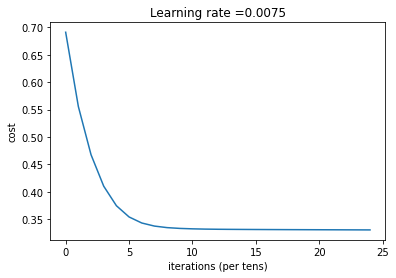

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 57, 9, 1]
Cost after iteration 0: 0.694536
Cost after iteration 100: 0.584679
Cost after iteration 200: 0.510136
Cost after iteration 300: 0.457035
Cost after iteration 400: 0.418725
Cost after iteration 500: 0.391046
Cost after iteration 600: 0.371266
Cost after iteration 700: 0.357407
Cost after iteration 800: 0.347928
Cost after iteration 900: 0.341590
Cost after iteration 1000: 0.337446
Cost after iteration 1100: 0.334793
Cost after iteration 1200: 0.333115
Cost after iteration 1300: 0.332060
Cost after iteration 1400: 0.331389
Cost after iteration 1500: 0.330958
Cost after iteration 1600: 0.330671
Cost after iteration 1700: 0.330471
Cost after iteration 1800: 0.330324
Cost after iteration 1900: 0.330206
Cost after iteration 2000: 0.330105
Cost after iteration 2100: 0.330014
Cost after iteration 2200: 0.329928
Cost after iteration 2300: 0.329843
Cost after i

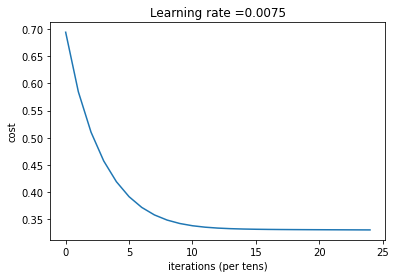

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 57, 9, 1]
Cost after iteration 0: 0.689464
Cost after iteration 100: 0.533974
Cost after iteration 200: 0.440265
Cost after iteration 300: 0.385162
Cost after iteration 400: 0.356003
Cost after iteration 500: 0.341998
Cost after iteration 600: 0.335681
Cost after iteration 700: 0.332881
Cost after iteration 800: 0.331611
Cost after iteration 900: 0.330986
Cost after iteration 1000: 0.330635
Cost after iteration 1100: 0.330400
Cost after iteration 1200: 0.330219
Cost after iteration 1300: 0.330063
Cost after iteration 1400: 0.329924
Cost after iteration 1500: 0.329794
Cost after iteration 1600: 0.329671
Cost after iteration 1700: 0.329551
Cost after iteration 1800: 0.329430
Cost after iteration 1900: 0.329311
Cost after iteration 2000: 0.329191
Cost after iteration 2100: 0.329071
Cost after iteration 2200: 0.328949
Cost after iteration 2300: 0.328827
Cost after i

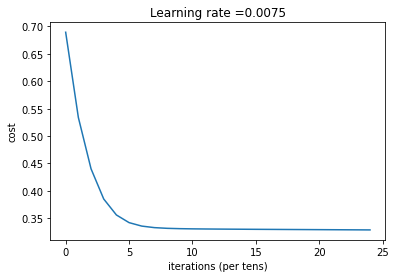

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 57, 9, 1]
Cost after iteration 0: 0.692096
Cost after iteration 100: 0.561434
Cost after iteration 200: 0.472115
Cost after iteration 300: 0.413296
Cost after iteration 400: 0.376503
Cost after iteration 500: 0.354973
Cost after iteration 600: 0.343160
Cost after iteration 700: 0.336967
Cost after iteration 800: 0.333789
Cost after iteration 900: 0.332159
Cost after iteration 1000: 0.331297
Cost after iteration 1100: 0.330809
Cost after iteration 1200: 0.330501
Cost after iteration 1300: 0.330279
Cost after iteration 1400: 0.330095
Cost after iteration 1500: 0.329918
Cost after iteration 1600: 0.329743
Cost after iteration 1700: 0.329585
Cost after iteration 1800: 0.329436
Cost after iteration 1900: 0.329288
Cost after iteration 2000: 0.329142
Cost after iteration 2100: 0.329002
Cost after iteration 2200: 0.328867
Cost after iteration 2300: 0.328734
Cost after i

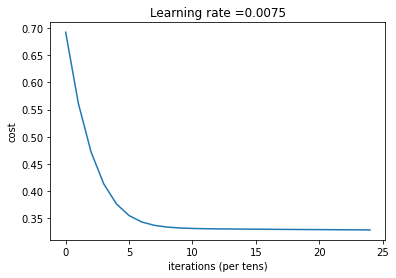

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 1, 17, 1]
Cost after iteration 0: 0.693168
Cost after iteration 100: 0.593853
Cost after iteration 200: 0.525207
Cost after iteration 300: 0.477004
Cost after iteration 400: 0.442514
Cost after iteration 500: 0.417366
Cost after iteration 600: 0.398702
Cost after iteration 700: 0.384628
Cost after iteration 800: 0.373866
Cost after iteration 900: 0.365534
Cost after iteration 1000: 0.359016
Cost after iteration 1100: 0.353869
Cost after iteration 1200: 0.349772
Cost after iteration 1300: 0.346488
Cost after iteration 1400: 0.343840
Cost after iteration 1500: 0.341694
Cost after iteration 1600: 0.339946
Cost after iteration 1700: 0.338518
Cost after iteration 1800: 0.337345
Cost after iteration 1900: 0.336381
Cost after iteration 2000: 0.335584
Cost after iteration 2100: 0.334926
Cost after iteration 2200: 0.334380
Cost after iteration 2300: 0.333926
Cost after it

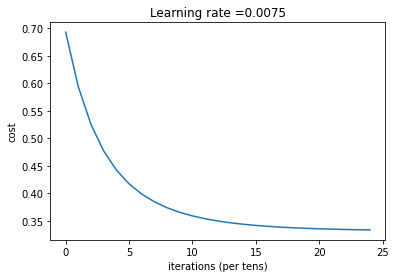

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 1, 17, 1]
Cost after iteration 0: 0.694824
Cost after iteration 100: 0.564720
Cost after iteration 200: 0.479417
Cost after iteration 300: 0.421874
Cost after iteration 400: 0.383555
Cost after iteration 500: 0.359286
Cost after iteration 600: 0.345200
Cost after iteration 700: 0.337801
Cost after iteration 800: 0.334229
Cost after iteration 900: 0.332599
Cost after iteration 1000: 0.331871
Cost after iteration 1100: 0.331527
Cost after iteration 1200: 0.331306
Cost after iteration 1300: 0.331120
Cost after iteration 1400: 0.330989
Cost after iteration 1500: 0.330877
Cost after iteration 1600: 0.330747
Cost after iteration 1700: 0.330613
Cost after iteration 1800: 0.330485
Cost after iteration 1900: 0.330371
Cost after iteration 2000: 0.330267
Cost after iteration 2100: 0.330164
Cost after iteration 2200: 0.330073
Cost after iteration 2300: 0.330000
Cost after it

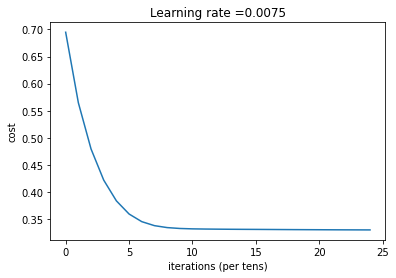

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 1, 17, 1]
Cost after iteration 0: 0.693486
Cost after iteration 100: 0.593753
Cost after iteration 200: 0.525045
Cost after iteration 300: 0.476797
Cost after iteration 400: 0.442273
Cost after iteration 500: 0.417095
Cost after iteration 600: 0.398406
Cost after iteration 700: 0.384317
Cost after iteration 800: 0.373544
Cost after iteration 900: 0.365204
Cost after iteration 1000: 0.358665
Cost after iteration 1100: 0.353422
Cost after iteration 1200: 0.349182
Cost after iteration 1300: 0.345794
Cost after iteration 1400: 0.343062
Cost after iteration 1500: 0.340844
Cost after iteration 1600: 0.339035
Cost after iteration 1700: 0.337559
Cost after iteration 1800: 0.336353
Cost after iteration 1900: 0.335366
Cost after iteration 2000: 0.334560
Cost after iteration 2100: 0.333903
Cost after iteration 2200: 0.333366
Cost after iteration 2300: 0.332929
Cost after i

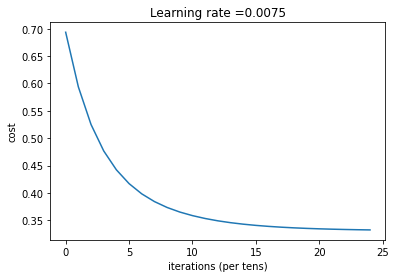

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 1, 17, 1]
Cost after iteration 0: 0.693033
Cost after iteration 100: 0.467717
Cost after iteration 200: 0.345234
Cost after iteration 300: 0.330599
Cost after iteration 400: 0.328828
Cost after iteration 500: 0.328093
Cost after iteration 600: 0.327630
Cost after iteration 700: 0.327266
Cost after iteration 800: 0.326932
Cost after iteration 900: 0.326604
Cost after iteration 1000: 0.326273
Cost after iteration 1100: 0.325934
Cost after iteration 1200: 0.325580
Cost after iteration 1300: 0.325209
Cost after iteration 1400: 0.324811
Cost after iteration 1500: 0.324378
Cost after iteration 1600: 0.323906
Cost after iteration 1700: 0.323424
Cost after iteration 1800: 0.322942
Cost after iteration 1900: 0.322440
Cost after iteration 2000: 0.321913
Cost after iteration 2100: 0.321354
Cost after iteration 2200: 0.320761
Cost after iteration 2300: 0.320132
Cost after i

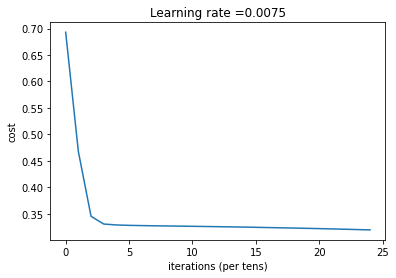

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 1, 17, 1]
Cost after iteration 0: 0.693379
Cost after iteration 100: 0.589487
Cost after iteration 200: 0.518426
Cost after iteration 300: 0.468734
Cost after iteration 400: 0.433312
Cost after iteration 500: 0.407629
Cost after iteration 600: 0.388612
Cost after iteration 700: 0.374161
Cost after iteration 800: 0.363322
Cost after iteration 900: 0.355197
Cost after iteration 1000: 0.349085
Cost after iteration 1100: 0.344480
Cost after iteration 1200: 0.341003
Cost after iteration 1300: 0.338372
Cost after iteration 1400: 0.336378
Cost after iteration 1500: 0.334864
Cost after iteration 1600: 0.333711
Cost after iteration 1700: 0.332829
Cost after iteration 1800: 0.332153
Cost after iteration 1900: 0.331630
Cost after iteration 2000: 0.331223
Cost after iteration 2100: 0.330903
Cost after iteration 2200: 0.330649
Cost after iteration 2300: 0.330443
Cost after i

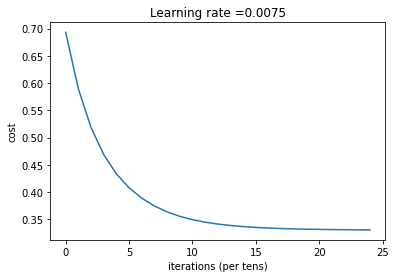

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 1, 17, 1]
Cost after iteration 0: 0.688762
Cost after iteration 100: 0.534234
Cost after iteration 200: 0.410728
Cost after iteration 300: 0.351758
Cost after iteration 400: 0.336143
Cost after iteration 500: 0.332716
Cost after iteration 600: 0.331706
Cost after iteration 700: 0.331151
Cost after iteration 800: 0.330739
Cost after iteration 900: 0.330404
Cost after iteration 1000: 0.330084
Cost after iteration 1100: 0.329794
Cost after iteration 1200: 0.329519
Cost after iteration 1300: 0.329248
Cost after iteration 1400: 0.328964
Cost after iteration 1500: 0.328657
Cost after iteration 1600: 0.328358
Cost after iteration 1700: 0.328061
Cost after iteration 1800: 0.327782
Cost after iteration 1900: 0.327510
Cost after iteration 2000: 0.327238
Cost after iteration 2100: 0.326960
Cost after iteration 2200: 0.326670
Cost after iteration 2300: 0.326376
Cost after i

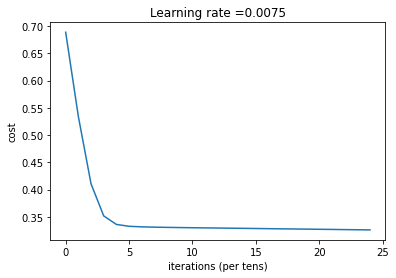

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 1, 17, 1]
Cost after iteration 0: 0.685913
Cost after iteration 100: 0.494422
Cost after iteration 200: 0.383481
Cost after iteration 300: 0.342496
Cost after iteration 400: 0.331979
Cost after iteration 500: 0.329488
Cost after iteration 600: 0.328755
Cost after iteration 700: 0.328372
Cost after iteration 800: 0.328035
Cost after iteration 900: 0.327666
Cost after iteration 1000: 0.327312
Cost after iteration 1100: 0.326998
Cost after iteration 1200: 0.326718
Cost after iteration 1300: 0.326448
Cost after iteration 1400: 0.326171
Cost after iteration 1500: 0.325889
Cost after iteration 1600: 0.325605
Cost after iteration 1700: 0.325313
Cost after iteration 1800: 0.325015
Cost after iteration 1900: 0.324707
Cost after iteration 2000: 0.324389
Cost after iteration 2100: 0.324061
Cost after iteration 2200: 0.323721
Cost after iteration 2300: 0.323366
Cost after i

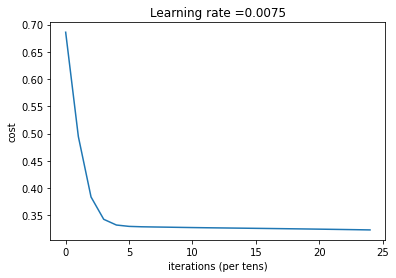

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 1, 17, 1]
Cost after iteration 0: 0.693087
Cost after iteration 100: 0.569738
Cost after iteration 200: 0.487806
Cost after iteration 300: 0.431775
Cost after iteration 400: 0.393172
Cost after iteration 500: 0.367284
Cost after iteration 600: 0.350864
Cost after iteration 700: 0.341168
Cost after iteration 800: 0.335791
Cost after iteration 900: 0.332924
Cost after iteration 1000: 0.331415
Cost after iteration 1100: 0.330610
Cost after iteration 1200: 0.330159
Cost after iteration 1300: 0.329878
Cost after iteration 1400: 0.329680
Cost after iteration 1500: 0.329518
Cost after iteration 1600: 0.329376
Cost after iteration 1700: 0.329240
Cost after iteration 1800: 0.329106
Cost after iteration 1900: 0.328970
Cost after iteration 2000: 0.328836
Cost after iteration 2100: 0.328702
Cost after iteration 2200: 0.328567
Cost after iteration 2300: 0.328431
Cost after i

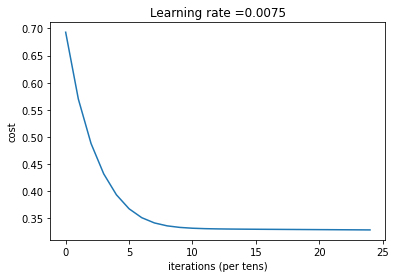

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 9, 17, 1]
Cost after iteration 0: 0.693144
Cost after iteration 100: 0.555474
Cost after iteration 200: 0.469511
Cost after iteration 300: 0.414768
Cost after iteration 400: 0.378137
Cost after iteration 500: 0.354834
Cost after iteration 600: 0.341519
Cost after iteration 700: 0.334735
Cost after iteration 800: 0.331617
Cost after iteration 900: 0.330263
Cost after iteration 1000: 0.329660
Cost after iteration 1100: 0.329350
Cost after iteration 1200: 0.329147
Cost after iteration 1300: 0.328977
Cost after iteration 1400: 0.328815
Cost after iteration 1500: 0.328650
Cost after iteration 1600: 0.328478
Cost after iteration 1700: 0.328299
Cost after iteration 1800: 0.328110
Cost after iteration 1900: 0.327912
Cost after iteration 2000: 0.327703
Cost after iteration 2100: 0.327483
Cost after iteration 2200: 0.327251
Cost after iteration 2300: 0.327006
Cost after it

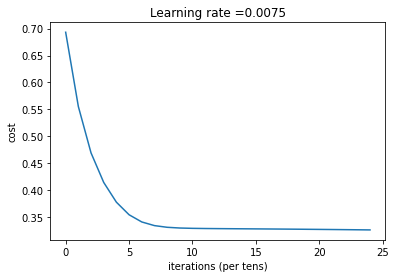

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 9, 17, 1]
Cost after iteration 0: 0.695408
Cost after iteration 100: 0.569629
Cost after iteration 200: 0.486098
Cost after iteration 300: 0.427491
Cost after iteration 400: 0.387943
Cost after iteration 500: 0.362804
Cost after iteration 600: 0.347890
Cost after iteration 700: 0.339564
Cost after iteration 800: 0.335115
Cost after iteration 900: 0.332796
Cost after iteration 1000: 0.331593
Cost after iteration 1100: 0.330961
Cost after iteration 1200: 0.330624
Cost after iteration 1300: 0.330436
Cost after iteration 1400: 0.330318
Cost after iteration 1500: 0.330235
Cost after iteration 1600: 0.330165
Cost after iteration 1700: 0.330101
Cost after iteration 1800: 0.330039
Cost after iteration 1900: 0.329982
Cost after iteration 2000: 0.329929
Cost after iteration 2100: 0.329878
Cost after iteration 2200: 0.329828
Cost after iteration 2300: 0.329780
Cost after it

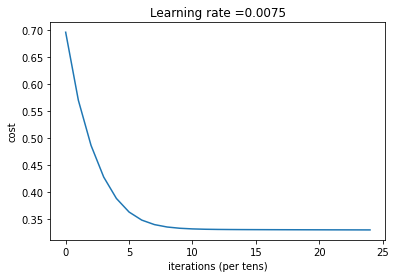

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 9, 17, 1]
Cost after iteration 0: 0.696958
Cost after iteration 100: 0.577277
Cost after iteration 200: 0.492461
Cost after iteration 300: 0.431893
Cost after iteration 400: 0.389736
Cost after iteration 500: 0.362618
Cost after iteration 600: 0.346799
Cost after iteration 700: 0.338317
Cost after iteration 800: 0.334009
Cost after iteration 900: 0.331869
Cost after iteration 1000: 0.330777
Cost after iteration 1100: 0.330185
Cost after iteration 1200: 0.329846
Cost after iteration 1300: 0.329638
Cost after iteration 1400: 0.329492
Cost after iteration 1500: 0.329380
Cost after iteration 1600: 0.329285
Cost after iteration 1700: 0.329198
Cost after iteration 1800: 0.329116
Cost after iteration 1900: 0.329036
Cost after iteration 2000: 0.328955
Cost after iteration 2100: 0.328871
Cost after iteration 2200: 0.328789
Cost after iteration 2300: 0.328706
Cost after i

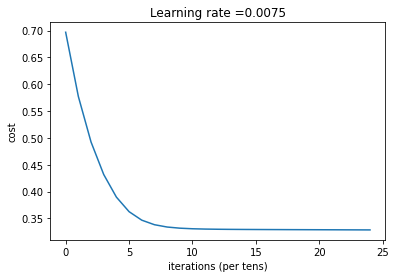

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 9, 17, 1]
Cost after iteration 0: 0.692416
Cost after iteration 100: 0.566040
Cost after iteration 200: 0.478294
Cost after iteration 300: 0.417134
Cost after iteration 400: 0.377088
Cost after iteration 500: 0.353584
Cost after iteration 600: 0.341187
Cost after iteration 700: 0.335151
Cost after iteration 800: 0.332293
Cost after iteration 900: 0.330940
Cost after iteration 1000: 0.330262
Cost after iteration 1100: 0.329873
Cost after iteration 1200: 0.329503
Cost after iteration 1300: 0.329170
Cost after iteration 1400: 0.328997
Cost after iteration 1500: 0.328849
Cost after iteration 1600: 0.328714
Cost after iteration 1700: 0.328584
Cost after iteration 1800: 0.328456
Cost after iteration 1900: 0.328328
Cost after iteration 2000: 0.328200
Cost after iteration 2100: 0.328071
Cost after iteration 2200: 0.327941
Cost after iteration 2300: 0.327809
Cost after i

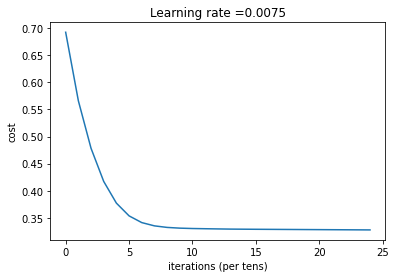

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 9, 17, 1]
Cost after iteration 0: 0.694292
Cost after iteration 100: 0.553071
Cost after iteration 200: 0.466409
Cost after iteration 300: 0.412928
Cost after iteration 400: 0.380178
Cost after iteration 500: 0.360414
Cost after iteration 600: 0.348610
Cost after iteration 700: 0.341603
Cost after iteration 800: 0.337457
Cost after iteration 900: 0.334991
Cost after iteration 1000: 0.333513
Cost after iteration 1100: 0.332626
Cost after iteration 1200: 0.332086
Cost after iteration 1300: 0.331750
Cost after iteration 1400: 0.331531
Cost after iteration 1500: 0.331380
Cost after iteration 1600: 0.331267
Cost after iteration 1700: 0.331169
Cost after iteration 1800: 0.331087
Cost after iteration 1900: 0.331019
Cost after iteration 2000: 0.330962
Cost after iteration 2100: 0.330913
Cost after iteration 2200: 0.330868
Cost after iteration 2300: 0.330827
Cost after i

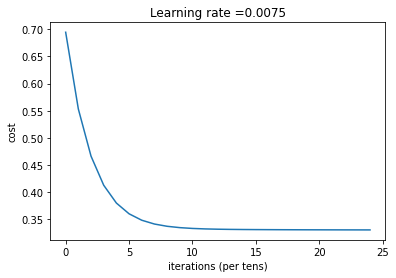

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 9, 17, 1]
Cost after iteration 0: 0.685947
Cost after iteration 100: 0.476835
Cost after iteration 200: 0.382880
Cost after iteration 300: 0.347436
Cost after iteration 400: 0.335999
Cost after iteration 500: 0.332492
Cost after iteration 600: 0.331349
Cost after iteration 700: 0.330864
Cost after iteration 800: 0.330561
Cost after iteration 900: 0.330299
Cost after iteration 1000: 0.330036
Cost after iteration 1100: 0.329758
Cost after iteration 1200: 0.329497
Cost after iteration 1300: 0.329275
Cost after iteration 1400: 0.329074
Cost after iteration 1500: 0.328887
Cost after iteration 1600: 0.328707
Cost after iteration 1700: 0.328528
Cost after iteration 1800: 0.328351
Cost after iteration 1900: 0.328173
Cost after iteration 2000: 0.327994
Cost after iteration 2100: 0.327814
Cost after iteration 2200: 0.327631
Cost after iteration 2300: 0.327445
Cost after i

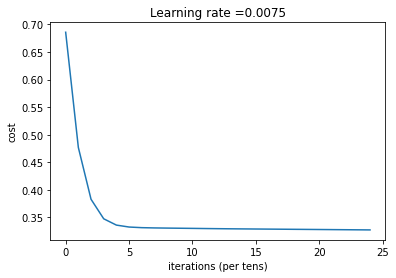

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 9, 17, 1]
Cost after iteration 0: 0.694016
Cost after iteration 100: 0.574002
Cost after iteration 200: 0.494014
Cost after iteration 300: 0.440242
Cost after iteration 400: 0.403878
Cost after iteration 500: 0.379361
Cost after iteration 600: 0.362948
Cost after iteration 700: 0.352042
Cost after iteration 800: 0.344839
Cost after iteration 900: 0.340100
Cost after iteration 1000: 0.336987
Cost after iteration 1100: 0.334941
Cost after iteration 1200: 0.333590
Cost after iteration 1300: 0.332692
Cost after iteration 1400: 0.332090
Cost after iteration 1500: 0.331682
Cost after iteration 1600: 0.331402
Cost after iteration 1700: 0.331205
Cost after iteration 1800: 0.331062
Cost after iteration 1900: 0.330954
Cost after iteration 2000: 0.330870
Cost after iteration 2100: 0.330800
Cost after iteration 2200: 0.330739
Cost after iteration 2300: 0.330686
Cost after i

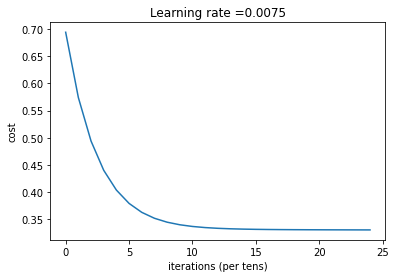

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 9, 17, 1]
Cost after iteration 0: 0.687392
Cost after iteration 100: 0.451123
Cost after iteration 200: 0.365435
Cost after iteration 300: 0.339581
Cost after iteration 400: 0.332322
Cost after iteration 500: 0.330098
Cost after iteration 600: 0.329247
Cost after iteration 700: 0.328760
Cost after iteration 800: 0.328365
Cost after iteration 900: 0.328043
Cost after iteration 1000: 0.327752
Cost after iteration 1100: 0.327493
Cost after iteration 1200: 0.327248
Cost after iteration 1300: 0.327003
Cost after iteration 1400: 0.326754
Cost after iteration 1500: 0.326496
Cost after iteration 1600: 0.326231
Cost after iteration 1700: 0.325964
Cost after iteration 1800: 0.325695
Cost after iteration 1900: 0.325425
Cost after iteration 2000: 0.325148
Cost after iteration 2100: 0.324865
Cost after iteration 2200: 0.324574
Cost after iteration 2300: 0.324276
Cost after i

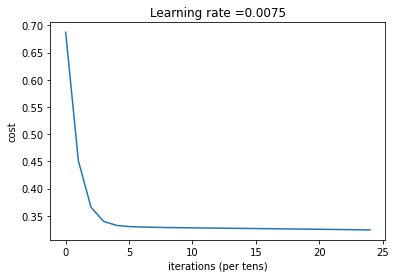

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 17, 17, 1]
Cost after iteration 0: 0.693181
Cost after iteration 100: 0.563669
Cost after iteration 200: 0.479181
Cost after iteration 300: 0.423065
Cost after iteration 400: 0.386607
Cost after iteration 500: 0.363784
Cost after iteration 600: 0.349986
Cost after iteration 700: 0.340875
Cost after iteration 800: 0.334644
Cost after iteration 900: 0.331830
Cost after iteration 1000: 0.330358
Cost after iteration 1100: 0.329545
Cost after iteration 1200: 0.329052
Cost after iteration 1300: 0.328712
Cost after iteration 1400: 0.328443
Cost after iteration 1500: 0.328203
Cost after iteration 1600: 0.327974
Cost after iteration 1700: 0.327746
Cost after iteration 1800: 0.327513
Cost after iteration 1900: 0.327274
Cost after iteration 2000: 0.327027
Cost after iteration 2100: 0.326771
Cost after iteration 2200: 0.326505
Cost after iteration 2300: 0.326231
Cost after i

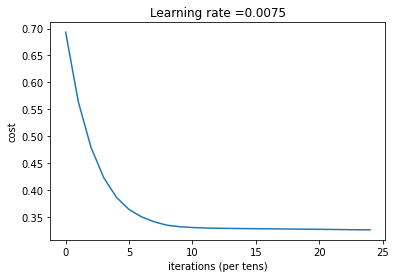

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 17, 17, 1]
Cost after iteration 0: 0.694899
Cost after iteration 100: 0.535805
Cost after iteration 200: 0.439294
Cost after iteration 300: 0.382513
Cost after iteration 400: 0.353544
Cost after iteration 500: 0.340529
Cost after iteration 600: 0.335113
Cost after iteration 700: 0.332930
Cost after iteration 800: 0.332040
Cost after iteration 900: 0.331654
Cost after iteration 1000: 0.331471
Cost after iteration 1100: 0.331367
Cost after iteration 1200: 0.331292
Cost after iteration 1300: 0.331229
Cost after iteration 1400: 0.331171
Cost after iteration 1500: 0.331114
Cost after iteration 1600: 0.331057
Cost after iteration 1700: 0.330998
Cost after iteration 1800: 0.330937
Cost after iteration 1900: 0.330874
Cost after iteration 2000: 0.330809
Cost after iteration 2100: 0.330739
Cost after iteration 2200: 0.330660
Cost after iteration 2300: 0.330574
Cost after i

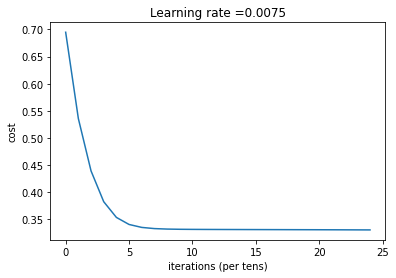

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 17, 17, 1]
Cost after iteration 0: 0.701668
Cost after iteration 100: 0.567167
Cost after iteration 200: 0.482866
Cost after iteration 300: 0.425989
Cost after iteration 400: 0.388463
Cost after iteration 500: 0.364699
Cost after iteration 600: 0.350319
Cost after iteration 700: 0.341938
Cost after iteration 800: 0.337182
Cost after iteration 900: 0.334480
Cost after iteration 1000: 0.332971
Cost after iteration 1100: 0.332121
Cost after iteration 1200: 0.331618
Cost after iteration 1300: 0.331315
Cost after iteration 1400: 0.331119
Cost after iteration 1500: 0.330990
Cost after iteration 1600: 0.330897
Cost after iteration 1700: 0.330824
Cost after iteration 1800: 0.330763
Cost after iteration 1900: 0.330711
Cost after iteration 2000: 0.330664
Cost after iteration 2100: 0.330619
Cost after iteration 2200: 0.330577
Cost after iteration 2300: 0.330536
Cost after 

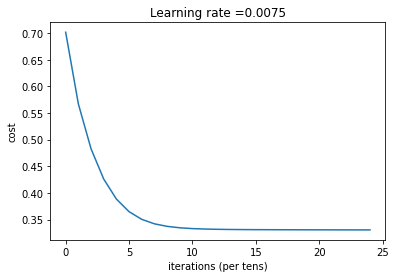

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 17, 17, 1]
Cost after iteration 0: 0.693189
Cost after iteration 100: 0.513452
Cost after iteration 200: 0.415752
Cost after iteration 300: 0.367419
Cost after iteration 400: 0.345776
Cost after iteration 500: 0.336734
Cost after iteration 600: 0.333073
Cost after iteration 700: 0.331573
Cost after iteration 800: 0.330929
Cost after iteration 900: 0.330621
Cost after iteration 1000: 0.330446
Cost after iteration 1100: 0.330324
Cost after iteration 1200: 0.330226
Cost after iteration 1300: 0.330142
Cost after iteration 1400: 0.330064
Cost after iteration 1500: 0.329987
Cost after iteration 1600: 0.329912
Cost after iteration 1700: 0.329836
Cost after iteration 1800: 0.329759
Cost after iteration 1900: 0.329682
Cost after iteration 2000: 0.329605
Cost after iteration 2100: 0.329526
Cost after iteration 2200: 0.329447
Cost after iteration 2300: 0.329366
Cost after 

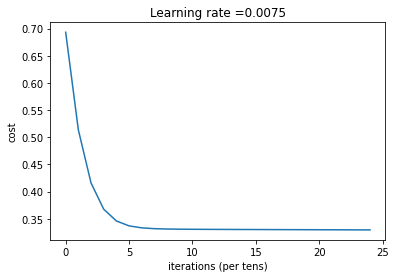

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 17, 17, 1]
Cost after iteration 0: 0.696290
Cost after iteration 100: 0.580272
Cost after iteration 200: 0.496229
Cost after iteration 300: 0.440154
Cost after iteration 400: 0.401833
Cost after iteration 500: 0.376000
Cost after iteration 600: 0.359040
Cost after iteration 700: 0.348164
Cost after iteration 800: 0.341339
Cost after iteration 900: 0.337129
Cost after iteration 1000: 0.334534
Cost after iteration 1100: 0.332839
Cost after iteration 1200: 0.331750
Cost after iteration 1300: 0.331033
Cost after iteration 1400: 0.330572
Cost after iteration 1500: 0.330265
Cost after iteration 1600: 0.330048
Cost after iteration 1700: 0.329892
Cost after iteration 1800: 0.329773
Cost after iteration 1900: 0.329674
Cost after iteration 2000: 0.329587
Cost after iteration 2100: 0.329507
Cost after iteration 2200: 0.329429
Cost after iteration 2300: 0.329352
Cost after 

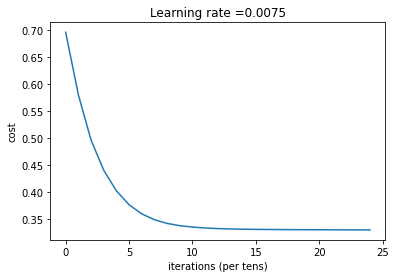

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 17, 17, 1]
Cost after iteration 0: 0.694789
Cost after iteration 100: 0.581853
Cost after iteration 200: 0.497237
Cost after iteration 300: 0.435905
Cost after iteration 400: 0.395118
Cost after iteration 500: 0.368784
Cost after iteration 600: 0.352541
Cost after iteration 700: 0.342980
Cost after iteration 800: 0.337567
Cost after iteration 900: 0.334565
Cost after iteration 1000: 0.332919
Cost after iteration 1100: 0.332008
Cost after iteration 1200: 0.331487
Cost after iteration 1300: 0.331178
Cost after iteration 1400: 0.330985
Cost after iteration 1500: 0.330852
Cost after iteration 1600: 0.330750
Cost after iteration 1700: 0.330665
Cost after iteration 1800: 0.330588
Cost after iteration 1900: 0.330516
Cost after iteration 2000: 0.330447
Cost after iteration 2100: 0.330379
Cost after iteration 2200: 0.330312
Cost after iteration 2300: 0.330246
Cost after 

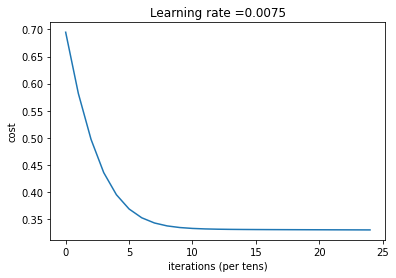

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 17, 17, 1]
Cost after iteration 0: 0.695315
Cost after iteration 100: 0.546651
Cost after iteration 200: 0.455585
Cost after iteration 300: 0.399207
Cost after iteration 400: 0.366366
Cost after iteration 500: 0.348483
Cost after iteration 600: 0.339205
Cost after iteration 700: 0.334526
Cost after iteration 800: 0.332179
Cost after iteration 900: 0.330974
Cost after iteration 1000: 0.330322
Cost after iteration 1100: 0.329944
Cost after iteration 1200: 0.329692
Cost after iteration 1300: 0.329494
Cost after iteration 1400: 0.329342
Cost after iteration 1500: 0.329219
Cost after iteration 1600: 0.329108
Cost after iteration 1700: 0.329001
Cost after iteration 1800: 0.328897
Cost after iteration 1900: 0.328795
Cost after iteration 2000: 0.328694
Cost after iteration 2100: 0.328593
Cost after iteration 2200: 0.328491
Cost after iteration 2300: 0.328388
Cost after 

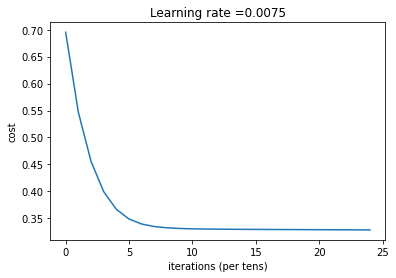

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 17, 17, 1]
Cost after iteration 0: 0.701122
Cost after iteration 100: 0.531741
Cost after iteration 200: 0.432816
Cost after iteration 300: 0.378979
Cost after iteration 400: 0.351869
Cost after iteration 500: 0.339066
Cost after iteration 600: 0.333153
Cost after iteration 700: 0.330405
Cost after iteration 800: 0.329005
Cost after iteration 900: 0.328113
Cost after iteration 1000: 0.327423
Cost after iteration 1100: 0.326861
Cost after iteration 1200: 0.326434
Cost after iteration 1300: 0.326084
Cost after iteration 1400: 0.325791
Cost after iteration 1500: 0.325527
Cost after iteration 1600: 0.325274
Cost after iteration 1700: 0.325016
Cost after iteration 1800: 0.324738
Cost after iteration 1900: 0.324436
Cost after iteration 2000: 0.324139
Cost after iteration 2100: 0.323869
Cost after iteration 2200: 0.323601
Cost after iteration 2300: 0.323330
Cost after 

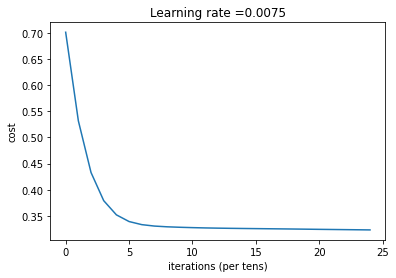

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 25, 17, 1]
Cost after iteration 0: 0.693203
Cost after iteration 100: 0.583440
Cost after iteration 200: 0.508901
Cost after iteration 300: 0.457015
Cost after iteration 400: 0.420341
Cost after iteration 500: 0.394210
Cost after iteration 600: 0.375469
Cost after iteration 700: 0.362076
Cost after iteration 800: 0.352588
Cost after iteration 900: 0.345659
Cost after iteration 1000: 0.339998
Cost after iteration 1100: 0.336435
Cost after iteration 1200: 0.334109
Cost after iteration 1300: 0.332539
Cost after iteration 1400: 0.331459
Cost after iteration 1500: 0.330702
Cost after iteration 1600: 0.330157
Cost after iteration 1700: 0.329751
Cost after iteration 1800: 0.329435
Cost after iteration 1900: 0.329178
Cost after iteration 2000: 0.328957
Cost after iteration 2100: 0.328760
Cost after iteration 2200: 0.328577
Cost after iteration 2300: 0.328406
Cost after i

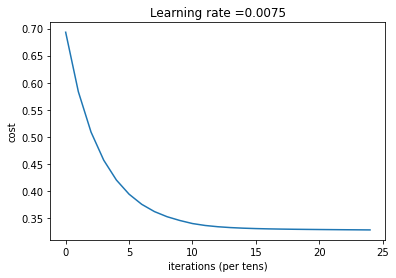

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 25, 17, 1]
Cost after iteration 0: 0.695892
Cost after iteration 100: 0.578931
Cost after iteration 200: 0.495865
Cost after iteration 300: 0.439415
Cost after iteration 400: 0.401311
Cost after iteration 500: 0.375868
Cost after iteration 600: 0.359219
Cost after iteration 700: 0.348562
Cost after iteration 800: 0.341871
Cost after iteration 900: 0.337737
Cost after iteration 1000: 0.335213
Cost after iteration 1100: 0.333685
Cost after iteration 1200: 0.332765
Cost after iteration 1300: 0.332212
Cost after iteration 1400: 0.331879
Cost after iteration 1500: 0.331678
Cost after iteration 1600: 0.331555
Cost after iteration 1700: 0.331478
Cost after iteration 1800: 0.331428
Cost after iteration 1900: 0.331394
Cost after iteration 2000: 0.331370
Cost after iteration 2100: 0.331352
Cost after iteration 2200: 0.331337
Cost after iteration 2300: 0.331324
Cost after i

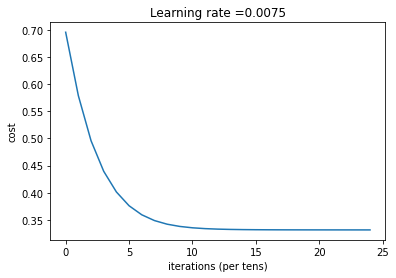

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 25, 17, 1]
Cost after iteration 0: 0.692936
Cost after iteration 100: 0.573553
Cost after iteration 200: 0.487810
Cost after iteration 300: 0.425195
Cost after iteration 400: 0.382264
Cost after iteration 500: 0.356436
Cost after iteration 600: 0.342960
Cost after iteration 700: 0.336666
Cost after iteration 800: 0.333918
Cost after iteration 900: 0.332743
Cost after iteration 1000: 0.332226
Cost after iteration 1100: 0.331973
Cost after iteration 1200: 0.331823
Cost after iteration 1300: 0.331710
Cost after iteration 1400: 0.331607
Cost after iteration 1500: 0.331492
Cost after iteration 1600: 0.331365
Cost after iteration 1700: 0.331246
Cost after iteration 1800: 0.331132
Cost after iteration 1900: 0.331037
Cost after iteration 2000: 0.330953
Cost after iteration 2100: 0.330878
Cost after iteration 2200: 0.330807
Cost after iteration 2300: 0.330738
Cost after 

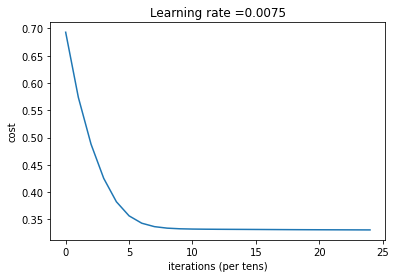

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 25, 17, 1]
Cost after iteration 0: 0.695836
Cost after iteration 100: 0.587221
Cost after iteration 200: 0.512260
Cost after iteration 300: 0.459672
Cost after iteration 400: 0.421987
Cost after iteration 500: 0.394740
Cost after iteration 600: 0.375097
Cost after iteration 700: 0.361069
Cost after iteration 800: 0.351169
Cost after iteration 900: 0.344311
Cost after iteration 1000: 0.339664
Cost after iteration 1100: 0.336562
Cost after iteration 1200: 0.334512
Cost after iteration 1300: 0.333163
Cost after iteration 1400: 0.332274
Cost after iteration 1500: 0.331681
Cost after iteration 1600: 0.331283
Cost after iteration 1700: 0.331010
Cost after iteration 1800: 0.330822
Cost after iteration 1900: 0.330686
Cost after iteration 2000: 0.330583
Cost after iteration 2100: 0.330502
Cost after iteration 2200: 0.330434
Cost after iteration 2300: 0.330374
Cost after 

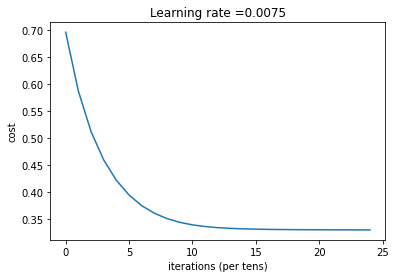

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 25, 17, 1]
Cost after iteration 0: 0.688871
Cost after iteration 100: 0.533858
Cost after iteration 200: 0.438969
Cost after iteration 300: 0.383875
Cost after iteration 400: 0.354915
Cost after iteration 500: 0.340789
Cost after iteration 600: 0.334159
Cost after iteration 700: 0.331105
Cost after iteration 800: 0.329664
Cost after iteration 900: 0.328942
Cost after iteration 1000: 0.328545
Cost after iteration 1100: 0.328296
Cost after iteration 1200: 0.328112
Cost after iteration 1300: 0.327959
Cost after iteration 1400: 0.327818
Cost after iteration 1500: 0.327681
Cost after iteration 1600: 0.327548
Cost after iteration 1700: 0.327415
Cost after iteration 1800: 0.327281
Cost after iteration 1900: 0.327145
Cost after iteration 2000: 0.327006
Cost after iteration 2100: 0.326864
Cost after iteration 2200: 0.326717
Cost after iteration 2300: 0.326571
Cost after 

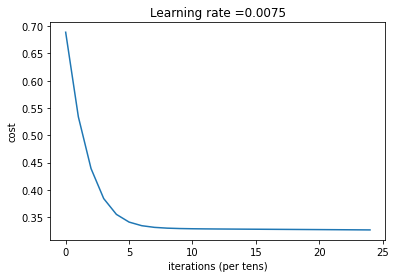

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 25, 17, 1]
Cost after iteration 0: 0.697154
Cost after iteration 100: 0.554807
Cost after iteration 200: 0.464729
Cost after iteration 300: 0.406693
Cost after iteration 400: 0.371420
Cost after iteration 500: 0.351491
Cost after iteration 600: 0.340932
Cost after iteration 700: 0.335565
Cost after iteration 800: 0.332879
Cost after iteration 900: 0.331507
Cost after iteration 1000: 0.330794
Cost after iteration 1100: 0.330405
Cost after iteration 1200: 0.330171
Cost after iteration 1300: 0.330013
Cost after iteration 1400: 0.329893
Cost after iteration 1500: 0.329791
Cost after iteration 1600: 0.329699
Cost after iteration 1700: 0.329612
Cost after iteration 1800: 0.329525
Cost after iteration 1900: 0.329429
Cost after iteration 2000: 0.329084
Cost after iteration 2100: 0.328929
Cost after iteration 2200: 0.328826
Cost after iteration 2300: 0.328726
Cost after 

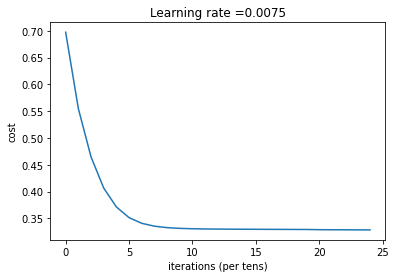

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 25, 17, 1]
Cost after iteration 0: 0.691735
Cost after iteration 100: 0.578033
Cost after iteration 200: 0.493993
Cost after iteration 300: 0.435387
Cost after iteration 400: 0.394864
Cost after iteration 500: 0.368394
Cost after iteration 600: 0.352137
Cost after iteration 700: 0.342711
Cost after iteration 800: 0.337505
Cost after iteration 900: 0.334729
Cost after iteration 1000: 0.333269
Cost after iteration 1100: 0.332486
Cost after iteration 1200: 0.332052
Cost after iteration 1300: 0.331793
Cost after iteration 1400: 0.331623
Cost after iteration 1500: 0.331493
Cost after iteration 1600: 0.331388
Cost after iteration 1700: 0.331299
Cost after iteration 1800: 0.331219
Cost after iteration 1900: 0.331144
Cost after iteration 2000: 0.331071
Cost after iteration 2100: 0.330999
Cost after iteration 2200: 0.330929
Cost after iteration 2300: 0.330859
Cost after 

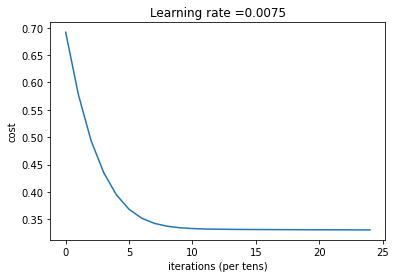

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 25, 17, 1]
Cost after iteration 0: 0.693857
Cost after iteration 100: 0.537303
Cost after iteration 200: 0.437486
Cost after iteration 300: 0.381316
Cost after iteration 400: 0.352954
Cost after iteration 500: 0.339999
Cost after iteration 600: 0.334425
Cost after iteration 700: 0.332055
Cost after iteration 800: 0.330986
Cost after iteration 900: 0.330420
Cost after iteration 1000: 0.330057
Cost after iteration 1100: 0.329816
Cost after iteration 1200: 0.329607
Cost after iteration 1300: 0.329390
Cost after iteration 1400: 0.329173
Cost after iteration 1500: 0.328975
Cost after iteration 1600: 0.328790
Cost after iteration 1700: 0.328615
Cost after iteration 1800: 0.328449
Cost after iteration 1900: 0.328292
Cost after iteration 2000: 0.328139
Cost after iteration 2100: 0.327986
Cost after iteration 2200: 0.327833
Cost after iteration 2300: 0.327680
Cost after 

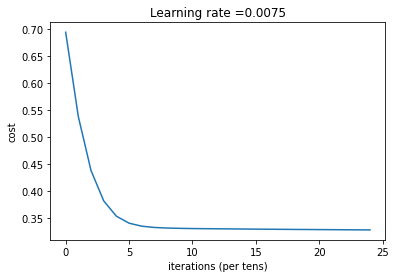

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 33, 17, 1]
Cost after iteration 0: 0.693103
Cost after iteration 100: 0.501384
Cost after iteration 200: 0.400170
Cost after iteration 300: 0.353387
Cost after iteration 400: 0.336086
Cost after iteration 500: 0.330780
Cost after iteration 600: 0.329225
Cost after iteration 700: 0.328668
Cost after iteration 800: 0.328352
Cost after iteration 900: 0.328084
Cost after iteration 1000: 0.327819
Cost after iteration 1100: 0.327543
Cost after iteration 1200: 0.327251
Cost after iteration 1300: 0.326942
Cost after iteration 1400: 0.326614
Cost after iteration 1500: 0.326265
Cost after iteration 1600: 0.325894
Cost after iteration 1700: 0.325498
Cost after iteration 1800: 0.325075
Cost after iteration 1900: 0.324624
Cost after iteration 2000: 0.324141
Cost after iteration 2100: 0.323625
Cost after iteration 2200: 0.323071
Cost after iteration 2300: 0.322477
Cost after i

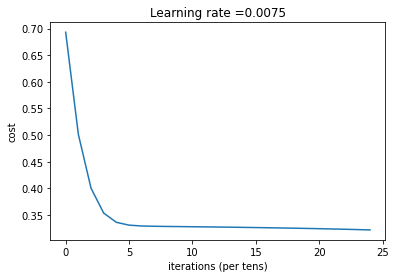

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 33, 17, 1]
Cost after iteration 0: 0.700790
Cost after iteration 100: 0.564203
Cost after iteration 200: 0.478497
Cost after iteration 300: 0.421824
Cost after iteration 400: 0.385203
Cost after iteration 500: 0.362477
Cost after iteration 600: 0.348940
Cost after iteration 700: 0.341148
Cost after iteration 800: 0.336773
Cost after iteration 900: 0.334345
Cost after iteration 1000: 0.333001
Cost after iteration 1100: 0.332227
Cost after iteration 1200: 0.331706
Cost after iteration 1300: 0.331386
Cost after iteration 1400: 0.331168
Cost after iteration 1500: 0.331015
Cost after iteration 1600: 0.330893
Cost after iteration 1700: 0.330772
Cost after iteration 1800: 0.330661
Cost after iteration 1900: 0.330557
Cost after iteration 2000: 0.330463
Cost after iteration 2100: 0.330383
Cost after iteration 2200: 0.330310
Cost after iteration 2300: 0.330242
Cost after i

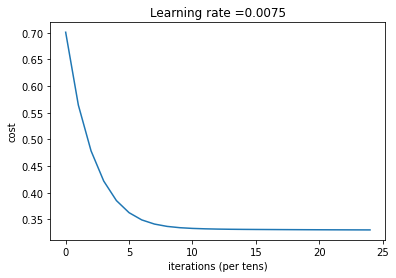

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 33, 17, 1]
Cost after iteration 0: 0.695387
Cost after iteration 100: 0.563789
Cost after iteration 200: 0.468757
Cost after iteration 300: 0.408194
Cost after iteration 400: 0.372464
Cost after iteration 500: 0.352542
Cost after iteration 600: 0.341896
Cost after iteration 700: 0.336362
Cost after iteration 800: 0.333520
Cost after iteration 900: 0.332055
Cost after iteration 1000: 0.331243
Cost after iteration 1100: 0.330725
Cost after iteration 1200: 0.330412
Cost after iteration 1300: 0.330201
Cost after iteration 1400: 0.329863
Cost after iteration 1500: 0.329490
Cost after iteration 1600: 0.329330
Cost after iteration 1700: 0.329220
Cost after iteration 1800: 0.329123
Cost after iteration 1900: 0.329031
Cost after iteration 2000: 0.328941
Cost after iteration 2100: 0.328850
Cost after iteration 2200: 0.328757
Cost after iteration 2300: 0.328662
Cost after 

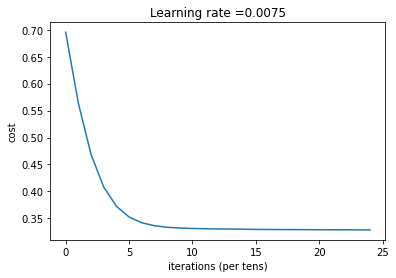

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 33, 17, 1]
Cost after iteration 0: 0.690236
Cost after iteration 100: 0.546596
Cost after iteration 200: 0.456729
Cost after iteration 300: 0.400815
Cost after iteration 400: 0.367810
Cost after iteration 500: 0.349563
Cost after iteration 600: 0.339998
Cost after iteration 700: 0.335075
Cost after iteration 800: 0.332625
Cost after iteration 900: 0.331466
Cost after iteration 1000: 0.330877
Cost after iteration 1100: 0.330549
Cost after iteration 1200: 0.330346
Cost after iteration 1300: 0.330204
Cost after iteration 1400: 0.330093
Cost after iteration 1500: 0.330000
Cost after iteration 1600: 0.329919
Cost after iteration 1700: 0.329842
Cost after iteration 1800: 0.329767
Cost after iteration 1900: 0.329691
Cost after iteration 2000: 0.329613
Cost after iteration 2100: 0.329526
Cost after iteration 2200: 0.329426
Cost after iteration 2300: 0.329312
Cost after 

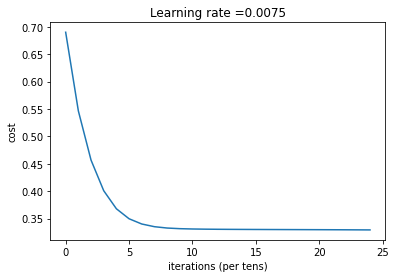

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 33, 17, 1]
Cost after iteration 0: 0.693740
Cost after iteration 100: 0.567661
Cost after iteration 200: 0.469090
Cost after iteration 300: 0.406615
Cost after iteration 400: 0.369222
Cost after iteration 500: 0.348696
Cost after iteration 600: 0.338237
Cost after iteration 700: 0.333167
Cost after iteration 800: 0.330758
Cost after iteration 900: 0.329597
Cost after iteration 1000: 0.329007
Cost after iteration 1100: 0.328670
Cost after iteration 1200: 0.328449
Cost after iteration 1300: 0.328280
Cost after iteration 1400: 0.328135
Cost after iteration 1500: 0.328000
Cost after iteration 1600: 0.327870
Cost after iteration 1700: 0.327736
Cost after iteration 1800: 0.327606
Cost after iteration 1900: 0.327474
Cost after iteration 2000: 0.327333
Cost after iteration 2100: 0.327184
Cost after iteration 2200: 0.327040
Cost after iteration 2300: 0.326902
Cost after 

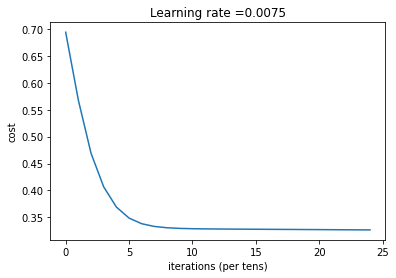

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 33, 17, 1]
Cost after iteration 0: 0.697503
Cost after iteration 100: 0.579028
Cost after iteration 200: 0.497973
Cost after iteration 300: 0.439835
Cost after iteration 400: 0.398643
Cost after iteration 500: 0.370922
Cost after iteration 600: 0.353424
Cost after iteration 700: 0.343053
Cost after iteration 800: 0.337205
Cost after iteration 900: 0.333989
Cost after iteration 1000: 0.332216
Cost after iteration 1100: 0.331220
Cost after iteration 1200: 0.330639
Cost after iteration 1300: 0.330278
Cost after iteration 1400: 0.330036
Cost after iteration 1500: 0.329853
Cost after iteration 1600: 0.329704
Cost after iteration 1700: 0.329581
Cost after iteration 1800: 0.329470
Cost after iteration 1900: 0.329368
Cost after iteration 2000: 0.329269
Cost after iteration 2100: 0.329173
Cost after iteration 2200: 0.329076
Cost after iteration 2300: 0.328980
Cost after 

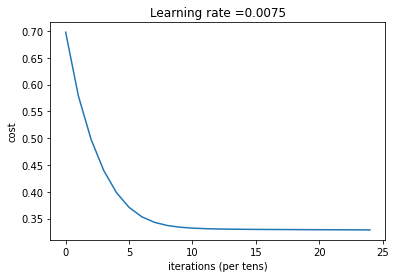

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 33, 17, 1]
Cost after iteration 0: 0.696301
Cost after iteration 100: 0.563532
Cost after iteration 200: 0.478632
Cost after iteration 300: 0.421271
Cost after iteration 400: 0.383712
Cost after iteration 500: 0.360417
Cost after iteration 600: 0.346761
Cost after iteration 700: 0.339126
Cost after iteration 800: 0.334984
Cost after iteration 900: 0.332765
Cost after iteration 1000: 0.331559
Cost after iteration 1100: 0.330878
Cost after iteration 1200: 0.330459
Cost after iteration 1300: 0.330172
Cost after iteration 1400: 0.329951
Cost after iteration 1500: 0.329761
Cost after iteration 1600: 0.329610
Cost after iteration 1700: 0.329495
Cost after iteration 1800: 0.329394
Cost after iteration 1900: 0.329301
Cost after iteration 2000: 0.329213
Cost after iteration 2100: 0.329127
Cost after iteration 2200: 0.329040
Cost after iteration 2300: 0.328954
Cost after 

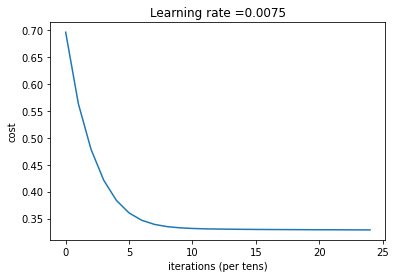

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 33, 17, 1]
Cost after iteration 0: 0.688086
Cost after iteration 100: 0.530701
Cost after iteration 200: 0.435225
Cost after iteration 300: 0.380373
Cost after iteration 400: 0.352266
Cost after iteration 500: 0.339310
Cost after iteration 600: 0.333707
Cost after iteration 700: 0.331324
Cost after iteration 800: 0.330270
Cost after iteration 900: 0.329751
Cost after iteration 1000: 0.329442
Cost after iteration 1100: 0.329220
Cost after iteration 1200: 0.329032
Cost after iteration 1300: 0.328864
Cost after iteration 1400: 0.328708
Cost after iteration 1500: 0.328559
Cost after iteration 1600: 0.328416
Cost after iteration 1700: 0.328276
Cost after iteration 1800: 0.328138
Cost after iteration 1900: 0.327999
Cost after iteration 2000: 0.327860
Cost after iteration 2100: 0.327719
Cost after iteration 2200: 0.327577
Cost after iteration 2300: 0.327432
Cost after 

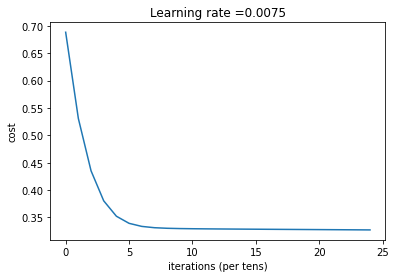

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 41, 17, 1]
Cost after iteration 0: 0.693170
Cost after iteration 100: 0.578192
Cost after iteration 200: 0.500324
Cost after iteration 300: 0.446405
Cost after iteration 400: 0.408808
Cost after iteration 500: 0.382799
Cost after iteration 600: 0.364866
Cost after iteration 700: 0.351598
Cost after iteration 800: 0.343329
Cost after iteration 900: 0.338115
Cost after iteration 1000: 0.334833
Cost after iteration 1100: 0.332776
Cost after iteration 1200: 0.331472
Cost after iteration 1300: 0.330631
Cost after iteration 1400: 0.330065
Cost after iteration 1500: 0.329662
Cost after iteration 1600: 0.329353
Cost after iteration 1700: 0.329096
Cost after iteration 1800: 0.328867
Cost after iteration 1900: 0.328657
Cost after iteration 2000: 0.328465
Cost after iteration 2100: 0.328281
Cost after iteration 2200: 0.328102
Cost after iteration 2300: 0.327923
Cost after i

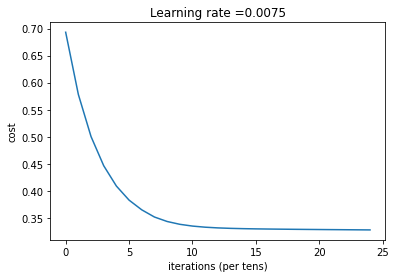

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 41, 17, 1]
Cost after iteration 0: 0.688500
Cost after iteration 100: 0.515699
Cost after iteration 200: 0.415333
Cost after iteration 300: 0.364312
Cost after iteration 400: 0.342997
Cost after iteration 500: 0.335299
Cost after iteration 600: 0.332626
Cost after iteration 700: 0.331561
Cost after iteration 800: 0.331059
Cost after iteration 900: 0.330792
Cost after iteration 1000: 0.330616
Cost after iteration 1100: 0.330474
Cost after iteration 1200: 0.330345
Cost after iteration 1300: 0.330221
Cost after iteration 1400: 0.330100
Cost after iteration 1500: 0.329980
Cost after iteration 1600: 0.329859
Cost after iteration 1700: 0.329738
Cost after iteration 1800: 0.329616
Cost after iteration 1900: 0.329492
Cost after iteration 2000: 0.329367
Cost after iteration 2100: 0.329240
Cost after iteration 2200: 0.329111
Cost after iteration 2300: 0.328980
Cost after i

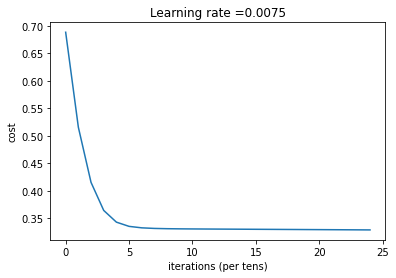

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 41, 17, 1]
Cost after iteration 0: 0.690772
Cost after iteration 100: 0.566209
Cost after iteration 200: 0.477248
Cost after iteration 300: 0.415430
Cost after iteration 400: 0.375954
Cost after iteration 500: 0.353455
Cost after iteration 600: 0.341958
Cost after iteration 700: 0.336528
Cost after iteration 800: 0.334054
Cost after iteration 900: 0.332908
Cost after iteration 1000: 0.332332
Cost after iteration 1100: 0.332021
Cost after iteration 1200: 0.331840
Cost after iteration 1300: 0.331713
Cost after iteration 1400: 0.331609
Cost after iteration 1500: 0.331516
Cost after iteration 1600: 0.331430
Cost after iteration 1700: 0.331347
Cost after iteration 1800: 0.331266
Cost after iteration 1900: 0.331186
Cost after iteration 2000: 0.331107
Cost after iteration 2100: 0.331028
Cost after iteration 2200: 0.330949
Cost after iteration 2300: 0.330870
Cost after 

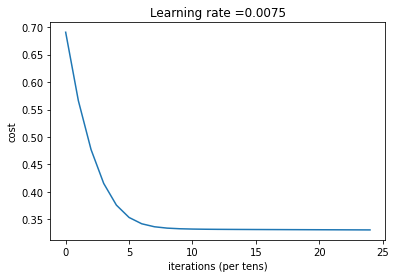

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 41, 17, 1]
Cost after iteration 0: 0.689079
Cost after iteration 100: 0.529858
Cost after iteration 200: 0.431380
Cost after iteration 300: 0.376924
Cost after iteration 400: 0.350177
Cost after iteration 500: 0.338449
Cost after iteration 600: 0.333570
Cost after iteration 700: 0.331554
Cost after iteration 800: 0.330698
Cost after iteration 900: 0.330297
Cost after iteration 1000: 0.330077
Cost after iteration 1100: 0.329930
Cost after iteration 1200: 0.329811
Cost after iteration 1300: 0.329703
Cost after iteration 1400: 0.329599
Cost after iteration 1500: 0.329496
Cost after iteration 1600: 0.329391
Cost after iteration 1700: 0.329287
Cost after iteration 1800: 0.329181
Cost after iteration 1900: 0.329073
Cost after iteration 2000: 0.328963
Cost after iteration 2100: 0.328851
Cost after iteration 2200: 0.328736
Cost after iteration 2300: 0.328618
Cost after 

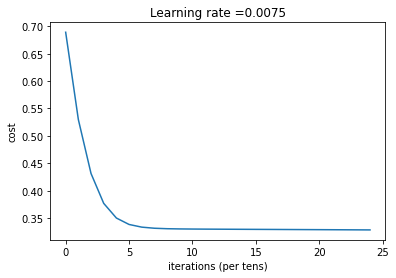

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 41, 17, 1]
Cost after iteration 0: 0.692631
Cost after iteration 100: 0.576529
Cost after iteration 200: 0.493789
Cost after iteration 300: 0.433053
Cost after iteration 400: 0.389675
Cost after iteration 500: 0.362023
Cost after iteration 600: 0.346326
Cost after iteration 700: 0.338251
Cost after iteration 800: 0.334366
Cost after iteration 900: 0.332557
Cost after iteration 1000: 0.331709
Cost after iteration 1100: 0.331287
Cost after iteration 1200: 0.331041
Cost after iteration 1300: 0.330857
Cost after iteration 1400: 0.330685
Cost after iteration 1500: 0.330533
Cost after iteration 1600: 0.330402
Cost after iteration 1700: 0.330283
Cost after iteration 1800: 0.330171
Cost after iteration 1900: 0.330058
Cost after iteration 2000: 0.329941
Cost after iteration 2100: 0.329819
Cost after iteration 2200: 0.329692
Cost after iteration 2300: 0.329569
Cost after 

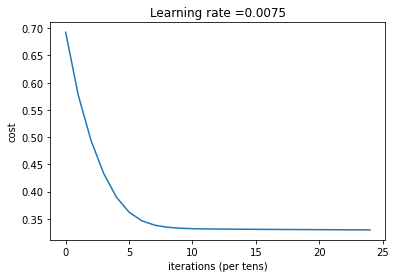

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 41, 17, 1]
Cost after iteration 0: 0.698125
Cost after iteration 100: 0.539599
Cost after iteration 200: 0.445182
Cost after iteration 300: 0.389464
Cost after iteration 400: 0.359383
Cost after iteration 500: 0.344386
Cost after iteration 600: 0.337319
Cost after iteration 700: 0.334073
Cost after iteration 800: 0.332572
Cost after iteration 900: 0.331844
Cost after iteration 1000: 0.331429
Cost after iteration 1100: 0.331147
Cost after iteration 1200: 0.330963
Cost after iteration 1300: 0.330824
Cost after iteration 1400: 0.330703
Cost after iteration 1500: 0.330596
Cost after iteration 1600: 0.330497
Cost after iteration 1700: 0.330403
Cost after iteration 1800: 0.330309
Cost after iteration 1900: 0.330214
Cost after iteration 2000: 0.330118
Cost after iteration 2100: 0.330021
Cost after iteration 2200: 0.329926
Cost after iteration 2300: 0.329830
Cost after 

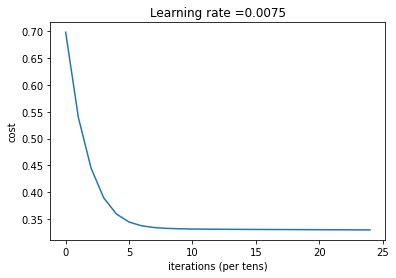

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 41, 17, 1]
Cost after iteration 0: 0.694927
Cost after iteration 100: 0.581180
Cost after iteration 200: 0.504219
Cost after iteration 300: 0.449334
Cost after iteration 400: 0.409753
Cost after iteration 500: 0.381715
Cost after iteration 600: 0.362568
Cost after iteration 700: 0.350033
Cost after iteration 800: 0.342165
Cost after iteration 900: 0.337396
Cost after iteration 1000: 0.334568
Cost after iteration 1100: 0.332907
Cost after iteration 1200: 0.331930
Cost after iteration 1300: 0.331345
Cost after iteration 1400: 0.330979
Cost after iteration 1500: 0.330734
Cost after iteration 1600: 0.330553
Cost after iteration 1700: 0.330408
Cost after iteration 1800: 0.330283
Cost after iteration 1900: 0.330169
Cost after iteration 2000: 0.330061
Cost after iteration 2100: 0.329956
Cost after iteration 2200: 0.329850
Cost after iteration 2300: 0.329741
Cost after 

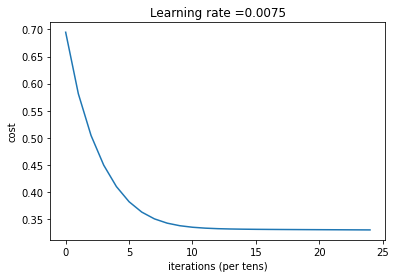

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 41, 17, 1]
Cost after iteration 0: 0.695027
Cost after iteration 100: 0.553436
Cost after iteration 200: 0.461734
Cost after iteration 300: 0.403369
Cost after iteration 400: 0.368988
Cost after iteration 500: 0.349919
Cost after iteration 600: 0.339901
Cost after iteration 700: 0.334808
Cost after iteration 800: 0.332236
Cost after iteration 900: 0.330907
Cost after iteration 1000: 0.330188
Cost after iteration 1100: 0.329762
Cost after iteration 1200: 0.329478
Cost after iteration 1300: 0.329258
Cost after iteration 1400: 0.329067
Cost after iteration 1500: 0.328890
Cost after iteration 1600: 0.328722
Cost after iteration 1700: 0.328556
Cost after iteration 1800: 0.328401
Cost after iteration 1900: 0.328253
Cost after iteration 2000: 0.328108
Cost after iteration 2100: 0.327964
Cost after iteration 2200: 0.327819
Cost after iteration 2300: 0.327671
Cost after 

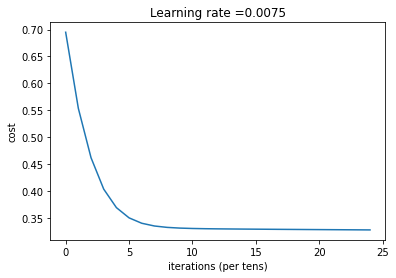

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 49, 17, 1]
Cost after iteration 0: 0.693167
Cost after iteration 100: 0.578940
Cost after iteration 200: 0.501600
Cost after iteration 300: 0.448177
Cost after iteration 400: 0.410953
Cost after iteration 500: 0.385074
Cost after iteration 600: 0.367273
Cost after iteration 700: 0.355176
Cost after iteration 800: 0.347054
Cost after iteration 900: 0.341659
Cost after iteration 1000: 0.338104
Cost after iteration 1100: 0.335769
Cost after iteration 1200: 0.334191
Cost after iteration 1300: 0.332852
Cost after iteration 1400: 0.331891
Cost after iteration 1500: 0.331327
Cost after iteration 1600: 0.330942
Cost after iteration 1700: 0.330669
Cost after iteration 1800: 0.330467
Cost after iteration 1900: 0.330310
Cost after iteration 2000: 0.330179
Cost after iteration 2100: 0.330065
Cost after iteration 2200: 0.329960
Cost after iteration 2300: 0.329860
Cost after i

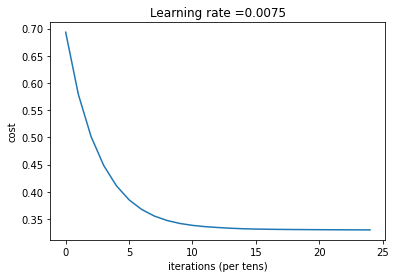

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 49, 17, 1]
Cost after iteration 0: 0.694159
Cost after iteration 100: 0.552282
Cost after iteration 200: 0.456928
Cost after iteration 300: 0.393037
Cost after iteration 400: 0.357301
Cost after iteration 500: 0.341158
Cost after iteration 600: 0.335038
Cost after iteration 700: 0.332859
Cost after iteration 800: 0.332062
Cost after iteration 900: 0.331710
Cost after iteration 1000: 0.331470
Cost after iteration 1100: 0.331229
Cost after iteration 1200: 0.330964
Cost after iteration 1300: 0.330718
Cost after iteration 1400: 0.330510
Cost after iteration 1500: 0.330349
Cost after iteration 1600: 0.330212
Cost after iteration 1700: 0.330083
Cost after iteration 1800: 0.329956
Cost after iteration 1900: 0.329830
Cost after iteration 2000: 0.329703
Cost after iteration 2100: 0.329574
Cost after iteration 2200: 0.329443
Cost after iteration 2300: 0.329310
Cost after i

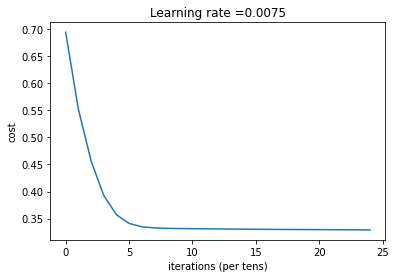

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 49, 17, 1]
Cost after iteration 0: 0.695177
Cost after iteration 100: 0.551035
Cost after iteration 200: 0.456777
Cost after iteration 300: 0.399051
Cost after iteration 400: 0.365928
Cost after iteration 500: 0.348289
Cost after iteration 600: 0.339466
Cost after iteration 700: 0.335230
Cost after iteration 800: 0.333226
Cost after iteration 900: 0.332271
Cost after iteration 1000: 0.331801
Cost after iteration 1100: 0.331558
Cost after iteration 1200: 0.331417
Cost after iteration 1300: 0.331324
Cost after iteration 1400: 0.331255
Cost after iteration 1500: 0.331193
Cost after iteration 1600: 0.331135
Cost after iteration 1700: 0.331081
Cost after iteration 1800: 0.331027
Cost after iteration 1900: 0.330974
Cost after iteration 2000: 0.330923
Cost after iteration 2100: 0.330873
Cost after iteration 2200: 0.330820
Cost after iteration 2300: 0.330767
Cost after 

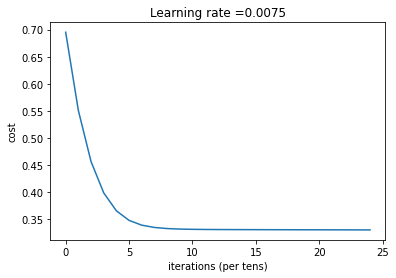

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 49, 17, 1]
Cost after iteration 0: 0.694757
Cost after iteration 100: 0.533187
Cost after iteration 200: 0.438570
Cost after iteration 300: 0.385240
Cost after iteration 400: 0.356788
Cost after iteration 500: 0.342434
Cost after iteration 600: 0.335500
Cost after iteration 700: 0.332227
Cost after iteration 800: 0.330679
Cost after iteration 900: 0.329919
Cost after iteration 1000: 0.329522
Cost after iteration 1100: 0.329290
Cost after iteration 1200: 0.329132
Cost after iteration 1300: 0.329007
Cost after iteration 1400: 0.328901
Cost after iteration 1500: 0.328802
Cost after iteration 1600: 0.328706
Cost after iteration 1700: 0.328611
Cost after iteration 1800: 0.328515
Cost after iteration 1900: 0.328417
Cost after iteration 2000: 0.328317
Cost after iteration 2100: 0.328216
Cost after iteration 2200: 0.328110
Cost after iteration 2300: 0.327999
Cost after 

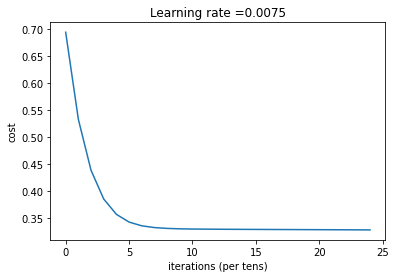

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 49, 17, 1]
Cost after iteration 0: 0.697964
Cost after iteration 100: 0.530308
Cost after iteration 200: 0.436756
Cost after iteration 300: 0.382914
Cost after iteration 400: 0.355305
Cost after iteration 500: 0.341816
Cost after iteration 600: 0.335382
Cost after iteration 700: 0.332318
Cost after iteration 800: 0.330813
Cost after iteration 900: 0.330029
Cost after iteration 1000: 0.329574
Cost after iteration 1100: 0.329267
Cost after iteration 1200: 0.329022
Cost after iteration 1300: 0.328849
Cost after iteration 1400: 0.328713
Cost after iteration 1500: 0.328594
Cost after iteration 1600: 0.328482
Cost after iteration 1700: 0.328372
Cost after iteration 1800: 0.328262
Cost after iteration 1900: 0.328144
Cost after iteration 2000: 0.328017
Cost after iteration 2100: 0.327897
Cost after iteration 2200: 0.327777
Cost after iteration 2300: 0.327654
Cost after 

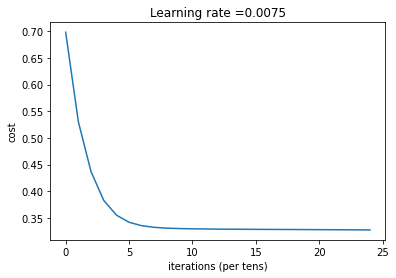

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 49, 17, 1]
Cost after iteration 0: 0.695377
Cost after iteration 100: 0.557124
Cost after iteration 200: 0.462133
Cost after iteration 300: 0.401634
Cost after iteration 400: 0.366608
Cost after iteration 500: 0.347917
Cost after iteration 600: 0.338560
Cost after iteration 700: 0.334052
Cost after iteration 800: 0.331895
Cost after iteration 900: 0.330826
Cost after iteration 1000: 0.330240
Cost after iteration 1100: 0.329868
Cost after iteration 1200: 0.329597
Cost after iteration 1300: 0.329384
Cost after iteration 1400: 0.329216
Cost after iteration 1500: 0.329069
Cost after iteration 1600: 0.328935
Cost after iteration 1700: 0.328808
Cost after iteration 1800: 0.328687
Cost after iteration 1900: 0.328572
Cost after iteration 2000: 0.328459
Cost after iteration 2100: 0.328346
Cost after iteration 2200: 0.328233
Cost after iteration 2300: 0.328120
Cost after 

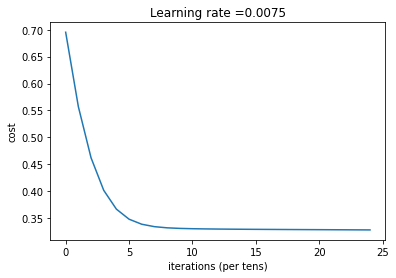

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 49, 17, 1]
Cost after iteration 0: 0.691495
Cost after iteration 100: 0.576700
Cost after iteration 200: 0.496472
Cost after iteration 300: 0.439584
Cost after iteration 400: 0.400466
Cost after iteration 500: 0.374083
Cost after iteration 600: 0.356860
Cost after iteration 700: 0.346031
Cost after iteration 800: 0.339445
Cost after iteration 900: 0.335531
Cost after iteration 1000: 0.333229
Cost after iteration 1100: 0.331869
Cost after iteration 1200: 0.331042
Cost after iteration 1300: 0.330517
Cost after iteration 1400: 0.330165
Cost after iteration 1500: 0.329916
Cost after iteration 1600: 0.329718
Cost after iteration 1700: 0.329552
Cost after iteration 1800: 0.329406
Cost after iteration 1900: 0.329276
Cost after iteration 2000: 0.329155
Cost after iteration 2100: 0.329039
Cost after iteration 2200: 0.328925
Cost after iteration 2300: 0.328814
Cost after 

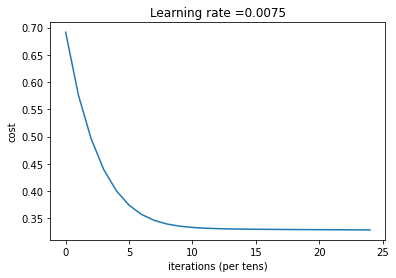

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 49, 17, 1]
Cost after iteration 0: 0.693132
Cost after iteration 100: 0.501973
Cost after iteration 200: 0.398222
Cost after iteration 300: 0.353165
Cost after iteration 400: 0.336687
Cost after iteration 500: 0.330911
Cost after iteration 600: 0.328788
Cost after iteration 700: 0.327851
Cost after iteration 800: 0.327303
Cost after iteration 900: 0.326917
Cost after iteration 1000: 0.326592
Cost after iteration 1100: 0.326262
Cost after iteration 1200: 0.325940
Cost after iteration 1300: 0.325629
Cost after iteration 1400: 0.325328
Cost after iteration 1500: 0.325030
Cost after iteration 1600: 0.324728
Cost after iteration 1700: 0.324427
Cost after iteration 1800: 0.324136
Cost after iteration 1900: 0.323853
Cost after iteration 2000: 0.323569
Cost after iteration 2100: 0.323282
Cost after iteration 2200: 0.322989
Cost after iteration 2300: 0.322689
Cost after 

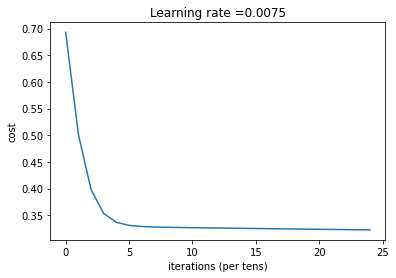

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 57, 17, 1]
Cost after iteration 0: 0.693115
Cost after iteration 100: 0.553471
Cost after iteration 200: 0.451123
Cost after iteration 300: 0.380545
Cost after iteration 400: 0.343787
Cost after iteration 500: 0.331875
Cost after iteration 600: 0.329034
Cost after iteration 700: 0.328299
Cost after iteration 800: 0.327957
Cost after iteration 900: 0.327674
Cost after iteration 1000: 0.327393
Cost after iteration 1100: 0.327102
Cost after iteration 1200: 0.326799
Cost after iteration 1300: 0.326481
Cost after iteration 1400: 0.326149
Cost after iteration 1500: 0.325799
Cost after iteration 1600: 0.325432
Cost after iteration 1700: 0.325045
Cost after iteration 1800: 0.324637
Cost after iteration 1900: 0.324205
Cost after iteration 2000: 0.323748
Cost after iteration 2100: 0.323263
Cost after iteration 2200: 0.322747
Cost after iteration 2300: 0.322198
Cost after i

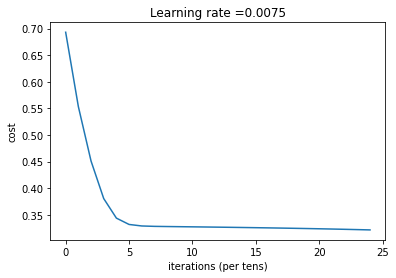

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 57, 17, 1]
Cost after iteration 0: 0.699464
Cost after iteration 100: 0.570247
Cost after iteration 200: 0.483442
Cost after iteration 300: 0.424773
Cost after iteration 400: 0.386011
Cost after iteration 500: 0.361864
Cost after iteration 600: 0.347801
Cost after iteration 700: 0.340100
Cost after iteration 800: 0.336057
Cost after iteration 900: 0.333959
Cost after iteration 1000: 0.332877
Cost after iteration 1100: 0.332330
Cost after iteration 1200: 0.332045
Cost after iteration 1300: 0.331887
Cost after iteration 1400: 0.331791
Cost after iteration 1500: 0.331725
Cost after iteration 1600: 0.331675
Cost after iteration 1700: 0.331632
Cost after iteration 1800: 0.331592
Cost after iteration 1900: 0.331554
Cost after iteration 2000: 0.331517
Cost after iteration 2100: 0.331480
Cost after iteration 2200: 0.331444
Cost after iteration 2300: 0.331408
Cost after i

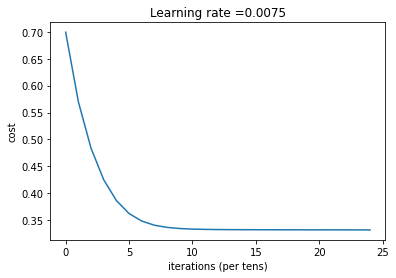

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 57, 17, 1]
Cost after iteration 0: 0.701814
Cost after iteration 100: 0.577247
Cost after iteration 200: 0.491919
Cost after iteration 300: 0.434466
Cost after iteration 400: 0.395789
Cost after iteration 500: 0.370423
Cost after iteration 600: 0.354401
Cost after iteration 700: 0.344600
Cost after iteration 800: 0.338770
Cost after iteration 900: 0.335364
Cost after iteration 1000: 0.333396
Cost after iteration 1100: 0.332263
Cost after iteration 1200: 0.331605
Cost after iteration 1300: 0.331215
Cost after iteration 1400: 0.330977
Cost after iteration 1500: 0.330822
Cost after iteration 1600: 0.330712
Cost after iteration 1700: 0.330626
Cost after iteration 1800: 0.330537
Cost after iteration 1900: 0.330425
Cost after iteration 2000: 0.330220
Cost after iteration 2100: 0.330047
Cost after iteration 2200: 0.329927
Cost after iteration 2300: 0.329824
Cost after 

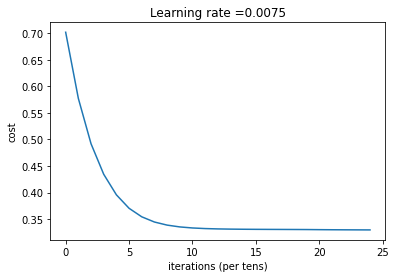

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 57, 17, 1]
Cost after iteration 0: 0.690851
Cost after iteration 100: 0.575919
Cost after iteration 200: 0.495446
Cost after iteration 300: 0.437070
Cost after iteration 400: 0.395293
Cost after iteration 500: 0.367210
Cost after iteration 600: 0.349920
Cost after iteration 700: 0.340165
Cost after iteration 800: 0.335049
Cost after iteration 900: 0.332500
Cost after iteration 1000: 0.331254
Cost after iteration 1100: 0.330635
Cost after iteration 1200: 0.330304
Cost after iteration 1300: 0.330107
Cost after iteration 1400: 0.329970
Cost after iteration 1500: 0.329860
Cost after iteration 1600: 0.329762
Cost after iteration 1700: 0.329669
Cost after iteration 1800: 0.329579
Cost after iteration 1900: 0.329488
Cost after iteration 2000: 0.329398
Cost after iteration 2100: 0.329306
Cost after iteration 2200: 0.329214
Cost after iteration 2300: 0.329122
Cost after 

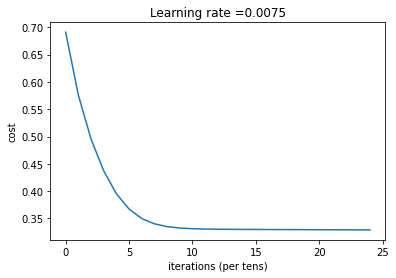

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 57, 17, 1]
Cost after iteration 0: 0.693081
Cost after iteration 100: 0.533519
Cost after iteration 200: 0.441275
Cost after iteration 300: 0.387578
Cost after iteration 400: 0.358596
Cost after iteration 500: 0.344027
Cost after iteration 600: 0.337129
Cost after iteration 700: 0.333955
Cost after iteration 800: 0.332503
Cost after iteration 900: 0.331817
Cost after iteration 1000: 0.331463
Cost after iteration 1100: 0.331249
Cost after iteration 1200: 0.331097
Cost after iteration 1300: 0.330971
Cost after iteration 1400: 0.330856
Cost after iteration 1500: 0.330745
Cost after iteration 1600: 0.330635
Cost after iteration 1700: 0.330527
Cost after iteration 1800: 0.330421
Cost after iteration 1900: 0.330315
Cost after iteration 2000: 0.330206
Cost after iteration 2100: 0.330097
Cost after iteration 2200: 0.329991
Cost after iteration 2300: 0.329886
Cost after 

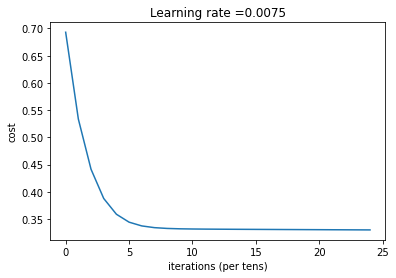

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 57, 17, 1]
Cost after iteration 0: 0.690179
Cost after iteration 100: 0.557329
Cost after iteration 200: 0.463032
Cost after iteration 300: 0.404826
Cost after iteration 400: 0.370185
Cost after iteration 500: 0.350722
Cost after iteration 600: 0.340365
Cost after iteration 700: 0.335016
Cost after iteration 800: 0.332254
Cost after iteration 900: 0.330827
Cost after iteration 1000: 0.330054
Cost after iteration 1100: 0.329594
Cost after iteration 1200: 0.329295
Cost after iteration 1300: 0.329076
Cost after iteration 1400: 0.328903
Cost after iteration 1500: 0.328755
Cost after iteration 1600: 0.328619
Cost after iteration 1700: 0.328487
Cost after iteration 1800: 0.328352
Cost after iteration 1900: 0.328214
Cost after iteration 2000: 0.328071
Cost after iteration 2100: 0.327923
Cost after iteration 2200: 0.327769
Cost after iteration 2300: 0.327610
Cost after 

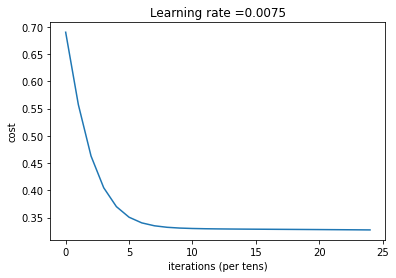

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 57, 17, 1]
Cost after iteration 0: 0.697333
Cost after iteration 100: 0.579134
Cost after iteration 200: 0.500658
Cost after iteration 300: 0.445670
Cost after iteration 400: 0.406938
Cost after iteration 500: 0.380064
Cost after iteration 600: 0.361858
Cost after iteration 700: 0.349884
Cost after iteration 800: 0.342230
Cost after iteration 900: 0.337454
Cost after iteration 1000: 0.334520
Cost after iteration 1100: 0.332730
Cost after iteration 1200: 0.331634
Cost after iteration 1300: 0.330947
Cost after iteration 1400: 0.330496
Cost after iteration 1500: 0.330169
Cost after iteration 1600: 0.329919
Cost after iteration 1700: 0.329718
Cost after iteration 1800: 0.329556
Cost after iteration 1900: 0.329419
Cost after iteration 2000: 0.329297
Cost after iteration 2100: 0.329188
Cost after iteration 2200: 0.329091
Cost after iteration 2300: 0.328999
Cost after 

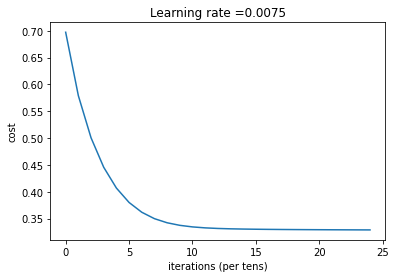

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 57, 17, 1]
Cost after iteration 0: 0.691720
Cost after iteration 100: 0.510352
Cost after iteration 200: 0.410273
Cost after iteration 300: 0.363754
Cost after iteration 400: 0.343709
Cost after iteration 500: 0.335450
Cost after iteration 600: 0.332067
Cost after iteration 700: 0.330617
Cost after iteration 800: 0.329919
Cost after iteration 900: 0.329521
Cost after iteration 1000: 0.329243
Cost after iteration 1100: 0.329019
Cost after iteration 1200: 0.328818
Cost after iteration 1300: 0.328629
Cost after iteration 1400: 0.328444
Cost after iteration 1500: 0.328262
Cost after iteration 1600: 0.328077
Cost after iteration 1700: 0.327893
Cost after iteration 1800: 0.327698
Cost after iteration 1900: 0.327485
Cost after iteration 2000: 0.327233
Cost after iteration 2100: 0.326989
Cost after iteration 2200: 0.326784
Cost after iteration 2300: 0.326588
Cost after 

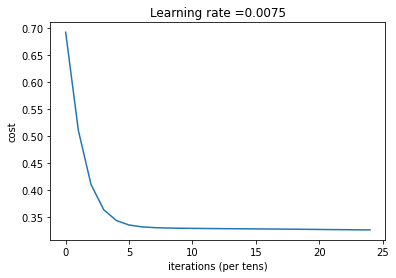

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 1, 25, 1]
Cost after iteration 0: 0.693131
Cost after iteration 100: 0.544913
Cost after iteration 200: 0.425952
Cost after iteration 300: 0.354425
Cost after iteration 400: 0.334642
Cost after iteration 500: 0.330859
Cost after iteration 600: 0.330165
Cost after iteration 700: 0.329994
Cost after iteration 800: 0.329907
Cost after iteration 900: 0.329831
Cost after iteration 1000: 0.329757
Cost after iteration 1100: 0.329680
Cost after iteration 1200: 0.329602
Cost after iteration 1300: 0.329522
Cost after iteration 1400: 0.329440
Cost after iteration 1500: 0.329355
Cost after iteration 1600: 0.329269
Cost after iteration 1700: 0.329179
Cost after iteration 1800: 0.329087
Cost after iteration 1900: 0.328993
Cost after iteration 2000: 0.328895
Cost after iteration 2100: 0.328794
Cost after iteration 2200: 0.328690
Cost after iteration 2300: 0.328583
Cost after it

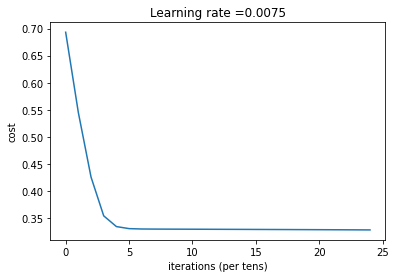

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 1, 25, 1]
Cost after iteration 0: 0.698209
Cost after iteration 100: 0.577009
Cost after iteration 200: 0.500107
Cost after iteration 300: 0.447858
Cost after iteration 400: 0.411912
Cost after iteration 500: 0.387049
Cost after iteration 600: 0.369815
Cost after iteration 700: 0.357859
Cost after iteration 800: 0.349595
Cost after iteration 900: 0.343893
Cost after iteration 1000: 0.339966
Cost after iteration 1100: 0.337261
Cost after iteration 1200: 0.335394
Cost after iteration 1300: 0.334103
Cost after iteration 1400: 0.333210
Cost after iteration 1500: 0.332589
Cost after iteration 1600: 0.332156
Cost after iteration 1700: 0.331853
Cost after iteration 1800: 0.331639
Cost after iteration 1900: 0.331486
Cost after iteration 2000: 0.331377
Cost after iteration 2100: 0.331297
Cost after iteration 2200: 0.331237
Cost after iteration 2300: 0.331191
Cost after it

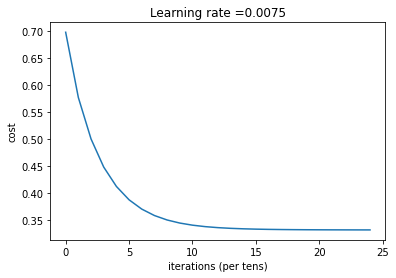

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 1, 25, 1]
Cost after iteration 0: 0.692531
Cost after iteration 100: 0.520038
Cost after iteration 200: 0.389938
Cost after iteration 300: 0.342270
Cost after iteration 400: 0.333017
Cost after iteration 500: 0.331438
Cost after iteration 600: 0.331000
Cost after iteration 700: 0.330640
Cost after iteration 800: 0.330383
Cost after iteration 900: 0.330173
Cost after iteration 1000: 0.329984
Cost after iteration 1100: 0.329801
Cost after iteration 1200: 0.329620
Cost after iteration 1300: 0.329440
Cost after iteration 1400: 0.329260
Cost after iteration 1500: 0.329078
Cost after iteration 1600: 0.328892
Cost after iteration 1700: 0.328700
Cost after iteration 1800: 0.328497
Cost after iteration 1900: 0.328283
Cost after iteration 2000: 0.328057
Cost after iteration 2100: 0.327828
Cost after iteration 2200: 0.327611
Cost after iteration 2300: 0.327393
Cost after i

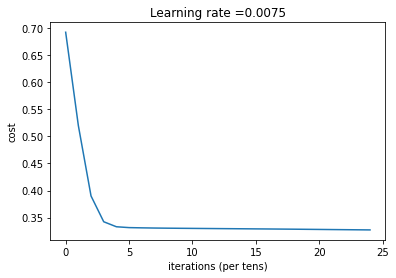

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 1, 25, 1]
Cost after iteration 0: 0.693251
Cost after iteration 100: 0.577111
Cost after iteration 200: 0.500145
Cost after iteration 300: 0.447882
Cost after iteration 400: 0.411949
Cost after iteration 500: 0.387123
Cost after iteration 600: 0.369956
Cost after iteration 700: 0.358090
Cost after iteration 800: 0.349895
Cost after iteration 900: 0.344239
Cost after iteration 1000: 0.340336
Cost after iteration 1100: 0.337642
Cost after iteration 1200: 0.335782
Cost after iteration 1300: 0.334496
Cost after iteration 1400: 0.333607
Cost after iteration 1500: 0.332992
Cost after iteration 1600: 0.332566
Cost after iteration 1700: 0.332271
Cost after iteration 1800: 0.332066
Cost after iteration 1900: 0.331924
Cost after iteration 2000: 0.331826
Cost after iteration 2100: 0.331757
Cost after iteration 2200: 0.331709
Cost after iteration 2300: 0.331676
Cost after i

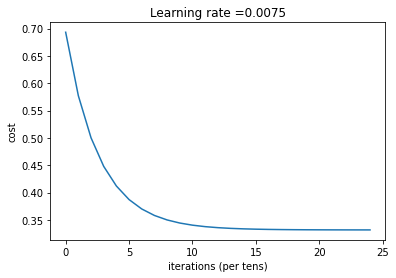

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 1, 25, 1]
Cost after iteration 0: 0.693408
Cost after iteration 100: 0.590722
Cost after iteration 200: 0.520327
Cost after iteration 300: 0.471024
Cost after iteration 400: 0.435824
Cost after iteration 500: 0.410253
Cost after iteration 600: 0.391401
Cost after iteration 700: 0.377332
Cost after iteration 800: 0.366729
Cost after iteration 900: 0.358674
Cost after iteration 1000: 0.352513
Cost after iteration 1100: 0.347747
Cost after iteration 1200: 0.343982
Cost after iteration 1300: 0.341027
Cost after iteration 1400: 0.338719
Cost after iteration 1500: 0.336924
Cost after iteration 1600: 0.335535
Cost after iteration 1700: 0.334455
Cost after iteration 1800: 0.333612
Cost after iteration 1900: 0.332950
Cost after iteration 2000: 0.332427
Cost after iteration 2100: 0.332012
Cost after iteration 2200: 0.331681
Cost after iteration 2300: 0.331416
Cost after i

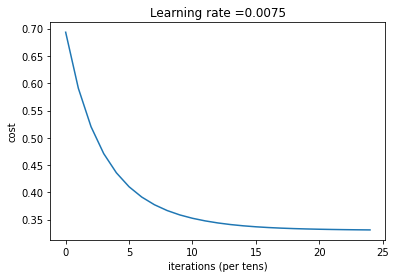

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 1, 25, 1]
Cost after iteration 0: 0.688642
Cost after iteration 100: 0.515976
Cost after iteration 200: 0.390215
Cost after iteration 300: 0.343614
Cost after iteration 400: 0.334059
Cost after iteration 500: 0.332103
Cost after iteration 600: 0.331347
Cost after iteration 700: 0.330808
Cost after iteration 800: 0.330381
Cost after iteration 900: 0.329979
Cost after iteration 1000: 0.329604
Cost after iteration 1100: 0.329215
Cost after iteration 1200: 0.328844
Cost after iteration 1300: 0.328480
Cost after iteration 1400: 0.328104
Cost after iteration 1500: 0.327735
Cost after iteration 1600: 0.327373
Cost after iteration 1700: 0.327037
Cost after iteration 1800: 0.326723
Cost after iteration 1900: 0.326416
Cost after iteration 2000: 0.326114
Cost after iteration 2100: 0.325809
Cost after iteration 2200: 0.325496
Cost after iteration 2300: 0.325176
Cost after i

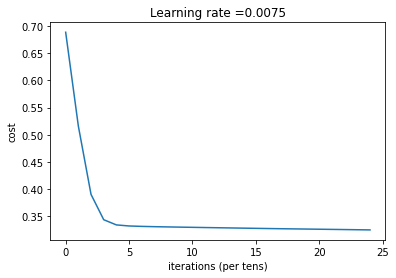

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 1, 25, 1]
Cost after iteration 0: 0.690835
Cost after iteration 100: 0.530506
Cost after iteration 200: 0.423674
Cost after iteration 300: 0.361457
Cost after iteration 400: 0.337636
Cost after iteration 500: 0.331070
Cost after iteration 600: 0.329384
Cost after iteration 700: 0.328830
Cost after iteration 800: 0.328517
Cost after iteration 900: 0.328240
Cost after iteration 1000: 0.327948
Cost after iteration 1100: 0.327594
Cost after iteration 1200: 0.327229
Cost after iteration 1300: 0.326873
Cost after iteration 1400: 0.326563
Cost after iteration 1500: 0.326271
Cost after iteration 1600: 0.325975
Cost after iteration 1700: 0.325669
Cost after iteration 1800: 0.325349
Cost after iteration 1900: 0.325017
Cost after iteration 2000: 0.324669
Cost after iteration 2100: 0.324305
Cost after iteration 2200: 0.323923
Cost after iteration 2300: 0.323520
Cost after i

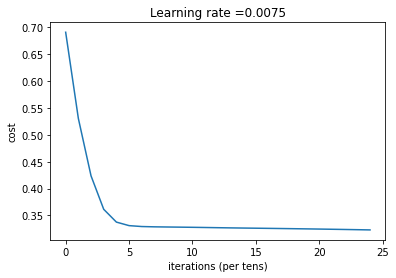

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 1, 25, 1]
Cost after iteration 0: 0.692396
Cost after iteration 100: 0.551821
Cost after iteration 200: 0.443773
Cost after iteration 300: 0.371977
Cost after iteration 400: 0.341511
Cost after iteration 500: 0.332355
Cost after iteration 600: 0.329758
Cost after iteration 700: 0.328865
Cost after iteration 800: 0.328391
Cost after iteration 900: 0.328019
Cost after iteration 1000: 0.327685
Cost after iteration 1100: 0.327386
Cost after iteration 1200: 0.327108
Cost after iteration 1300: 0.326839
Cost after iteration 1400: 0.326575
Cost after iteration 1500: 0.326311
Cost after iteration 1600: 0.326044
Cost after iteration 1700: 0.325772
Cost after iteration 1800: 0.325493
Cost after iteration 1900: 0.325206
Cost after iteration 2000: 0.324908
Cost after iteration 2100: 0.324600
Cost after iteration 2200: 0.324280
Cost after iteration 2300: 0.323947
Cost after i

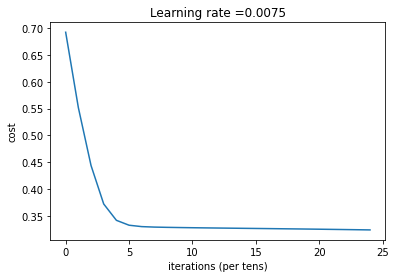

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 9, 25, 1]
Cost after iteration 0: 0.693208
Cost after iteration 100: 0.568105
Cost after iteration 200: 0.482934
Cost after iteration 300: 0.424634
Cost after iteration 400: 0.386052
Cost after iteration 500: 0.362044
Cost after iteration 600: 0.348020
Cost after iteration 700: 0.340231
Cost after iteration 800: 0.336059
Cost after iteration 900: 0.333877
Cost after iteration 1000: 0.332752
Cost after iteration 1100: 0.332170
Cost after iteration 1200: 0.331832
Cost after iteration 1300: 0.331218
Cost after iteration 1400: 0.329772
Cost after iteration 1500: 0.329205
Cost after iteration 1600: 0.328809
Cost after iteration 1700: 0.328497
Cost after iteration 1800: 0.328217
Cost after iteration 1900: 0.327947
Cost after iteration 2000: 0.327676
Cost after iteration 2100: 0.327403
Cost after iteration 2200: 0.327123
Cost after iteration 2300: 0.326836
Cost after it

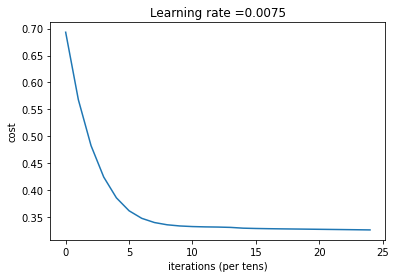

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 9, 25, 1]
Cost after iteration 0: 0.693855
Cost after iteration 100: 0.528983
Cost after iteration 200: 0.435406
Cost after iteration 300: 0.384695
Cost after iteration 400: 0.358089
Cost after iteration 500: 0.344512
Cost after iteration 600: 0.337707
Cost after iteration 700: 0.334317
Cost after iteration 800: 0.332621
Cost after iteration 900: 0.331756
Cost after iteration 1000: 0.331303
Cost after iteration 1100: 0.331060
Cost after iteration 1200: 0.330924
Cost after iteration 1300: 0.330838
Cost after iteration 1400: 0.330769
Cost after iteration 1500: 0.330675
Cost after iteration 1600: 0.330544
Cost after iteration 1700: 0.330389
Cost after iteration 1800: 0.330298
Cost after iteration 1900: 0.330248
Cost after iteration 2000: 0.330205
Cost after iteration 2100: 0.330164
Cost after iteration 2200: 0.330123
Cost after iteration 2300: 0.330083
Cost after it

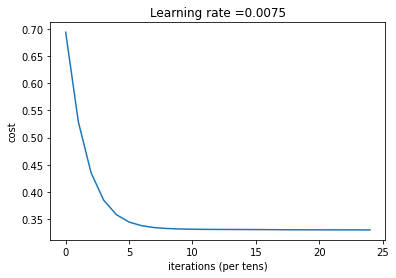

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 9, 25, 1]
Cost after iteration 0: 0.689537
Cost after iteration 100: 0.470751
Cost after iteration 200: 0.378307
Cost after iteration 300: 0.345962
Cost after iteration 400: 0.335970
Cost after iteration 500: 0.332981
Cost after iteration 600: 0.331903
Cost after iteration 700: 0.331386
Cost after iteration 800: 0.331064
Cost after iteration 900: 0.330853
Cost after iteration 1000: 0.330710
Cost after iteration 1100: 0.330590
Cost after iteration 1200: 0.330473
Cost after iteration 1300: 0.330357
Cost after iteration 1400: 0.330238
Cost after iteration 1500: 0.330113
Cost after iteration 1600: 0.329983
Cost after iteration 1700: 0.329841
Cost after iteration 1800: 0.329680
Cost after iteration 1900: 0.329519
Cost after iteration 2000: 0.329359
Cost after iteration 2100: 0.329201
Cost after iteration 2200: 0.329059
Cost after iteration 2300: 0.328921
Cost after i

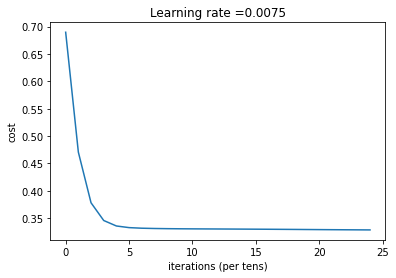

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 9, 25, 1]
Cost after iteration 0: 0.696727
Cost after iteration 100: 0.571511
Cost after iteration 200: 0.490214
Cost after iteration 300: 0.434488
Cost after iteration 400: 0.396531
Cost after iteration 500: 0.371380
Cost after iteration 600: 0.355254
Cost after iteration 700: 0.345188
Cost after iteration 800: 0.339044
Cost after iteration 900: 0.335361
Cost after iteration 1000: 0.333194
Cost after iteration 1100: 0.331932
Cost after iteration 1200: 0.331185
Cost after iteration 1300: 0.330738
Cost after iteration 1400: 0.330462
Cost after iteration 1500: 0.330286
Cost after iteration 1600: 0.330165
Cost after iteration 1700: 0.330074
Cost after iteration 1800: 0.330001
Cost after iteration 1900: 0.329937
Cost after iteration 2000: 0.329878
Cost after iteration 2100: 0.329822
Cost after iteration 2200: 0.329768
Cost after iteration 2300: 0.329715
Cost after i

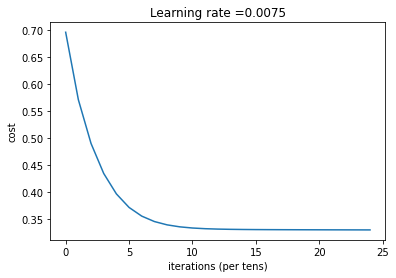

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 9, 25, 1]
Cost after iteration 0: 0.693799
Cost after iteration 100: 0.571130
Cost after iteration 200: 0.489910
Cost after iteration 300: 0.434499
Cost after iteration 400: 0.396865
Cost after iteration 500: 0.371887
Cost after iteration 600: 0.355811
Cost after iteration 700: 0.345757
Cost after iteration 800: 0.339617
Cost after iteration 900: 0.335918
Cost after iteration 1000: 0.333670
Cost after iteration 1100: 0.332286
Cost after iteration 1200: 0.331476
Cost after iteration 1300: 0.330984
Cost after iteration 1400: 0.330654
Cost after iteration 1500: 0.330390
Cost after iteration 1600: 0.330199
Cost after iteration 1700: 0.330069
Cost after iteration 1800: 0.329964
Cost after iteration 1900: 0.329865
Cost after iteration 2000: 0.329746
Cost after iteration 2100: 0.329635
Cost after iteration 2200: 0.329538
Cost after iteration 2300: 0.329450
Cost after i

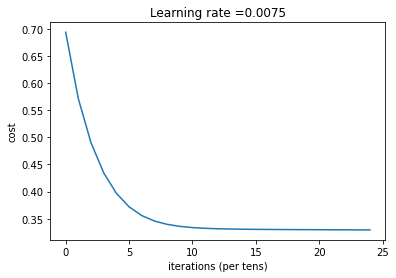

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 9, 25, 1]
Cost after iteration 0: 0.687812
Cost after iteration 100: 0.493742
Cost after iteration 200: 0.396121
Cost after iteration 300: 0.353847
Cost after iteration 400: 0.338196
Cost after iteration 500: 0.332831
Cost after iteration 600: 0.330959
Cost after iteration 700: 0.330206
Cost after iteration 800: 0.329810
Cost after iteration 900: 0.329524
Cost after iteration 1000: 0.329275
Cost after iteration 1100: 0.329030
Cost after iteration 1200: 0.328780
Cost after iteration 1300: 0.328552
Cost after iteration 1400: 0.328342
Cost after iteration 1500: 0.328144
Cost after iteration 1600: 0.327959
Cost after iteration 1700: 0.327776
Cost after iteration 1800: 0.327596
Cost after iteration 1900: 0.327414
Cost after iteration 2000: 0.327231
Cost after iteration 2100: 0.327043
Cost after iteration 2200: 0.326855
Cost after iteration 2300: 0.326665
Cost after i

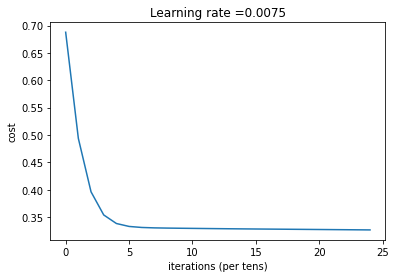

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 9, 25, 1]
Cost after iteration 0: 0.692378
Cost after iteration 100: 0.563462
Cost after iteration 200: 0.480040
Cost after iteration 300: 0.424790
Cost after iteration 400: 0.388612
Cost after iteration 500: 0.365526
Cost after iteration 600: 0.351217
Cost after iteration 700: 0.342574
Cost after iteration 800: 0.337450
Cost after iteration 900: 0.334448
Cost after iteration 1000: 0.332699
Cost after iteration 1100: 0.331681
Cost after iteration 1200: 0.331083
Cost after iteration 1300: 0.330723
Cost after iteration 1400: 0.330496
Cost after iteration 1500: 0.330342
Cost after iteration 1600: 0.330229
Cost after iteration 1700: 0.330136
Cost after iteration 1800: 0.330058
Cost after iteration 1900: 0.329987
Cost after iteration 2000: 0.329919
Cost after iteration 2100: 0.329854
Cost after iteration 2200: 0.329790
Cost after iteration 2300: 0.329726
Cost after i

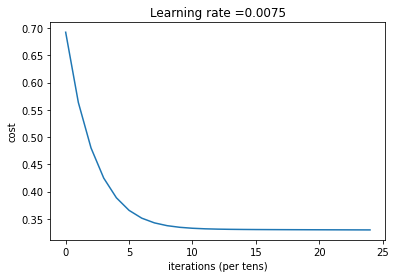

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 9, 25, 1]
Cost after iteration 0: 0.702469
Cost after iteration 100: 0.564762
Cost after iteration 200: 0.476187
Cost after iteration 300: 0.415559
Cost after iteration 400: 0.376732
Cost after iteration 500: 0.354213
Cost after iteration 600: 0.342279
Cost after iteration 700: 0.336378
Cost after iteration 800: 0.333538
Cost after iteration 900: 0.332127
Cost after iteration 1000: 0.331346
Cost after iteration 1100: 0.330927
Cost after iteration 1200: 0.330678
Cost after iteration 1300: 0.330493
Cost after iteration 1400: 0.330327
Cost after iteration 1500: 0.330138
Cost after iteration 1600: 0.329944
Cost after iteration 1700: 0.329780
Cost after iteration 1800: 0.329634
Cost after iteration 1900: 0.329496
Cost after iteration 2000: 0.329359
Cost after iteration 2100: 0.329224
Cost after iteration 2200: 0.329097
Cost after iteration 2300: 0.328975
Cost after i

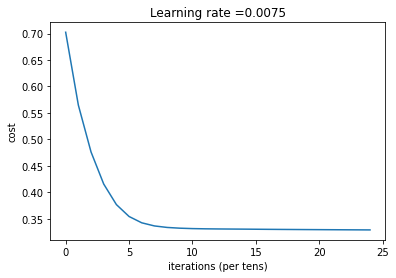

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 17, 25, 1]
Cost after iteration 0: 0.693260
Cost after iteration 100: 0.584318
Cost after iteration 200: 0.510593
Cost after iteration 300: 0.459537
Cost after iteration 400: 0.423575
Cost after iteration 500: 0.397701
Cost after iteration 600: 0.379063
Cost after iteration 700: 0.365678
Cost after iteration 800: 0.356051
Cost after iteration 900: 0.349129
Cost after iteration 1000: 0.344157
Cost after iteration 1100: 0.340589
Cost after iteration 1200: 0.338032
Cost after iteration 1300: 0.336200
Cost after iteration 1400: 0.334889
Cost after iteration 1500: 0.333952
Cost after iteration 1600: 0.333282
Cost after iteration 1700: 0.332803
Cost after iteration 1800: 0.332461
Cost after iteration 1900: 0.332217
Cost after iteration 2000: 0.332043
Cost after iteration 2100: 0.331918
Cost after iteration 2200: 0.331830
Cost after iteration 2300: 0.331766
Cost after i

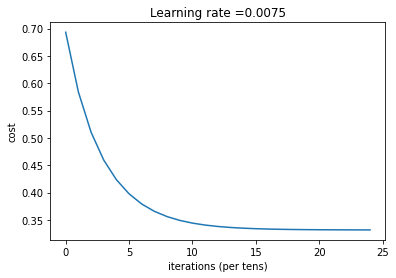

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 17, 25, 1]
Cost after iteration 0: 0.684193
Cost after iteration 100: 0.517670
Cost after iteration 200: 0.418030
Cost after iteration 300: 0.366138
Cost after iteration 400: 0.343806
Cost after iteration 500: 0.335392
Cost after iteration 600: 0.332360
Cost after iteration 700: 0.331202
Cost after iteration 800: 0.330686
Cost after iteration 900: 0.330434
Cost after iteration 1000: 0.330279
Cost after iteration 1100: 0.330159
Cost after iteration 1200: 0.330055
Cost after iteration 1300: 0.329956
Cost after iteration 1400: 0.329859
Cost after iteration 1500: 0.329762
Cost after iteration 1600: 0.329665
Cost after iteration 1700: 0.329567
Cost after iteration 1800: 0.329468
Cost after iteration 1900: 0.329367
Cost after iteration 2000: 0.329265
Cost after iteration 2100: 0.329162
Cost after iteration 2200: 0.329057
Cost after iteration 2300: 0.328951
Cost after i

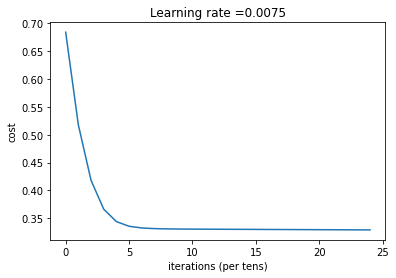

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 17, 25, 1]
Cost after iteration 0: 0.694804
Cost after iteration 100: 0.521686
Cost after iteration 200: 0.420384
Cost after iteration 300: 0.367483
Cost after iteration 400: 0.344717
Cost after iteration 500: 0.336218
Cost after iteration 600: 0.333240
Cost after iteration 700: 0.332189
Cost after iteration 800: 0.331779
Cost after iteration 900: 0.331577
Cost after iteration 1000: 0.331438
Cost after iteration 1100: 0.331318
Cost after iteration 1200: 0.331203
Cost after iteration 1300: 0.331080
Cost after iteration 1400: 0.330945
Cost after iteration 1500: 0.330816
Cost after iteration 1600: 0.330689
Cost after iteration 1700: 0.330569
Cost after iteration 1800: 0.330465
Cost after iteration 1900: 0.330366
Cost after iteration 2000: 0.330273
Cost after iteration 2100: 0.330181
Cost after iteration 2200: 0.330089
Cost after iteration 2300: 0.329997
Cost after 

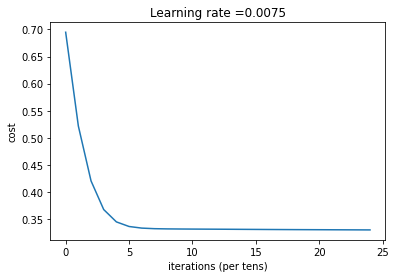

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 17, 25, 1]
Cost after iteration 0: 0.691009
Cost after iteration 100: 0.541352
Cost after iteration 200: 0.438735
Cost after iteration 300: 0.379860
Cost after iteration 400: 0.350963
Cost after iteration 500: 0.338128
Cost after iteration 600: 0.332759
Cost after iteration 700: 0.330538
Cost after iteration 800: 0.329573
Cost after iteration 900: 0.329093
Cost after iteration 1000: 0.328795
Cost after iteration 1100: 0.328575
Cost after iteration 1200: 0.328387
Cost after iteration 1300: 0.328215
Cost after iteration 1400: 0.328055
Cost after iteration 1500: 0.327907
Cost after iteration 1600: 0.327764
Cost after iteration 1700: 0.327625
Cost after iteration 1800: 0.327486
Cost after iteration 1900: 0.327345
Cost after iteration 2000: 0.327197
Cost after iteration 2100: 0.327036
Cost after iteration 2200: 0.326821
Cost after iteration 2300: 0.326572
Cost after 

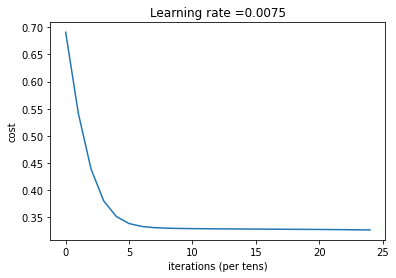

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 17, 25, 1]
Cost after iteration 0: 0.693002
Cost after iteration 100: 0.571880
Cost after iteration 200: 0.490823
Cost after iteration 300: 0.434832
Cost after iteration 400: 0.396350
Cost after iteration 500: 0.370719
Cost after iteration 600: 0.354406
Cost after iteration 700: 0.344501
Cost after iteration 800: 0.338727
Cost after iteration 900: 0.335465
Cost after iteration 1000: 0.333656
Cost after iteration 1100: 0.332658
Cost after iteration 1200: 0.332102
Cost after iteration 1300: 0.331784
Cost after iteration 1400: 0.331593
Cost after iteration 1500: 0.331470
Cost after iteration 1600: 0.331381
Cost after iteration 1700: 0.331312
Cost after iteration 1800: 0.331255
Cost after iteration 1900: 0.331203
Cost after iteration 2000: 0.331154
Cost after iteration 2100: 0.331107
Cost after iteration 2200: 0.331060
Cost after iteration 2300: 0.331014
Cost after 

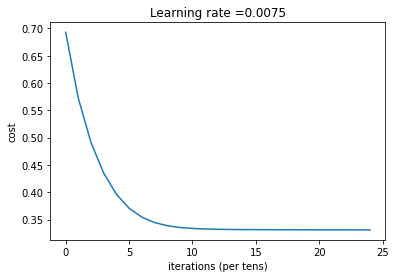

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 17, 25, 1]
Cost after iteration 0: 0.691681
Cost after iteration 100: 0.560773
Cost after iteration 200: 0.470306
Cost after iteration 300: 0.410785
Cost after iteration 400: 0.373233
Cost after iteration 500: 0.351795
Cost after iteration 600: 0.340897
Cost after iteration 700: 0.335634
Cost after iteration 800: 0.333144
Cost after iteration 900: 0.331950
Cost after iteration 1000: 0.331349
Cost after iteration 1100: 0.331011
Cost after iteration 1200: 0.330767
Cost after iteration 1300: 0.330567
Cost after iteration 1400: 0.330420
Cost after iteration 1500: 0.330303
Cost after iteration 1600: 0.330198
Cost after iteration 1700: 0.330100
Cost after iteration 1800: 0.330005
Cost after iteration 1900: 0.329910
Cost after iteration 2000: 0.329816
Cost after iteration 2100: 0.329722
Cost after iteration 2200: 0.329626
Cost after iteration 2300: 0.329530
Cost after 

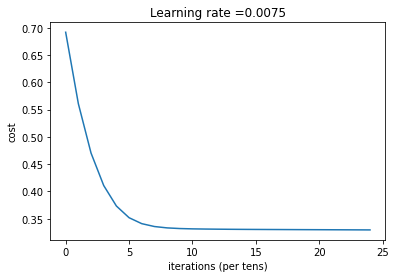

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 17, 25, 1]
Cost after iteration 0: 0.697508
Cost after iteration 100: 0.496133
Cost after iteration 200: 0.399624
Cost after iteration 300: 0.357540
Cost after iteration 400: 0.340850
Cost after iteration 500: 0.334540
Cost after iteration 600: 0.332084
Cost after iteration 700: 0.331039
Cost after iteration 800: 0.330497
Cost after iteration 900: 0.330125
Cost after iteration 1000: 0.329808
Cost after iteration 1100: 0.329530
Cost after iteration 1200: 0.329300
Cost after iteration 1300: 0.329120
Cost after iteration 1400: 0.328962
Cost after iteration 1500: 0.328816
Cost after iteration 1600: 0.328675
Cost after iteration 1700: 0.328535
Cost after iteration 1800: 0.328396
Cost after iteration 1900: 0.328258
Cost after iteration 2000: 0.328117
Cost after iteration 2100: 0.327975
Cost after iteration 2200: 0.327831
Cost after iteration 2300: 0.327684
Cost after 

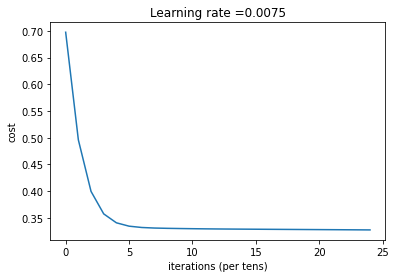

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 17, 25, 1]
Cost after iteration 0: 0.695804
Cost after iteration 100: 0.573092
Cost after iteration 200: 0.491523
Cost after iteration 300: 0.435715
Cost after iteration 400: 0.397620
Cost after iteration 500: 0.372215
Cost after iteration 600: 0.355894
Cost after iteration 700: 0.345807
Cost after iteration 800: 0.339773
Cost after iteration 900: 0.336248
Cost after iteration 1000: 0.334216
Cost after iteration 1100: 0.333046
Cost after iteration 1200: 0.332361
Cost after iteration 1300: 0.331950
Cost after iteration 1400: 0.331692
Cost after iteration 1500: 0.331521
Cost after iteration 1600: 0.331397
Cost after iteration 1700: 0.331302
Cost after iteration 1800: 0.331221
Cost after iteration 1900: 0.331151
Cost after iteration 2000: 0.331086
Cost after iteration 2100: 0.331025
Cost after iteration 2200: 0.330965
Cost after iteration 2300: 0.330905
Cost after 

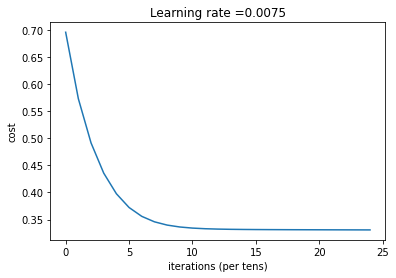

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 25, 25, 1]
Cost after iteration 0: 0.693218
Cost after iteration 100: 0.536861
Cost after iteration 200: 0.446951
Cost after iteration 300: 0.395074
Cost after iteration 400: 0.365883
Cost after iteration 500: 0.349886
Cost after iteration 600: 0.341283
Cost after iteration 700: 0.336709
Cost after iteration 800: 0.334292
Cost after iteration 900: 0.333019
Cost after iteration 1000: 0.332350
Cost after iteration 1100: 0.331998
Cost after iteration 1200: 0.331813
Cost after iteration 1300: 0.331716
Cost after iteration 1400: 0.331665
Cost after iteration 1500: 0.331638
Cost after iteration 1600: 0.331624
Cost after iteration 1700: 0.331617
Cost after iteration 1800: 0.331613
Cost after iteration 1900: 0.331611
Cost after iteration 2000: 0.331610
Cost after iteration 2100: 0.331609
Cost after iteration 2200: 0.331609
Cost after iteration 2300: 0.331609
Cost after i

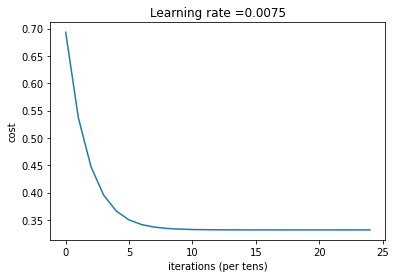

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 25, 25, 1]
Cost after iteration 0: 0.699974
Cost after iteration 100: 0.571772
Cost after iteration 200: 0.486989
Cost after iteration 300: 0.429936
Cost after iteration 400: 0.391737
Cost after iteration 500: 0.366981
Cost after iteration 600: 0.351614
Cost after iteration 700: 0.342464
Cost after iteration 800: 0.337191
Cost after iteration 900: 0.334225
Cost after iteration 1000: 0.332579
Cost after iteration 1100: 0.331667
Cost after iteration 1200: 0.331154
Cost after iteration 1300: 0.330858
Cost after iteration 1400: 0.330675
Cost after iteration 1500: 0.330551
Cost after iteration 1600: 0.330458
Cost after iteration 1700: 0.330383
Cost after iteration 1800: 0.330320
Cost after iteration 1900: 0.330265
Cost after iteration 2000: 0.330216
Cost after iteration 2100: 0.330169
Cost after iteration 2200: 0.330123
Cost after iteration 2300: 0.330079
Cost after i

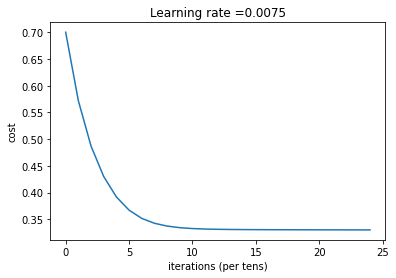

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 25, 25, 1]
Cost after iteration 0: 0.693654
Cost after iteration 100: 0.548085
Cost after iteration 200: 0.452244
Cost after iteration 300: 0.392202
Cost after iteration 400: 0.358869
Cost after iteration 500: 0.342795
Cost after iteration 600: 0.335803
Cost after iteration 700: 0.332880
Cost after iteration 800: 0.331523
Cost after iteration 900: 0.330767
Cost after iteration 1000: 0.330454
Cost after iteration 1100: 0.330271
Cost after iteration 1200: 0.330139
Cost after iteration 1300: 0.330030
Cost after iteration 1400: 0.329930
Cost after iteration 1500: 0.329834
Cost after iteration 1600: 0.329739
Cost after iteration 1700: 0.329645
Cost after iteration 1800: 0.329550
Cost after iteration 1900: 0.329455
Cost after iteration 2000: 0.329359
Cost after iteration 2100: 0.329262
Cost after iteration 2200: 0.329162
Cost after iteration 2300: 0.329062
Cost after 

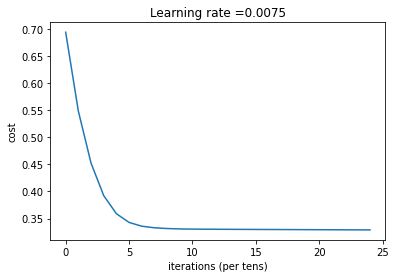

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 25, 25, 1]
Cost after iteration 0: 0.696292
Cost after iteration 100: 0.569430
Cost after iteration 200: 0.483943
Cost after iteration 300: 0.424142
Cost after iteration 400: 0.384137
Cost after iteration 500: 0.359507
Cost after iteration 600: 0.345601
Cost after iteration 700: 0.338287
Cost after iteration 800: 0.334615
Cost after iteration 900: 0.332808
Cost after iteration 1000: 0.331912
Cost after iteration 1100: 0.331446
Cost after iteration 1200: 0.331186
Cost after iteration 1300: 0.331019
Cost after iteration 1400: 0.330896
Cost after iteration 1500: 0.330794
Cost after iteration 1600: 0.330707
Cost after iteration 1700: 0.330626
Cost after iteration 1800: 0.330552
Cost after iteration 1900: 0.330482
Cost after iteration 2000: 0.330414
Cost after iteration 2100: 0.330349
Cost after iteration 2200: 0.330286
Cost after iteration 2300: 0.330225
Cost after 

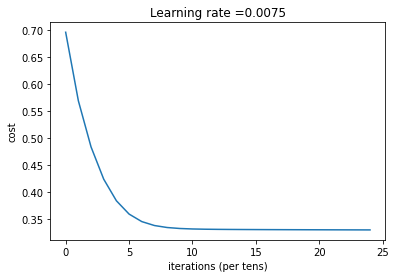

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 25, 25, 1]
Cost after iteration 0: 0.691536
Cost after iteration 100: 0.554673
Cost after iteration 200: 0.464045
Cost after iteration 300: 0.400452
Cost after iteration 400: 0.362990
Cost after iteration 500: 0.344479
Cost after iteration 600: 0.335820
Cost after iteration 700: 0.332066
Cost after iteration 800: 0.330380
Cost after iteration 900: 0.329548
Cost after iteration 1000: 0.329059
Cost after iteration 1100: 0.328719
Cost after iteration 1200: 0.328450
Cost after iteration 1300: 0.328219
Cost after iteration 1400: 0.328012
Cost after iteration 1500: 0.327818
Cost after iteration 1600: 0.327633
Cost after iteration 1700: 0.327452
Cost after iteration 1800: 0.327273
Cost after iteration 1900: 0.327092
Cost after iteration 2000: 0.326909
Cost after iteration 2100: 0.326723
Cost after iteration 2200: 0.326531
Cost after iteration 2300: 0.326333
Cost after 

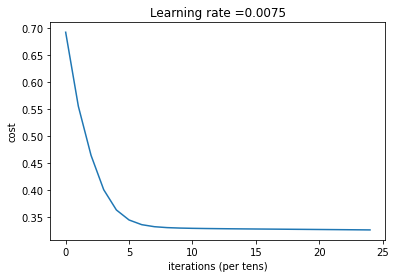

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 25, 25, 1]
Cost after iteration 0: 0.693007
Cost after iteration 100: 0.567760
Cost after iteration 200: 0.483204
Cost after iteration 300: 0.425215
Cost after iteration 400: 0.386387
Cost after iteration 500: 0.362145
Cost after iteration 600: 0.347894
Cost after iteration 700: 0.339935
Cost after iteration 800: 0.335643
Cost after iteration 900: 0.333364
Cost after iteration 1000: 0.332142
Cost after iteration 1100: 0.331451
Cost after iteration 1200: 0.331039
Cost after iteration 1300: 0.330775
Cost after iteration 1400: 0.330585
Cost after iteration 1500: 0.330434
Cost after iteration 1600: 0.330303
Cost after iteration 1700: 0.330176
Cost after iteration 1800: 0.330042
Cost after iteration 1900: 0.329872
Cost after iteration 2000: 0.329732
Cost after iteration 2100: 0.329614
Cost after iteration 2200: 0.329508
Cost after iteration 2300: 0.329410
Cost after 

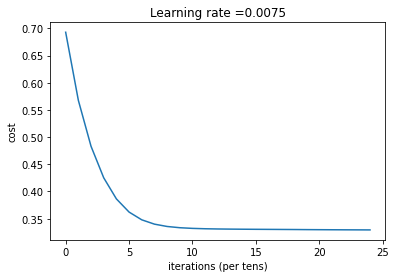

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 25, 25, 1]
Cost after iteration 0: 0.701547
Cost after iteration 100: 0.580876
Cost after iteration 200: 0.501391
Cost after iteration 300: 0.444961
Cost after iteration 400: 0.404564
Cost after iteration 500: 0.376797
Cost after iteration 600: 0.358406
Cost after iteration 700: 0.346712
Cost after iteration 800: 0.339537
Cost after iteration 900: 0.335209
Cost after iteration 1000: 0.332535
Cost after iteration 1100: 0.330948
Cost after iteration 1200: 0.330041
Cost after iteration 1300: 0.329489
Cost after iteration 1400: 0.329130
Cost after iteration 1500: 0.328876
Cost after iteration 1600: 0.328678
Cost after iteration 1700: 0.328512
Cost after iteration 1800: 0.328362
Cost after iteration 1900: 0.328221
Cost after iteration 2000: 0.328086
Cost after iteration 2100: 0.327955
Cost after iteration 2200: 0.327825
Cost after iteration 2300: 0.327694
Cost after 

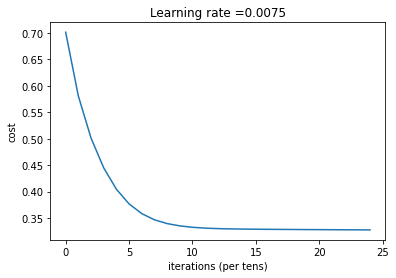

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 25, 25, 1]
Cost after iteration 0: 0.685987
Cost after iteration 100: 0.513355
Cost after iteration 200: 0.412209
Cost after iteration 300: 0.361438
Cost after iteration 400: 0.340955
Cost after iteration 500: 0.333745
Cost after iteration 600: 0.331262
Cost after iteration 700: 0.330293
Cost after iteration 800: 0.329779
Cost after iteration 900: 0.329409
Cost after iteration 1000: 0.329101
Cost after iteration 1100: 0.328820
Cost after iteration 1200: 0.328527
Cost after iteration 1300: 0.328211
Cost after iteration 1400: 0.327911
Cost after iteration 1500: 0.327636
Cost after iteration 1600: 0.327380
Cost after iteration 1700: 0.327135
Cost after iteration 1800: 0.326894
Cost after iteration 1900: 0.326655
Cost after iteration 2000: 0.326416
Cost after iteration 2100: 0.326173
Cost after iteration 2200: 0.325923
Cost after iteration 2300: 0.325665
Cost after 

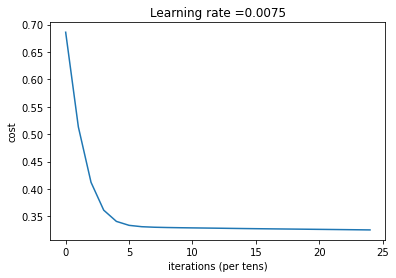

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 33, 25, 1]
Cost after iteration 0: 0.693183
Cost after iteration 100: 0.564311
Cost after iteration 200: 0.480616
Cost after iteration 300: 0.421881
Cost after iteration 400: 0.380902
Cost after iteration 500: 0.355603
Cost after iteration 600: 0.341474
Cost after iteration 700: 0.334310
Cost after iteration 800: 0.330834
Cost after iteration 900: 0.329117
Cost after iteration 1000: 0.328202
Cost after iteration 1100: 0.327635
Cost after iteration 1200: 0.327212
Cost after iteration 1300: 0.326843
Cost after iteration 1400: 0.326490
Cost after iteration 1500: 0.326136
Cost after iteration 1600: 0.325773
Cost after iteration 1700: 0.325398
Cost after iteration 1800: 0.325006
Cost after iteration 1900: 0.324595
Cost after iteration 2000: 0.324164
Cost after iteration 2100: 0.323712
Cost after iteration 2200: 0.323238
Cost after iteration 2300: 0.322739
Cost after i

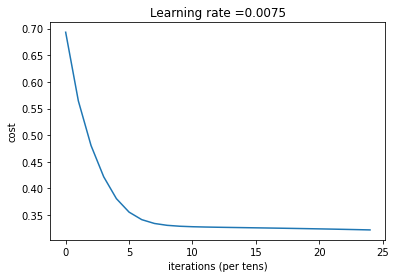

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 33, 25, 1]
Cost after iteration 0: 0.691655
Cost after iteration 100: 0.492469
Cost after iteration 200: 0.393285
Cost after iteration 300: 0.352142
Cost after iteration 400: 0.337949
Cost after iteration 500: 0.333521
Cost after iteration 600: 0.332156
Cost after iteration 700: 0.331692
Cost after iteration 800: 0.331486
Cost after iteration 900: 0.331351
Cost after iteration 1000: 0.331237
Cost after iteration 1100: 0.331127
Cost after iteration 1200: 0.331020
Cost after iteration 1300: 0.330915
Cost after iteration 1400: 0.330809
Cost after iteration 1500: 0.330705
Cost after iteration 1600: 0.330601
Cost after iteration 1700: 0.330498
Cost after iteration 1800: 0.330394
Cost after iteration 1900: 0.330290
Cost after iteration 2000: 0.330185
Cost after iteration 2100: 0.330080
Cost after iteration 2200: 0.329973
Cost after iteration 2300: 0.329865
Cost after i

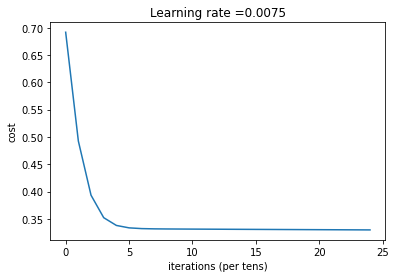

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 33, 25, 1]
Cost after iteration 0: 0.695776
Cost after iteration 100: 0.572053
Cost after iteration 200: 0.489423
Cost after iteration 300: 0.431956
Cost after iteration 400: 0.392700
Cost after iteration 500: 0.366975
Cost after iteration 600: 0.351314
Cost after iteration 700: 0.342237
Cost after iteration 800: 0.337172
Cost after iteration 900: 0.334401
Cost after iteration 1000: 0.332883
Cost after iteration 1100: 0.332042
Cost after iteration 1200: 0.331558
Cost after iteration 1300: 0.331264
Cost after iteration 1400: 0.331077
Cost after iteration 1500: 0.330949
Cost after iteration 1600: 0.330849
Cost after iteration 1700: 0.330764
Cost after iteration 1800: 0.330688
Cost after iteration 1900: 0.330617
Cost after iteration 2000: 0.330548
Cost after iteration 2100: 0.330481
Cost after iteration 2200: 0.330414
Cost after iteration 2300: 0.330347
Cost after 

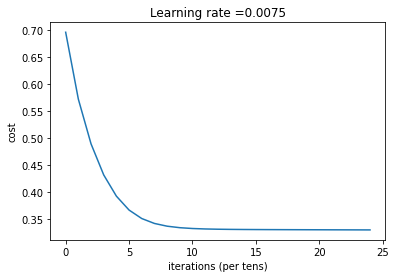

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 33, 25, 1]
Cost after iteration 0: 0.697095
Cost after iteration 100: 0.549187
Cost after iteration 200: 0.454856
Cost after iteration 300: 0.397024
Cost after iteration 400: 0.363780
Cost after iteration 500: 0.346096
Cost after iteration 600: 0.337225
Cost after iteration 700: 0.332904
Cost after iteration 800: 0.330795
Cost after iteration 900: 0.329725
Cost after iteration 1000: 0.329170
Cost after iteration 1100: 0.328861
Cost after iteration 1200: 0.328663
Cost after iteration 1300: 0.328518
Cost after iteration 1400: 0.328396
Cost after iteration 1500: 0.328286
Cost after iteration 1600: 0.328181
Cost after iteration 1700: 0.328079
Cost after iteration 1800: 0.327978
Cost after iteration 1900: 0.327876
Cost after iteration 2000: 0.327772
Cost after iteration 2100: 0.327662
Cost after iteration 2200: 0.327543
Cost after iteration 2300: 0.327422
Cost after 

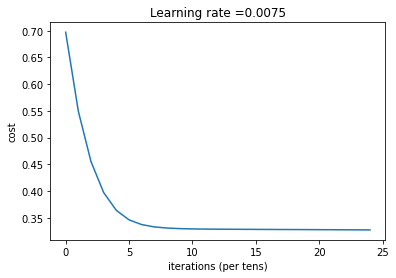

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 33, 25, 1]
Cost after iteration 0: 0.694762
Cost after iteration 100: 0.587434
Cost after iteration 200: 0.514838
Cost after iteration 300: 0.463810
Cost after iteration 400: 0.427224
Cost after iteration 500: 0.400644
Cost after iteration 600: 0.381181
Cost after iteration 700: 0.366860
Cost after iteration 800: 0.356355
Cost after iteration 900: 0.348724
Cost after iteration 1000: 0.343260
Cost after iteration 1100: 0.339418
Cost after iteration 1200: 0.336772
Cost after iteration 1300: 0.334970
Cost after iteration 1400: 0.333757
Cost after iteration 1500: 0.332943
Cost after iteration 1600: 0.332394
Cost after iteration 1700: 0.332023
Cost after iteration 1800: 0.331767
Cost after iteration 1900: 0.331586
Cost after iteration 2000: 0.331453
Cost after iteration 2100: 0.331352
Cost after iteration 2200: 0.331272
Cost after iteration 2300: 0.331205
Cost after 

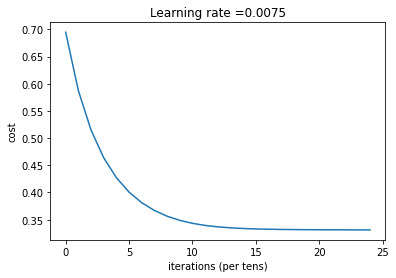

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 33, 25, 1]
Cost after iteration 0: 0.690376
Cost after iteration 100: 0.535726
Cost after iteration 200: 0.440821
Cost after iteration 300: 0.384353
Cost after iteration 400: 0.354889
Cost after iteration 500: 0.341476
Cost after iteration 600: 0.335777
Cost after iteration 700: 0.333385
Cost after iteration 800: 0.332320
Cost after iteration 900: 0.331764
Cost after iteration 1000: 0.331419
Cost after iteration 1100: 0.331168
Cost after iteration 1200: 0.330965
Cost after iteration 1300: 0.330785
Cost after iteration 1400: 0.330614
Cost after iteration 1500: 0.330450
Cost after iteration 1600: 0.330287
Cost after iteration 1700: 0.330120
Cost after iteration 1800: 0.329942
Cost after iteration 1900: 0.329685
Cost after iteration 2000: 0.329470
Cost after iteration 2100: 0.329288
Cost after iteration 2200: 0.329117
Cost after iteration 2300: 0.328949
Cost after 

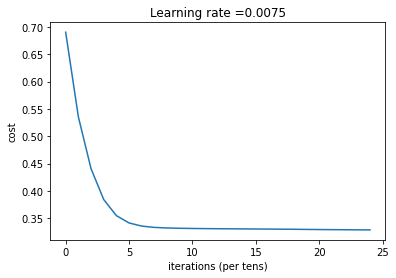

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 33, 25, 1]
Cost after iteration 0: 0.698381
Cost after iteration 100: 0.523124
Cost after iteration 200: 0.425360
Cost after iteration 300: 0.373270
Cost after iteration 400: 0.348241
Cost after iteration 500: 0.337138
Cost after iteration 600: 0.332369
Cost after iteration 700: 0.330283
Cost after iteration 800: 0.329320
Cost after iteration 900: 0.328804
Cost after iteration 1000: 0.328477
Cost after iteration 1100: 0.328234
Cost after iteration 1200: 0.328027
Cost after iteration 1300: 0.327835
Cost after iteration 1400: 0.327645
Cost after iteration 1500: 0.327450
Cost after iteration 1600: 0.327250
Cost after iteration 1700: 0.327040
Cost after iteration 1800: 0.326814
Cost after iteration 1900: 0.326568
Cost after iteration 2000: 0.326322
Cost after iteration 2100: 0.326075
Cost after iteration 2200: 0.325829
Cost after iteration 2300: 0.325579
Cost after 

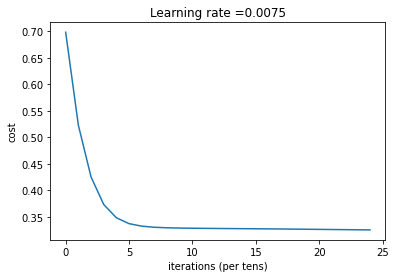

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 33, 25, 1]
Cost after iteration 0: 0.694282
Cost after iteration 100: 0.563522
Cost after iteration 200: 0.475366
Cost after iteration 300: 0.414688
Cost after iteration 400: 0.375608
Cost after iteration 500: 0.352874
Cost after iteration 600: 0.340878
Cost after iteration 700: 0.334985
Cost after iteration 800: 0.332197
Cost after iteration 900: 0.330883
Cost after iteration 1000: 0.330234
Cost after iteration 1100: 0.329878
Cost after iteration 1200: 0.329650
Cost after iteration 1300: 0.329472
Cost after iteration 1400: 0.329314
Cost after iteration 1500: 0.329168
Cost after iteration 1600: 0.329027
Cost after iteration 1700: 0.328889
Cost after iteration 1800: 0.328746
Cost after iteration 1900: 0.328595
Cost after iteration 2000: 0.328436
Cost after iteration 2100: 0.328295
Cost after iteration 2200: 0.328166
Cost after iteration 2300: 0.328037
Cost after 

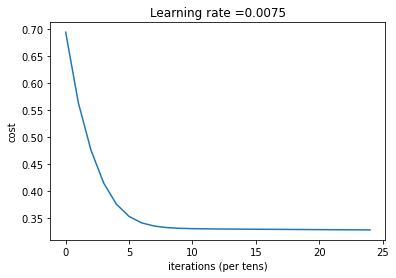

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 41, 25, 1]
Cost after iteration 0: 0.693136
Cost after iteration 100: 0.560684
Cost after iteration 200: 0.474279
Cost after iteration 300: 0.412596
Cost after iteration 400: 0.373105
Cost after iteration 500: 0.349742
Cost after iteration 600: 0.337944
Cost after iteration 700: 0.332672
Cost after iteration 800: 0.330491
Cost after iteration 900: 0.329587
Cost after iteration 1000: 0.329162
Cost after iteration 1100: 0.328907
Cost after iteration 1200: 0.328707
Cost after iteration 1300: 0.328522
Cost after iteration 1400: 0.328337
Cost after iteration 1500: 0.328146
Cost after iteration 1600: 0.327947
Cost after iteration 1700: 0.327740
Cost after iteration 1800: 0.327522
Cost after iteration 1900: 0.327294
Cost after iteration 2000: 0.327054
Cost after iteration 2100: 0.326801
Cost after iteration 2200: 0.326535
Cost after iteration 2300: 0.326255
Cost after i

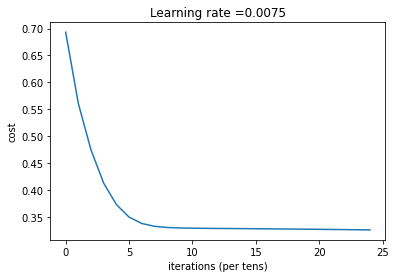

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 41, 25, 1]
Cost after iteration 0: 0.694810
Cost after iteration 100: 0.551105
Cost after iteration 200: 0.453171
Cost after iteration 300: 0.390555
Cost after iteration 400: 0.356569
Cost after iteration 500: 0.341321
Cost after iteration 600: 0.335372
Cost after iteration 700: 0.333201
Cost after iteration 800: 0.332395
Cost after iteration 900: 0.332050
Cost after iteration 1000: 0.331857
Cost after iteration 1100: 0.331712
Cost after iteration 1200: 0.331584
Cost after iteration 1300: 0.331461
Cost after iteration 1400: 0.331341
Cost after iteration 1500: 0.331215
Cost after iteration 1600: 0.331078
Cost after iteration 1700: 0.330929
Cost after iteration 1800: 0.330794
Cost after iteration 1900: 0.330678
Cost after iteration 2000: 0.330568
Cost after iteration 2100: 0.330461
Cost after iteration 2200: 0.330355
Cost after iteration 2300: 0.330250
Cost after i

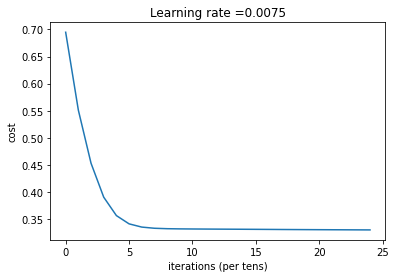

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 41, 25, 1]
Cost after iteration 0: 0.695467
Cost after iteration 100: 0.563827
Cost after iteration 200: 0.476556
Cost after iteration 300: 0.414682
Cost after iteration 400: 0.375030
Cost after iteration 500: 0.352560
Cost after iteration 600: 0.341115
Cost after iteration 700: 0.335673
Cost after iteration 800: 0.333155
Cost after iteration 900: 0.331967
Cost after iteration 1000: 0.331371
Cost after iteration 1100: 0.331047
Cost after iteration 1200: 0.330835
Cost after iteration 1300: 0.330656
Cost after iteration 1400: 0.330458
Cost after iteration 1500: 0.330257
Cost after iteration 1600: 0.330092
Cost after iteration 1700: 0.329963
Cost after iteration 1800: 0.329843
Cost after iteration 1900: 0.329726
Cost after iteration 2000: 0.329612
Cost after iteration 2100: 0.329499
Cost after iteration 2200: 0.329385
Cost after iteration 2300: 0.329270
Cost after 

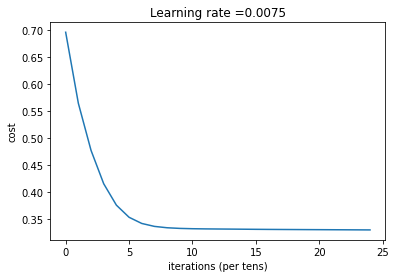

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 41, 25, 1]
Cost after iteration 0: 0.691390
Cost after iteration 100: 0.518869
Cost after iteration 200: 0.417582
Cost after iteration 300: 0.368003
Cost after iteration 400: 0.345860
Cost after iteration 500: 0.336581
Cost after iteration 600: 0.332726
Cost after iteration 700: 0.330999
Cost after iteration 800: 0.330142
Cost after iteration 900: 0.329669
Cost after iteration 1000: 0.329376
Cost after iteration 1100: 0.329158
Cost after iteration 1200: 0.328979
Cost after iteration 1300: 0.328814
Cost after iteration 1400: 0.328655
Cost after iteration 1500: 0.328497
Cost after iteration 1600: 0.328333
Cost after iteration 1700: 0.328161
Cost after iteration 1800: 0.327978
Cost after iteration 1900: 0.327793
Cost after iteration 2000: 0.327623
Cost after iteration 2100: 0.327458
Cost after iteration 2200: 0.327292
Cost after iteration 2300: 0.327123
Cost after 

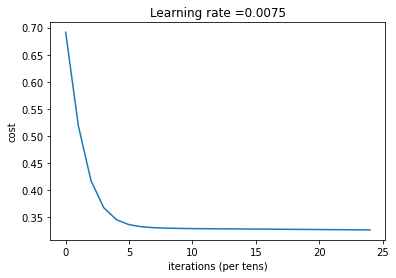

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 41, 25, 1]
Cost after iteration 0: 0.692339
Cost after iteration 100: 0.556517
Cost after iteration 200: 0.467303
Cost after iteration 300: 0.409405
Cost after iteration 400: 0.373416
Cost after iteration 500: 0.352685
Cost after iteration 600: 0.341483
Cost after iteration 700: 0.335672
Cost after iteration 800: 0.332727
Cost after iteration 900: 0.331256
Cost after iteration 1000: 0.330502
Cost after iteration 1100: 0.330092
Cost after iteration 1200: 0.329841
Cost after iteration 1300: 0.329666
Cost after iteration 1400: 0.329526
Cost after iteration 1500: 0.329403
Cost after iteration 1600: 0.329282
Cost after iteration 1700: 0.329158
Cost after iteration 1800: 0.329025
Cost after iteration 1900: 0.328893
Cost after iteration 2000: 0.328762
Cost after iteration 2100: 0.328628
Cost after iteration 2200: 0.328494
Cost after iteration 2300: 0.328365
Cost after 

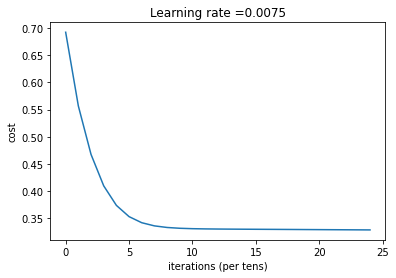

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 41, 25, 1]
Cost after iteration 0: 0.699345
Cost after iteration 100: 0.578082
Cost after iteration 200: 0.493027
Cost after iteration 300: 0.432694
Cost after iteration 400: 0.391703
Cost after iteration 500: 0.366005
Cost after iteration 600: 0.350488
Cost after iteration 700: 0.341460
Cost after iteration 800: 0.336355
Cost after iteration 900: 0.333510
Cost after iteration 1000: 0.331928
Cost after iteration 1100: 0.331033
Cost after iteration 1200: 0.330506
Cost after iteration 1300: 0.330161
Cost after iteration 1400: 0.329878
Cost after iteration 1500: 0.329676
Cost after iteration 1600: 0.329522
Cost after iteration 1700: 0.329385
Cost after iteration 1800: 0.329257
Cost after iteration 1900: 0.329145
Cost after iteration 2000: 0.329051
Cost after iteration 2100: 0.328963
Cost after iteration 2200: 0.328878
Cost after iteration 2300: 0.328795
Cost after 

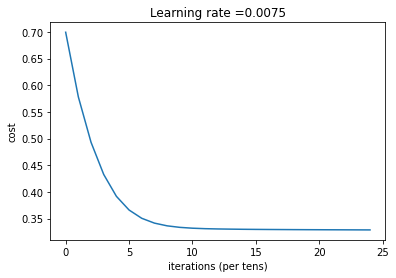

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 41, 25, 1]
Cost after iteration 0: 0.693193
Cost after iteration 100: 0.520643
Cost after iteration 200: 0.420205
Cost after iteration 300: 0.369391
Cost after iteration 400: 0.346545
Cost after iteration 500: 0.337022
Cost after iteration 600: 0.333116
Cost after iteration 700: 0.331399
Cost after iteration 800: 0.330546
Cost after iteration 900: 0.330039
Cost after iteration 1000: 0.329672
Cost after iteration 1100: 0.329344
Cost after iteration 1200: 0.328999
Cost after iteration 1300: 0.328488
Cost after iteration 1400: 0.328052
Cost after iteration 1500: 0.327595
Cost after iteration 1600: 0.327198
Cost after iteration 1700: 0.326857
Cost after iteration 1800: 0.326553
Cost after iteration 1900: 0.326276
Cost after iteration 2000: 0.326007
Cost after iteration 2100: 0.325742
Cost after iteration 2200: 0.325476
Cost after iteration 2300: 0.325208
Cost after 

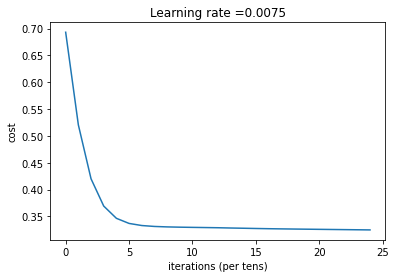

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 41, 25, 1]
Cost after iteration 0: 0.688883
Cost after iteration 100: 0.499079
Cost after iteration 200: 0.402792
Cost after iteration 300: 0.358159
Cost after iteration 400: 0.339877
Cost after iteration 500: 0.332867
Cost after iteration 600: 0.330197
Cost after iteration 700: 0.329063
Cost after iteration 800: 0.328474
Cost after iteration 900: 0.328102
Cost after iteration 1000: 0.327822
Cost after iteration 1100: 0.327581
Cost after iteration 1200: 0.327358
Cost after iteration 1300: 0.327136
Cost after iteration 1400: 0.326899
Cost after iteration 1500: 0.326672
Cost after iteration 1600: 0.326460
Cost after iteration 1700: 0.326256
Cost after iteration 1800: 0.326055
Cost after iteration 1900: 0.325849
Cost after iteration 2000: 0.325641
Cost after iteration 2100: 0.325432
Cost after iteration 2200: 0.325223
Cost after iteration 2300: 0.325011
Cost after 

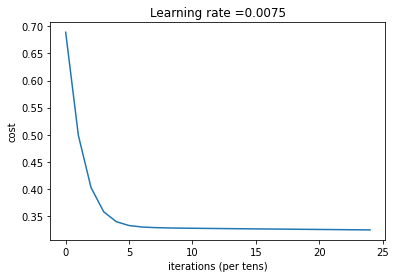

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 49, 25, 1]
Cost after iteration 0: 0.693135
Cost after iteration 100: 0.546420
Cost after iteration 200: 0.457827
Cost after iteration 300: 0.403626
Cost after iteration 400: 0.369402
Cost after iteration 500: 0.350377
Cost after iteration 600: 0.340040
Cost after iteration 700: 0.334489
Cost after iteration 800: 0.331408
Cost after iteration 900: 0.329558
Cost after iteration 1000: 0.328398
Cost after iteration 1100: 0.327602
Cost after iteration 1200: 0.326994
Cost after iteration 1300: 0.326478
Cost after iteration 1400: 0.326016
Cost after iteration 1500: 0.325576
Cost after iteration 1600: 0.325140
Cost after iteration 1700: 0.324699
Cost after iteration 1800: 0.324246
Cost after iteration 1900: 0.323776
Cost after iteration 2000: 0.323286
Cost after iteration 2100: 0.322772
Cost after iteration 2200: 0.322232
Cost after iteration 2300: 0.321664
Cost after i

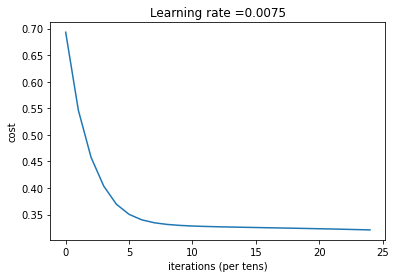

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 49, 25, 1]
Cost after iteration 0: 0.694850
Cost after iteration 100: 0.558836
Cost after iteration 200: 0.468302
Cost after iteration 300: 0.407597
Cost after iteration 400: 0.370097
Cost after iteration 500: 0.349588
Cost after iteration 600: 0.339597
Cost after iteration 700: 0.335126
Cost after iteration 800: 0.333216
Cost after iteration 900: 0.332408
Cost after iteration 1000: 0.332055
Cost after iteration 1100: 0.331883
Cost after iteration 1200: 0.331783
Cost after iteration 1300: 0.331711
Cost after iteration 1400: 0.331649
Cost after iteration 1500: 0.331592
Cost after iteration 1600: 0.331537
Cost after iteration 1700: 0.331483
Cost after iteration 1800: 0.331429
Cost after iteration 1900: 0.331375
Cost after iteration 2000: 0.331321
Cost after iteration 2100: 0.331267
Cost after iteration 2200: 0.331212
Cost after iteration 2300: 0.331157
Cost after i

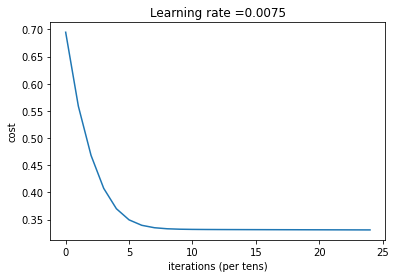

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 49, 25, 1]
Cost after iteration 0: 0.700533
Cost after iteration 100: 0.534834
Cost after iteration 200: 0.437259
Cost after iteration 300: 0.382465
Cost after iteration 400: 0.354394
Cost after iteration 500: 0.341197
Cost after iteration 600: 0.335280
Cost after iteration 700: 0.332622
Cost after iteration 800: 0.331322
Cost after iteration 900: 0.330504
Cost after iteration 1000: 0.329878
Cost after iteration 1100: 0.329478
Cost after iteration 1200: 0.329204
Cost after iteration 1300: 0.328968
Cost after iteration 1400: 0.328757
Cost after iteration 1500: 0.328561
Cost after iteration 1600: 0.328373
Cost after iteration 1700: 0.328188
Cost after iteration 1800: 0.328002
Cost after iteration 1900: 0.327813
Cost after iteration 2000: 0.327619
Cost after iteration 2100: 0.327413
Cost after iteration 2200: 0.327191
Cost after iteration 2300: 0.326927
Cost after 

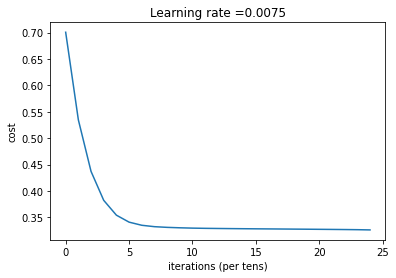

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 49, 25, 1]
Cost after iteration 0: 0.688288
Cost after iteration 100: 0.535655
Cost after iteration 200: 0.438150
Cost after iteration 300: 0.380002
Cost after iteration 400: 0.350479
Cost after iteration 500: 0.337563
Cost after iteration 600: 0.332387
Cost after iteration 700: 0.330337
Cost after iteration 800: 0.329462
Cost after iteration 900: 0.328997
Cost after iteration 1000: 0.328688
Cost after iteration 1100: 0.328437
Cost after iteration 1200: 0.328229
Cost after iteration 1300: 0.328051
Cost after iteration 1400: 0.327888
Cost after iteration 1500: 0.327735
Cost after iteration 1600: 0.327584
Cost after iteration 1700: 0.327434
Cost after iteration 1800: 0.327281
Cost after iteration 1900: 0.327122
Cost after iteration 2000: 0.326957
Cost after iteration 2100: 0.326784
Cost after iteration 2200: 0.326601
Cost after iteration 2300: 0.326420
Cost after 

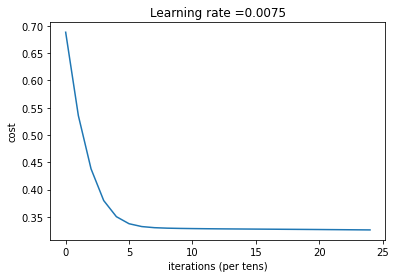

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 49, 25, 1]
Cost after iteration 0: 0.687671
Cost after iteration 100: 0.516436
Cost after iteration 200: 0.420996
Cost after iteration 300: 0.371061
Cost after iteration 400: 0.347938
Cost after iteration 500: 0.338275
Cost after iteration 600: 0.334430
Cost after iteration 700: 0.332885
Cost after iteration 800: 0.332204
Cost after iteration 900: 0.331848
Cost after iteration 1000: 0.331615
Cost after iteration 1100: 0.331422
Cost after iteration 1200: 0.331268
Cost after iteration 1300: 0.331142
Cost after iteration 1400: 0.331028
Cost after iteration 1500: 0.330922
Cost after iteration 1600: 0.330819
Cost after iteration 1700: 0.330715
Cost after iteration 1800: 0.330611
Cost after iteration 1900: 0.330506
Cost after iteration 2000: 0.330400
Cost after iteration 2100: 0.330289
Cost after iteration 2200: 0.330173
Cost after iteration 2300: 0.330051
Cost after 

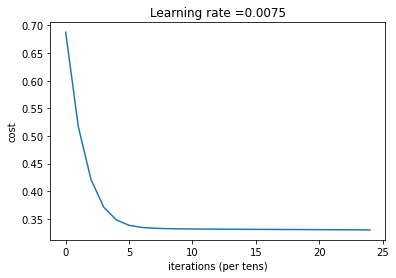

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 49, 25, 1]
Cost after iteration 0: 0.691195
Cost after iteration 100: 0.539591
Cost after iteration 200: 0.435297
Cost after iteration 300: 0.377827
Cost after iteration 400: 0.350228
Cost after iteration 500: 0.338434
Cost after iteration 600: 0.333685
Cost after iteration 700: 0.331739
Cost after iteration 800: 0.330851
Cost after iteration 900: 0.330363
Cost after iteration 1000: 0.330034
Cost after iteration 1100: 0.329781
Cost after iteration 1200: 0.329573
Cost after iteration 1300: 0.329384
Cost after iteration 1400: 0.329205
Cost after iteration 1500: 0.329031
Cost after iteration 1600: 0.328858
Cost after iteration 1700: 0.328683
Cost after iteration 1800: 0.328507
Cost after iteration 1900: 0.328327
Cost after iteration 2000: 0.328142
Cost after iteration 2100: 0.327957
Cost after iteration 2200: 0.327763
Cost after iteration 2300: 0.327549
Cost after 

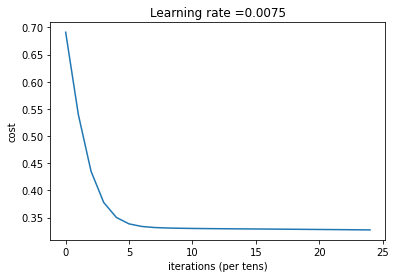

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 49, 25, 1]
Cost after iteration 0: 0.693697
Cost after iteration 100: 0.562788
Cost after iteration 200: 0.474236
Cost after iteration 300: 0.415939
Cost after iteration 400: 0.378736
Cost after iteration 500: 0.356506
Cost after iteration 600: 0.344008
Cost after iteration 700: 0.337266
Cost after iteration 800: 0.333645
Cost after iteration 900: 0.331655
Cost after iteration 1000: 0.330538
Cost after iteration 1100: 0.329885
Cost after iteration 1200: 0.329472
Cost after iteration 1300: 0.329191
Cost after iteration 1400: 0.328976
Cost after iteration 1500: 0.328798
Cost after iteration 1600: 0.328634
Cost after iteration 1700: 0.328472
Cost after iteration 1800: 0.328305
Cost after iteration 1900: 0.328124
Cost after iteration 2000: 0.327862
Cost after iteration 2100: 0.327549
Cost after iteration 2200: 0.327249
Cost after iteration 2300: 0.327010
Cost after 

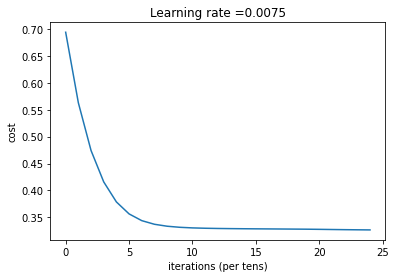

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 49, 25, 1]
Cost after iteration 0: 0.691283
Cost after iteration 100: 0.551115
Cost after iteration 200: 0.461171
Cost after iteration 300: 0.403380
Cost after iteration 400: 0.368735
Cost after iteration 500: 0.349618
Cost after iteration 600: 0.339763
Cost after iteration 700: 0.334886
Cost after iteration 800: 0.332507
Cost after iteration 900: 0.331326
Cost after iteration 1000: 0.330678
Cost after iteration 1100: 0.330295
Cost after iteration 1200: 0.330044
Cost after iteration 1300: 0.329855
Cost after iteration 1400: 0.329697
Cost after iteration 1500: 0.329554
Cost after iteration 1600: 0.329416
Cost after iteration 1700: 0.329277
Cost after iteration 1800: 0.329125
Cost after iteration 1900: 0.328835
Cost after iteration 2000: 0.328594
Cost after iteration 2100: 0.328408
Cost after iteration 2200: 0.328267
Cost after iteration 2300: 0.328137
Cost after 

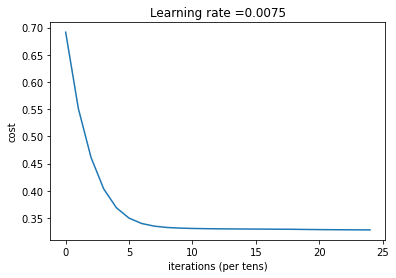

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 57, 25, 1]
Cost after iteration 0: 0.693182
Cost after iteration 100: 0.558959
Cost after iteration 200: 0.473626
Cost after iteration 300: 0.418665
Cost after iteration 400: 0.383847
Cost after iteration 500: 0.362379
Cost after iteration 600: 0.349479
Cost after iteration 700: 0.341881
Cost after iteration 800: 0.337466
Cost after iteration 900: 0.334917
Cost after iteration 1000: 0.333428
Cost after iteration 1100: 0.332434
Cost after iteration 1200: 0.331546
Cost after iteration 1300: 0.331045
Cost after iteration 1400: 0.330665
Cost after iteration 1500: 0.330385
Cost after iteration 1600: 0.330183
Cost after iteration 1700: 0.330013
Cost after iteration 1800: 0.329864
Cost after iteration 1900: 0.329724
Cost after iteration 2000: 0.329587
Cost after iteration 2100: 0.329450
Cost after iteration 2200: 0.329313
Cost after iteration 2300: 0.329172
Cost after i

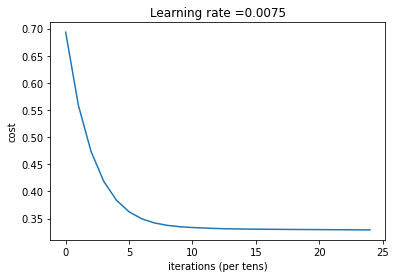

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 57, 25, 1]
Cost after iteration 0: 0.686585
Cost after iteration 100: 0.513832
Cost after iteration 200: 0.402539
Cost after iteration 300: 0.353230
Cost after iteration 400: 0.336626
Cost after iteration 500: 0.331846
Cost after iteration 600: 0.330480
Cost after iteration 700: 0.330002
Cost after iteration 800: 0.329746
Cost after iteration 900: 0.329532
Cost after iteration 1000: 0.329320
Cost after iteration 1100: 0.329127
Cost after iteration 1200: 0.328948
Cost after iteration 1300: 0.328775
Cost after iteration 1400: 0.328605
Cost after iteration 1500: 0.328437
Cost after iteration 1600: 0.328267
Cost after iteration 1700: 0.328095
Cost after iteration 1800: 0.327921
Cost after iteration 1900: 0.327744
Cost after iteration 2000: 0.327565
Cost after iteration 2100: 0.327381
Cost after iteration 2200: 0.327194
Cost after iteration 2300: 0.327003
Cost after i

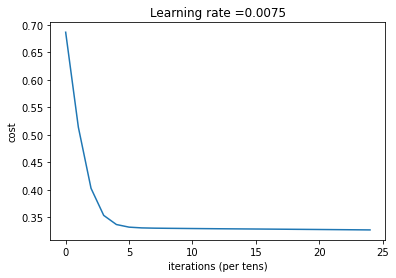

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 57, 25, 1]
Cost after iteration 0: 0.689999
Cost after iteration 100: 0.509321
Cost after iteration 200: 0.407434
Cost after iteration 300: 0.359231
Cost after iteration 400: 0.340447
Cost after iteration 500: 0.333982
Cost after iteration 600: 0.331817
Cost after iteration 700: 0.331030
Cost after iteration 800: 0.330666
Cost after iteration 900: 0.330429
Cost after iteration 1000: 0.330238
Cost after iteration 1100: 0.330067
Cost after iteration 1200: 0.329900
Cost after iteration 1300: 0.329722
Cost after iteration 1400: 0.329523
Cost after iteration 1500: 0.329331
Cost after iteration 1600: 0.329142
Cost after iteration 1700: 0.328964
Cost after iteration 1800: 0.328797
Cost after iteration 1900: 0.328630
Cost after iteration 2000: 0.328459
Cost after iteration 2100: 0.328282
Cost after iteration 2200: 0.328099
Cost after iteration 2300: 0.327914
Cost after 

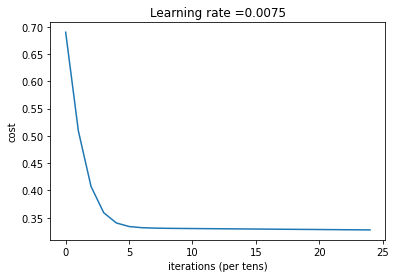

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 57, 25, 1]
Cost after iteration 0: 0.701321
Cost after iteration 100: 0.544212
Cost after iteration 200: 0.448702
Cost after iteration 300: 0.389593
Cost after iteration 400: 0.356868
Cost after iteration 500: 0.340958
Cost after iteration 600: 0.333895
Cost after iteration 700: 0.330882
Cost after iteration 800: 0.329569
Cost after iteration 900: 0.328930
Cost after iteration 1000: 0.328576
Cost after iteration 1100: 0.328331
Cost after iteration 1200: 0.328080
Cost after iteration 1300: 0.327855
Cost after iteration 1400: 0.327663
Cost after iteration 1500: 0.327491
Cost after iteration 1600: 0.327327
Cost after iteration 1700: 0.327165
Cost after iteration 1800: 0.327004
Cost after iteration 1900: 0.326843
Cost after iteration 2000: 0.326681
Cost after iteration 2100: 0.326517
Cost after iteration 2200: 0.326350
Cost after iteration 2300: 0.326178
Cost after 

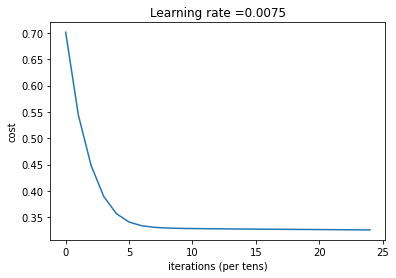

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 57, 25, 1]
Cost after iteration 0: 0.695232
Cost after iteration 100: 0.550368
Cost after iteration 200: 0.460292
Cost after iteration 300: 0.402767
Cost after iteration 400: 0.368222
Cost after iteration 500: 0.349071
Cost after iteration 600: 0.339092
Cost after iteration 700: 0.334125
Cost after iteration 800: 0.331661
Cost after iteration 900: 0.330401
Cost after iteration 1000: 0.329704
Cost after iteration 1100: 0.329298
Cost after iteration 1200: 0.329046
Cost after iteration 1300: 0.328861
Cost after iteration 1400: 0.328710
Cost after iteration 1500: 0.328576
Cost after iteration 1600: 0.328450
Cost after iteration 1700: 0.328329
Cost after iteration 1800: 0.328208
Cost after iteration 1900: 0.328087
Cost after iteration 2000: 0.327965
Cost after iteration 2100: 0.327841
Cost after iteration 2200: 0.327715
Cost after iteration 2300: 0.327587
Cost after 

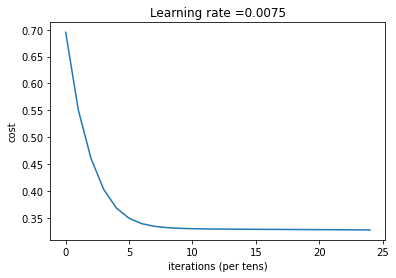

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 57, 25, 1]
Cost after iteration 0: 0.696616
Cost after iteration 100: 0.538303
Cost after iteration 200: 0.444776
Cost after iteration 300: 0.389293
Cost after iteration 400: 0.358843
Cost after iteration 500: 0.343500
Cost after iteration 600: 0.336221
Cost after iteration 700: 0.332853
Cost after iteration 800: 0.331255
Cost after iteration 900: 0.330429
Cost after iteration 1000: 0.329969
Cost after iteration 1100: 0.329694
Cost after iteration 1200: 0.329484
Cost after iteration 1300: 0.329305
Cost after iteration 1400: 0.329136
Cost after iteration 1500: 0.329007
Cost after iteration 1600: 0.328884
Cost after iteration 1700: 0.328764
Cost after iteration 1800: 0.328645
Cost after iteration 1900: 0.328525
Cost after iteration 2000: 0.328405
Cost after iteration 2100: 0.328283
Cost after iteration 2200: 0.328157
Cost after iteration 2300: 0.328027
Cost after 

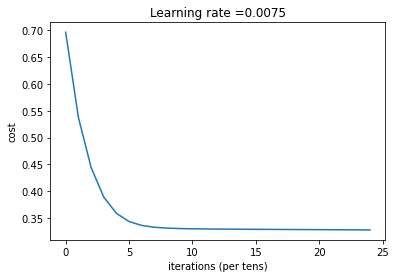

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 57, 25, 1]
Cost after iteration 0: 0.688928
Cost after iteration 100: 0.532755
Cost after iteration 200: 0.429251
Cost after iteration 300: 0.374253
Cost after iteration 400: 0.348309
Cost after iteration 500: 0.337128
Cost after iteration 600: 0.332469
Cost after iteration 700: 0.330371
Cost after iteration 800: 0.329360
Cost after iteration 900: 0.328807
Cost after iteration 1000: 0.328438
Cost after iteration 1100: 0.328145
Cost after iteration 1200: 0.327886
Cost after iteration 1300: 0.327635
Cost after iteration 1400: 0.327382
Cost after iteration 1500: 0.327117
Cost after iteration 1600: 0.326837
Cost after iteration 1700: 0.326577
Cost after iteration 1800: 0.326338
Cost after iteration 1900: 0.326103
Cost after iteration 2000: 0.325869
Cost after iteration 2100: 0.325630
Cost after iteration 2200: 0.325383
Cost after iteration 2300: 0.325130
Cost after 

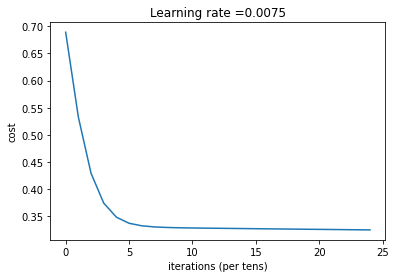

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 57, 25, 1]
Cost after iteration 0: 0.692031
Cost after iteration 100: 0.565310
Cost after iteration 200: 0.478208
Cost after iteration 300: 0.419199
Cost after iteration 400: 0.380824
Cost after iteration 500: 0.357493
Cost after iteration 600: 0.344226
Cost after iteration 700: 0.337056
Cost after iteration 800: 0.333283
Cost after iteration 900: 0.331298
Cost after iteration 1000: 0.330228
Cost after iteration 1100: 0.329598
Cost after iteration 1200: 0.329181
Cost after iteration 1300: 0.328867
Cost after iteration 1400: 0.328610
Cost after iteration 1500: 0.328386
Cost after iteration 1600: 0.328179
Cost after iteration 1700: 0.327973
Cost after iteration 1800: 0.327772
Cost after iteration 1900: 0.327569
Cost after iteration 2000: 0.327360
Cost after iteration 2100: 0.327140
Cost after iteration 2200: 0.326929
Cost after iteration 2300: 0.326739
Cost after 

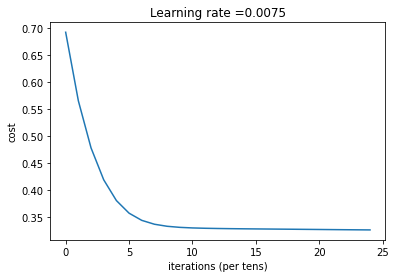

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 1, 33, 1]
Cost after iteration 0: 0.693182
Cost after iteration 100: 0.563790
Cost after iteration 200: 0.482000
Cost after iteration 300: 0.429105
Cost after iteration 400: 0.394720
Cost after iteration 500: 0.372415
Cost after iteration 600: 0.357990
Cost after iteration 700: 0.348677
Cost after iteration 800: 0.342667
Cost after iteration 900: 0.338785
Cost after iteration 1000: 0.336273
Cost after iteration 1100: 0.334645
Cost after iteration 1200: 0.333589
Cost after iteration 1300: 0.332901
Cost after iteration 1400: 0.332453
Cost after iteration 1500: 0.332161
Cost after iteration 1600: 0.331970
Cost after iteration 1700: 0.331846
Cost after iteration 1800: 0.331764
Cost after iteration 1900: 0.331710
Cost after iteration 2000: 0.331675
Cost after iteration 2100: 0.331652
Cost after iteration 2200: 0.331637
Cost after iteration 2300: 0.331627
Cost after it

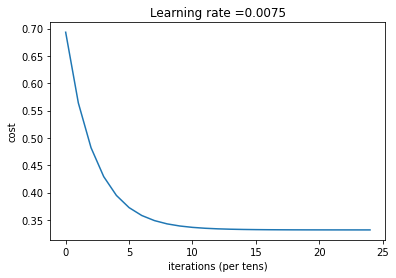

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 1, 33, 1]
Cost after iteration 0: 0.690180
Cost after iteration 100: 0.500439
Cost after iteration 200: 0.363067
Cost after iteration 300: 0.334455
Cost after iteration 400: 0.331464
Cost after iteration 500: 0.330964
Cost after iteration 600: 0.330450
Cost after iteration 700: 0.329657
Cost after iteration 800: 0.329074
Cost after iteration 900: 0.328703
Cost after iteration 1000: 0.328442
Cost after iteration 1100: 0.328207
Cost after iteration 1200: 0.327973
Cost after iteration 1300: 0.327737
Cost after iteration 1400: 0.327496
Cost after iteration 1500: 0.327247
Cost after iteration 1600: 0.326991
Cost after iteration 1700: 0.326725
Cost after iteration 1800: 0.326448
Cost after iteration 1900: 0.326161
Cost after iteration 2000: 0.325862
Cost after iteration 2100: 0.325551
Cost after iteration 2200: 0.325225
Cost after iteration 2300: 0.324885
Cost after it

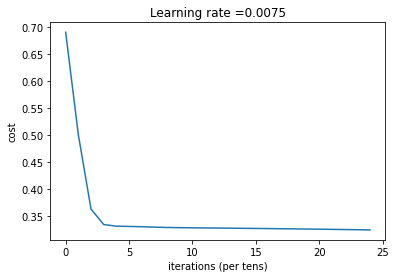

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 1, 33, 1]
Cost after iteration 0: 0.692436
Cost after iteration 100: 0.494083
Cost after iteration 200: 0.359167
Cost after iteration 300: 0.333989
Cost after iteration 400: 0.331391
Cost after iteration 500: 0.330866
Cost after iteration 600: 0.330417
Cost after iteration 700: 0.330099
Cost after iteration 800: 0.329837
Cost after iteration 900: 0.329589
Cost after iteration 1000: 0.329345
Cost after iteration 1100: 0.329102
Cost after iteration 1200: 0.328860
Cost after iteration 1300: 0.328613
Cost after iteration 1400: 0.328359
Cost after iteration 1500: 0.328092
Cost after iteration 1600: 0.327808
Cost after iteration 1700: 0.327504
Cost after iteration 1800: 0.327190
Cost after iteration 1900: 0.326892
Cost after iteration 2000: 0.326592
Cost after iteration 2100: 0.326287
Cost after iteration 2200: 0.325974
Cost after iteration 2300: 0.325651
Cost after i

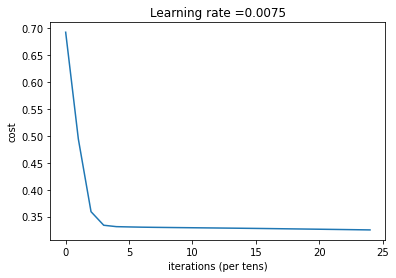

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 1, 33, 1]
Cost after iteration 0: 0.693323
Cost after iteration 100: 0.575260
Cost after iteration 200: 0.497534
Cost after iteration 300: 0.445066
Cost after iteration 400: 0.409248
Cost after iteration 500: 0.384714
Cost after iteration 600: 0.367911
Cost after iteration 700: 0.356416
Cost after iteration 800: 0.348562
Cost after iteration 900: 0.343199
Cost after iteration 1000: 0.339536
Cost after iteration 1100: 0.337035
Cost after iteration 1200: 0.335325
Cost after iteration 1300: 0.334156
Cost after iteration 1400: 0.333356
Cost after iteration 1500: 0.332808
Cost after iteration 1600: 0.332432
Cost after iteration 1700: 0.332174
Cost after iteration 1800: 0.331997
Cost after iteration 1900: 0.331876
Cost after iteration 2000: 0.331792
Cost after iteration 2100: 0.331735
Cost after iteration 2200: 0.331695
Cost after iteration 2300: 0.331668
Cost after i

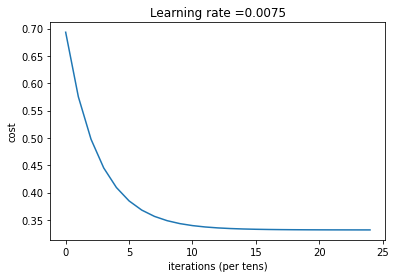

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 1, 33, 1]
Cost after iteration 0: 0.693119
Cost after iteration 100: 0.568901
Cost after iteration 200: 0.478566
Cost after iteration 300: 0.406606
Cost after iteration 400: 0.356747
Cost after iteration 500: 0.336872
Cost after iteration 600: 0.331680
Cost after iteration 700: 0.330368
Cost after iteration 800: 0.329849
Cost after iteration 900: 0.329439
Cost after iteration 1000: 0.328983
Cost after iteration 1100: 0.328647
Cost after iteration 1200: 0.328355
Cost after iteration 1300: 0.328076
Cost after iteration 1400: 0.327803
Cost after iteration 1500: 0.327524
Cost after iteration 1600: 0.327243
Cost after iteration 1700: 0.326960
Cost after iteration 1800: 0.326670
Cost after iteration 1900: 0.326371
Cost after iteration 2000: 0.326064
Cost after iteration 2100: 0.325742
Cost after iteration 2200: 0.325408
Cost after iteration 2300: 0.325056
Cost after i

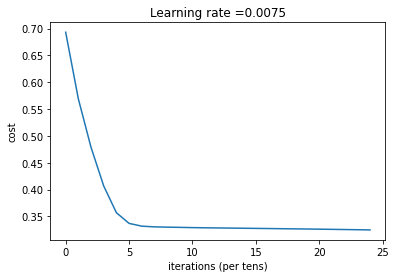

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 1, 33, 1]
Cost after iteration 0: 0.685744
Cost after iteration 100: 0.455566
Cost after iteration 200: 0.353650
Cost after iteration 300: 0.335065
Cost after iteration 400: 0.332255
Cost after iteration 500: 0.331351
Cost after iteration 600: 0.330719
Cost after iteration 700: 0.330227
Cost after iteration 800: 0.329760
Cost after iteration 900: 0.329325
Cost after iteration 1000: 0.328862
Cost after iteration 1100: 0.328404
Cost after iteration 1200: 0.327937
Cost after iteration 1300: 0.327464
Cost after iteration 1400: 0.326864
Cost after iteration 1500: 0.326424
Cost after iteration 1600: 0.326023
Cost after iteration 1700: 0.325634
Cost after iteration 1800: 0.325252
Cost after iteration 1900: 0.324863
Cost after iteration 2000: 0.324466
Cost after iteration 2100: 0.324057
Cost after iteration 2200: 0.323633
Cost after iteration 2300: 0.323195
Cost after i

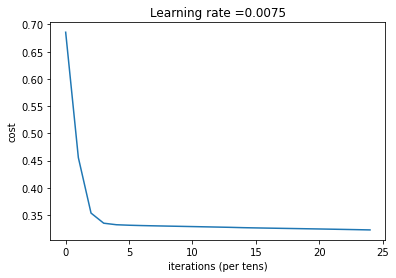

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 1, 33, 1]
Cost after iteration 0: 0.679868
Cost after iteration 100: 0.390203
Cost after iteration 200: 0.332998
Cost after iteration 300: 0.328110
Cost after iteration 400: 0.327277
Cost after iteration 500: 0.326688
Cost after iteration 600: 0.326015
Cost after iteration 700: 0.325269
Cost after iteration 800: 0.324611
Cost after iteration 900: 0.324027
Cost after iteration 1000: 0.323449
Cost after iteration 1100: 0.322853
Cost after iteration 1200: 0.322233
Cost after iteration 1300: 0.321585
Cost after iteration 1400: 0.320902
Cost after iteration 1500: 0.320180
Cost after iteration 1600: 0.319412
Cost after iteration 1700: 0.318597
Cost after iteration 1800: 0.317731
Cost after iteration 1900: 0.316812
Cost after iteration 2000: 0.315842
Cost after iteration 2100: 0.314816
Cost after iteration 2200: 0.313729
Cost after iteration 2300: 0.312575
Cost after i

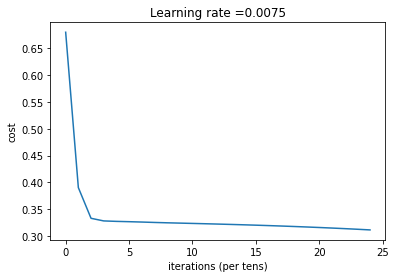

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 1, 33, 1]
Cost after iteration 0: 0.692508
Cost after iteration 100: 0.551572
Cost after iteration 200: 0.440302
Cost after iteration 300: 0.366693
Cost after iteration 400: 0.338498
Cost after iteration 500: 0.331124
Cost after iteration 600: 0.329182
Cost after iteration 700: 0.328468
Cost after iteration 800: 0.328012
Cost after iteration 900: 0.327621
Cost after iteration 1000: 0.327260
Cost after iteration 1100: 0.326934
Cost after iteration 1200: 0.326622
Cost after iteration 1300: 0.326319
Cost after iteration 1400: 0.326018
Cost after iteration 1500: 0.325711
Cost after iteration 1600: 0.325398
Cost after iteration 1700: 0.325078
Cost after iteration 1800: 0.324745
Cost after iteration 1900: 0.324399
Cost after iteration 2000: 0.324039
Cost after iteration 2100: 0.323663
Cost after iteration 2200: 0.323270
Cost after iteration 2300: 0.322859
Cost after i

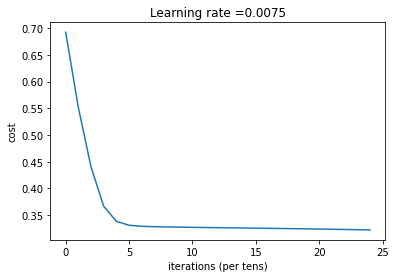

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 9, 33, 1]
Cost after iteration 0: 0.693120
Cost after iteration 100: 0.540421
Cost after iteration 200: 0.444864
Cost after iteration 300: 0.381345
Cost after iteration 400: 0.347181
Cost after iteration 500: 0.334006
Cost after iteration 600: 0.330077
Cost after iteration 700: 0.329007
Cost after iteration 800: 0.328615
Cost after iteration 900: 0.328360
Cost after iteration 1000: 0.328124
Cost after iteration 1100: 0.327884
Cost after iteration 1200: 0.327625
Cost after iteration 1300: 0.327322
Cost after iteration 1400: 0.327031
Cost after iteration 1500: 0.326732
Cost after iteration 1600: 0.326418
Cost after iteration 1700: 0.326087
Cost after iteration 1800: 0.325736
Cost after iteration 1900: 0.325365
Cost after iteration 2000: 0.324972
Cost after iteration 2100: 0.324554
Cost after iteration 2200: 0.324111
Cost after iteration 2300: 0.323639
Cost after it

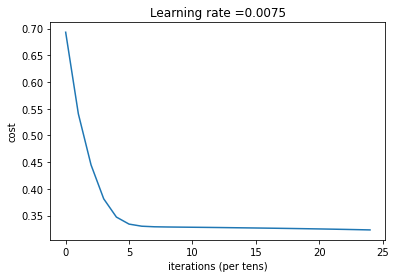

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 9, 33, 1]
Cost after iteration 0: 0.694934
Cost after iteration 100: 0.528027
Cost after iteration 200: 0.430262
Cost after iteration 300: 0.376343
Cost after iteration 400: 0.350208
Cost after iteration 500: 0.338832
Cost after iteration 600: 0.334174
Cost after iteration 700: 0.332299
Cost after iteration 800: 0.331524
Cost after iteration 900: 0.331167
Cost after iteration 1000: 0.330965
Cost after iteration 1100: 0.330842
Cost after iteration 1200: 0.330760
Cost after iteration 1300: 0.330696
Cost after iteration 1400: 0.330639
Cost after iteration 1500: 0.330579
Cost after iteration 1600: 0.330511
Cost after iteration 1700: 0.330451
Cost after iteration 1800: 0.330399
Cost after iteration 1900: 0.330349
Cost after iteration 2000: 0.330300
Cost after iteration 2100: 0.330251
Cost after iteration 2200: 0.330201
Cost after iteration 2300: 0.330151
Cost after it

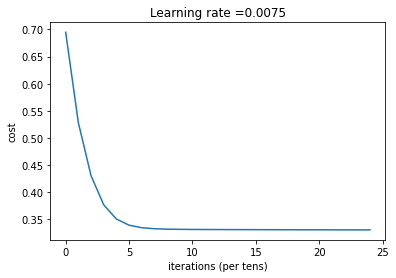

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 9, 33, 1]
Cost after iteration 0: 0.700439
Cost after iteration 100: 0.548299
Cost after iteration 200: 0.457820
Cost after iteration 300: 0.403329
Cost after iteration 400: 0.371177
Cost after iteration 500: 0.352811
Cost after iteration 600: 0.342642
Cost after iteration 700: 0.337144
Cost after iteration 800: 0.334229
Cost after iteration 900: 0.332698
Cost after iteration 1000: 0.331889
Cost after iteration 1100: 0.331460
Cost after iteration 1200: 0.331225
Cost after iteration 1300: 0.331089
Cost after iteration 1400: 0.331004
Cost after iteration 1500: 0.330943
Cost after iteration 1600: 0.330891
Cost after iteration 1700: 0.330841
Cost after iteration 1800: 0.330787
Cost after iteration 1900: 0.330714
Cost after iteration 2000: 0.330624
Cost after iteration 2100: 0.330536
Cost after iteration 2200: 0.330476
Cost after iteration 2300: 0.330425
Cost after i

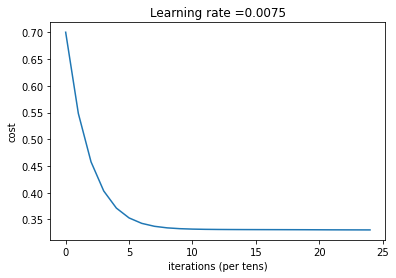

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 9, 33, 1]
Cost after iteration 0: 0.694362
Cost after iteration 100: 0.559086
Cost after iteration 200: 0.463348
Cost after iteration 300: 0.397349
Cost after iteration 400: 0.359167
Cost after iteration 500: 0.341428
Cost after iteration 600: 0.334457
Cost after iteration 700: 0.331861
Cost after iteration 800: 0.330848
Cost after iteration 900: 0.330400
Cost after iteration 1000: 0.330154
Cost after iteration 1100: 0.329972
Cost after iteration 1200: 0.329807
Cost after iteration 1300: 0.329656
Cost after iteration 1400: 0.329515
Cost after iteration 1500: 0.329379
Cost after iteration 1600: 0.329247
Cost after iteration 1700: 0.329115
Cost after iteration 1800: 0.328983
Cost after iteration 1900: 0.328851
Cost after iteration 2000: 0.328717
Cost after iteration 2100: 0.328582
Cost after iteration 2200: 0.328444
Cost after iteration 2300: 0.328305
Cost after i

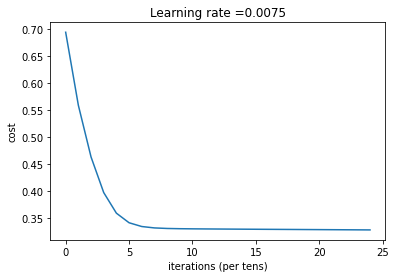

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 9, 33, 1]
Cost after iteration 0: 0.697518
Cost after iteration 100: 0.546176
Cost after iteration 200: 0.455960
Cost after iteration 300: 0.400144
Cost after iteration 400: 0.367358
Cost after iteration 500: 0.349286
Cost after iteration 600: 0.339811
Cost after iteration 700: 0.334986
Cost after iteration 800: 0.332573
Cost after iteration 900: 0.331348
Cost after iteration 1000: 0.330667
Cost after iteration 1100: 0.330273
Cost after iteration 1200: 0.330030
Cost after iteration 1300: 0.329853
Cost after iteration 1400: 0.329704
Cost after iteration 1500: 0.329556
Cost after iteration 1600: 0.329354
Cost after iteration 1700: 0.329108
Cost after iteration 1800: 0.328924
Cost after iteration 1900: 0.328780
Cost after iteration 2000: 0.328651
Cost after iteration 2100: 0.328527
Cost after iteration 2200: 0.328403
Cost after iteration 2300: 0.328278
Cost after i

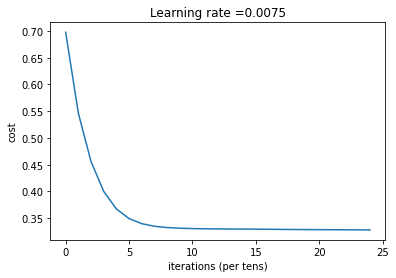

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 9, 33, 1]
Cost after iteration 0: 0.692763
Cost after iteration 100: 0.542457
Cost after iteration 200: 0.442253
Cost after iteration 300: 0.381942
Cost after iteration 400: 0.351575
Cost after iteration 500: 0.338664
Cost after iteration 600: 0.333690
Cost after iteration 700: 0.331782
Cost after iteration 800: 0.330981
Cost after iteration 900: 0.330539
Cost after iteration 1000: 0.330225
Cost after iteration 1100: 0.329977
Cost after iteration 1200: 0.329773
Cost after iteration 1300: 0.329596
Cost after iteration 1400: 0.329430
Cost after iteration 1500: 0.329269
Cost after iteration 1600: 0.329101
Cost after iteration 1700: 0.328927
Cost after iteration 1800: 0.328721
Cost after iteration 1900: 0.328433
Cost after iteration 2000: 0.328175
Cost after iteration 2100: 0.327938
Cost after iteration 2200: 0.327706
Cost after iteration 2300: 0.327479
Cost after i

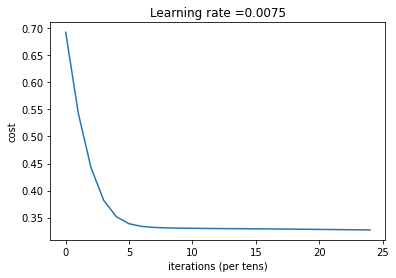

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 9, 33, 1]
Cost after iteration 0: 0.696282
Cost after iteration 100: 0.551704
Cost after iteration 200: 0.463151
Cost after iteration 300: 0.406945
Cost after iteration 400: 0.372486
Cost after iteration 500: 0.352417
Cost after iteration 600: 0.341284
Cost after iteration 700: 0.335352
Cost after iteration 800: 0.332253
Cost after iteration 900: 0.330617
Cost after iteration 1000: 0.329683
Cost after iteration 1100: 0.329104
Cost after iteration 1200: 0.328698
Cost after iteration 1300: 0.328383
Cost after iteration 1400: 0.328167
Cost after iteration 1500: 0.327990
Cost after iteration 1600: 0.327833
Cost after iteration 1700: 0.327685
Cost after iteration 1800: 0.327542
Cost after iteration 1900: 0.327400
Cost after iteration 2000: 0.327258
Cost after iteration 2100: 0.327114
Cost after iteration 2200: 0.326967
Cost after iteration 2300: 0.326817
Cost after i

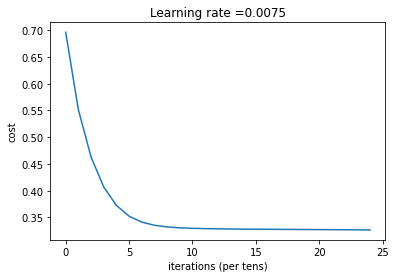

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 9, 33, 1]
Cost after iteration 0: 0.694739
Cost after iteration 100: 0.578124
Cost after iteration 200: 0.498289
Cost after iteration 300: 0.440601
Cost after iteration 400: 0.399269
Cost after iteration 500: 0.370987
Cost after iteration 600: 0.352996
Cost after iteration 700: 0.342374
Cost after iteration 800: 0.336457
Cost after iteration 900: 0.333270
Cost after iteration 1000: 0.331569
Cost after iteration 1100: 0.330647
Cost after iteration 1200: 0.330101
Cost after iteration 1300: 0.329728
Cost after iteration 1400: 0.329450
Cost after iteration 1500: 0.329233
Cost after iteration 1600: 0.329050
Cost after iteration 1700: 0.328888
Cost after iteration 1800: 0.328733
Cost after iteration 1900: 0.328536
Cost after iteration 2000: 0.328259
Cost after iteration 2100: 0.328068
Cost after iteration 2200: 0.327905
Cost after iteration 2300: 0.327745
Cost after i

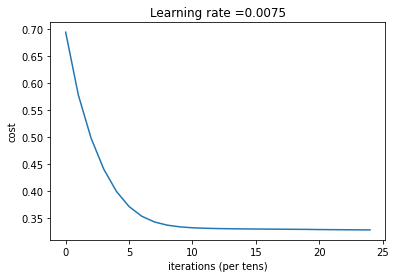

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 17, 33, 1]
Cost after iteration 0: 0.693125
Cost after iteration 100: 0.519128
Cost after iteration 200: 0.425118
Cost after iteration 300: 0.373377
Cost after iteration 400: 0.347613
Cost after iteration 500: 0.336428
Cost after iteration 600: 0.331620
Cost after iteration 700: 0.329468
Cost after iteration 800: 0.328391
Cost after iteration 900: 0.327753
Cost after iteration 1000: 0.327289
Cost after iteration 1100: 0.326895
Cost after iteration 1200: 0.326523
Cost after iteration 1300: 0.326154
Cost after iteration 1400: 0.325775
Cost after iteration 1500: 0.325381
Cost after iteration 1600: 0.324970
Cost after iteration 1700: 0.324540
Cost after iteration 1800: 0.324091
Cost after iteration 1900: 0.323620
Cost after iteration 2000: 0.323127
Cost after iteration 2100: 0.322616
Cost after iteration 2200: 0.322087
Cost after iteration 2300: 0.321533
Cost after i

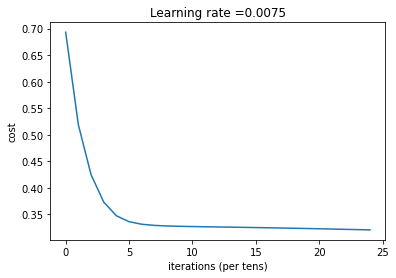

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 17, 33, 1]
Cost after iteration 0: 0.688388
Cost after iteration 100: 0.539778
Cost after iteration 200: 0.443986
Cost after iteration 300: 0.384922
Cost after iteration 400: 0.353780
Cost after iteration 500: 0.339864
Cost after iteration 600: 0.334322
Cost after iteration 700: 0.332230
Cost after iteration 800: 0.331431
Cost after iteration 900: 0.331090
Cost after iteration 1000: 0.330899
Cost after iteration 1100: 0.330745
Cost after iteration 1200: 0.330582
Cost after iteration 1300: 0.330425
Cost after iteration 1400: 0.330271
Cost after iteration 1500: 0.330102
Cost after iteration 1600: 0.329941
Cost after iteration 1700: 0.329787
Cost after iteration 1800: 0.329638
Cost after iteration 1900: 0.329503
Cost after iteration 2000: 0.329379
Cost after iteration 2100: 0.329263
Cost after iteration 2200: 0.329149
Cost after iteration 2300: 0.329035
Cost after i

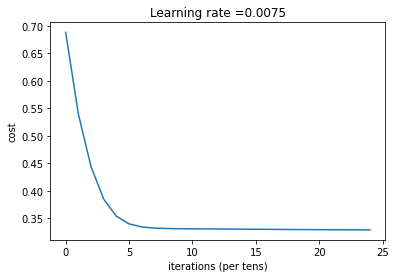

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 17, 33, 1]
Cost after iteration 0: 0.687968
Cost after iteration 100: 0.496901
Cost after iteration 200: 0.391486
Cost after iteration 300: 0.350049
Cost after iteration 400: 0.337254
Cost after iteration 500: 0.333643
Cost after iteration 600: 0.332588
Cost after iteration 700: 0.332220
Cost after iteration 800: 0.332034
Cost after iteration 900: 0.331896
Cost after iteration 1000: 0.331763
Cost after iteration 1100: 0.331617
Cost after iteration 1200: 0.331449
Cost after iteration 1300: 0.331250
Cost after iteration 1400: 0.331055
Cost after iteration 1500: 0.330888
Cost after iteration 1600: 0.330730
Cost after iteration 1700: 0.330587
Cost after iteration 1800: 0.330458
Cost after iteration 1900: 0.330338
Cost after iteration 2000: 0.330220
Cost after iteration 2100: 0.330102
Cost after iteration 2200: 0.329985
Cost after iteration 2300: 0.329867
Cost after 

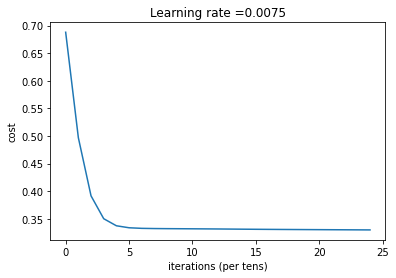

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 17, 33, 1]
Cost after iteration 0: 0.694299
Cost after iteration 100: 0.552342
Cost after iteration 200: 0.454381
Cost after iteration 300: 0.393259
Cost after iteration 400: 0.359509
Cost after iteration 500: 0.343164
Cost after iteration 600: 0.335951
Cost after iteration 700: 0.332922
Cost after iteration 800: 0.331652
Cost after iteration 900: 0.331087
Cost after iteration 1000: 0.330799
Cost after iteration 1100: 0.330617
Cost after iteration 1200: 0.330478
Cost after iteration 1300: 0.330352
Cost after iteration 1400: 0.330218
Cost after iteration 1500: 0.330069
Cost after iteration 1600: 0.329913
Cost after iteration 1700: 0.329784
Cost after iteration 1800: 0.329668
Cost after iteration 1900: 0.329559
Cost after iteration 2000: 0.329453
Cost after iteration 2100: 0.329350
Cost after iteration 2200: 0.329247
Cost after iteration 2300: 0.329142
Cost after 

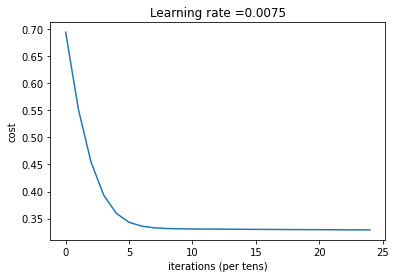

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 17, 33, 1]
Cost after iteration 0: 0.697107
Cost after iteration 100: 0.543508
Cost after iteration 200: 0.450964
Cost after iteration 300: 0.395333
Cost after iteration 400: 0.363947
Cost after iteration 500: 0.347410
Cost after iteration 600: 0.339105
Cost after iteration 700: 0.335035
Cost after iteration 800: 0.333044
Cost after iteration 900: 0.332059
Cost after iteration 1000: 0.331554
Cost after iteration 1100: 0.331263
Cost after iteration 1200: 0.331076
Cost after iteration 1300: 0.330942
Cost after iteration 1400: 0.330832
Cost after iteration 1500: 0.330721
Cost after iteration 1600: 0.330614
Cost after iteration 1700: 0.330527
Cost after iteration 1800: 0.330445
Cost after iteration 1900: 0.330363
Cost after iteration 2000: 0.330280
Cost after iteration 2100: 0.330196
Cost after iteration 2200: 0.330105
Cost after iteration 2300: 0.330017
Cost after 

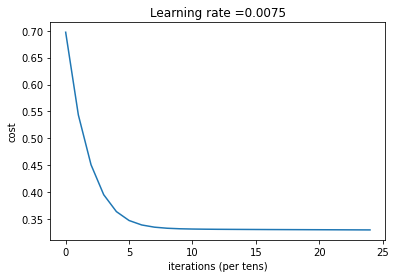

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 17, 33, 1]
Cost after iteration 0: 0.684990
Cost after iteration 100: 0.479324
Cost after iteration 200: 0.383018
Cost after iteration 300: 0.347628
Cost after iteration 400: 0.336865
Cost after iteration 500: 0.333755
Cost after iteration 600: 0.332790
Cost after iteration 700: 0.332413
Cost after iteration 800: 0.332194
Cost after iteration 900: 0.332003
Cost after iteration 1000: 0.331579
Cost after iteration 1100: 0.331245
Cost after iteration 1200: 0.331036
Cost after iteration 1300: 0.330854
Cost after iteration 1400: 0.330680
Cost after iteration 1500: 0.330509
Cost after iteration 1600: 0.330340
Cost after iteration 1700: 0.330173
Cost after iteration 1800: 0.330006
Cost after iteration 1900: 0.329840
Cost after iteration 2000: 0.329674
Cost after iteration 2100: 0.329507
Cost after iteration 2200: 0.329339
Cost after iteration 2300: 0.329169
Cost after 

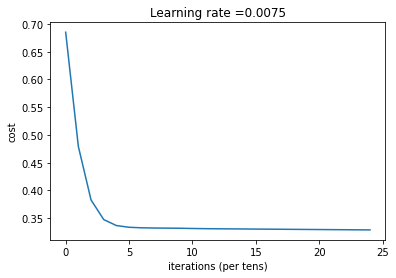

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 17, 33, 1]
Cost after iteration 0: 0.698722
Cost after iteration 100: 0.582014
Cost after iteration 200: 0.504396
Cost after iteration 300: 0.449856
Cost after iteration 400: 0.411294
Cost after iteration 500: 0.384166
Cost after iteration 600: 0.365379
Cost after iteration 700: 0.352671
Cost after iteration 800: 0.344305
Cost after iteration 900: 0.338928
Cost after iteration 1000: 0.335529
Cost after iteration 1100: 0.333388
Cost after iteration 1200: 0.332043
Cost after iteration 1300: 0.331189
Cost after iteration 1400: 0.330643
Cost after iteration 1500: 0.330280
Cost after iteration 1600: 0.330025
Cost after iteration 1700: 0.329834
Cost after iteration 1800: 0.329681
Cost after iteration 1900: 0.329549
Cost after iteration 2000: 0.329432
Cost after iteration 2100: 0.329324
Cost after iteration 2200: 0.329220
Cost after iteration 2300: 0.329119
Cost after 

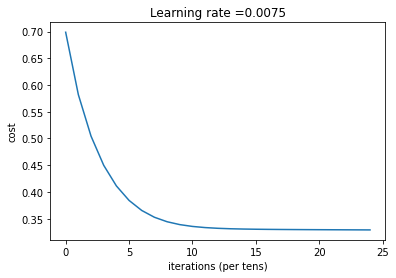

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 17, 33, 1]
Cost after iteration 0: 0.691249
Cost after iteration 100: 0.542357
Cost after iteration 200: 0.447257
Cost after iteration 300: 0.388894
Cost after iteration 400: 0.355846
Cost after iteration 500: 0.340431
Cost after iteration 600: 0.333891
Cost after iteration 700: 0.331200
Cost after iteration 800: 0.330027
Cost after iteration 900: 0.329417
Cost after iteration 1000: 0.328957
Cost after iteration 1100: 0.328550
Cost after iteration 1200: 0.328203
Cost after iteration 1300: 0.327866
Cost after iteration 1400: 0.327504
Cost after iteration 1500: 0.327208
Cost after iteration 1600: 0.326949
Cost after iteration 1700: 0.326709
Cost after iteration 1800: 0.326479
Cost after iteration 1900: 0.326251
Cost after iteration 2000: 0.326017
Cost after iteration 2100: 0.325785
Cost after iteration 2200: 0.325548
Cost after iteration 2300: 0.325307
Cost after 

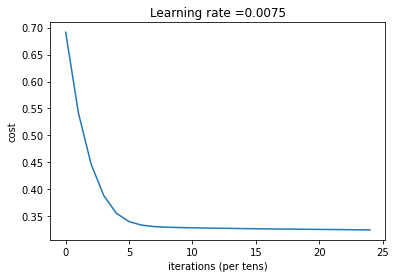

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 25, 33, 1]
Cost after iteration 0: 0.693131
Cost after iteration 100: 0.559055
Cost after iteration 200: 0.450967
Cost after iteration 300: 0.375508
Cost after iteration 400: 0.341213
Cost after iteration 500: 0.331176
Cost after iteration 600: 0.328725
Cost after iteration 700: 0.328003
Cost after iteration 800: 0.327630
Cost after iteration 900: 0.327322
Cost after iteration 1000: 0.327019
Cost after iteration 1100: 0.326710
Cost after iteration 1200: 0.326390
Cost after iteration 1300: 0.326060
Cost after iteration 1400: 0.325717
Cost after iteration 1500: 0.325361
Cost after iteration 1600: 0.324989
Cost after iteration 1700: 0.324577
Cost after iteration 1800: 0.324125
Cost after iteration 1900: 0.323696
Cost after iteration 2000: 0.323246
Cost after iteration 2100: 0.322775
Cost after iteration 2200: 0.322281
Cost after iteration 2300: 0.321760
Cost after i

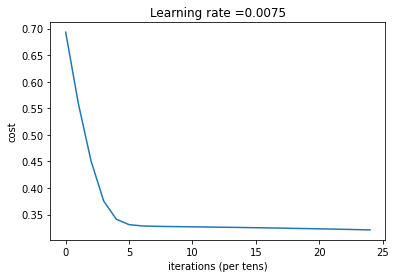

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 25, 33, 1]
Cost after iteration 0: 0.691907
Cost after iteration 100: 0.550796
Cost after iteration 200: 0.459988
Cost after iteration 300: 0.402533
Cost after iteration 400: 0.368485
Cost after iteration 500: 0.349867
Cost after iteration 600: 0.340375
Cost after iteration 700: 0.335777
Cost after iteration 800: 0.333618
Cost after iteration 900: 0.332614
Cost after iteration 1000: 0.332138
Cost after iteration 1100: 0.331899
Cost after iteration 1200: 0.331760
Cost after iteration 1300: 0.331666
Cost after iteration 1400: 0.331587
Cost after iteration 1500: 0.331526
Cost after iteration 1600: 0.331476
Cost after iteration 1700: 0.331433
Cost after iteration 1800: 0.331392
Cost after iteration 1900: 0.331353
Cost after iteration 2000: 0.331314
Cost after iteration 2100: 0.331275
Cost after iteration 2200: 0.331237
Cost after iteration 2300: 0.331198
Cost after i

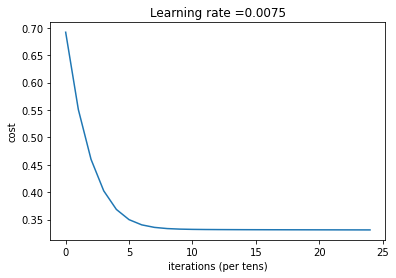

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 25, 33, 1]
Cost after iteration 0: 0.683923
Cost after iteration 100: 0.473676
Cost after iteration 200: 0.376396
Cost after iteration 300: 0.344228
Cost after iteration 400: 0.335607
Cost after iteration 500: 0.333389
Cost after iteration 600: 0.332750
Cost after iteration 700: 0.332490
Cost after iteration 800: 0.332322
Cost after iteration 900: 0.332178
Cost after iteration 1000: 0.332041
Cost after iteration 1100: 0.331907
Cost after iteration 1200: 0.331776
Cost after iteration 1300: 0.331647
Cost after iteration 1400: 0.331518
Cost after iteration 1500: 0.331390
Cost after iteration 1600: 0.331263
Cost after iteration 1700: 0.331137
Cost after iteration 1800: 0.331010
Cost after iteration 1900: 0.330883
Cost after iteration 2000: 0.330756
Cost after iteration 2100: 0.330628
Cost after iteration 2200: 0.330499
Cost after iteration 2300: 0.330369
Cost after 

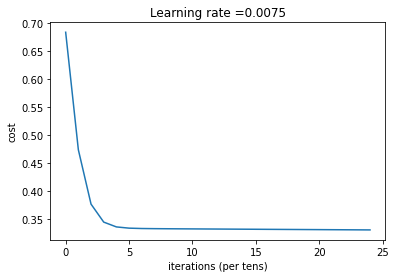

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 25, 33, 1]
Cost after iteration 0: 0.699231
Cost after iteration 100: 0.586023
Cost after iteration 200: 0.511115
Cost after iteration 300: 0.459236
Cost after iteration 400: 0.422695
Cost after iteration 500: 0.396654
Cost after iteration 600: 0.377987
Cost after iteration 700: 0.364578
Cost after iteration 800: 0.354953
Cost after iteration 900: 0.348061
Cost after iteration 1000: 0.343141
Cost after iteration 1100: 0.339637
Cost after iteration 1200: 0.337149
Cost after iteration 1300: 0.335385
Cost after iteration 1400: 0.334134
Cost after iteration 1500: 0.333247
Cost after iteration 1600: 0.332616
Cost after iteration 1700: 0.332166
Cost after iteration 1800: 0.331844
Cost after iteration 1900: 0.331613
Cost after iteration 2000: 0.331447
Cost after iteration 2100: 0.331326
Cost after iteration 2200: 0.331237
Cost after iteration 2300: 0.331169
Cost after 

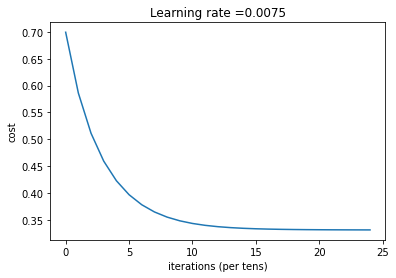

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 25, 33, 1]
Cost after iteration 0: 0.689485
Cost after iteration 100: 0.558159
Cost after iteration 200: 0.470747
Cost after iteration 300: 0.412661
Cost after iteration 400: 0.375890
Cost after iteration 500: 0.354326
Cost after iteration 600: 0.342568
Cost after iteration 700: 0.336489
Cost after iteration 800: 0.333435
Cost after iteration 900: 0.331894
Cost after iteration 1000: 0.331097
Cost after iteration 1100: 0.330664
Cost after iteration 1200: 0.330406
Cost after iteration 1300: 0.330230
Cost after iteration 1400: 0.330096
Cost after iteration 1500: 0.329984
Cost after iteration 1600: 0.329883
Cost after iteration 1700: 0.329790
Cost after iteration 1800: 0.329699
Cost after iteration 1900: 0.329610
Cost after iteration 2000: 0.329520
Cost after iteration 2100: 0.329433
Cost after iteration 2200: 0.329345
Cost after iteration 2300: 0.329257
Cost after 

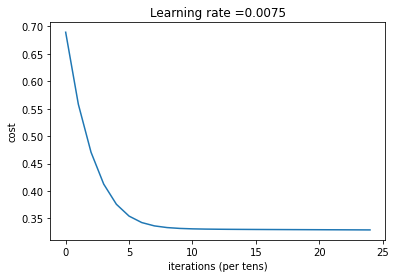

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 25, 33, 1]
Cost after iteration 0: 0.696032
Cost after iteration 100: 0.573121
Cost after iteration 200: 0.491614
Cost after iteration 300: 0.434799
Cost after iteration 400: 0.395640
Cost after iteration 500: 0.369855
Cost after iteration 600: 0.353661
Cost after iteration 700: 0.343929
Cost after iteration 800: 0.338257
Cost after iteration 900: 0.335006
Cost after iteration 1000: 0.333139
Cost after iteration 1100: 0.332047
Cost after iteration 1200: 0.331386
Cost after iteration 1300: 0.330971
Cost after iteration 1400: 0.330692
Cost after iteration 1500: 0.330490
Cost after iteration 1600: 0.330334
Cost after iteration 1700: 0.330203
Cost after iteration 1800: 0.330087
Cost after iteration 1900: 0.329982
Cost after iteration 2000: 0.329882
Cost after iteration 2100: 0.329785
Cost after iteration 2200: 0.329683
Cost after iteration 2300: 0.329549
Cost after 

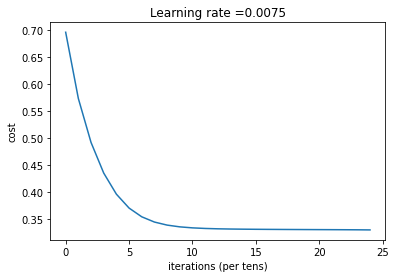

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 25, 33, 1]
Cost after iteration 0: 0.696819
Cost after iteration 100: 0.569699
Cost after iteration 200: 0.485249
Cost after iteration 300: 0.427752
Cost after iteration 400: 0.389216
Cost after iteration 500: 0.364204
Cost after iteration 600: 0.348540
Cost after iteration 700: 0.339195
Cost after iteration 800: 0.333961
Cost after iteration 900: 0.331124
Cost after iteration 1000: 0.329551
Cost after iteration 1100: 0.328645
Cost after iteration 1200: 0.328089
Cost after iteration 1300: 0.327717
Cost after iteration 1400: 0.327442
Cost after iteration 1500: 0.327215
Cost after iteration 1600: 0.327011
Cost after iteration 1700: 0.326821
Cost after iteration 1800: 0.326637
Cost after iteration 1900: 0.326454
Cost after iteration 2000: 0.326267
Cost after iteration 2100: 0.326072
Cost after iteration 2200: 0.325871
Cost after iteration 2300: 0.325659
Cost after 

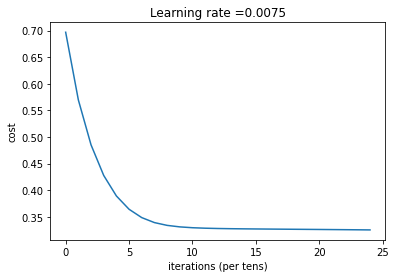

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 25, 33, 1]
Cost after iteration 0: 0.693190
Cost after iteration 100: 0.520795
Cost after iteration 200: 0.418546
Cost after iteration 300: 0.368449
Cost after iteration 400: 0.345939
Cost after iteration 500: 0.336327
Cost after iteration 600: 0.332235
Cost after iteration 700: 0.330391
Cost after iteration 800: 0.329414
Cost after iteration 900: 0.328785
Cost after iteration 1000: 0.328309
Cost after iteration 1100: 0.327909
Cost after iteration 1200: 0.327566
Cost after iteration 1300: 0.327292
Cost after iteration 1400: 0.327046
Cost after iteration 1500: 0.326818
Cost after iteration 1600: 0.326596
Cost after iteration 1700: 0.326376
Cost after iteration 1800: 0.326158
Cost after iteration 1900: 0.325937
Cost after iteration 2000: 0.325715
Cost after iteration 2100: 0.325488
Cost after iteration 2200: 0.325256
Cost after iteration 2300: 0.325019
Cost after 

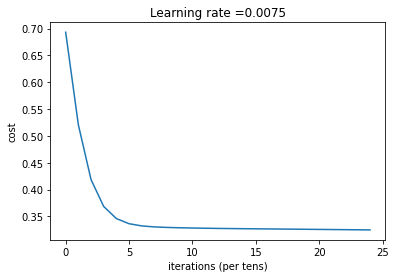

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 33, 33, 1]
Cost after iteration 0: 0.693126
Cost after iteration 100: 0.557941
Cost after iteration 200: 0.436086
Cost after iteration 300: 0.361119
Cost after iteration 400: 0.334853
Cost after iteration 500: 0.329286
Cost after iteration 600: 0.328164
Cost after iteration 700: 0.327757
Cost after iteration 800: 0.327445
Cost after iteration 900: 0.327139
Cost after iteration 1000: 0.326824
Cost after iteration 1100: 0.326497
Cost after iteration 1200: 0.326157
Cost after iteration 1300: 0.325803
Cost after iteration 1400: 0.325434
Cost after iteration 1500: 0.325048
Cost after iteration 1600: 0.324644
Cost after iteration 1700: 0.324220
Cost after iteration 1800: 0.323775
Cost after iteration 1900: 0.323306
Cost after iteration 2000: 0.322813
Cost after iteration 2100: 0.322292
Cost after iteration 2200: 0.321741
Cost after iteration 2300: 0.321157
Cost after i

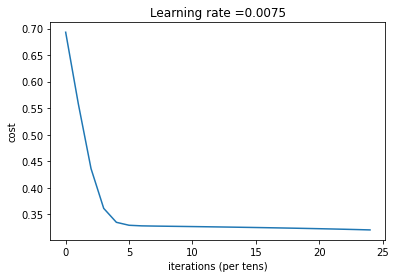

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 33, 33, 1]
Cost after iteration 0: 0.690454
Cost after iteration 100: 0.515123
Cost after iteration 200: 0.413035
Cost after iteration 300: 0.362065
Cost after iteration 400: 0.341266
Cost after iteration 500: 0.333862
Cost after iteration 600: 0.331319
Cost after iteration 700: 0.330359
Cost after iteration 800: 0.329871
Cost after iteration 900: 0.329577
Cost after iteration 1000: 0.329384
Cost after iteration 1100: 0.329235
Cost after iteration 1200: 0.329087
Cost after iteration 1300: 0.328929
Cost after iteration 1400: 0.328779
Cost after iteration 1500: 0.328638
Cost after iteration 1600: 0.328500
Cost after iteration 1700: 0.328364
Cost after iteration 1800: 0.328227
Cost after iteration 1900: 0.328089
Cost after iteration 2000: 0.327949
Cost after iteration 2100: 0.327807
Cost after iteration 2200: 0.327662
Cost after iteration 2300: 0.327513
Cost after i

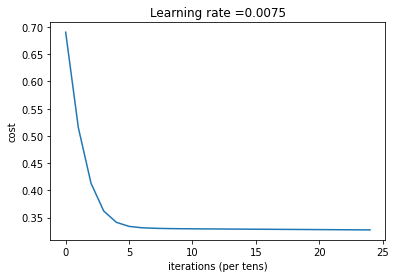

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 33, 33, 1]
Cost after iteration 0: 0.693731
Cost after iteration 100: 0.572853
Cost after iteration 200: 0.488526
Cost after iteration 300: 0.429934
Cost after iteration 400: 0.391260
Cost after iteration 500: 0.366509
Cost after iteration 600: 0.351324
Cost after iteration 700: 0.342379
Cost after iteration 800: 0.337266
Cost after iteration 900: 0.334385
Cost after iteration 1000: 0.332721
Cost after iteration 1100: 0.331692
Cost after iteration 1200: 0.331062
Cost after iteration 1300: 0.330678
Cost after iteration 1400: 0.330431
Cost after iteration 1500: 0.330247
Cost after iteration 1600: 0.330104
Cost after iteration 1700: 0.329991
Cost after iteration 1800: 0.329891
Cost after iteration 1900: 0.329799
Cost after iteration 2000: 0.329712
Cost after iteration 2100: 0.329620
Cost after iteration 2200: 0.329261
Cost after iteration 2300: 0.329108
Cost after 

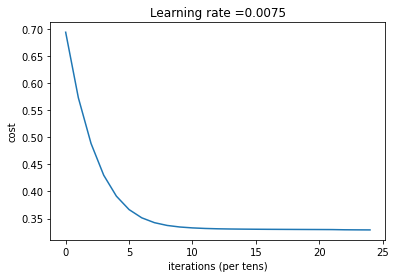

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 33, 33, 1]
Cost after iteration 0: 0.692218
Cost after iteration 100: 0.518905
Cost after iteration 200: 0.416050
Cost after iteration 300: 0.364205
Cost after iteration 400: 0.342662
Cost after iteration 500: 0.334725
Cost after iteration 600: 0.331913
Cost after iteration 700: 0.330846
Cost after iteration 800: 0.330335
Cost after iteration 900: 0.329993
Cost after iteration 1000: 0.329680
Cost after iteration 1100: 0.329401
Cost after iteration 1200: 0.329133
Cost after iteration 1300: 0.328923
Cost after iteration 1400: 0.328742
Cost after iteration 1500: 0.328574
Cost after iteration 1600: 0.328413
Cost after iteration 1700: 0.328255
Cost after iteration 1800: 0.328097
Cost after iteration 1900: 0.327940
Cost after iteration 2000: 0.327782
Cost after iteration 2100: 0.327623
Cost after iteration 2200: 0.327462
Cost after iteration 2300: 0.327298
Cost after 

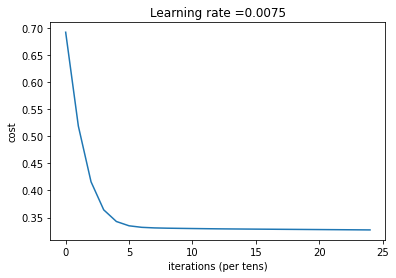

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 33, 33, 1]
Cost after iteration 0: 0.695124
Cost after iteration 100: 0.483443
Cost after iteration 200: 0.388331
Cost after iteration 300: 0.350990
Cost after iteration 400: 0.337525
Cost after iteration 500: 0.333048
Cost after iteration 600: 0.331489
Cost after iteration 700: 0.330853
Cost after iteration 800: 0.330501
Cost after iteration 900: 0.330203
Cost after iteration 1000: 0.329939
Cost after iteration 1100: 0.329699
Cost after iteration 1200: 0.329482
Cost after iteration 1300: 0.329282
Cost after iteration 1400: 0.329091
Cost after iteration 1500: 0.328900
Cost after iteration 1600: 0.328716
Cost after iteration 1700: 0.328536
Cost after iteration 1800: 0.328350
Cost after iteration 1900: 0.328160
Cost after iteration 2000: 0.327975
Cost after iteration 2100: 0.327796
Cost after iteration 2200: 0.327617
Cost after iteration 2300: 0.327434
Cost after 

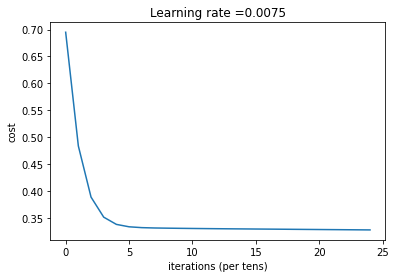

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 33, 33, 1]
Cost after iteration 0: 0.687540
Cost after iteration 100: 0.528508
Cost after iteration 200: 0.426787
Cost after iteration 300: 0.371761
Cost after iteration 400: 0.347220
Cost after iteration 500: 0.337683
Cost after iteration 600: 0.334176
Cost after iteration 700: 0.332855
Cost after iteration 800: 0.332306
Cost after iteration 900: 0.332022
Cost after iteration 1000: 0.331820
Cost after iteration 1100: 0.331659
Cost after iteration 1200: 0.331519
Cost after iteration 1300: 0.331387
Cost after iteration 1400: 0.331257
Cost after iteration 1500: 0.331127
Cost after iteration 1600: 0.330998
Cost after iteration 1700: 0.330867
Cost after iteration 1800: 0.330732
Cost after iteration 1900: 0.330588
Cost after iteration 2000: 0.330439
Cost after iteration 2100: 0.330295
Cost after iteration 2200: 0.330156
Cost after iteration 2300: 0.330021
Cost after 

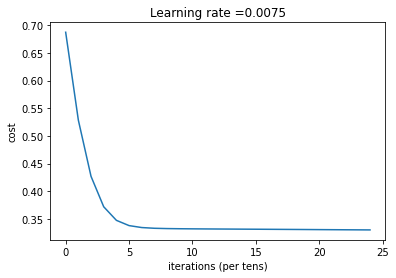

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 33, 33, 1]
Cost after iteration 0: 0.691844
Cost after iteration 100: 0.563983
Cost after iteration 200: 0.476227
Cost after iteration 300: 0.416766
Cost after iteration 400: 0.378412
Cost after iteration 500: 0.355593
Cost after iteration 600: 0.343055
Cost after iteration 700: 0.336572
Cost after iteration 800: 0.333332
Cost after iteration 900: 0.331720
Cost after iteration 1000: 0.330896
Cost after iteration 1100: 0.330438
Cost after iteration 1200: 0.330154
Cost after iteration 1300: 0.329951
Cost after iteration 1400: 0.329788
Cost after iteration 1500: 0.329646
Cost after iteration 1600: 0.329515
Cost after iteration 1700: 0.329389
Cost after iteration 1800: 0.329263
Cost after iteration 1900: 0.329134
Cost after iteration 2000: 0.329004
Cost after iteration 2100: 0.328871
Cost after iteration 2200: 0.328733
Cost after iteration 2300: 0.328590
Cost after 

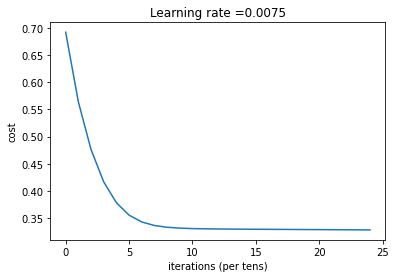

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 33, 33, 1]
Cost after iteration 0: 0.690361
Cost after iteration 100: 0.560764
Cost after iteration 200: 0.473164
Cost after iteration 300: 0.413757
Cost after iteration 400: 0.375954
Cost after iteration 500: 0.353854
Cost after iteration 600: 0.341913
Cost after iteration 700: 0.335834
Cost after iteration 800: 0.332834
Cost after iteration 900: 0.331343
Cost after iteration 1000: 0.330565
Cost after iteration 1100: 0.330116
Cost after iteration 1200: 0.329818
Cost after iteration 1300: 0.329597
Cost after iteration 1400: 0.329422
Cost after iteration 1500: 0.329266
Cost after iteration 1600: 0.329118
Cost after iteration 1700: 0.328973
Cost after iteration 1800: 0.328826
Cost after iteration 1900: 0.328677
Cost after iteration 2000: 0.328523
Cost after iteration 2100: 0.328357
Cost after iteration 2200: 0.328181
Cost after iteration 2300: 0.328004
Cost after 

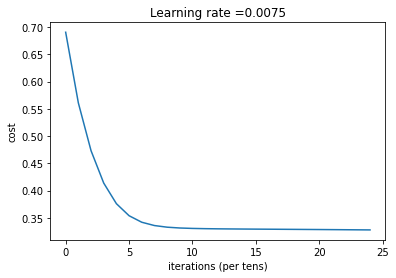

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 41, 33, 1]
Cost after iteration 0: 0.693067
Cost after iteration 100: 0.434584
Cost after iteration 200: 0.339301
Cost after iteration 300: 0.328156
Cost after iteration 400: 0.326927
Cost after iteration 500: 0.326394
Cost after iteration 600: 0.325888
Cost after iteration 700: 0.325364
Cost after iteration 800: 0.324815
Cost after iteration 900: 0.324238
Cost after iteration 1000: 0.323557
Cost after iteration 1100: 0.322906
Cost after iteration 1200: 0.322220
Cost after iteration 1300: 0.321493
Cost after iteration 1400: 0.320721
Cost after iteration 1500: 0.319899
Cost after iteration 1600: 0.319022
Cost after iteration 1700: 0.318085
Cost after iteration 1800: 0.317080
Cost after iteration 1900: 0.316001
Cost after iteration 2000: 0.314841
Cost after iteration 2100: 0.313592
Cost after iteration 2200: 0.312243
Cost after iteration 2300: 0.310721
Cost after i

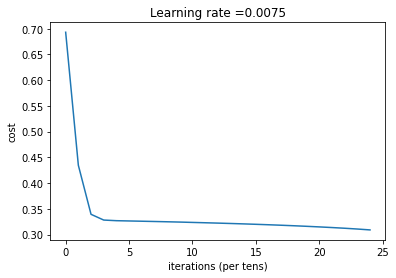

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 41, 33, 1]
Cost after iteration 0: 0.686270
Cost after iteration 100: 0.492993
Cost after iteration 200: 0.390819
Cost after iteration 300: 0.349298
Cost after iteration 400: 0.336365
Cost after iteration 500: 0.332407
Cost after iteration 600: 0.330941
Cost after iteration 700: 0.330270
Cost after iteration 800: 0.329867
Cost after iteration 900: 0.329582
Cost after iteration 1000: 0.329335
Cost after iteration 1100: 0.329101
Cost after iteration 1200: 0.328871
Cost after iteration 1300: 0.328641
Cost after iteration 1400: 0.328408
Cost after iteration 1500: 0.328171
Cost after iteration 1600: 0.327929
Cost after iteration 1700: 0.327680
Cost after iteration 1800: 0.327420
Cost after iteration 1900: 0.327152
Cost after iteration 2000: 0.326868
Cost after iteration 2100: 0.326562
Cost after iteration 2200: 0.326255
Cost after iteration 2300: 0.325944
Cost after i

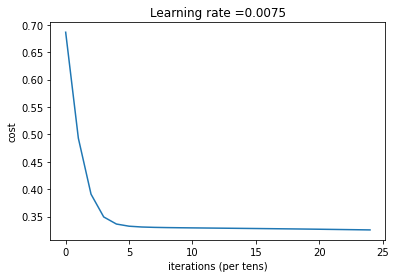

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 41, 33, 1]
Cost after iteration 0: 0.699215
Cost after iteration 100: 0.554419
Cost after iteration 200: 0.460710
Cost after iteration 300: 0.402335
Cost after iteration 400: 0.368150
Cost after iteration 500: 0.349636
Cost after iteration 600: 0.340229
Cost after iteration 700: 0.335633
Cost after iteration 800: 0.333387
Cost after iteration 900: 0.332093
Cost after iteration 1000: 0.331379
Cost after iteration 1100: 0.331005
Cost after iteration 1200: 0.330794
Cost after iteration 1300: 0.330655
Cost after iteration 1400: 0.330547
Cost after iteration 1500: 0.330457
Cost after iteration 1600: 0.330374
Cost after iteration 1700: 0.330294
Cost after iteration 1800: 0.330215
Cost after iteration 1900: 0.330137
Cost after iteration 2000: 0.330058
Cost after iteration 2100: 0.329978
Cost after iteration 2200: 0.329897
Cost after iteration 2300: 0.329815
Cost after 

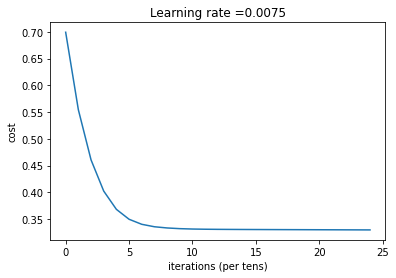

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 41, 33, 1]
Cost after iteration 0: 0.691907
Cost after iteration 100: 0.572909
Cost after iteration 200: 0.488137
Cost after iteration 300: 0.429620
Cost after iteration 400: 0.390219
Cost after iteration 500: 0.364889
Cost after iteration 600: 0.349553
Cost after iteration 700: 0.340780
Cost after iteration 800: 0.335972
Cost after iteration 900: 0.333404
Cost after iteration 1000: 0.332041
Cost after iteration 1100: 0.331305
Cost after iteration 1200: 0.330883
Cost after iteration 1300: 0.330614
Cost after iteration 1400: 0.330422
Cost after iteration 1500: 0.330276
Cost after iteration 1600: 0.330157
Cost after iteration 1700: 0.330051
Cost after iteration 1800: 0.329945
Cost after iteration 1900: 0.329780
Cost after iteration 2000: 0.329599
Cost after iteration 2100: 0.329486
Cost after iteration 2200: 0.329390
Cost after iteration 2300: 0.329299
Cost after 

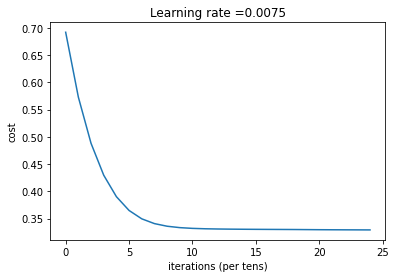

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 41, 33, 1]
Cost after iteration 0: 0.697527
Cost after iteration 100: 0.562155
Cost after iteration 200: 0.474308
Cost after iteration 300: 0.413863
Cost after iteration 400: 0.375255
Cost after iteration 500: 0.353109
Cost after iteration 600: 0.341485
Cost after iteration 700: 0.335724
Cost after iteration 800: 0.332945
Cost after iteration 900: 0.331599
Cost after iteration 1000: 0.330919
Cost after iteration 1100: 0.330542
Cost after iteration 1200: 0.330298
Cost after iteration 1300: 0.330110
Cost after iteration 1400: 0.329946
Cost after iteration 1500: 0.329797
Cost after iteration 1600: 0.329664
Cost after iteration 1700: 0.329537
Cost after iteration 1800: 0.329392
Cost after iteration 1900: 0.329188
Cost after iteration 2000: 0.329028
Cost after iteration 2100: 0.328895
Cost after iteration 2200: 0.328770
Cost after iteration 2300: 0.328647
Cost after 

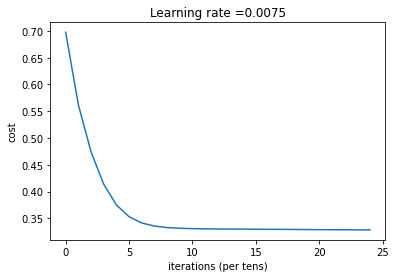

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 41, 33, 1]
Cost after iteration 0: 0.694406
Cost after iteration 100: 0.546083
Cost after iteration 200: 0.453713
Cost after iteration 300: 0.396056
Cost after iteration 400: 0.362899
Cost after iteration 500: 0.345708
Cost after iteration 600: 0.337331
Cost after iteration 700: 0.333367
Cost after iteration 800: 0.331501
Cost after iteration 900: 0.330597
Cost after iteration 1000: 0.330126
Cost after iteration 1100: 0.329849
Cost after iteration 1200: 0.329657
Cost after iteration 1300: 0.329504
Cost after iteration 1400: 0.329367
Cost after iteration 1500: 0.329239
Cost after iteration 1600: 0.329115
Cost after iteration 1700: 0.328990
Cost after iteration 1800: 0.328862
Cost after iteration 1900: 0.328727
Cost after iteration 2000: 0.328588
Cost after iteration 2100: 0.328443
Cost after iteration 2200: 0.328300
Cost after iteration 2300: 0.328162
Cost after 

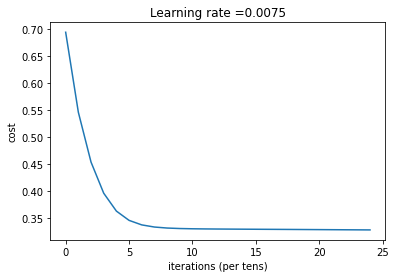

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 41, 33, 1]
Cost after iteration 0: 0.690747
Cost after iteration 100: 0.528292
Cost after iteration 200: 0.430407
Cost after iteration 300: 0.375661
Cost after iteration 400: 0.349085
Cost after iteration 500: 0.337601
Cost after iteration 600: 0.332908
Cost after iteration 700: 0.330967
Cost after iteration 800: 0.330090
Cost after iteration 900: 0.329627
Cost after iteration 1000: 0.329326
Cost after iteration 1100: 0.329090
Cost after iteration 1200: 0.328882
Cost after iteration 1300: 0.328690
Cost after iteration 1400: 0.328501
Cost after iteration 1500: 0.328316
Cost after iteration 1600: 0.328133
Cost after iteration 1700: 0.327951
Cost after iteration 1800: 0.327768
Cost after iteration 1900: 0.327581
Cost after iteration 2000: 0.327391
Cost after iteration 2100: 0.327196
Cost after iteration 2200: 0.326992
Cost after iteration 2300: 0.326777
Cost after 

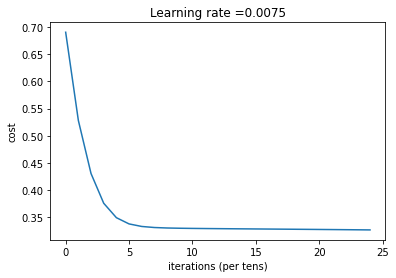

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 41, 33, 1]
Cost after iteration 0: 0.693575
Cost after iteration 100: 0.504447
Cost after iteration 200: 0.405325
Cost after iteration 300: 0.360061
Cost after iteration 400: 0.341636
Cost after iteration 500: 0.334517
Cost after iteration 600: 0.331724
Cost after iteration 700: 0.330527
Cost after iteration 800: 0.329860
Cost after iteration 900: 0.329387
Cost after iteration 1000: 0.329018
Cost after iteration 1100: 0.328683
Cost after iteration 1200: 0.328385
Cost after iteration 1300: 0.328111
Cost after iteration 1400: 0.327869
Cost after iteration 1500: 0.327637
Cost after iteration 1600: 0.327412
Cost after iteration 1700: 0.327180
Cost after iteration 1800: 0.326944
Cost after iteration 1900: 0.326711
Cost after iteration 2000: 0.326477
Cost after iteration 2100: 0.326242
Cost after iteration 2200: 0.326004
Cost after iteration 2300: 0.325764
Cost after 

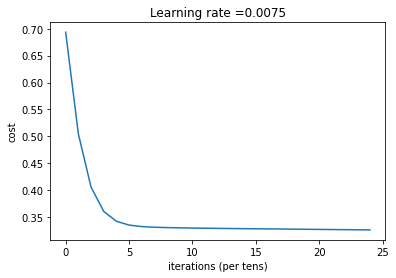

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 49, 33, 1]
Cost after iteration 0: 0.693174
Cost after iteration 100: 0.549583
Cost after iteration 200: 0.460448
Cost after iteration 300: 0.405092
Cost after iteration 400: 0.372073
Cost after iteration 500: 0.353260
Cost after iteration 600: 0.342739
Cost after iteration 700: 0.335488
Cost after iteration 800: 0.331961
Cost after iteration 900: 0.330158
Cost after iteration 1000: 0.329132
Cost after iteration 1100: 0.328489
Cost after iteration 1200: 0.328030
Cost after iteration 1300: 0.327653
Cost after iteration 1400: 0.327312
Cost after iteration 1500: 0.326984
Cost after iteration 1600: 0.326655
Cost after iteration 1700: 0.326319
Cost after iteration 1800: 0.325974
Cost after iteration 1900: 0.325618
Cost after iteration 2000: 0.325246
Cost after iteration 2100: 0.324859
Cost after iteration 2200: 0.324454
Cost after iteration 2300: 0.324032
Cost after i

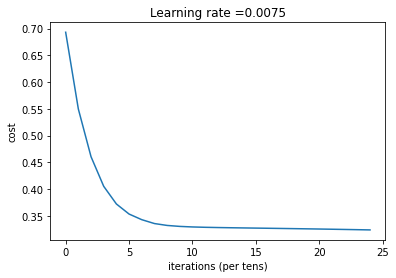

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 49, 33, 1]
Cost after iteration 0: 0.704368
Cost after iteration 100: 0.577162
Cost after iteration 200: 0.492646
Cost after iteration 300: 0.434891
Cost after iteration 400: 0.396365
Cost after iteration 500: 0.371187
Cost after iteration 600: 0.355241
Cost after iteration 700: 0.345451
Cost after iteration 800: 0.339595
Cost after iteration 900: 0.336160
Cost after iteration 1000: 0.334175
Cost after iteration 1100: 0.333036
Cost after iteration 1200: 0.332384
Cost after iteration 1300: 0.332007
Cost after iteration 1400: 0.331778
Cost after iteration 1500: 0.331622
Cost after iteration 1600: 0.331510
Cost after iteration 1700: 0.331417
Cost after iteration 1800: 0.331344
Cost after iteration 1900: 0.331301
Cost after iteration 2000: 0.331271
Cost after iteration 2100: 0.331246
Cost after iteration 2200: 0.331223
Cost after iteration 2300: 0.331198
Cost after i

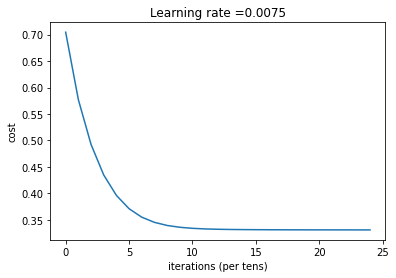

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 49, 33, 1]
Cost after iteration 0: 0.690055
Cost after iteration 100: 0.538889
Cost after iteration 200: 0.440959
Cost after iteration 300: 0.383532
Cost after iteration 400: 0.354077
Cost after iteration 500: 0.340721
Cost after iteration 600: 0.335117
Cost after iteration 700: 0.332809
Cost after iteration 800: 0.331814
Cost after iteration 900: 0.331315
Cost after iteration 1000: 0.331040
Cost after iteration 1100: 0.330861
Cost after iteration 1200: 0.330721
Cost after iteration 1300: 0.330597
Cost after iteration 1400: 0.330480
Cost after iteration 1500: 0.330366
Cost after iteration 1600: 0.330254
Cost after iteration 1700: 0.330142
Cost after iteration 1800: 0.330031
Cost after iteration 1900: 0.329919
Cost after iteration 2000: 0.329807
Cost after iteration 2100: 0.329695
Cost after iteration 2200: 0.329579
Cost after iteration 2300: 0.329458
Cost after 

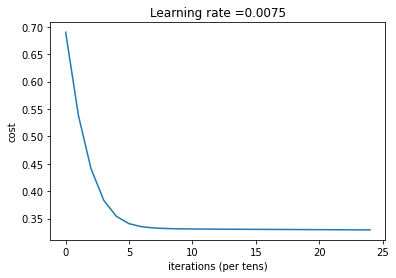

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 49, 33, 1]
Cost after iteration 0: 0.695279
Cost after iteration 100: 0.537921
Cost after iteration 200: 0.441582
Cost after iteration 300: 0.384003
Cost after iteration 400: 0.354036
Cost after iteration 500: 0.340315
Cost after iteration 600: 0.334462
Cost after iteration 700: 0.331988
Cost after iteration 800: 0.330890
Cost after iteration 900: 0.330303
Cost after iteration 1000: 0.329855
Cost after iteration 1100: 0.329522
Cost after iteration 1200: 0.329307
Cost after iteration 1300: 0.329134
Cost after iteration 1400: 0.328981
Cost after iteration 1500: 0.328837
Cost after iteration 1600: 0.328697
Cost after iteration 1700: 0.328557
Cost after iteration 1800: 0.328419
Cost after iteration 1900: 0.328279
Cost after iteration 2000: 0.328139
Cost after iteration 2100: 0.327996
Cost after iteration 2200: 0.327780
Cost after iteration 2300: 0.327357
Cost after 

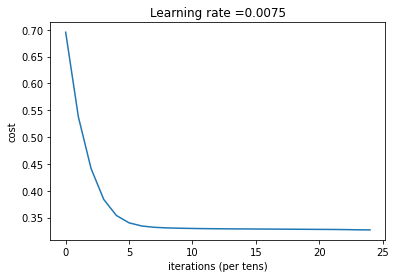

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 49, 33, 1]
Cost after iteration 0: 0.695382
Cost after iteration 100: 0.567448
Cost after iteration 200: 0.483766
Cost after iteration 300: 0.425885
Cost after iteration 400: 0.387370
Cost after iteration 500: 0.363041
Cost after iteration 600: 0.348420
Cost after iteration 700: 0.340003
Cost after iteration 800: 0.335312
Cost after iteration 900: 0.332748
Cost after iteration 1000: 0.331346
Cost after iteration 1100: 0.330557
Cost after iteration 1200: 0.330073
Cost after iteration 1300: 0.329744
Cost after iteration 1400: 0.329484
Cost after iteration 1500: 0.329281
Cost after iteration 1600: 0.329120
Cost after iteration 1700: 0.328977
Cost after iteration 1800: 0.328850
Cost after iteration 1900: 0.328731
Cost after iteration 2000: 0.328609
Cost after iteration 2100: 0.328472
Cost after iteration 2200: 0.328325
Cost after iteration 2300: 0.328164
Cost after 

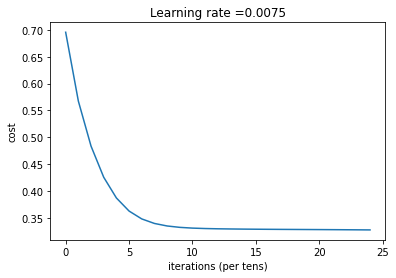

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 49, 33, 1]
Cost after iteration 0: 0.695874
Cost after iteration 100: 0.576673
Cost after iteration 200: 0.495953
Cost after iteration 300: 0.439281
Cost after iteration 400: 0.400025
Cost after iteration 500: 0.373568
Cost after iteration 600: 0.356437
Cost after iteration 700: 0.345795
Cost after iteration 800: 0.339421
Cost after iteration 900: 0.335699
Cost after iteration 1000: 0.333559
Cost after iteration 1100: 0.332331
Cost after iteration 1200: 0.331618
Cost after iteration 1300: 0.331192
Cost after iteration 1400: 0.330924
Cost after iteration 1500: 0.330737
Cost after iteration 1600: 0.330597
Cost after iteration 1700: 0.330486
Cost after iteration 1800: 0.330383
Cost after iteration 1900: 0.330277
Cost after iteration 2000: 0.330130
Cost after iteration 2100: 0.329974
Cost after iteration 2200: 0.329855
Cost after iteration 2300: 0.329760
Cost after 

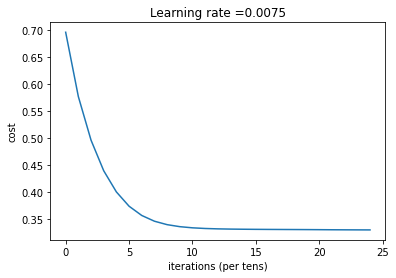

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 49, 33, 1]
Cost after iteration 0: 0.691133
Cost after iteration 100: 0.572863
Cost after iteration 200: 0.486479
Cost after iteration 300: 0.427021
Cost after iteration 400: 0.387588
Cost after iteration 500: 0.362881
Cost after iteration 600: 0.348171
Cost after iteration 700: 0.339764
Cost after iteration 800: 0.335092
Cost after iteration 900: 0.332524
Cost after iteration 1000: 0.331053
Cost after iteration 1100: 0.330160
Cost after iteration 1200: 0.329593
Cost after iteration 1300: 0.329198
Cost after iteration 1400: 0.328900
Cost after iteration 1500: 0.328663
Cost after iteration 1600: 0.328462
Cost after iteration 1700: 0.328275
Cost after iteration 1800: 0.328098
Cost after iteration 1900: 0.327928
Cost after iteration 2000: 0.327760
Cost after iteration 2100: 0.327597
Cost after iteration 2200: 0.327438
Cost after iteration 2300: 0.327279
Cost after 

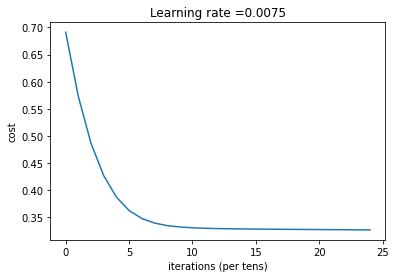

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 49, 33, 1]
Cost after iteration 0: 0.694279
Cost after iteration 100: 0.572037
Cost after iteration 200: 0.483314
Cost after iteration 300: 0.424581
Cost after iteration 400: 0.386620
Cost after iteration 500: 0.363001
Cost after iteration 600: 0.348951
Cost after iteration 700: 0.340907
Cost after iteration 800: 0.336418
Cost after iteration 900: 0.333943
Cost after iteration 1000: 0.332572
Cost after iteration 1100: 0.331792
Cost after iteration 1200: 0.331326
Cost after iteration 1300: 0.331016
Cost after iteration 1400: 0.330777
Cost after iteration 1500: 0.330603
Cost after iteration 1600: 0.330471
Cost after iteration 1700: 0.330362
Cost after iteration 1800: 0.330264
Cost after iteration 1900: 0.330170
Cost after iteration 2000: 0.330077
Cost after iteration 2100: 0.329984
Cost after iteration 2200: 0.329891
Cost after iteration 2300: 0.329801
Cost after 

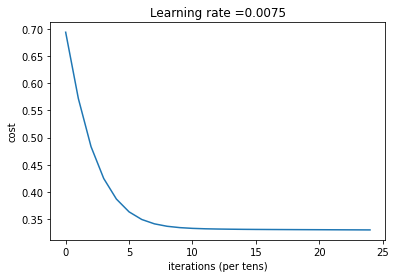

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 57, 33, 1]
Cost after iteration 0: 0.693129
Cost after iteration 100: 0.549797
Cost after iteration 200: 0.460621
Cost after iteration 300: 0.400063
Cost after iteration 400: 0.363974
Cost after iteration 500: 0.344680
Cost after iteration 600: 0.335552
Cost after iteration 700: 0.331622
Cost after iteration 800: 0.329980
Cost after iteration 900: 0.329252
Cost after iteration 1000: 0.328861
Cost after iteration 1100: 0.328584
Cost after iteration 1200: 0.328341
Cost after iteration 1300: 0.328100
Cost after iteration 1400: 0.327834
Cost after iteration 1500: 0.327487
Cost after iteration 1600: 0.327178
Cost after iteration 1700: 0.326868
Cost after iteration 1800: 0.326543
Cost after iteration 1900: 0.326194
Cost after iteration 2000: 0.325803
Cost after iteration 2100: 0.325310
Cost after iteration 2200: 0.324817
Cost after iteration 2300: 0.324327
Cost after i

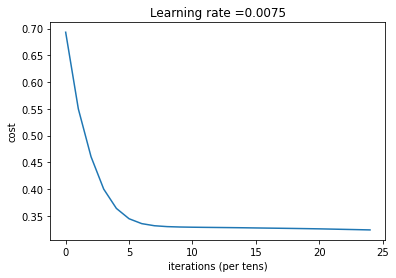

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 57, 33, 1]
Cost after iteration 0: 0.691789
Cost after iteration 100: 0.560303
Cost after iteration 200: 0.466979
Cost after iteration 300: 0.401494
Cost after iteration 400: 0.361995
Cost after iteration 500: 0.342770
Cost after iteration 600: 0.334939
Cost after iteration 700: 0.332041
Cost after iteration 800: 0.330964
Cost after iteration 900: 0.330500
Cost after iteration 1000: 0.330214
Cost after iteration 1100: 0.329980
Cost after iteration 1200: 0.329818
Cost after iteration 1300: 0.329675
Cost after iteration 1400: 0.329537
Cost after iteration 1500: 0.329405
Cost after iteration 1600: 0.329277
Cost after iteration 1700: 0.329150
Cost after iteration 1800: 0.329023
Cost after iteration 1900: 0.328891
Cost after iteration 2000: 0.328749
Cost after iteration 2100: 0.328605
Cost after iteration 2200: 0.328461
Cost after iteration 2300: 0.328317
Cost after i

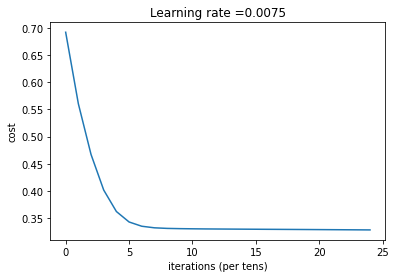

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 57, 33, 1]
Cost after iteration 0: 0.697923
Cost after iteration 100: 0.557183
Cost after iteration 200: 0.468456
Cost after iteration 300: 0.410860
Cost after iteration 400: 0.374978
Cost after iteration 500: 0.354067
Cost after iteration 600: 0.342647
Cost after iteration 700: 0.336716
Cost after iteration 800: 0.333733
Cost after iteration 900: 0.332253
Cost after iteration 1000: 0.331505
Cost after iteration 1100: 0.331108
Cost after iteration 1200: 0.330876
Cost after iteration 1300: 0.330715
Cost after iteration 1400: 0.330578
Cost after iteration 1500: 0.330431
Cost after iteration 1600: 0.330301
Cost after iteration 1700: 0.330204
Cost after iteration 1800: 0.330118
Cost after iteration 1900: 0.330037
Cost after iteration 2000: 0.329955
Cost after iteration 2100: 0.329874
Cost after iteration 2200: 0.329793
Cost after iteration 2300: 0.329712
Cost after 

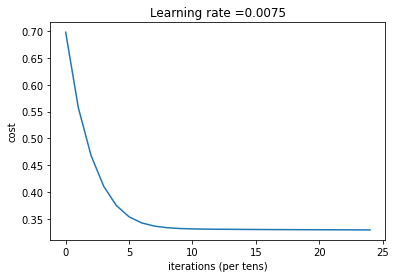

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 57, 33, 1]
Cost after iteration 0: 0.691934
Cost after iteration 100: 0.534901
Cost after iteration 200: 0.434182
Cost after iteration 300: 0.375436
Cost after iteration 400: 0.347117
Cost after iteration 500: 0.335677
Cost after iteration 600: 0.331486
Cost after iteration 700: 0.329963
Cost after iteration 800: 0.329335
Cost after iteration 900: 0.329005
Cost after iteration 1000: 0.328773
Cost after iteration 1100: 0.328580
Cost after iteration 1200: 0.328401
Cost after iteration 1300: 0.328228
Cost after iteration 1400: 0.328057
Cost after iteration 1500: 0.327887
Cost after iteration 1600: 0.327716
Cost after iteration 1700: 0.327543
Cost after iteration 1800: 0.327369
Cost after iteration 1900: 0.327190
Cost after iteration 2000: 0.327006
Cost after iteration 2100: 0.326817
Cost after iteration 2200: 0.326622
Cost after iteration 2300: 0.326420
Cost after 

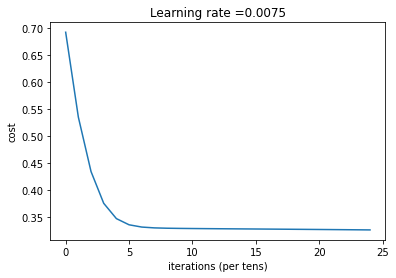

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 57, 33, 1]
Cost after iteration 0: 0.696189
Cost after iteration 100: 0.535801
Cost after iteration 200: 0.436003
Cost after iteration 300: 0.379591
Cost after iteration 400: 0.351399
Cost after iteration 500: 0.338765
Cost after iteration 600: 0.333436
Cost after iteration 700: 0.331206
Cost after iteration 800: 0.330233
Cost after iteration 900: 0.329745
Cost after iteration 1000: 0.329450
Cost after iteration 1100: 0.329240
Cost after iteration 1200: 0.329066
Cost after iteration 1300: 0.328905
Cost after iteration 1400: 0.328748
Cost after iteration 1500: 0.328579
Cost after iteration 1600: 0.328390
Cost after iteration 1700: 0.328178
Cost after iteration 1800: 0.327991
Cost after iteration 1900: 0.327825
Cost after iteration 2000: 0.327662
Cost after iteration 2100: 0.327501
Cost after iteration 2200: 0.327340
Cost after iteration 2300: 0.327176
Cost after 

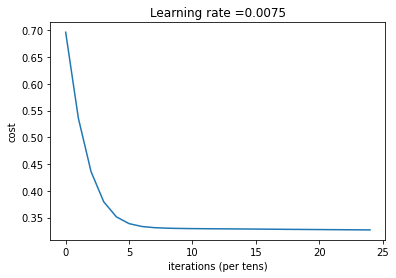

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 57, 33, 1]
Cost after iteration 0: 0.690523
Cost after iteration 100: 0.556997
Cost after iteration 200: 0.465618
Cost after iteration 300: 0.406220
Cost after iteration 400: 0.370268
Cost after iteration 500: 0.350379
Cost after iteration 600: 0.340204
Cost after iteration 700: 0.335252
Cost after iteration 800: 0.332874
Cost after iteration 900: 0.331694
Cost after iteration 1000: 0.331046
Cost after iteration 1100: 0.330628
Cost after iteration 1200: 0.330339
Cost after iteration 1300: 0.330127
Cost after iteration 1400: 0.329958
Cost after iteration 1500: 0.329811
Cost after iteration 1600: 0.329676
Cost after iteration 1700: 0.329549
Cost after iteration 1800: 0.329423
Cost after iteration 1900: 0.329299
Cost after iteration 2000: 0.329176
Cost after iteration 2100: 0.329052
Cost after iteration 2200: 0.328928
Cost after iteration 2300: 0.328802
Cost after 

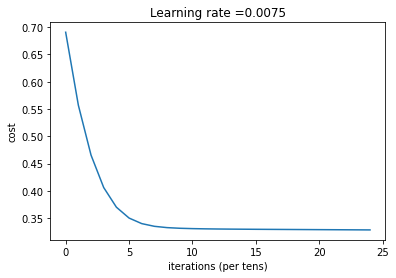

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 57, 33, 1]
Cost after iteration 0: 0.693421
Cost after iteration 100: 0.569405
Cost after iteration 200: 0.483480
Cost after iteration 300: 0.424102
Cost after iteration 400: 0.385926
Cost after iteration 500: 0.361714
Cost after iteration 600: 0.347358
Cost after iteration 700: 0.339344
Cost after iteration 800: 0.334930
Cost after iteration 900: 0.332476
Cost after iteration 1000: 0.331076
Cost after iteration 1100: 0.330231
Cost after iteration 1200: 0.329676
Cost after iteration 1300: 0.329278
Cost after iteration 1400: 0.328962
Cost after iteration 1500: 0.328701
Cost after iteration 1600: 0.328479
Cost after iteration 1700: 0.328285
Cost after iteration 1800: 0.328110
Cost after iteration 1900: 0.327945
Cost after iteration 2000: 0.327785
Cost after iteration 2100: 0.327628
Cost after iteration 2200: 0.327470
Cost after iteration 2300: 0.327310
Cost after 

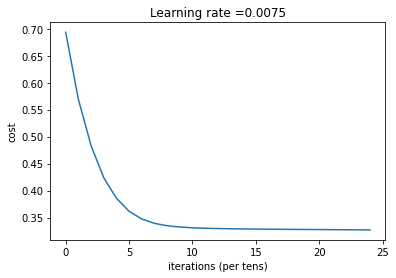

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 57, 33, 1]
Cost after iteration 0: 0.693103
Cost after iteration 100: 0.547439
Cost after iteration 200: 0.447452
Cost after iteration 300: 0.386546
Cost after iteration 400: 0.354042
Cost after iteration 500: 0.338488
Cost after iteration 600: 0.331786
Cost after iteration 700: 0.329045
Cost after iteration 800: 0.327837
Cost after iteration 900: 0.327213
Cost after iteration 1000: 0.326811
Cost after iteration 1100: 0.326497
Cost after iteration 1200: 0.326218
Cost after iteration 1300: 0.325945
Cost after iteration 1400: 0.325674
Cost after iteration 1500: 0.325403
Cost after iteration 1600: 0.325138
Cost after iteration 1700: 0.324875
Cost after iteration 1800: 0.324615
Cost after iteration 1900: 0.324349
Cost after iteration 2000: 0.324076
Cost after iteration 2100: 0.323794
Cost after iteration 2200: 0.323500
Cost after iteration 2300: 0.323195
Cost after 

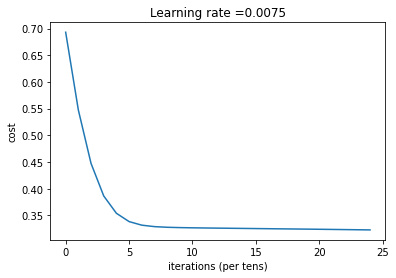

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 1, 41, 1]
Cost after iteration 0: 0.693143
Cost after iteration 100: 0.558399
Cost after iteration 200: 0.455629
Cost after iteration 300: 0.379312
Cost after iteration 400: 0.342080
Cost after iteration 500: 0.332487
Cost after iteration 600: 0.330541
Cost after iteration 700: 0.330134
Cost after iteration 800: 0.330006
Cost after iteration 900: 0.329925
Cost after iteration 1000: 0.329851
Cost after iteration 1100: 0.329776
Cost after iteration 1200: 0.329700
Cost after iteration 1300: 0.329621
Cost after iteration 1400: 0.329540
Cost after iteration 1500: 0.329457
Cost after iteration 1600: 0.329371
Cost after iteration 1700: 0.329282
Cost after iteration 1800: 0.329190
Cost after iteration 1900: 0.329095
Cost after iteration 2000: 0.328998
Cost after iteration 2100: 0.328896
Cost after iteration 2200: 0.328791
Cost after iteration 2300: 0.328683
Cost after it

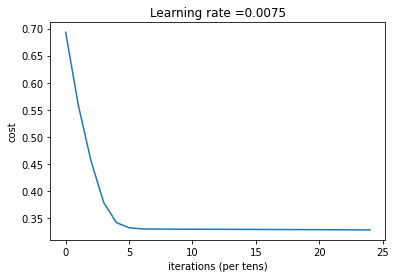

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 1, 41, 1]
Cost after iteration 0: 0.692612
Cost after iteration 100: 0.540607
Cost after iteration 200: 0.428142
Cost after iteration 300: 0.357069
Cost after iteration 400: 0.335719
Cost after iteration 500: 0.331917
Cost after iteration 600: 0.331241
Cost after iteration 700: 0.330916
Cost after iteration 800: 0.330340
Cost after iteration 900: 0.329812
Cost after iteration 1000: 0.329410
Cost after iteration 1100: 0.329090
Cost after iteration 1200: 0.328871
Cost after iteration 1300: 0.328681
Cost after iteration 1400: 0.328496
Cost after iteration 1500: 0.328308
Cost after iteration 1600: 0.328115
Cost after iteration 1700: 0.327916
Cost after iteration 1800: 0.327706
Cost after iteration 1900: 0.327492
Cost after iteration 2000: 0.327268
Cost after iteration 2100: 0.327035
Cost after iteration 2200: 0.326792
Cost after iteration 2300: 0.326537
Cost after it

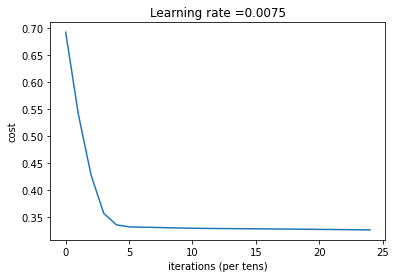

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 1, 41, 1]
Cost after iteration 0: 0.693449
Cost after iteration 100: 0.577491
Cost after iteration 200: 0.495940
Cost after iteration 300: 0.439507
Cost after iteration 400: 0.399270
Cost after iteration 500: 0.370560
Cost after iteration 600: 0.351608
Cost after iteration 700: 0.340626
Cost after iteration 800: 0.335108
Cost after iteration 900: 0.332567
Cost after iteration 1000: 0.331392
Cost after iteration 1100: 0.330833
Cost after iteration 1200: 0.330544
Cost after iteration 1300: 0.330387
Cost after iteration 1400: 0.330279
Cost after iteration 1500: 0.330188
Cost after iteration 1600: 0.330104
Cost after iteration 1700: 0.330020
Cost after iteration 1800: 0.329936
Cost after iteration 1900: 0.329852
Cost after iteration 2000: 0.329765
Cost after iteration 2100: 0.329677
Cost after iteration 2200: 0.329587
Cost after iteration 2300: 0.329495
Cost after i

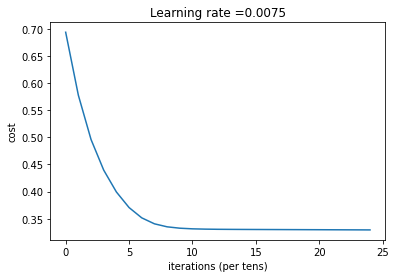

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 1, 41, 1]
Cost after iteration 0: 0.693305
Cost after iteration 100: 0.580416
Cost after iteration 200: 0.504889
Cost after iteration 300: 0.453097
Cost after iteration 400: 0.417062
Cost after iteration 500: 0.391797
Cost after iteration 600: 0.374021
Cost after iteration 700: 0.361500
Cost after iteration 800: 0.352677
Cost after iteration 900: 0.346461
Cost after iteration 1000: 0.342082
Cost after iteration 1100: 0.338997
Cost after iteration 1200: 0.336823
Cost after iteration 1300: 0.335290
Cost after iteration 1400: 0.334209
Cost after iteration 1500: 0.333446
Cost after iteration 1600: 0.332907
Cost after iteration 1700: 0.332527
Cost after iteration 1800: 0.332258
Cost after iteration 1900: 0.332068
Cost after iteration 2000: 0.331934
Cost after iteration 2100: 0.331839
Cost after iteration 2200: 0.331771
Cost after iteration 2300: 0.331724
Cost after i

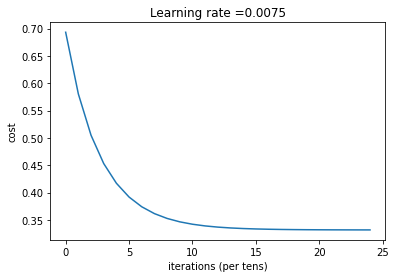

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 1, 41, 1]
Cost after iteration 0: 0.693035
Cost after iteration 100: 0.549950
Cost after iteration 200: 0.423847
Cost after iteration 300: 0.348588
Cost after iteration 400: 0.332601
Cost after iteration 500: 0.330271
Cost after iteration 600: 0.329632
Cost after iteration 700: 0.329182
Cost after iteration 800: 0.328602
Cost after iteration 900: 0.328105
Cost after iteration 1000: 0.327711
Cost after iteration 1100: 0.327341
Cost after iteration 1200: 0.326975
Cost after iteration 1300: 0.326602
Cost after iteration 1400: 0.326218
Cost after iteration 1500: 0.325823
Cost after iteration 1600: 0.325421
Cost after iteration 1700: 0.324973
Cost after iteration 1800: 0.324541
Cost after iteration 1900: 0.324090
Cost after iteration 2000: 0.323615
Cost after iteration 2100: 0.323113
Cost after iteration 2200: 0.322582
Cost after iteration 2300: 0.322022
Cost after i

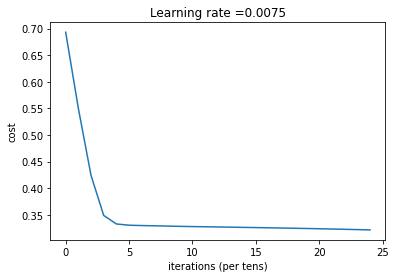

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 1, 41, 1]
Cost after iteration 0: 0.690930
Cost after iteration 100: 0.551537
Cost after iteration 200: 0.420272
Cost after iteration 300: 0.349948
Cost after iteration 400: 0.334772
Cost after iteration 500: 0.332155
Cost after iteration 600: 0.331223
Cost after iteration 700: 0.330501
Cost after iteration 800: 0.329936
Cost after iteration 900: 0.329481
Cost after iteration 1000: 0.329096
Cost after iteration 1100: 0.328723
Cost after iteration 1200: 0.328348
Cost after iteration 1300: 0.327966
Cost after iteration 1400: 0.327562
Cost after iteration 1500: 0.327166
Cost after iteration 1600: 0.326785
Cost after iteration 1700: 0.326435
Cost after iteration 1800: 0.326094
Cost after iteration 1900: 0.325750
Cost after iteration 2000: 0.325397
Cost after iteration 2100: 0.325031
Cost after iteration 2200: 0.324652
Cost after iteration 2300: 0.324259
Cost after i

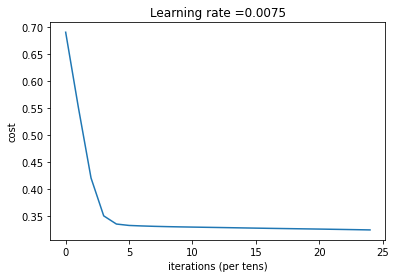

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 1, 41, 1]
Cost after iteration 0: 0.691186
Cost after iteration 100: 0.533661
Cost after iteration 200: 0.413923
Cost after iteration 300: 0.348616
Cost after iteration 400: 0.331982
Cost after iteration 500: 0.329018
Cost after iteration 600: 0.328310
Cost after iteration 700: 0.327916
Cost after iteration 800: 0.327541
Cost after iteration 900: 0.327113
Cost after iteration 1000: 0.326605
Cost after iteration 1100: 0.326106
Cost after iteration 1200: 0.325674
Cost after iteration 1300: 0.325271
Cost after iteration 1400: 0.324861
Cost after iteration 1500: 0.324432
Cost after iteration 1600: 0.323982
Cost after iteration 1700: 0.323510
Cost after iteration 1800: 0.323010
Cost after iteration 1900: 0.322482
Cost after iteration 2000: 0.321918
Cost after iteration 2100: 0.321321
Cost after iteration 2200: 0.320683
Cost after iteration 2300: 0.320002
Cost after i

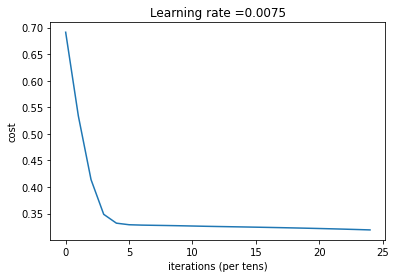

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 1, 41, 1]
Cost after iteration 0: 0.691794
Cost after iteration 100: 0.509780
Cost after iteration 200: 0.381243
Cost after iteration 300: 0.338252
Cost after iteration 400: 0.330210
Cost after iteration 500: 0.328509
Cost after iteration 600: 0.327830
Cost after iteration 700: 0.327315
Cost after iteration 800: 0.326853
Cost after iteration 900: 0.326439
Cost after iteration 1000: 0.326051
Cost after iteration 1100: 0.325674
Cost after iteration 1200: 0.325300
Cost after iteration 1300: 0.324922
Cost after iteration 1400: 0.324536
Cost after iteration 1500: 0.324138
Cost after iteration 1600: 0.323726
Cost after iteration 1700: 0.323297
Cost after iteration 1800: 0.322849
Cost after iteration 1900: 0.322381
Cost after iteration 2000: 0.321892
Cost after iteration 2100: 0.321377
Cost after iteration 2200: 0.320836
Cost after iteration 2300: 0.320264
Cost after i

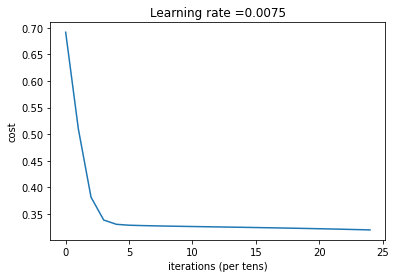

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 9, 41, 1]
Cost after iteration 0: 0.693111
Cost after iteration 100: 0.564570
Cost after iteration 200: 0.440097
Cost after iteration 300: 0.351389
Cost after iteration 400: 0.330421
Cost after iteration 500: 0.327726
Cost after iteration 600: 0.327126
Cost after iteration 700: 0.326709
Cost after iteration 800: 0.326298
Cost after iteration 900: 0.325873
Cost after iteration 1000: 0.325433
Cost after iteration 1100: 0.324975
Cost after iteration 1200: 0.324497
Cost after iteration 1300: 0.323999
Cost after iteration 1400: 0.323478
Cost after iteration 1500: 0.322931
Cost after iteration 1600: 0.322357
Cost after iteration 1700: 0.321752
Cost after iteration 1800: 0.321115
Cost after iteration 1900: 0.320441
Cost after iteration 2000: 0.319728
Cost after iteration 2100: 0.318972
Cost after iteration 2200: 0.318169
Cost after iteration 2300: 0.317314
Cost after it

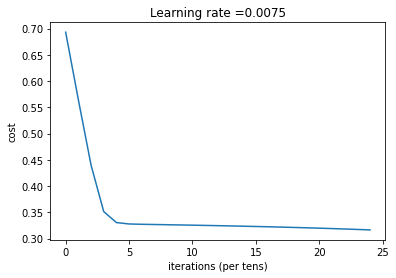

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 9, 41, 1]
Cost after iteration 0: 0.695728
Cost after iteration 100: 0.558495
Cost after iteration 200: 0.468588
Cost after iteration 300: 0.407799
Cost after iteration 400: 0.369822
Cost after iteration 500: 0.349032
Cost after iteration 600: 0.338931
Cost after iteration 700: 0.334412
Cost after iteration 800: 0.332479
Cost after iteration 900: 0.331654
Cost after iteration 1000: 0.331285
Cost after iteration 1100: 0.331094
Cost after iteration 1200: 0.330964
Cost after iteration 1300: 0.330856
Cost after iteration 1400: 0.330770
Cost after iteration 1500: 0.330697
Cost after iteration 1600: 0.330620
Cost after iteration 1700: 0.330540
Cost after iteration 1800: 0.330446
Cost after iteration 1900: 0.330325
Cost after iteration 2000: 0.330199
Cost after iteration 2100: 0.330084
Cost after iteration 2200: 0.329974
Cost after iteration 2300: 0.329877
Cost after it

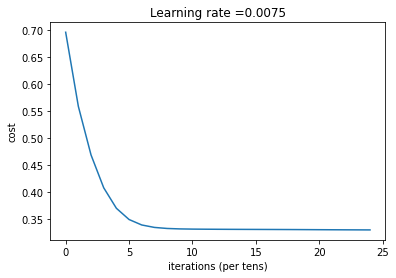

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 9, 41, 1]
Cost after iteration 0: 0.691414
Cost after iteration 100: 0.486715
Cost after iteration 200: 0.382365
Cost after iteration 300: 0.344784
Cost after iteration 400: 0.334354
Cost after iteration 500: 0.331693
Cost after iteration 600: 0.330927
Cost after iteration 700: 0.330605
Cost after iteration 800: 0.330391
Cost after iteration 900: 0.330205
Cost after iteration 1000: 0.330037
Cost after iteration 1100: 0.329889
Cost after iteration 1200: 0.329745
Cost after iteration 1300: 0.329605
Cost after iteration 1400: 0.329466
Cost after iteration 1500: 0.329325
Cost after iteration 1600: 0.329184
Cost after iteration 1700: 0.329042
Cost after iteration 1800: 0.328897
Cost after iteration 1900: 0.328751
Cost after iteration 2000: 0.328602
Cost after iteration 2100: 0.328451
Cost after iteration 2200: 0.328298
Cost after iteration 2300: 0.328142
Cost after i

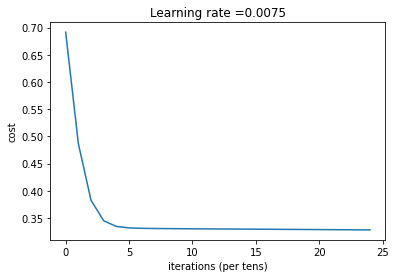

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 9, 41, 1]
Cost after iteration 0: 0.689433
Cost after iteration 100: 0.546991
Cost after iteration 200: 0.449501
Cost after iteration 300: 0.386842
Cost after iteration 400: 0.353629
Cost after iteration 500: 0.338987
Cost after iteration 600: 0.333171
Cost after iteration 700: 0.331026
Cost after iteration 800: 0.330191
Cost after iteration 900: 0.329796
Cost after iteration 1000: 0.329564
Cost after iteration 1100: 0.329391
Cost after iteration 1200: 0.329241
Cost after iteration 1300: 0.329102
Cost after iteration 1400: 0.328968
Cost after iteration 1500: 0.328833
Cost after iteration 1600: 0.328698
Cost after iteration 1700: 0.328563
Cost after iteration 1800: 0.328426
Cost after iteration 1900: 0.328286
Cost after iteration 2000: 0.328143
Cost after iteration 2100: 0.327999
Cost after iteration 2200: 0.327854
Cost after iteration 2300: 0.327707
Cost after i

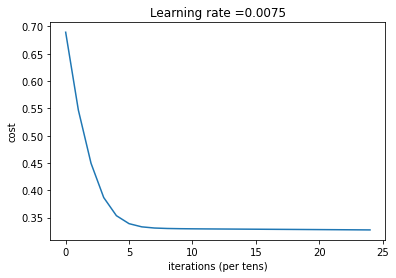

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 9, 41, 1]
Cost after iteration 0: 0.694371
Cost after iteration 100: 0.570145
Cost after iteration 200: 0.489219
Cost after iteration 300: 0.434781
Cost after iteration 400: 0.398039
Cost after iteration 500: 0.373524
Cost after iteration 600: 0.357492
Cost after iteration 700: 0.347245
Cost after iteration 800: 0.340828
Cost after iteration 900: 0.336861
Cost after iteration 1000: 0.334436
Cost after iteration 1100: 0.332958
Cost after iteration 1200: 0.332057
Cost after iteration 1300: 0.331499
Cost after iteration 1400: 0.331145
Cost after iteration 1500: 0.330910
Cost after iteration 1600: 0.330742
Cost after iteration 1700: 0.330615
Cost after iteration 1800: 0.330515
Cost after iteration 1900: 0.330430
Cost after iteration 2000: 0.330353
Cost after iteration 2100: 0.330278
Cost after iteration 2200: 0.330205
Cost after iteration 2300: 0.330118
Cost after i

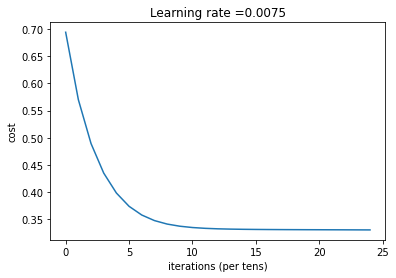

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 9, 41, 1]
Cost after iteration 0: 0.685230
Cost after iteration 100: 0.491721
Cost after iteration 200: 0.385803
Cost after iteration 300: 0.345490
Cost after iteration 400: 0.334157
Cost after iteration 500: 0.331229
Cost after iteration 600: 0.330348
Cost after iteration 700: 0.329946
Cost after iteration 800: 0.329651
Cost after iteration 900: 0.329380
Cost after iteration 1000: 0.329118
Cost after iteration 1100: 0.328872
Cost after iteration 1200: 0.328636
Cost after iteration 1300: 0.328402
Cost after iteration 1400: 0.328169
Cost after iteration 1500: 0.327935
Cost after iteration 1600: 0.327698
Cost after iteration 1700: 0.327460
Cost after iteration 1800: 0.327225
Cost after iteration 1900: 0.326990
Cost after iteration 2000: 0.326754
Cost after iteration 2100: 0.326515
Cost after iteration 2200: 0.326274
Cost after iteration 2300: 0.326028
Cost after i

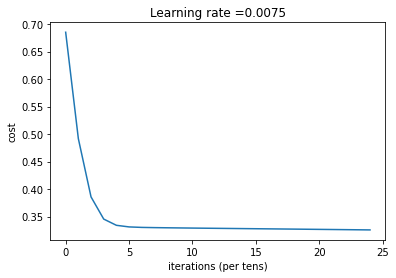

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 9, 41, 1]
Cost after iteration 0: 0.694563
Cost after iteration 100: 0.557230
Cost after iteration 200: 0.463361
Cost after iteration 300: 0.400370
Cost after iteration 400: 0.362890
Cost after iteration 500: 0.343580
Cost after iteration 600: 0.334416
Cost after iteration 700: 0.330369
Cost after iteration 800: 0.328621
Cost after iteration 900: 0.327740
Cost after iteration 1000: 0.327157
Cost after iteration 1100: 0.326722
Cost after iteration 1200: 0.326375
Cost after iteration 1300: 0.326090
Cost after iteration 1400: 0.325839
Cost after iteration 1500: 0.325602
Cost after iteration 1600: 0.325369
Cost after iteration 1700: 0.325133
Cost after iteration 1800: 0.324898
Cost after iteration 1900: 0.324666
Cost after iteration 2000: 0.324430
Cost after iteration 2100: 0.324188
Cost after iteration 2200: 0.323941
Cost after iteration 2300: 0.323687
Cost after i

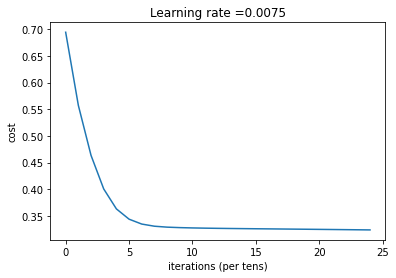

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 9, 41, 1]
Cost after iteration 0: 0.696560
Cost after iteration 100: 0.569557
Cost after iteration 200: 0.486268
Cost after iteration 300: 0.428367
Cost after iteration 400: 0.388887
Cost after iteration 500: 0.363289
Cost after iteration 600: 0.347874
Cost after iteration 700: 0.339227
Cost after iteration 800: 0.334610
Cost after iteration 900: 0.332190
Cost after iteration 1000: 0.330888
Cost after iteration 1100: 0.330150
Cost after iteration 1200: 0.329689
Cost after iteration 1300: 0.329351
Cost after iteration 1400: 0.329039
Cost after iteration 1500: 0.328732
Cost after iteration 1600: 0.328499
Cost after iteration 1700: 0.328295
Cost after iteration 1800: 0.328109
Cost after iteration 1900: 0.327936
Cost after iteration 2000: 0.327768
Cost after iteration 2100: 0.327601
Cost after iteration 2200: 0.327433
Cost after iteration 2300: 0.327260
Cost after i

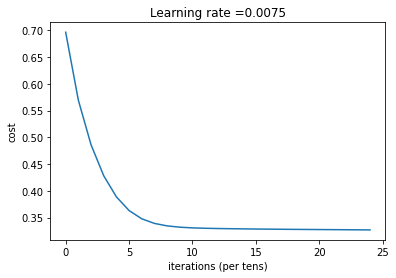

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 17, 41, 1]
Cost after iteration 0: 0.693186
Cost after iteration 100: 0.556668
Cost after iteration 200: 0.472174
Cost after iteration 300: 0.418990
Cost after iteration 400: 0.385574
Cost after iteration 500: 0.364648
Cost after iteration 600: 0.351627
Cost after iteration 700: 0.343710
Cost after iteration 800: 0.338900
Cost after iteration 900: 0.335999
Cost after iteration 1000: 0.334252
Cost after iteration 1100: 0.333201
Cost after iteration 1200: 0.332568
Cost after iteration 1300: 0.332186
Cost after iteration 1400: 0.331957
Cost after iteration 1500: 0.331818
Cost after iteration 1600: 0.331735
Cost after iteration 1700: 0.331685
Cost after iteration 1800: 0.331654
Cost after iteration 1900: 0.331636
Cost after iteration 2000: 0.331625
Cost after iteration 2100: 0.331618
Cost after iteration 2200: 0.331614
Cost after iteration 2300: 0.331612
Cost after i

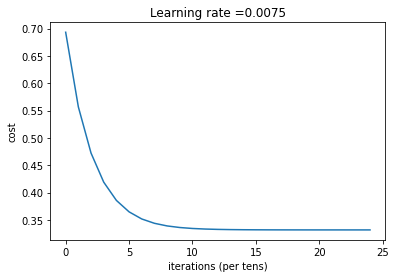

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 17, 41, 1]
Cost after iteration 0: 0.694574
Cost after iteration 100: 0.509106
Cost after iteration 200: 0.408881
Cost after iteration 300: 0.360041
Cost after iteration 400: 0.340298
Cost after iteration 500: 0.333180
Cost after iteration 600: 0.330675
Cost after iteration 700: 0.329747
Cost after iteration 800: 0.329349
Cost after iteration 900: 0.329116
Cost after iteration 1000: 0.328932
Cost after iteration 1100: 0.328764
Cost after iteration 1200: 0.328609
Cost after iteration 1300: 0.328462
Cost after iteration 1400: 0.328318
Cost after iteration 1500: 0.328172
Cost after iteration 1600: 0.328028
Cost after iteration 1700: 0.327887
Cost after iteration 1800: 0.327741
Cost after iteration 1900: 0.327593
Cost after iteration 2000: 0.327443
Cost after iteration 2100: 0.327291
Cost after iteration 2200: 0.327135
Cost after iteration 2300: 0.326975
Cost after i

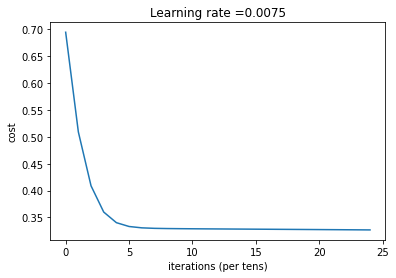

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 17, 41, 1]
Cost after iteration 0: 0.696544
Cost after iteration 100: 0.542494
Cost after iteration 200: 0.442258
Cost after iteration 300: 0.383813
Cost after iteration 400: 0.353931
Cost after iteration 500: 0.340368
Cost after iteration 600: 0.334650
Cost after iteration 700: 0.332261
Cost after iteration 800: 0.331197
Cost after iteration 900: 0.330626
Cost after iteration 1000: 0.330222
Cost after iteration 1100: 0.329945
Cost after iteration 1200: 0.329728
Cost after iteration 1300: 0.329545
Cost after iteration 1400: 0.329373
Cost after iteration 1500: 0.329206
Cost after iteration 1600: 0.329028
Cost after iteration 1700: 0.328839
Cost after iteration 1800: 0.328651
Cost after iteration 1900: 0.328462
Cost after iteration 2000: 0.328272
Cost after iteration 2100: 0.328080
Cost after iteration 2200: 0.327887
Cost after iteration 2300: 0.327684
Cost after 

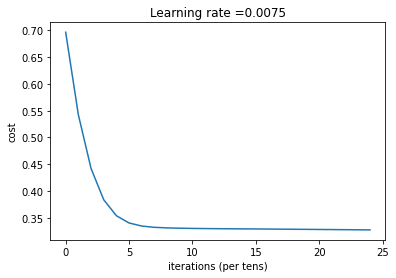

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 17, 41, 1]
Cost after iteration 0: 0.693031
Cost after iteration 100: 0.557664
Cost after iteration 200: 0.467226
Cost after iteration 300: 0.404745
Cost after iteration 400: 0.365513
Cost after iteration 500: 0.344926
Cost after iteration 600: 0.335547
Cost after iteration 700: 0.331598
Cost after iteration 800: 0.329959
Cost after iteration 900: 0.329241
Cost after iteration 1000: 0.328880
Cost after iteration 1100: 0.328651
Cost after iteration 1200: 0.328469
Cost after iteration 1300: 0.328309
Cost after iteration 1400: 0.328156
Cost after iteration 1500: 0.328007
Cost after iteration 1600: 0.327858
Cost after iteration 1700: 0.327708
Cost after iteration 1800: 0.327555
Cost after iteration 1900: 0.327401
Cost after iteration 2000: 0.327243
Cost after iteration 2100: 0.327083
Cost after iteration 2200: 0.326919
Cost after iteration 2300: 0.326750
Cost after 

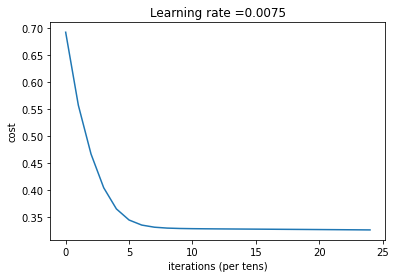

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 17, 41, 1]
Cost after iteration 0: 0.689339
Cost after iteration 100: 0.541553
Cost after iteration 200: 0.445682
Cost after iteration 300: 0.387588
Cost after iteration 400: 0.356324
Cost after iteration 500: 0.341471
Cost after iteration 600: 0.335004
Cost after iteration 700: 0.332301
Cost after iteration 800: 0.331154
Cost after iteration 900: 0.330633
Cost after iteration 1000: 0.330359
Cost after iteration 1100: 0.330186
Cost after iteration 1200: 0.330055
Cost after iteration 1300: 0.329940
Cost after iteration 1400: 0.329833
Cost after iteration 1500: 0.329727
Cost after iteration 1600: 0.329624
Cost after iteration 1700: 0.329522
Cost after iteration 1800: 0.329420
Cost after iteration 1900: 0.329317
Cost after iteration 2000: 0.329213
Cost after iteration 2100: 0.329106
Cost after iteration 2200: 0.329000
Cost after iteration 2300: 0.328894
Cost after 

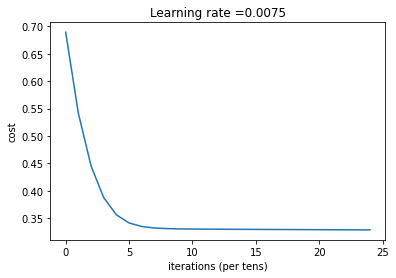

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 17, 41, 1]
Cost after iteration 0: 0.697981
Cost after iteration 100: 0.571897
Cost after iteration 200: 0.489910
Cost after iteration 300: 0.434582
Cost after iteration 400: 0.397329
Cost after iteration 500: 0.372623
Cost after iteration 600: 0.356663
Cost after iteration 700: 0.346582
Cost after iteration 800: 0.340332
Cost after iteration 900: 0.336506
Cost after iteration 1000: 0.334179
Cost after iteration 1100: 0.332757
Cost after iteration 1200: 0.331877
Cost after iteration 1300: 0.331323
Cost after iteration 1400: 0.330965
Cost after iteration 1500: 0.330723
Cost after iteration 1600: 0.330551
Cost after iteration 1700: 0.330419
Cost after iteration 1800: 0.330310
Cost after iteration 1900: 0.330213
Cost after iteration 2000: 0.330121
Cost after iteration 2100: 0.330033
Cost after iteration 2200: 0.329947
Cost after iteration 2300: 0.329859
Cost after 

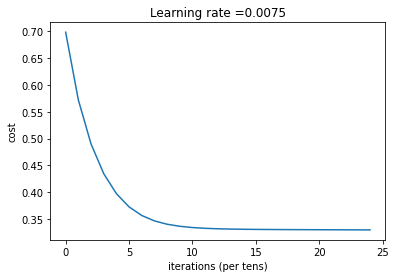

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 17, 41, 1]
Cost after iteration 0: 0.692774
Cost after iteration 100: 0.568491
Cost after iteration 200: 0.480321
Cost after iteration 300: 0.417287
Cost after iteration 400: 0.375708
Cost after iteration 500: 0.351750
Cost after iteration 600: 0.339515
Cost after iteration 700: 0.333715
Cost after iteration 800: 0.331046
Cost after iteration 900: 0.329788
Cost after iteration 1000: 0.329128
Cost after iteration 1100: 0.328725
Cost after iteration 1200: 0.328428
Cost after iteration 1300: 0.328167
Cost after iteration 1400: 0.327921
Cost after iteration 1500: 0.327683
Cost after iteration 1600: 0.327470
Cost after iteration 1700: 0.327269
Cost after iteration 1800: 0.327073
Cost after iteration 1900: 0.326881
Cost after iteration 2000: 0.326688
Cost after iteration 2100: 0.326493
Cost after iteration 2200: 0.326296
Cost after iteration 2300: 0.326095
Cost after 

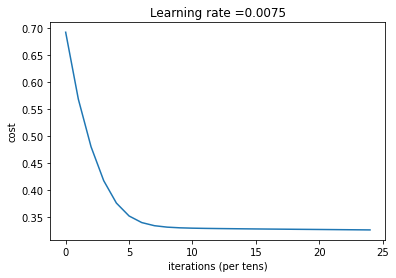

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 17, 41, 1]
Cost after iteration 0: 0.696443
Cost after iteration 100: 0.571188
Cost after iteration 200: 0.487903
Cost after iteration 300: 0.429287
Cost after iteration 400: 0.389403
Cost after iteration 500: 0.363852
Cost after iteration 600: 0.348626
Cost after iteration 700: 0.340154
Cost after iteration 800: 0.335664
Cost after iteration 900: 0.333322
Cost after iteration 1000: 0.332064
Cost after iteration 1100: 0.331328
Cost after iteration 1200: 0.330817
Cost after iteration 1300: 0.330399
Cost after iteration 1400: 0.330109
Cost after iteration 1500: 0.329890
Cost after iteration 1600: 0.329709
Cost after iteration 1700: 0.329546
Cost after iteration 1800: 0.329394
Cost after iteration 1900: 0.329259
Cost after iteration 2000: 0.329131
Cost after iteration 2100: 0.329006
Cost after iteration 2200: 0.328882
Cost after iteration 2300: 0.328759
Cost after 

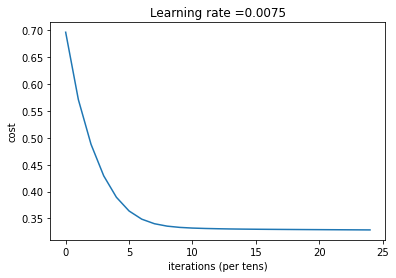

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 25, 41, 1]
Cost after iteration 0: 0.693154
Cost after iteration 100: 0.565261
Cost after iteration 200: 0.478775
Cost after iteration 300: 0.412562
Cost after iteration 400: 0.368044
Cost after iteration 500: 0.343984
Cost after iteration 600: 0.333924
Cost after iteration 700: 0.330435
Cost after iteration 800: 0.329281
Cost after iteration 900: 0.328824
Cost after iteration 1000: 0.328559
Cost after iteration 1100: 0.328343
Cost after iteration 1200: 0.328133
Cost after iteration 1300: 0.327909
Cost after iteration 1400: 0.327662
Cost after iteration 1500: 0.327425
Cost after iteration 1600: 0.327180
Cost after iteration 1700: 0.326925
Cost after iteration 1800: 0.326656
Cost after iteration 1900: 0.326352
Cost after iteration 2000: 0.326054
Cost after iteration 2100: 0.325743
Cost after iteration 2200: 0.325416
Cost after iteration 2300: 0.325071
Cost after i

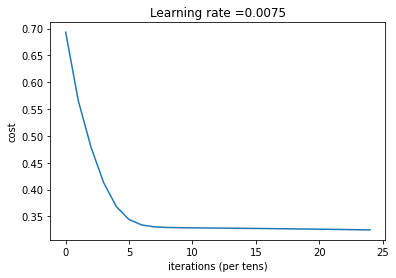

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 25, 41, 1]
Cost after iteration 0: 0.693992
Cost after iteration 100: 0.557972
Cost after iteration 200: 0.465462
Cost after iteration 300: 0.402107
Cost after iteration 400: 0.364061
Cost after iteration 500: 0.344865
Cost after iteration 600: 0.336424
Cost after iteration 700: 0.332974
Cost after iteration 800: 0.331579
Cost after iteration 900: 0.330999
Cost after iteration 1000: 0.330704
Cost after iteration 1100: 0.330538
Cost after iteration 1200: 0.330421
Cost after iteration 1300: 0.330321
Cost after iteration 1400: 0.330227
Cost after iteration 1500: 0.330134
Cost after iteration 1600: 0.330042
Cost after iteration 1700: 0.329948
Cost after iteration 1800: 0.329852
Cost after iteration 1900: 0.329755
Cost after iteration 2000: 0.329657
Cost after iteration 2100: 0.329559
Cost after iteration 2200: 0.329459
Cost after iteration 2300: 0.329358
Cost after i

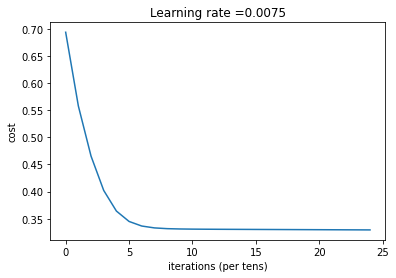

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 25, 41, 1]
Cost after iteration 0: 0.699591
Cost after iteration 100: 0.557856
Cost after iteration 200: 0.469130
Cost after iteration 300: 0.412213
Cost after iteration 400: 0.376593
Cost after iteration 500: 0.355653
Cost after iteration 600: 0.344054
Cost after iteration 700: 0.337836
Cost after iteration 800: 0.334563
Cost after iteration 900: 0.332849
Cost after iteration 1000: 0.331940
Cost after iteration 1100: 0.331439
Cost after iteration 1200: 0.331145
Cost after iteration 1300: 0.330955
Cost after iteration 1400: 0.330803
Cost after iteration 1500: 0.330695
Cost after iteration 1600: 0.330617
Cost after iteration 1700: 0.330555
Cost after iteration 1800: 0.330500
Cost after iteration 1900: 0.330449
Cost after iteration 2000: 0.330400
Cost after iteration 2100: 0.330354
Cost after iteration 2200: 0.330309
Cost after iteration 2300: 0.330262
Cost after 

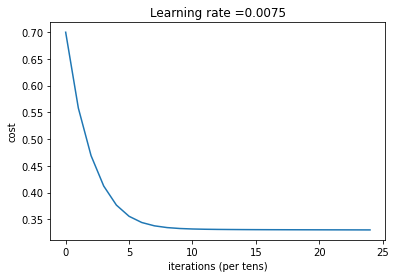

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 25, 41, 1]
Cost after iteration 0: 0.694824
Cost after iteration 100: 0.536825
Cost after iteration 200: 0.438823
Cost after iteration 300: 0.381677
Cost after iteration 400: 0.352708
Cost after iteration 500: 0.339736
Cost after iteration 600: 0.334267
Cost after iteration 700: 0.331971
Cost after iteration 800: 0.330963
Cost after iteration 900: 0.330488
Cost after iteration 1000: 0.330224
Cost after iteration 1100: 0.330046
Cost after iteration 1200: 0.329904
Cost after iteration 1300: 0.329764
Cost after iteration 1400: 0.329634
Cost after iteration 1500: 0.329512
Cost after iteration 1600: 0.329397
Cost after iteration 1700: 0.329280
Cost after iteration 1800: 0.329167
Cost after iteration 1900: 0.329059
Cost after iteration 2000: 0.328952
Cost after iteration 2100: 0.328845
Cost after iteration 2200: 0.328736
Cost after iteration 2300: 0.328628
Cost after 

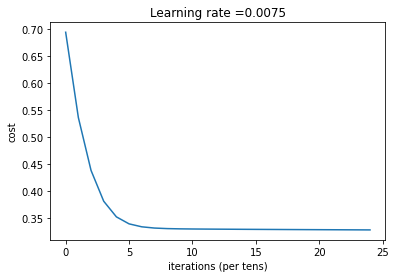

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 25, 41, 1]
Cost after iteration 0: 0.693665
Cost after iteration 100: 0.564439
Cost after iteration 200: 0.477691
Cost after iteration 300: 0.418270
Cost after iteration 400: 0.379649
Cost after iteration 500: 0.356455
Cost after iteration 600: 0.343595
Cost after iteration 700: 0.336892
Cost after iteration 800: 0.333537
Cost after iteration 900: 0.331887
Cost after iteration 1000: 0.331072
Cost after iteration 1100: 0.330654
Cost after iteration 1200: 0.330422
Cost after iteration 1300: 0.330277
Cost after iteration 1400: 0.330171
Cost after iteration 1500: 0.330085
Cost after iteration 1600: 0.330006
Cost after iteration 1700: 0.329931
Cost after iteration 1800: 0.329858
Cost after iteration 1900: 0.329785
Cost after iteration 2000: 0.329713
Cost after iteration 2100: 0.329641
Cost after iteration 2200: 0.329567
Cost after iteration 2300: 0.329493
Cost after 

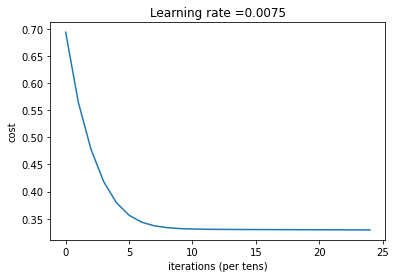

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 25, 41, 1]
Cost after iteration 0: 0.694397
Cost after iteration 100: 0.563500
Cost after iteration 200: 0.478014
Cost after iteration 300: 0.419889
Cost after iteration 400: 0.381546
Cost after iteration 500: 0.357919
Cost after iteration 600: 0.344694
Cost after iteration 700: 0.337826
Cost after iteration 800: 0.334358
Cost after iteration 900: 0.332605
Cost after iteration 1000: 0.331694
Cost after iteration 1100: 0.331199
Cost after iteration 1200: 0.330911
Cost after iteration 1300: 0.330724
Cost after iteration 1400: 0.330586
Cost after iteration 1500: 0.330472
Cost after iteration 1600: 0.330372
Cost after iteration 1700: 0.330278
Cost after iteration 1800: 0.330186
Cost after iteration 1900: 0.330096
Cost after iteration 2000: 0.330007
Cost after iteration 2100: 0.329919
Cost after iteration 2200: 0.329833
Cost after iteration 2300: 0.329747
Cost after 

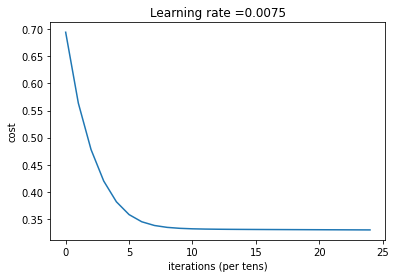

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 25, 41, 1]
Cost after iteration 0: 0.691534
Cost after iteration 100: 0.524120
Cost after iteration 200: 0.423305
Cost after iteration 300: 0.369469
Cost after iteration 400: 0.344786
Cost after iteration 500: 0.334678
Cost after iteration 600: 0.330718
Cost after iteration 700: 0.329128
Cost after iteration 800: 0.328403
Cost after iteration 900: 0.327982
Cost after iteration 1000: 0.327680
Cost after iteration 1100: 0.327425
Cost after iteration 1200: 0.327191
Cost after iteration 1300: 0.326960
Cost after iteration 1400: 0.326730
Cost after iteration 1500: 0.326496
Cost after iteration 1600: 0.326257
Cost after iteration 1700: 0.326010
Cost after iteration 1800: 0.325757
Cost after iteration 1900: 0.325508
Cost after iteration 2000: 0.325265
Cost after iteration 2100: 0.325018
Cost after iteration 2200: 0.324764
Cost after iteration 2300: 0.324495
Cost after 

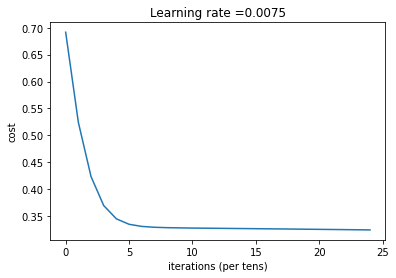

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 25, 41, 1]
Cost after iteration 0: 0.691562
Cost after iteration 100: 0.538729
Cost after iteration 200: 0.440073
Cost after iteration 300: 0.380922
Cost after iteration 400: 0.351061
Cost after iteration 500: 0.338106
Cost after iteration 600: 0.332947
Cost after iteration 700: 0.330916
Cost after iteration 800: 0.330048
Cost after iteration 900: 0.329603
Cost after iteration 1000: 0.329305
Cost after iteration 1100: 0.329060
Cost after iteration 1200: 0.328821
Cost after iteration 1300: 0.328559
Cost after iteration 1400: 0.328322
Cost after iteration 1500: 0.328110
Cost after iteration 1600: 0.327911
Cost after iteration 1700: 0.327716
Cost after iteration 1800: 0.327521
Cost after iteration 1900: 0.327325
Cost after iteration 2000: 0.327127
Cost after iteration 2100: 0.326927
Cost after iteration 2200: 0.326724
Cost after iteration 2300: 0.326516
Cost after 

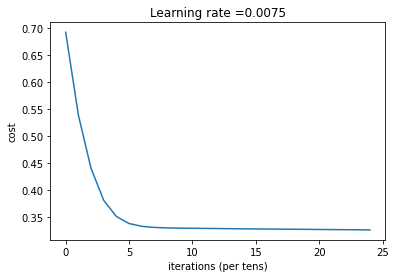

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 33, 41, 1]
Cost after iteration 0: 0.693166
Cost after iteration 100: 0.517701
Cost after iteration 200: 0.424158
Cost after iteration 300: 0.370199
Cost after iteration 400: 0.345465
Cost after iteration 500: 0.335064
Cost after iteration 600: 0.330769
Cost after iteration 700: 0.328887
Cost after iteration 800: 0.327931
Cost after iteration 900: 0.327316
Cost after iteration 1000: 0.326825
Cost after iteration 1100: 0.326375
Cost after iteration 1200: 0.325928
Cost after iteration 1300: 0.325467
Cost after iteration 1400: 0.324984
Cost after iteration 1500: 0.324476
Cost after iteration 1600: 0.323937
Cost after iteration 1700: 0.323366
Cost after iteration 1800: 0.322757
Cost after iteration 1900: 0.322108
Cost after iteration 2000: 0.321430
Cost after iteration 2100: 0.320731
Cost after iteration 2200: 0.320005
Cost after iteration 2300: 0.319244
Cost after i

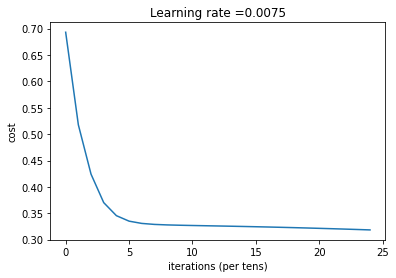

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 33, 41, 1]
Cost after iteration 0: 0.699385
Cost after iteration 100: 0.565293
Cost after iteration 200: 0.479142
Cost after iteration 300: 0.419240
Cost after iteration 400: 0.379556
Cost after iteration 500: 0.355631
Cost after iteration 600: 0.342674
Cost after iteration 700: 0.336267
Cost after iteration 800: 0.333291
Cost after iteration 900: 0.331948
Cost after iteration 1000: 0.331338
Cost after iteration 1100: 0.331042
Cost after iteration 1200: 0.330869
Cost after iteration 1300: 0.330737
Cost after iteration 1400: 0.330604
Cost after iteration 1500: 0.330394
Cost after iteration 1600: 0.330207
Cost after iteration 1700: 0.330077
Cost after iteration 1800: 0.329969
Cost after iteration 1900: 0.329868
Cost after iteration 2000: 0.329773
Cost after iteration 2100: 0.329682
Cost after iteration 2200: 0.329592
Cost after iteration 2300: 0.329503
Cost after i

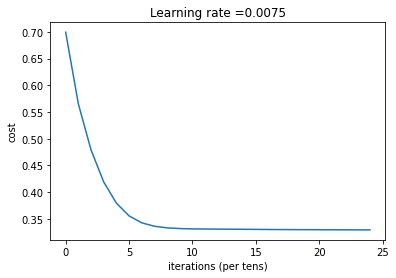

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 33, 41, 1]
Cost after iteration 0: 0.701979
Cost after iteration 100: 0.575428
Cost after iteration 200: 0.493103
Cost after iteration 300: 0.436916
Cost after iteration 400: 0.398647
Cost after iteration 500: 0.373175
Cost after iteration 600: 0.356776
Cost after iteration 700: 0.346565
Cost after iteration 800: 0.340348
Cost after iteration 900: 0.336574
Cost after iteration 1000: 0.334362
Cost after iteration 1100: 0.333068
Cost after iteration 1200: 0.332268
Cost after iteration 1300: 0.331725
Cost after iteration 1400: 0.331402
Cost after iteration 1500: 0.331185
Cost after iteration 1600: 0.331025
Cost after iteration 1700: 0.330900
Cost after iteration 1800: 0.330806
Cost after iteration 1900: 0.330729
Cost after iteration 2000: 0.330660
Cost after iteration 2100: 0.330600
Cost after iteration 2200: 0.330542
Cost after iteration 2300: 0.330486
Cost after 

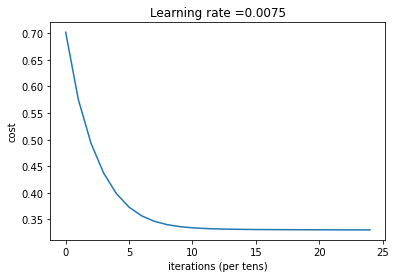

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 33, 41, 1]
Cost after iteration 0: 0.692141
Cost after iteration 100: 0.571630
Cost after iteration 200: 0.489222
Cost after iteration 300: 0.431944
Cost after iteration 400: 0.392789
Cost after iteration 500: 0.367289
Cost after iteration 600: 0.351609
Cost after iteration 700: 0.342482
Cost after iteration 800: 0.337395
Cost after iteration 900: 0.334631
Cost after iteration 1000: 0.333138
Cost after iteration 1100: 0.332320
Cost after iteration 1200: 0.331841
Cost after iteration 1300: 0.331543
Cost after iteration 1400: 0.331341
Cost after iteration 1500: 0.331187
Cost after iteration 1600: 0.331060
Cost after iteration 1700: 0.330949
Cost after iteration 1800: 0.330848
Cost after iteration 1900: 0.330757
Cost after iteration 2000: 0.330670
Cost after iteration 2100: 0.330586
Cost after iteration 2200: 0.330502
Cost after iteration 2300: 0.330413
Cost after 

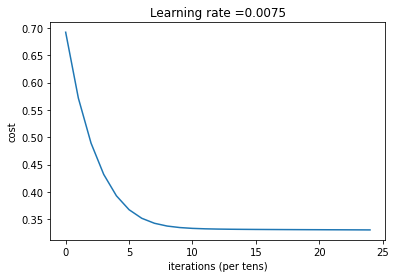

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 33, 41, 1]
Cost after iteration 0: 0.693896
Cost after iteration 100: 0.539657
Cost after iteration 200: 0.440844
Cost after iteration 300: 0.383474
Cost after iteration 400: 0.353979
Cost after iteration 500: 0.340617
Cost after iteration 600: 0.335127
Cost after iteration 700: 0.332945
Cost after iteration 800: 0.332043
Cost after iteration 900: 0.331633
Cost after iteration 1000: 0.331404
Cost after iteration 1100: 0.331243
Cost after iteration 1200: 0.331108
Cost after iteration 1300: 0.330984
Cost after iteration 1400: 0.330865
Cost after iteration 1500: 0.330749
Cost after iteration 1600: 0.330632
Cost after iteration 1700: 0.330517
Cost after iteration 1800: 0.330401
Cost after iteration 1900: 0.330284
Cost after iteration 2000: 0.330167
Cost after iteration 2100: 0.330049
Cost after iteration 2200: 0.329930
Cost after iteration 2300: 0.329811
Cost after 

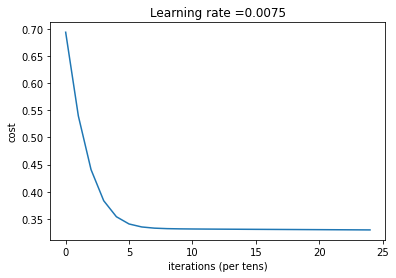

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 33, 41, 1]
Cost after iteration 0: 0.696173
Cost after iteration 100: 0.568536
Cost after iteration 200: 0.483922
Cost after iteration 300: 0.424410
Cost after iteration 400: 0.384393
Cost after iteration 500: 0.359684
Cost after iteration 600: 0.345693
Cost after iteration 700: 0.338259
Cost after iteration 800: 0.334457
Cost after iteration 900: 0.332539
Cost after iteration 1000: 0.331538
Cost after iteration 1100: 0.330965
Cost after iteration 1200: 0.330585
Cost after iteration 1300: 0.330305
Cost after iteration 1400: 0.330095
Cost after iteration 1500: 0.329924
Cost after iteration 1600: 0.329771
Cost after iteration 1700: 0.329629
Cost after iteration 1800: 0.329490
Cost after iteration 1900: 0.329352
Cost after iteration 2000: 0.329214
Cost after iteration 2100: 0.329072
Cost after iteration 2200: 0.328930
Cost after iteration 2300: 0.328787
Cost after 

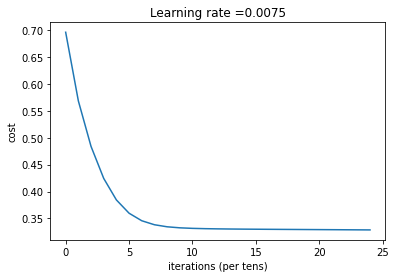

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 33, 41, 1]
Cost after iteration 0: 0.694693
Cost after iteration 100: 0.548352
Cost after iteration 200: 0.456155
Cost after iteration 300: 0.398966
Cost after iteration 400: 0.365791
Cost after iteration 500: 0.348190
Cost after iteration 600: 0.339483
Cost after iteration 700: 0.335367
Cost after iteration 800: 0.333456
Cost after iteration 900: 0.332560
Cost after iteration 1000: 0.332112
Cost after iteration 1100: 0.331862
Cost after iteration 1200: 0.331700
Cost after iteration 1300: 0.331569
Cost after iteration 1400: 0.331423
Cost after iteration 1500: 0.330997
Cost after iteration 1600: 0.330783
Cost after iteration 1700: 0.330649
Cost after iteration 1800: 0.330533
Cost after iteration 1900: 0.330425
Cost after iteration 2000: 0.330322
Cost after iteration 2100: 0.330221
Cost after iteration 2200: 0.330123
Cost after iteration 2300: 0.330025
Cost after 

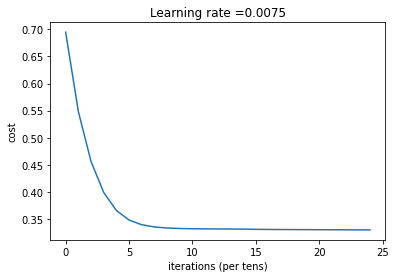

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 33, 41, 1]
Cost after iteration 0: 0.693380
Cost after iteration 100: 0.539143
Cost after iteration 200: 0.441645
Cost after iteration 300: 0.383873
Cost after iteration 400: 0.353934
Cost after iteration 500: 0.340190
Cost after iteration 600: 0.334313
Cost after iteration 700: 0.331826
Cost after iteration 800: 0.330698
Cost after iteration 900: 0.330082
Cost after iteration 1000: 0.329704
Cost after iteration 1100: 0.329420
Cost after iteration 1200: 0.329191
Cost after iteration 1300: 0.328986
Cost after iteration 1400: 0.328788
Cost after iteration 1500: 0.328593
Cost after iteration 1600: 0.328398
Cost after iteration 1700: 0.328205
Cost after iteration 1800: 0.328012
Cost after iteration 1900: 0.327822
Cost after iteration 2000: 0.327633
Cost after iteration 2100: 0.327443
Cost after iteration 2200: 0.327248
Cost after iteration 2300: 0.327050
Cost after 

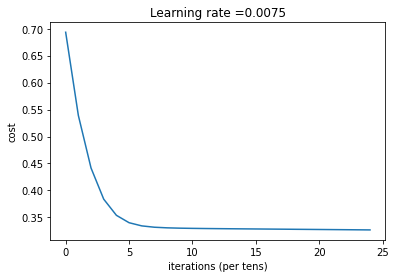

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 41, 41, 1]
Cost after iteration 0: 0.693192
Cost after iteration 100: 0.561733
Cost after iteration 200: 0.477469
Cost after iteration 300: 0.422490
Cost after iteration 400: 0.387026
Cost after iteration 500: 0.363923
Cost after iteration 600: 0.347624
Cost after iteration 700: 0.338860
Cost after iteration 800: 0.333989
Cost after iteration 900: 0.331287
Cost after iteration 1000: 0.329739
Cost after iteration 1100: 0.328780
Cost after iteration 1200: 0.328084
Cost after iteration 1300: 0.327546
Cost after iteration 1400: 0.327091
Cost after iteration 1500: 0.326670
Cost after iteration 1600: 0.326259
Cost after iteration 1700: 0.325848
Cost after iteration 1800: 0.325426
Cost after iteration 1900: 0.324992
Cost after iteration 2000: 0.324546
Cost after iteration 2100: 0.324084
Cost after iteration 2200: 0.323609
Cost after iteration 2300: 0.323121
Cost after i

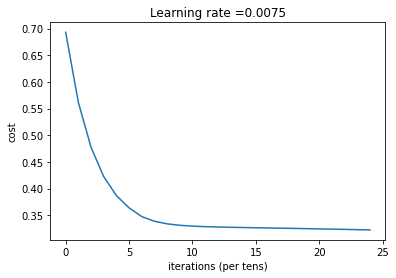

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 41, 41, 1]
Cost after iteration 0: 0.700638
Cost after iteration 100: 0.575740
Cost after iteration 200: 0.494007
Cost after iteration 300: 0.436506
Cost after iteration 400: 0.396526
Cost after iteration 500: 0.369859
Cost after iteration 600: 0.353002
Cost after iteration 700: 0.342799
Cost after iteration 800: 0.336693
Cost after iteration 900: 0.333358
Cost after iteration 1000: 0.331618
Cost after iteration 1100: 0.330680
Cost after iteration 1200: 0.330153
Cost after iteration 1300: 0.329836
Cost after iteration 1400: 0.329624
Cost after iteration 1500: 0.329461
Cost after iteration 1600: 0.329325
Cost after iteration 1700: 0.329204
Cost after iteration 1800: 0.329090
Cost after iteration 1900: 0.328981
Cost after iteration 2000: 0.328876
Cost after iteration 2100: 0.328770
Cost after iteration 2200: 0.328662
Cost after iteration 2300: 0.328553
Cost after i

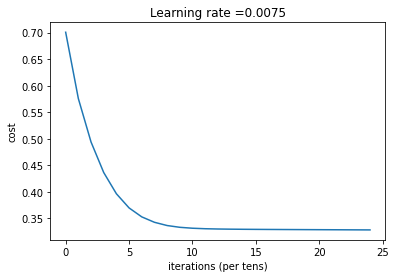

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 41, 41, 1]
Cost after iteration 0: 0.691453
Cost after iteration 100: 0.517379
Cost after iteration 200: 0.415909
Cost after iteration 300: 0.364754
Cost after iteration 400: 0.342999
Cost after iteration 500: 0.334686
Cost after iteration 600: 0.331573
Cost after iteration 700: 0.330237
Cost after iteration 800: 0.329381
Cost after iteration 900: 0.328954
Cost after iteration 1000: 0.328666
Cost after iteration 1100: 0.328426
Cost after iteration 1200: 0.328203
Cost after iteration 1300: 0.327984
Cost after iteration 1400: 0.327762
Cost after iteration 1500: 0.327528
Cost after iteration 1600: 0.327276
Cost after iteration 1700: 0.327024
Cost after iteration 1800: 0.326771
Cost after iteration 1900: 0.326518
Cost after iteration 2000: 0.326273
Cost after iteration 2100: 0.326025
Cost after iteration 2200: 0.325774
Cost after iteration 2300: 0.325518
Cost after 

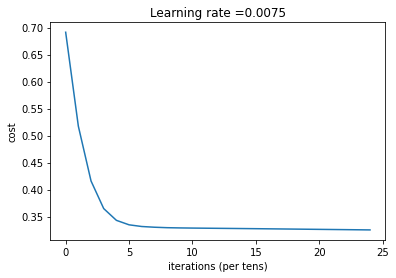

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 41, 41, 1]
Cost after iteration 0: 0.690232
Cost after iteration 100: 0.493249
Cost after iteration 200: 0.394053
Cost after iteration 300: 0.352894
Cost after iteration 400: 0.338092
Cost after iteration 500: 0.333055
Cost after iteration 600: 0.331285
Cost after iteration 700: 0.330558
Cost after iteration 800: 0.330168
Cost after iteration 900: 0.329899
Cost after iteration 1000: 0.329679
Cost after iteration 1100: 0.329480
Cost after iteration 1200: 0.329285
Cost after iteration 1300: 0.329088
Cost after iteration 1400: 0.328883
Cost after iteration 1500: 0.328665
Cost after iteration 1600: 0.328426
Cost after iteration 1700: 0.328092
Cost after iteration 1800: 0.327797
Cost after iteration 1900: 0.327564
Cost after iteration 2000: 0.327342
Cost after iteration 2100: 0.327120
Cost after iteration 2200: 0.326894
Cost after iteration 2300: 0.326660
Cost after 

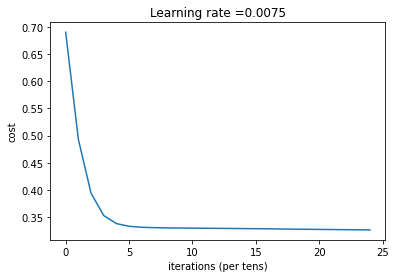

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 41, 41, 1]
Cost after iteration 0: 0.685992
Cost after iteration 100: 0.535753
Cost after iteration 200: 0.437052
Cost after iteration 300: 0.379182
Cost after iteration 400: 0.350493
Cost after iteration 500: 0.338427
Cost after iteration 600: 0.333757
Cost after iteration 700: 0.331916
Cost after iteration 800: 0.331017
Cost after iteration 900: 0.330570
Cost after iteration 1000: 0.330330
Cost after iteration 1100: 0.330153
Cost after iteration 1200: 0.330003
Cost after iteration 1300: 0.329862
Cost after iteration 1400: 0.329723
Cost after iteration 1500: 0.329584
Cost after iteration 1600: 0.329437
Cost after iteration 1700: 0.329275
Cost after iteration 1800: 0.329073
Cost after iteration 1900: 0.328861
Cost after iteration 2000: 0.328682
Cost after iteration 2100: 0.328520
Cost after iteration 2200: 0.328364
Cost after iteration 2300: 0.328211
Cost after 

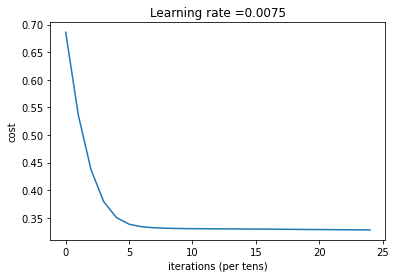

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 41, 41, 1]
Cost after iteration 0: 0.688366
Cost after iteration 100: 0.517386
Cost after iteration 200: 0.423195
Cost after iteration 300: 0.372984
Cost after iteration 400: 0.349325
Cost after iteration 500: 0.338989
Cost after iteration 600: 0.334555
Cost after iteration 700: 0.332628
Cost after iteration 800: 0.331730
Cost after iteration 900: 0.331267
Cost after iteration 1000: 0.330990
Cost after iteration 1100: 0.330792
Cost after iteration 1200: 0.330599
Cost after iteration 1300: 0.330385
Cost after iteration 1400: 0.330266
Cost after iteration 1500: 0.330160
Cost after iteration 1600: 0.330060
Cost after iteration 1700: 0.329964
Cost after iteration 1800: 0.329870
Cost after iteration 1900: 0.329777
Cost after iteration 2000: 0.329683
Cost after iteration 2100: 0.329590
Cost after iteration 2200: 0.329496
Cost after iteration 2300: 0.329400
Cost after 

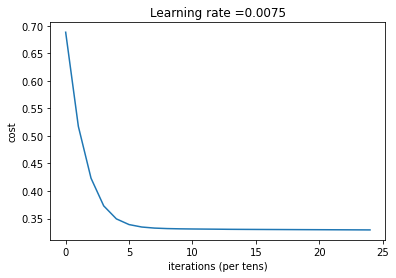

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 41, 41, 1]
Cost after iteration 0: 0.696747
Cost after iteration 100: 0.560156
Cost after iteration 200: 0.472368
Cost after iteration 300: 0.413355
Cost after iteration 400: 0.375870
Cost after iteration 500: 0.353885
Cost after iteration 600: 0.341924
Cost after iteration 700: 0.335758
Cost after iteration 800: 0.332654
Cost after iteration 900: 0.331078
Cost after iteration 1000: 0.330230
Cost after iteration 1100: 0.329731
Cost after iteration 1200: 0.329406
Cost after iteration 1300: 0.329176
Cost after iteration 1400: 0.328991
Cost after iteration 1500: 0.328828
Cost after iteration 1600: 0.328677
Cost after iteration 1700: 0.328532
Cost after iteration 1800: 0.328391
Cost after iteration 1900: 0.328250
Cost after iteration 2000: 0.328109
Cost after iteration 2100: 0.327965
Cost after iteration 2200: 0.327817
Cost after iteration 2300: 0.327660
Cost after 

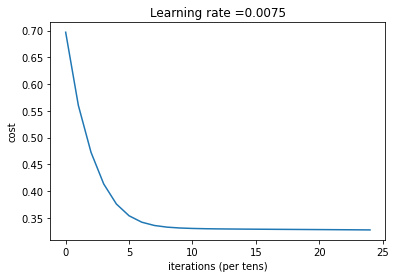

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 41, 41, 1]
Cost after iteration 0: 0.689964
Cost after iteration 100: 0.532399
Cost after iteration 200: 0.433592
Cost after iteration 300: 0.377400
Cost after iteration 400: 0.350188
Cost after iteration 500: 0.338715
Cost after iteration 600: 0.334226
Cost after iteration 700: 0.332462
Cost after iteration 800: 0.331698
Cost after iteration 900: 0.331292
Cost after iteration 1000: 0.331026
Cost after iteration 1100: 0.330824
Cost after iteration 1200: 0.330652
Cost after iteration 1300: 0.330499
Cost after iteration 1400: 0.330355
Cost after iteration 1500: 0.330218
Cost after iteration 1600: 0.330083
Cost after iteration 1700: 0.329951
Cost after iteration 1800: 0.329820
Cost after iteration 1900: 0.329689
Cost after iteration 2000: 0.329558
Cost after iteration 2100: 0.329427
Cost after iteration 2200: 0.329295
Cost after iteration 2300: 0.329164
Cost after 

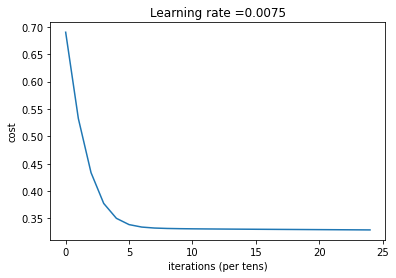

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 49, 41, 1]
Cost after iteration 0: 0.693119
Cost after iteration 100: 0.556449
Cost after iteration 200: 0.448359
Cost after iteration 300: 0.371778
Cost after iteration 400: 0.337972
Cost after iteration 500: 0.329848
Cost after iteration 600: 0.328240
Cost after iteration 700: 0.327748
Cost after iteration 800: 0.327415
Cost after iteration 900: 0.327096
Cost after iteration 1000: 0.326769
Cost after iteration 1100: 0.326429
Cost after iteration 1200: 0.326076
Cost after iteration 1300: 0.325707
Cost after iteration 1400: 0.325322
Cost after iteration 1500: 0.324919
Cost after iteration 1600: 0.324496
Cost after iteration 1700: 0.324051
Cost after iteration 1800: 0.323583
Cost after iteration 1900: 0.323089
Cost after iteration 2000: 0.322568
Cost after iteration 2100: 0.322015
Cost after iteration 2200: 0.321430
Cost after iteration 2300: 0.320807
Cost after i

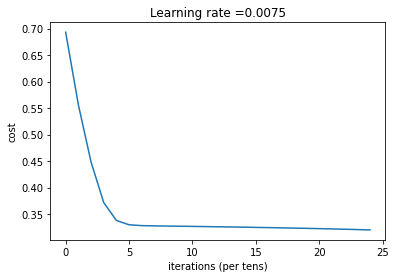

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 49, 41, 1]
Cost after iteration 0: 0.704186
Cost after iteration 100: 0.577356
Cost after iteration 200: 0.496591
Cost after iteration 300: 0.440206
Cost after iteration 400: 0.401066
Cost after iteration 500: 0.374539
Cost after iteration 600: 0.357213
Cost after iteration 700: 0.346346
Cost after iteration 800: 0.339752
Cost after iteration 900: 0.335793
Cost after iteration 1000: 0.333386
Cost after iteration 1100: 0.331891
Cost after iteration 1200: 0.331000
Cost after iteration 1300: 0.330461
Cost after iteration 1400: 0.330125
Cost after iteration 1500: 0.329893
Cost after iteration 1600: 0.329717
Cost after iteration 1700: 0.329566
Cost after iteration 1800: 0.329428
Cost after iteration 1900: 0.329300
Cost after iteration 2000: 0.329174
Cost after iteration 2100: 0.329046
Cost after iteration 2200: 0.328901
Cost after iteration 2300: 0.328735
Cost after i

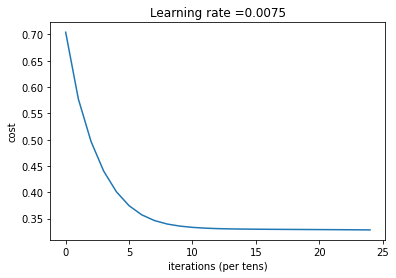

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 49, 41, 1]
Cost after iteration 0: 0.695849
Cost after iteration 100: 0.562504
Cost after iteration 200: 0.476240
Cost after iteration 300: 0.418718
Cost after iteration 400: 0.381586
Cost after iteration 500: 0.358866
Cost after iteration 600: 0.345753
Cost after iteration 700: 0.338534
Cost after iteration 800: 0.334661
Cost after iteration 900: 0.332617
Cost after iteration 1000: 0.331533
Cost after iteration 1100: 0.330930
Cost after iteration 1200: 0.330570
Cost after iteration 1300: 0.330336
Cost after iteration 1400: 0.330160
Cost after iteration 1500: 0.330015
Cost after iteration 1600: 0.329882
Cost after iteration 1700: 0.329753
Cost after iteration 1800: 0.329620
Cost after iteration 1900: 0.329491
Cost after iteration 2000: 0.329366
Cost after iteration 2100: 0.329247
Cost after iteration 2200: 0.329130
Cost after iteration 2300: 0.329013
Cost after 

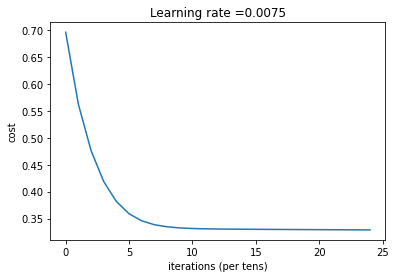

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 49, 41, 1]
Cost after iteration 0: 0.701270
Cost after iteration 100: 0.567877
Cost after iteration 200: 0.483641
Cost after iteration 300: 0.425485
Cost after iteration 400: 0.386440
Cost after iteration 500: 0.361787
Cost after iteration 600: 0.347295
Cost after iteration 700: 0.339305
Cost after iteration 800: 0.335095
Cost after iteration 900: 0.332930
Cost after iteration 1000: 0.331821
Cost after iteration 1100: 0.331240
Cost after iteration 1200: 0.330919
Cost after iteration 1300: 0.330725
Cost after iteration 1400: 0.330590
Cost after iteration 1500: 0.330484
Cost after iteration 1600: 0.330395
Cost after iteration 1700: 0.330314
Cost after iteration 1800: 0.330237
Cost after iteration 1900: 0.330159
Cost after iteration 2000: 0.330083
Cost after iteration 2100: 0.330008
Cost after iteration 2200: 0.329932
Cost after iteration 2300: 0.329856
Cost after 

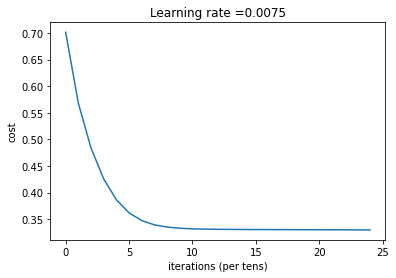

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 49, 41, 1]
Cost after iteration 0: 0.696296
Cost after iteration 100: 0.548986
Cost after iteration 200: 0.458517
Cost after iteration 300: 0.401599
Cost after iteration 400: 0.367826
Cost after iteration 500: 0.349219
Cost after iteration 600: 0.339664
Cost after iteration 700: 0.334952
Cost after iteration 800: 0.332662
Cost after iteration 900: 0.331527
Cost after iteration 1000: 0.330895
Cost after iteration 1100: 0.330400
Cost after iteration 1200: 0.330063
Cost after iteration 1300: 0.329833
Cost after iteration 1400: 0.329661
Cost after iteration 1500: 0.329516
Cost after iteration 1600: 0.329382
Cost after iteration 1700: 0.329252
Cost after iteration 1800: 0.329125
Cost after iteration 1900: 0.329000
Cost after iteration 2000: 0.328875
Cost after iteration 2100: 0.328751
Cost after iteration 2200: 0.328625
Cost after iteration 2300: 0.328497
Cost after 

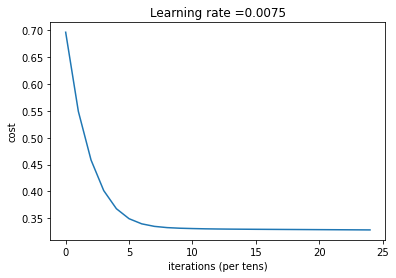

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 49, 41, 1]
Cost after iteration 0: 0.696708
Cost after iteration 100: 0.559151
Cost after iteration 200: 0.470517
Cost after iteration 300: 0.412646
Cost after iteration 400: 0.376555
Cost after iteration 500: 0.355294
Cost after iteration 600: 0.343415
Cost after iteration 700: 0.337037
Cost after iteration 800: 0.333667
Cost after iteration 900: 0.331872
Cost after iteration 1000: 0.330895
Cost after iteration 1100: 0.330331
Cost after iteration 1200: 0.329977
Cost after iteration 1300: 0.329729
Cost after iteration 1400: 0.329546
Cost after iteration 1500: 0.329394
Cost after iteration 1600: 0.329255
Cost after iteration 1700: 0.329125
Cost after iteration 1800: 0.328990
Cost after iteration 1900: 0.328842
Cost after iteration 2000: 0.328688
Cost after iteration 2100: 0.328526
Cost after iteration 2200: 0.328374
Cost after iteration 2300: 0.328239
Cost after 

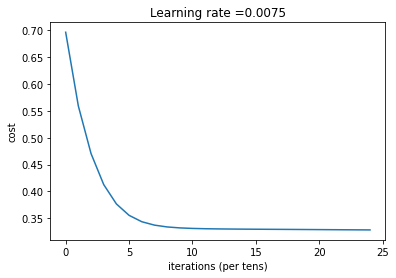

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 49, 41, 1]
Cost after iteration 0: 0.693200
Cost after iteration 100: 0.546574
Cost after iteration 200: 0.453036
Cost after iteration 300: 0.396087
Cost after iteration 400: 0.363737
Cost after iteration 500: 0.346757
Cost after iteration 600: 0.338332
Cost after iteration 700: 0.334233
Cost after iteration 800: 0.332235
Cost after iteration 900: 0.331227
Cost after iteration 1000: 0.330678
Cost after iteration 1100: 0.330346
Cost after iteration 1200: 0.330120
Cost after iteration 1300: 0.329945
Cost after iteration 1400: 0.329794
Cost after iteration 1500: 0.329656
Cost after iteration 1600: 0.329527
Cost after iteration 1700: 0.329402
Cost after iteration 1800: 0.329279
Cost after iteration 1900: 0.329160
Cost after iteration 2000: 0.329042
Cost after iteration 2100: 0.328926
Cost after iteration 2200: 0.328812
Cost after iteration 2300: 0.328699
Cost after 

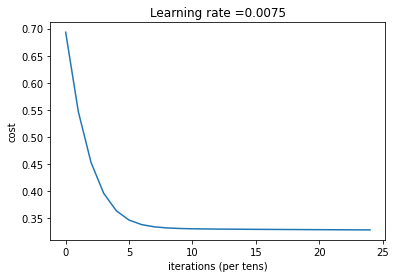

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 49, 41, 1]
Cost after iteration 0: 0.692520
Cost after iteration 100: 0.551033
Cost after iteration 200: 0.461040
Cost after iteration 300: 0.403447
Cost after iteration 400: 0.368803
Cost after iteration 500: 0.349577
Cost after iteration 600: 0.339611
Cost after iteration 700: 0.334628
Cost after iteration 800: 0.332096
Cost after iteration 900: 0.330658
Cost after iteration 1000: 0.329900
Cost after iteration 1100: 0.329464
Cost after iteration 1200: 0.329168
Cost after iteration 1300: 0.328933
Cost after iteration 1400: 0.328720
Cost after iteration 1500: 0.328519
Cost after iteration 1600: 0.328316
Cost after iteration 1700: 0.328115
Cost after iteration 1800: 0.327914
Cost after iteration 1900: 0.327715
Cost after iteration 2000: 0.327518
Cost after iteration 2100: 0.327317
Cost after iteration 2200: 0.327107
Cost after iteration 2300: 0.326888
Cost after 

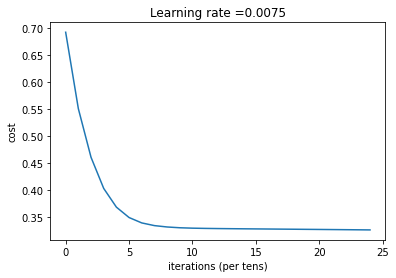

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 57, 41, 1]
Cost after iteration 0: 0.693186
Cost after iteration 100: 0.548334
Cost after iteration 200: 0.460342
Cost after iteration 300: 0.406436
Cost after iteration 400: 0.374156
Cost after iteration 500: 0.355394
Cost after iteration 600: 0.344737
Cost after iteration 700: 0.338798
Cost after iteration 800: 0.335527
Cost after iteration 900: 0.333738
Cost after iteration 1000: 0.332763
Cost after iteration 1100: 0.332233
Cost after iteration 1200: 0.331946
Cost after iteration 1300: 0.331790
Cost after iteration 1400: 0.331705
Cost after iteration 1500: 0.331659
Cost after iteration 1600: 0.331633
Cost after iteration 1700: 0.331618
Cost after iteration 1800: 0.331608
Cost after iteration 1900: 0.331600
Cost after iteration 2000: 0.331580
Cost after iteration 2100: 0.331537
Cost after iteration 2200: 0.331342
Cost after iteration 2300: 0.330632
Cost after i

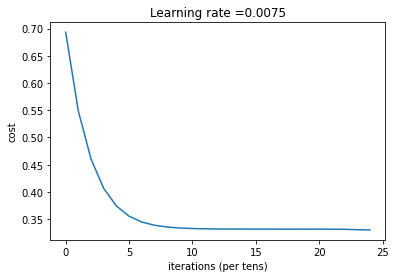

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 57, 41, 1]
Cost after iteration 0: 0.695393
Cost after iteration 100: 0.568401
Cost after iteration 200: 0.472028
Cost after iteration 300: 0.408617
Cost after iteration 400: 0.369965
Cost after iteration 500: 0.348956
Cost after iteration 600: 0.338694
Cost after iteration 700: 0.334046
Cost after iteration 800: 0.332023
Cost after iteration 900: 0.331145
Cost after iteration 1000: 0.330744
Cost after iteration 1100: 0.330535
Cost after iteration 1200: 0.330392
Cost after iteration 1300: 0.330256
Cost after iteration 1400: 0.330093
Cost after iteration 1500: 0.329910
Cost after iteration 1600: 0.329753
Cost after iteration 1700: 0.329609
Cost after iteration 1800: 0.329483
Cost after iteration 1900: 0.329370
Cost after iteration 2000: 0.329262
Cost after iteration 2100: 0.329150
Cost after iteration 2200: 0.329030
Cost after iteration 2300: 0.328901
Cost after i

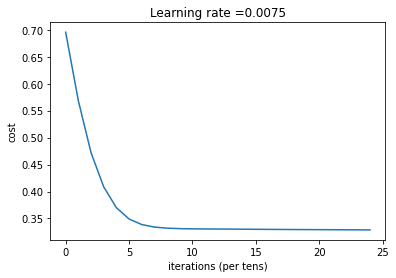

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 57, 41, 1]
Cost after iteration 0: 0.682465
Cost after iteration 100: 0.466861
Cost after iteration 200: 0.370009
Cost after iteration 300: 0.340166
Cost after iteration 400: 0.332891
Cost after iteration 500: 0.331149
Cost after iteration 600: 0.330613
Cost after iteration 700: 0.330331
Cost after iteration 800: 0.330097
Cost after iteration 900: 0.329877
Cost after iteration 1000: 0.329662
Cost after iteration 1100: 0.329448
Cost after iteration 1200: 0.329228
Cost after iteration 1300: 0.328991
Cost after iteration 1400: 0.328722
Cost after iteration 1500: 0.328455
Cost after iteration 1600: 0.328190
Cost after iteration 1700: 0.327949
Cost after iteration 1800: 0.327720
Cost after iteration 1900: 0.327496
Cost after iteration 2000: 0.327270
Cost after iteration 2100: 0.327040
Cost after iteration 2200: 0.326804
Cost after iteration 2300: 0.326562
Cost after 

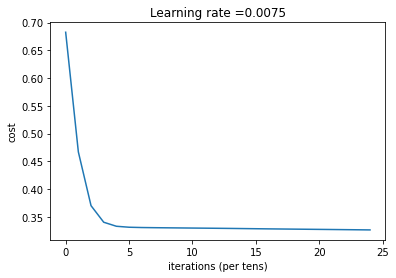

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 57, 41, 1]
Cost after iteration 0: 0.692346
Cost after iteration 100: 0.537407
Cost after iteration 200: 0.432732
Cost after iteration 300: 0.372205
Cost after iteration 400: 0.345055
Cost after iteration 500: 0.335080
Cost after iteration 600: 0.331677
Cost after iteration 700: 0.330435
Cost after iteration 800: 0.329881
Cost after iteration 900: 0.329560
Cost after iteration 1000: 0.329315
Cost after iteration 1100: 0.329105
Cost after iteration 1200: 0.328913
Cost after iteration 1300: 0.328731
Cost after iteration 1400: 0.328553
Cost after iteration 1500: 0.328377
Cost after iteration 1600: 0.328203
Cost after iteration 1700: 0.328031
Cost after iteration 1800: 0.327856
Cost after iteration 1900: 0.327681
Cost after iteration 2000: 0.327504
Cost after iteration 2100: 0.327325
Cost after iteration 2200: 0.327143
Cost after iteration 2300: 0.326957
Cost after 

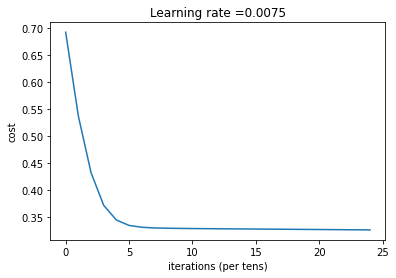

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 57, 41, 1]
Cost after iteration 0: 0.692211
Cost after iteration 100: 0.563829
Cost after iteration 200: 0.476152
Cost after iteration 300: 0.414284
Cost after iteration 400: 0.374372
Cost after iteration 500: 0.352057
Cost after iteration 600: 0.341059
Cost after iteration 700: 0.336071
Cost after iteration 800: 0.333894
Cost after iteration 900: 0.332934
Cost after iteration 1000: 0.332480
Cost after iteration 1100: 0.332235
Cost after iteration 1200: 0.332077
Cost after iteration 1300: 0.331954
Cost after iteration 1400: 0.331846
Cost after iteration 1500: 0.331744
Cost after iteration 1600: 0.331640
Cost after iteration 1700: 0.331531
Cost after iteration 1800: 0.331413
Cost after iteration 1900: 0.331296
Cost after iteration 2000: 0.331188
Cost after iteration 2100: 0.331085
Cost after iteration 2200: 0.330986
Cost after iteration 2300: 0.330888
Cost after 

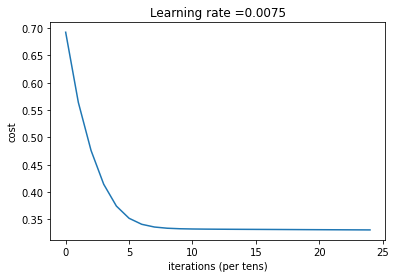

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 57, 41, 1]
Cost after iteration 0: 0.694690
Cost after iteration 100: 0.571786
Cost after iteration 200: 0.488157
Cost after iteration 300: 0.429746
Cost after iteration 400: 0.390549
Cost after iteration 500: 0.365319
Cost after iteration 600: 0.349893
Cost after iteration 700: 0.340890
Cost after iteration 800: 0.335816
Cost after iteration 900: 0.332981
Cost after iteration 1000: 0.331309
Cost after iteration 1100: 0.330340
Cost after iteration 1200: 0.329756
Cost after iteration 1300: 0.329359
Cost after iteration 1400: 0.329022
Cost after iteration 1500: 0.328780
Cost after iteration 1600: 0.328595
Cost after iteration 1700: 0.328426
Cost after iteration 1800: 0.328249
Cost after iteration 1900: 0.328087
Cost after iteration 2000: 0.327941
Cost after iteration 2100: 0.327802
Cost after iteration 2200: 0.327664
Cost after iteration 2300: 0.327528
Cost after 

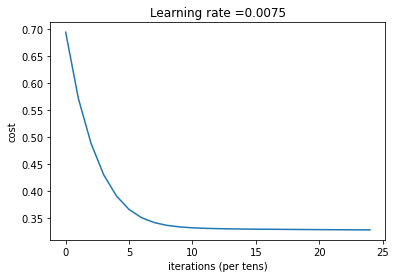

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 57, 41, 1]
Cost after iteration 0: 0.690122
Cost after iteration 100: 0.547905
Cost after iteration 200: 0.456220
Cost after iteration 300: 0.397447
Cost after iteration 400: 0.363226
Cost after iteration 500: 0.345404
Cost after iteration 600: 0.336873
Cost after iteration 700: 0.332957
Cost after iteration 800: 0.331142
Cost after iteration 900: 0.330240
Cost after iteration 1000: 0.329728
Cost after iteration 1100: 0.329380
Cost after iteration 1200: 0.329091
Cost after iteration 1300: 0.328845
Cost after iteration 1400: 0.328637
Cost after iteration 1500: 0.328453
Cost after iteration 1600: 0.328294
Cost after iteration 1700: 0.328143
Cost after iteration 1800: 0.327997
Cost after iteration 1900: 0.327851
Cost after iteration 2000: 0.327703
Cost after iteration 2100: 0.327554
Cost after iteration 2200: 0.327401
Cost after iteration 2300: 0.327245
Cost after 

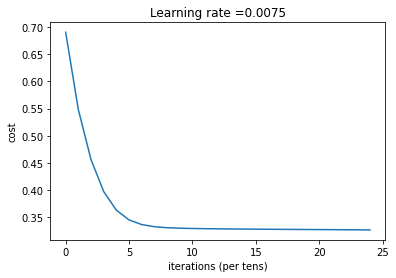

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 57, 41, 1]
Cost after iteration 0: 0.686000
Cost after iteration 100: 0.530916
Cost after iteration 200: 0.431058
Cost after iteration 300: 0.374389
Cost after iteration 400: 0.347316
Cost after iteration 500: 0.336155
Cost after iteration 600: 0.331895
Cost after iteration 700: 0.330250
Cost after iteration 800: 0.329525
Cost after iteration 900: 0.329102
Cost after iteration 1000: 0.328773
Cost after iteration 1100: 0.328464
Cost after iteration 1200: 0.328160
Cost after iteration 1300: 0.327882
Cost after iteration 1400: 0.327604
Cost after iteration 1500: 0.327326
Cost after iteration 1600: 0.327044
Cost after iteration 1700: 0.326768
Cost after iteration 1800: 0.326488
Cost after iteration 1900: 0.326205
Cost after iteration 2000: 0.325936
Cost after iteration 2100: 0.325666
Cost after iteration 2200: 0.325401
Cost after iteration 2300: 0.325134
Cost after 

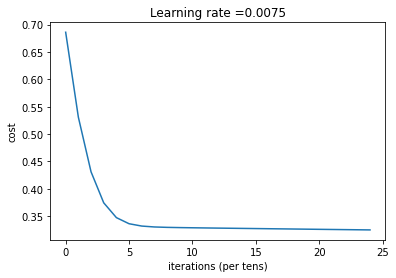

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 1, 49, 1]
Cost after iteration 0: 0.693129
Cost after iteration 100: 0.514872
Cost after iteration 200: 0.384784
Cost after iteration 300: 0.338157
Cost after iteration 400: 0.330958
Cost after iteration 500: 0.330019
Cost after iteration 600: 0.329837
Cost after iteration 700: 0.329739
Cost after iteration 800: 0.329649
Cost after iteration 900: 0.329558
Cost after iteration 1000: 0.329464
Cost after iteration 1100: 0.329367
Cost after iteration 1200: 0.329267
Cost after iteration 1300: 0.329164
Cost after iteration 1400: 0.329057
Cost after iteration 1500: 0.328947
Cost after iteration 1600: 0.328833
Cost after iteration 1700: 0.328716
Cost after iteration 1800: 0.328593
Cost after iteration 1900: 0.328467
Cost after iteration 2000: 0.328335
Cost after iteration 2100: 0.328199
Cost after iteration 2200: 0.328057
Cost after iteration 2300: 0.327909
Cost after it

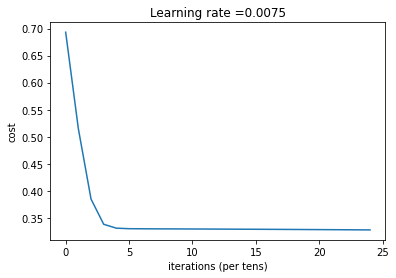

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 1, 49, 1]
Cost after iteration 0: 0.689697
Cost after iteration 100: 0.468839
Cost after iteration 200: 0.346688
Cost after iteration 300: 0.332273
Cost after iteration 400: 0.331137
Cost after iteration 500: 0.330700
Cost after iteration 600: 0.329896
Cost after iteration 700: 0.329059
Cost after iteration 800: 0.328563
Cost after iteration 900: 0.328246
Cost after iteration 1000: 0.327970
Cost after iteration 1100: 0.327698
Cost after iteration 1200: 0.327423
Cost after iteration 1300: 0.327140
Cost after iteration 1400: 0.326848
Cost after iteration 1500: 0.326544
Cost after iteration 1600: 0.326227
Cost after iteration 1700: 0.325897
Cost after iteration 1800: 0.325552
Cost after iteration 1900: 0.325191
Cost after iteration 2000: 0.324812
Cost after iteration 2100: 0.324413
Cost after iteration 2200: 0.323994
Cost after iteration 2300: 0.323553
Cost after it

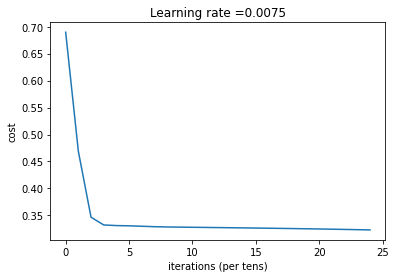

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 1, 49, 1]
Cost after iteration 0: 0.692893
Cost after iteration 100: 0.549514
Cost after iteration 200: 0.410576
Cost after iteration 300: 0.342802
Cost after iteration 400: 0.332392
Cost after iteration 500: 0.331132
Cost after iteration 600: 0.330630
Cost after iteration 700: 0.330305
Cost after iteration 800: 0.330047
Cost after iteration 900: 0.329807
Cost after iteration 1000: 0.329574
Cost after iteration 1100: 0.329341
Cost after iteration 1200: 0.329109
Cost after iteration 1300: 0.328874
Cost after iteration 1400: 0.328633
Cost after iteration 1500: 0.328385
Cost after iteration 1600: 0.328123
Cost after iteration 1700: 0.327843
Cost after iteration 1800: 0.327542
Cost after iteration 1900: 0.327225
Cost after iteration 2000: 0.326920
Cost after iteration 2100: 0.326615
Cost after iteration 2200: 0.326302
Cost after iteration 2300: 0.325979
Cost after i

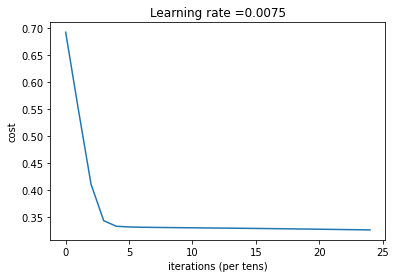

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 1, 49, 1]
Cost after iteration 0: 0.693301
Cost after iteration 100: 0.584263
Cost after iteration 200: 0.510533
Cost after iteration 300: 0.459478
Cost after iteration 400: 0.423524
Cost after iteration 500: 0.397916
Cost after iteration 600: 0.379544
Cost after iteration 700: 0.366306
Cost after iteration 800: 0.356744
Cost after iteration 900: 0.349827
Cost after iteration 1000: 0.344819
Cost after iteration 1100: 0.341191
Cost after iteration 1200: 0.338562
Cost after iteration 1300: 0.336656
Cost after iteration 1400: 0.335274
Cost after iteration 1500: 0.334271
Cost after iteration 1600: 0.333543
Cost after iteration 1700: 0.333014
Cost after iteration 1800: 0.332630
Cost after iteration 1900: 0.332351
Cost after iteration 2000: 0.332149
Cost after iteration 2100: 0.332001
Cost after iteration 2200: 0.331894
Cost after iteration 2300: 0.331816
Cost after i

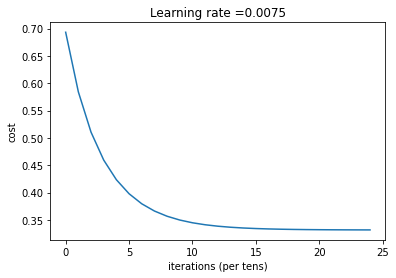

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 1, 49, 1]
Cost after iteration 0: 0.692813
Cost after iteration 100: 0.464147
Cost after iteration 200: 0.340938
Cost after iteration 300: 0.330457
Cost after iteration 400: 0.329363
Cost after iteration 500: 0.328727
Cost after iteration 600: 0.327959
Cost after iteration 700: 0.327209
Cost after iteration 800: 0.326646
Cost after iteration 900: 0.326108
Cost after iteration 1000: 0.325568
Cost after iteration 1100: 0.325010
Cost after iteration 1200: 0.324435
Cost after iteration 1300: 0.323835
Cost after iteration 1400: 0.323220
Cost after iteration 1500: 0.322580
Cost after iteration 1600: 0.321912
Cost after iteration 1700: 0.321203
Cost after iteration 1800: 0.320448
Cost after iteration 1900: 0.319641
Cost after iteration 2000: 0.318781
Cost after iteration 2100: 0.317853
Cost after iteration 2200: 0.316857
Cost after iteration 2300: 0.315782
Cost after i

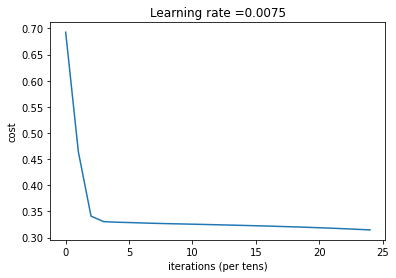

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 1, 49, 1]
Cost after iteration 0: 0.683791
Cost after iteration 100: 0.411871
Cost after iteration 200: 0.338099
Cost after iteration 300: 0.332442
Cost after iteration 400: 0.331188
Cost after iteration 500: 0.330241
Cost after iteration 600: 0.329402
Cost after iteration 700: 0.328686
Cost after iteration 800: 0.328061
Cost after iteration 900: 0.327460
Cost after iteration 1000: 0.326816
Cost after iteration 1100: 0.326176
Cost after iteration 1200: 0.325571
Cost after iteration 1300: 0.325026
Cost after iteration 1400: 0.324504
Cost after iteration 1500: 0.323973
Cost after iteration 1600: 0.323422
Cost after iteration 1700: 0.322852
Cost after iteration 1800: 0.322257
Cost after iteration 1900: 0.321635
Cost after iteration 2000: 0.320981
Cost after iteration 2100: 0.320293
Cost after iteration 2200: 0.319566
Cost after iteration 2300: 0.318798
Cost after i

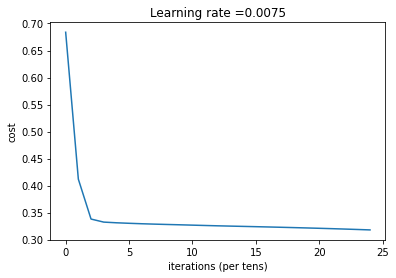

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 1, 49, 1]
Cost after iteration 0: 0.696658
Cost after iteration 100: 0.558040
Cost after iteration 200: 0.467358
Cost after iteration 300: 0.405742
Cost after iteration 400: 0.365319
Cost after iteration 500: 0.342937
Cost after iteration 600: 0.333405
Cost after iteration 700: 0.329973
Cost after iteration 800: 0.328708
Cost after iteration 900: 0.328122
Cost after iteration 1000: 0.327755
Cost after iteration 1100: 0.327454
Cost after iteration 1200: 0.327189
Cost after iteration 1300: 0.326910
Cost after iteration 1400: 0.326598
Cost after iteration 1500: 0.326223
Cost after iteration 1600: 0.325811
Cost after iteration 1700: 0.325396
Cost after iteration 1800: 0.325013
Cost after iteration 1900: 0.324633
Cost after iteration 2000: 0.324232
Cost after iteration 2100: 0.323809
Cost after iteration 2200: 0.323359
Cost after iteration 2300: 0.322877
Cost after i

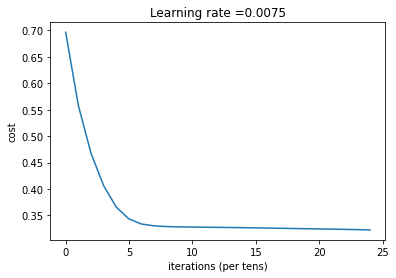

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 1, 49, 1]
Cost after iteration 0: 0.693542
Cost after iteration 100: 0.572817
Cost after iteration 200: 0.489621
Cost after iteration 300: 0.430506
Cost after iteration 400: 0.387349
Cost after iteration 500: 0.357558
Cost after iteration 600: 0.340878
Cost after iteration 700: 0.333514
Cost after iteration 800: 0.330650
Cost after iteration 900: 0.329511
Cost after iteration 1000: 0.328962
Cost after iteration 1100: 0.328603
Cost after iteration 1200: 0.328295
Cost after iteration 1300: 0.327999
Cost after iteration 1400: 0.327693
Cost after iteration 1500: 0.327396
Cost after iteration 1600: 0.327112
Cost after iteration 1700: 0.326838
Cost after iteration 1800: 0.326565
Cost after iteration 1900: 0.326285
Cost after iteration 2000: 0.325994
Cost after iteration 2100: 0.325692
Cost after iteration 2200: 0.325378
Cost after iteration 2300: 0.325050
Cost after i

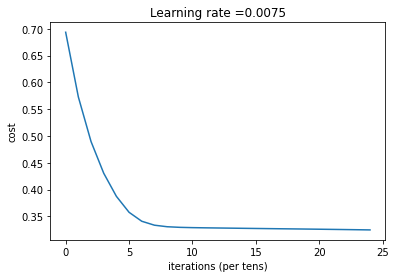

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 9, 49, 1]
Cost after iteration 0: 0.693172
Cost after iteration 100: 0.562296
Cost after iteration 200: 0.477073
Cost after iteration 300: 0.420684
Cost after iteration 400: 0.382274
Cost after iteration 500: 0.357427
Cost after iteration 600: 0.343366
Cost after iteration 700: 0.335965
Cost after iteration 800: 0.332268
Cost after iteration 900: 0.330436
Cost after iteration 1000: 0.329487
Cost after iteration 1100: 0.328937
Cost after iteration 1200: 0.328559
Cost after iteration 1300: 0.328251
Cost after iteration 1400: 0.327961
Cost after iteration 1500: 0.327661
Cost after iteration 1600: 0.327315
Cost after iteration 1700: 0.326955
Cost after iteration 1800: 0.326590
Cost after iteration 1900: 0.326209
Cost after iteration 2000: 0.325713
Cost after iteration 2100: 0.325182
Cost after iteration 2200: 0.324693
Cost after iteration 2300: 0.324212
Cost after it

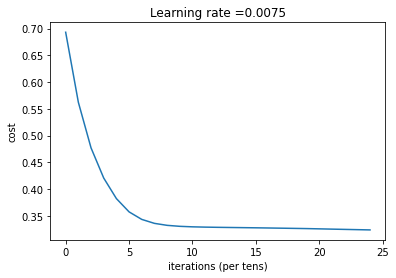

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 9, 49, 1]
Cost after iteration 0: 0.683830
Cost after iteration 100: 0.462585
Cost after iteration 200: 0.365431
Cost after iteration 300: 0.338725
Cost after iteration 400: 0.333006
Cost after iteration 500: 0.331770
Cost after iteration 600: 0.331412
Cost after iteration 700: 0.331224
Cost after iteration 800: 0.331061
Cost after iteration 900: 0.330887
Cost after iteration 1000: 0.330675
Cost after iteration 1100: 0.330464
Cost after iteration 1200: 0.330262
Cost after iteration 1300: 0.330096
Cost after iteration 1400: 0.329949
Cost after iteration 1500: 0.329809
Cost after iteration 1600: 0.329670
Cost after iteration 1700: 0.329529
Cost after iteration 1800: 0.329387
Cost after iteration 1900: 0.329243
Cost after iteration 2000: 0.329097
Cost after iteration 2100: 0.328950
Cost after iteration 2200: 0.328800
Cost after iteration 2300: 0.328649
Cost after it

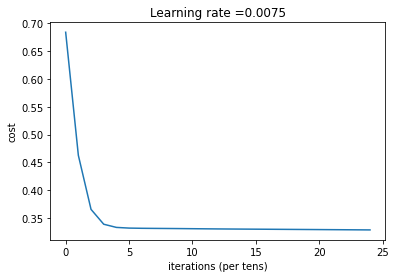

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 9, 49, 1]
Cost after iteration 0: 0.695755
Cost after iteration 100: 0.527354
Cost after iteration 200: 0.422605
Cost after iteration 300: 0.368769
Cost after iteration 400: 0.345797
Cost after iteration 500: 0.337314
Cost after iteration 600: 0.334392
Cost after iteration 700: 0.333388
Cost after iteration 800: 0.333016
Cost after iteration 900: 0.332847
Cost after iteration 1000: 0.332747
Cost after iteration 1100: 0.332668
Cost after iteration 1200: 0.332598
Cost after iteration 1300: 0.332531
Cost after iteration 1400: 0.332466
Cost after iteration 1500: 0.332402
Cost after iteration 1600: 0.332340
Cost after iteration 1700: 0.332278
Cost after iteration 1800: 0.332216
Cost after iteration 1900: 0.332155
Cost after iteration 2000: 0.332095
Cost after iteration 2100: 0.332036
Cost after iteration 2200: 0.331976
Cost after iteration 2300: 0.331917
Cost after i

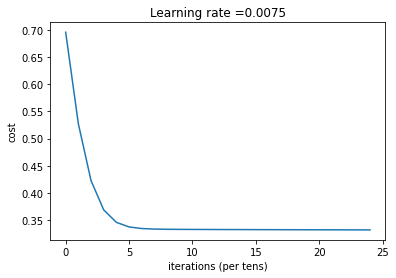

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 9, 49, 1]
Cost after iteration 0: 0.678363
Cost after iteration 100: 0.461199
Cost after iteration 200: 0.356415
Cost after iteration 300: 0.333897
Cost after iteration 400: 0.330151
Cost after iteration 500: 0.329298
Cost after iteration 600: 0.328837
Cost after iteration 700: 0.328418
Cost after iteration 800: 0.328072
Cost after iteration 900: 0.327757
Cost after iteration 1000: 0.327461
Cost after iteration 1100: 0.327169
Cost after iteration 1200: 0.326875
Cost after iteration 1300: 0.326576
Cost after iteration 1400: 0.326272
Cost after iteration 1500: 0.325959
Cost after iteration 1600: 0.325638
Cost after iteration 1700: 0.325307
Cost after iteration 1800: 0.324962
Cost after iteration 1900: 0.324601
Cost after iteration 2000: 0.324217
Cost after iteration 2100: 0.323817
Cost after iteration 2200: 0.323423
Cost after iteration 2300: 0.323029
Cost after i

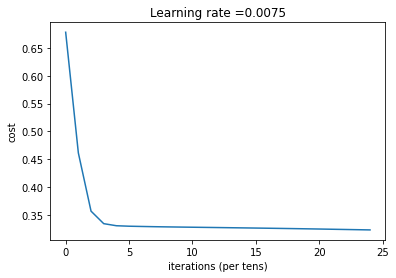

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 9, 49, 1]
Cost after iteration 0: 0.689817
Cost after iteration 100: 0.549572
Cost after iteration 200: 0.454387
Cost after iteration 300: 0.393198
Cost after iteration 400: 0.359010
Cost after iteration 500: 0.342448
Cost after iteration 600: 0.335116
Cost after iteration 700: 0.331995
Cost after iteration 800: 0.330673
Cost after iteration 900: 0.330071
Cost after iteration 1000: 0.329744
Cost after iteration 1100: 0.329515
Cost after iteration 1200: 0.329312
Cost after iteration 1300: 0.329145
Cost after iteration 1400: 0.328996
Cost after iteration 1500: 0.328851
Cost after iteration 1600: 0.328712
Cost after iteration 1700: 0.328577
Cost after iteration 1800: 0.328445
Cost after iteration 1900: 0.328315
Cost after iteration 2000: 0.328185
Cost after iteration 2100: 0.328054
Cost after iteration 2200: 0.327921
Cost after iteration 2300: 0.327787
Cost after i

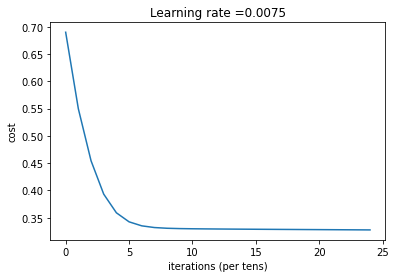

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 9, 49, 1]
Cost after iteration 0: 0.689037
Cost after iteration 100: 0.527615
Cost after iteration 200: 0.412924
Cost after iteration 300: 0.356344
Cost after iteration 400: 0.338373
Cost after iteration 500: 0.333666
Cost after iteration 600: 0.332266
Cost after iteration 700: 0.331598
Cost after iteration 800: 0.331127
Cost after iteration 900: 0.330749
Cost after iteration 1000: 0.330270
Cost after iteration 1100: 0.329877
Cost after iteration 1200: 0.329584
Cost after iteration 1300: 0.329316
Cost after iteration 1400: 0.329063
Cost after iteration 1500: 0.328817
Cost after iteration 1600: 0.328575
Cost after iteration 1700: 0.328333
Cost after iteration 1800: 0.328090
Cost after iteration 1900: 0.327843
Cost after iteration 2000: 0.327592
Cost after iteration 2100: 0.327336
Cost after iteration 2200: 0.327073
Cost after iteration 2300: 0.326805
Cost after i

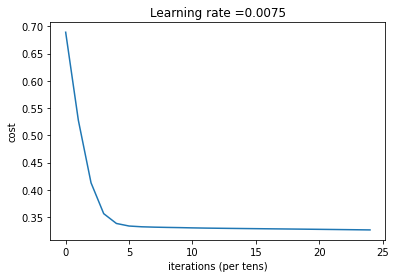

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 9, 49, 1]
Cost after iteration 0: 0.693632
Cost after iteration 100: 0.567019
Cost after iteration 200: 0.483305
Cost after iteration 300: 0.426661
Cost after iteration 400: 0.388972
Cost after iteration 500: 0.364871
Cost after iteration 600: 0.350134
Cost after iteration 700: 0.341464
Cost after iteration 800: 0.336495
Cost after iteration 900: 0.333671
Cost after iteration 1000: 0.332002
Cost after iteration 1100: 0.330929
Cost after iteration 1200: 0.330243
Cost after iteration 1300: 0.329798
Cost after iteration 1400: 0.329480
Cost after iteration 1500: 0.329248
Cost after iteration 1600: 0.329058
Cost after iteration 1700: 0.328881
Cost after iteration 1800: 0.328707
Cost after iteration 1900: 0.328535
Cost after iteration 2000: 0.328351
Cost after iteration 2100: 0.328166
Cost after iteration 2200: 0.327986
Cost after iteration 2300: 0.327812
Cost after i

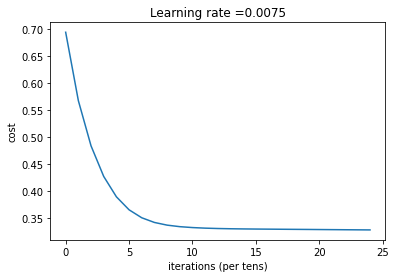

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 9, 49, 1]
Cost after iteration 0: 0.700589
Cost after iteration 100: 0.574341
Cost after iteration 200: 0.493486
Cost after iteration 300: 0.437083
Cost after iteration 400: 0.397809
Cost after iteration 500: 0.371199
Cost after iteration 600: 0.354054
Cost after iteration 700: 0.343603
Cost after iteration 800: 0.337520
Cost after iteration 900: 0.334080
Cost after iteration 1000: 0.332162
Cost after iteration 1100: 0.331081
Cost after iteration 1200: 0.330448
Cost after iteration 1300: 0.330053
Cost after iteration 1400: 0.329778
Cost after iteration 1500: 0.329562
Cost after iteration 1600: 0.329372
Cost after iteration 1700: 0.329195
Cost after iteration 1800: 0.329036
Cost after iteration 1900: 0.328879
Cost after iteration 2000: 0.328719
Cost after iteration 2100: 0.328561
Cost after iteration 2200: 0.328409
Cost after iteration 2300: 0.328265
Cost after i

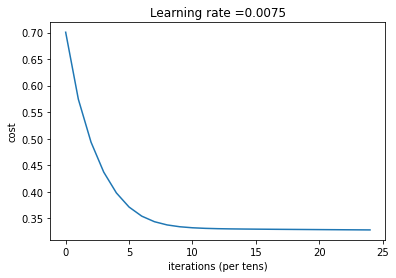

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 17, 49, 1]
Cost after iteration 0: 0.693196
Cost after iteration 100: 0.579567
Cost after iteration 200: 0.503357
Cost after iteration 300: 0.450849
Cost after iteration 400: 0.414407
Cost after iteration 500: 0.388990
Cost after iteration 600: 0.371270
Cost after iteration 700: 0.358949
Cost after iteration 800: 0.350413
Cost after iteration 900: 0.344518
Cost after iteration 1000: 0.340459
Cost after iteration 1100: 0.337669
Cost after iteration 1200: 0.335756
Cost after iteration 1300: 0.334445
Cost after iteration 1400: 0.333547
Cost after iteration 1500: 0.332933
Cost after iteration 1600: 0.332514
Cost after iteration 1700: 0.332227
Cost after iteration 1800: 0.332031
Cost after iteration 1900: 0.331897
Cost after iteration 2000: 0.331806
Cost after iteration 2100: 0.331743
Cost after iteration 2200: 0.331700
Cost after iteration 2300: 0.331671
Cost after i

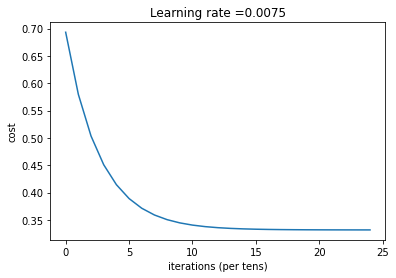

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 17, 49, 1]
Cost after iteration 0: 0.687921
Cost after iteration 100: 0.491061
Cost after iteration 200: 0.390379
Cost after iteration 300: 0.349908
Cost after iteration 400: 0.336886
Cost after iteration 500: 0.333051
Cost after iteration 600: 0.331827
Cost after iteration 700: 0.331331
Cost after iteration 800: 0.331078
Cost after iteration 900: 0.330918
Cost after iteration 1000: 0.330788
Cost after iteration 1100: 0.330671
Cost after iteration 1200: 0.330559
Cost after iteration 1300: 0.330448
Cost after iteration 1400: 0.330337
Cost after iteration 1500: 0.330225
Cost after iteration 1600: 0.330112
Cost after iteration 1700: 0.329998
Cost after iteration 1800: 0.329882
Cost after iteration 1900: 0.329765
Cost after iteration 2000: 0.329645
Cost after iteration 2100: 0.329524
Cost after iteration 2200: 0.329400
Cost after iteration 2300: 0.329274
Cost after i

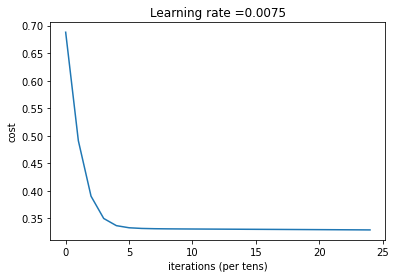

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 17, 49, 1]
Cost after iteration 0: 0.698678
Cost after iteration 100: 0.550570
Cost after iteration 200: 0.459207
Cost after iteration 300: 0.402091
Cost after iteration 400: 0.368351
Cost after iteration 500: 0.349752
Cost after iteration 600: 0.340061
Cost after iteration 700: 0.335187
Cost after iteration 800: 0.332764
Cost after iteration 900: 0.331554
Cost after iteration 1000: 0.330934
Cost after iteration 1100: 0.330580
Cost after iteration 1200: 0.330346
Cost after iteration 1300: 0.330178
Cost after iteration 1400: 0.330049
Cost after iteration 1500: 0.329940
Cost after iteration 1600: 0.329794
Cost after iteration 1700: 0.329540
Cost after iteration 1800: 0.329418
Cost after iteration 1900: 0.329307
Cost after iteration 2000: 0.329198
Cost after iteration 2100: 0.329088
Cost after iteration 2200: 0.328975
Cost after iteration 2300: 0.328854
Cost after 

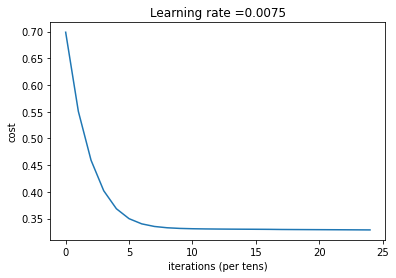

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 17, 49, 1]
Cost after iteration 0: 0.690462
Cost after iteration 100: 0.554876
Cost after iteration 200: 0.457939
Cost after iteration 300: 0.390740
Cost after iteration 400: 0.353736
Cost after iteration 500: 0.337914
Cost after iteration 600: 0.332132
Cost after iteration 700: 0.330077
Cost after iteration 800: 0.329263
Cost after iteration 900: 0.328867
Cost after iteration 1000: 0.328615
Cost after iteration 1100: 0.328423
Cost after iteration 1200: 0.328253
Cost after iteration 1300: 0.328091
Cost after iteration 1400: 0.327928
Cost after iteration 1500: 0.327765
Cost after iteration 1600: 0.327601
Cost after iteration 1700: 0.327434
Cost after iteration 1800: 0.327265
Cost after iteration 1900: 0.327093
Cost after iteration 2000: 0.326915
Cost after iteration 2100: 0.326734
Cost after iteration 2200: 0.326549
Cost after iteration 2300: 0.326358
Cost after 

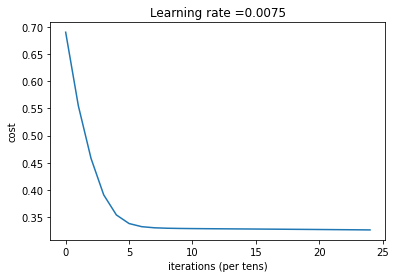

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 17, 49, 1]
Cost after iteration 0: 0.687871
Cost after iteration 100: 0.499664
Cost after iteration 200: 0.397111
Cost after iteration 300: 0.352390
Cost after iteration 400: 0.337149
Cost after iteration 500: 0.332494
Cost after iteration 600: 0.331024
Cost after iteration 700: 0.330455
Cost after iteration 800: 0.330152
Cost after iteration 900: 0.329884
Cost after iteration 1000: 0.329674
Cost after iteration 1100: 0.329499
Cost after iteration 1200: 0.329333
Cost after iteration 1300: 0.329172
Cost after iteration 1400: 0.329009
Cost after iteration 1500: 0.328843
Cost after iteration 1600: 0.328663
Cost after iteration 1700: 0.328479
Cost after iteration 1800: 0.328296
Cost after iteration 1900: 0.328087
Cost after iteration 2000: 0.327853
Cost after iteration 2100: 0.327644
Cost after iteration 2200: 0.327449
Cost after iteration 2300: 0.327257
Cost after 

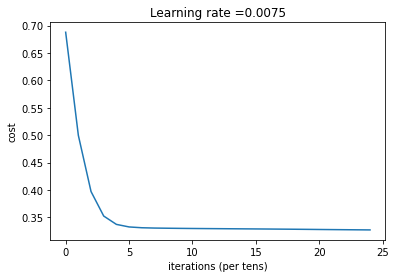

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 17, 49, 1]
Cost after iteration 0: 0.698595
Cost after iteration 100: 0.543873
Cost after iteration 200: 0.447722
Cost after iteration 300: 0.389537
Cost after iteration 400: 0.358339
Cost after iteration 500: 0.343353
Cost after iteration 600: 0.336677
Cost after iteration 700: 0.333801
Cost after iteration 800: 0.332557
Cost after iteration 900: 0.331978
Cost after iteration 1000: 0.331677
Cost after iteration 1100: 0.331499
Cost after iteration 1200: 0.331375
Cost after iteration 1300: 0.331275
Cost after iteration 1400: 0.331184
Cost after iteration 1500: 0.331094
Cost after iteration 1600: 0.331004
Cost after iteration 1700: 0.330913
Cost after iteration 1800: 0.330817
Cost after iteration 1900: 0.330715
Cost after iteration 2000: 0.330602
Cost after iteration 2100: 0.330490
Cost after iteration 2200: 0.330376
Cost after iteration 2300: 0.330257
Cost after 

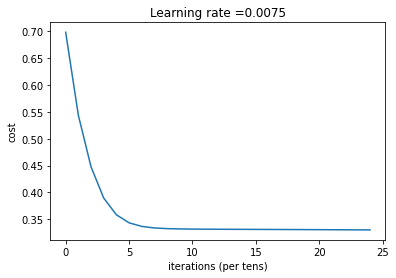

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 17, 49, 1]
Cost after iteration 0: 0.694355
Cost after iteration 100: 0.529749
Cost after iteration 200: 0.426663
Cost after iteration 300: 0.371701
Cost after iteration 400: 0.347153
Cost after iteration 500: 0.337465
Cost after iteration 600: 0.333755
Cost after iteration 700: 0.332298
Cost after iteration 800: 0.331657
Cost after iteration 900: 0.331317
Cost after iteration 1000: 0.331093
Cost after iteration 1100: 0.330916
Cost after iteration 1200: 0.330759
Cost after iteration 1300: 0.330613
Cost after iteration 1400: 0.330471
Cost after iteration 1500: 0.330330
Cost after iteration 1600: 0.330191
Cost after iteration 1700: 0.330054
Cost after iteration 1800: 0.329915
Cost after iteration 1900: 0.329777
Cost after iteration 2000: 0.329638
Cost after iteration 2100: 0.329498
Cost after iteration 2200: 0.329356
Cost after iteration 2300: 0.329212
Cost after 

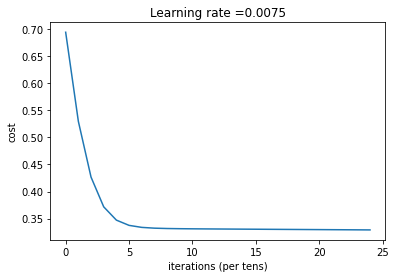

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 17, 49, 1]
Cost after iteration 0: 0.691126
Cost after iteration 100: 0.530250
Cost after iteration 200: 0.428014
Cost after iteration 300: 0.371691
Cost after iteration 400: 0.346403
Cost after iteration 500: 0.336611
Cost after iteration 600: 0.332957
Cost after iteration 700: 0.331460
Cost after iteration 800: 0.330724
Cost after iteration 900: 0.330272
Cost after iteration 1000: 0.329969
Cost after iteration 1100: 0.329739
Cost after iteration 1200: 0.329537
Cost after iteration 1300: 0.329345
Cost after iteration 1400: 0.329152
Cost after iteration 1500: 0.328954
Cost after iteration 1600: 0.328743
Cost after iteration 1700: 0.328533
Cost after iteration 1800: 0.328340
Cost after iteration 1900: 0.328151
Cost after iteration 2000: 0.327954
Cost after iteration 2100: 0.327755
Cost after iteration 2200: 0.327557
Cost after iteration 2300: 0.327352
Cost after 

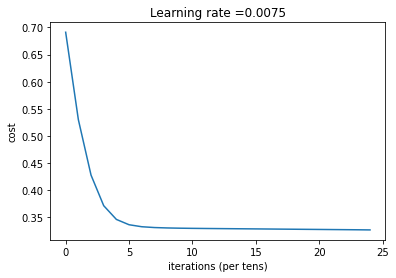

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 25, 49, 1]
Cost after iteration 0: 0.693162
Cost after iteration 100: 0.558427
Cost after iteration 200: 0.471841
Cost after iteration 300: 0.413742
Cost after iteration 400: 0.373108
Cost after iteration 500: 0.349700
Cost after iteration 600: 0.337896
Cost after iteration 700: 0.332648
Cost after iteration 800: 0.330513
Cost after iteration 900: 0.329643
Cost after iteration 1000: 0.329237
Cost after iteration 1100: 0.328989
Cost after iteration 1200: 0.328791
Cost after iteration 1300: 0.328604
Cost after iteration 1400: 0.328414
Cost after iteration 1500: 0.328217
Cost after iteration 1600: 0.328009
Cost after iteration 1700: 0.327787
Cost after iteration 1800: 0.327521
Cost after iteration 1900: 0.326831
Cost after iteration 2000: 0.326360
Cost after iteration 2100: 0.325991
Cost after iteration 2200: 0.325624
Cost after iteration 2300: 0.325243
Cost after i

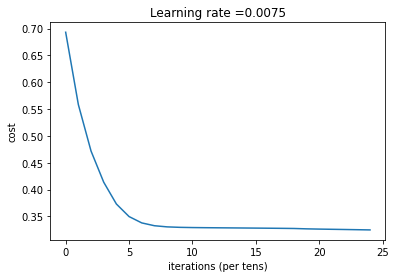

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 25, 49, 1]
Cost after iteration 0: 0.693394
Cost after iteration 100: 0.544329
Cost after iteration 200: 0.447515
Cost after iteration 300: 0.388009
Cost after iteration 400: 0.356103
Cost after iteration 500: 0.341240
Cost after iteration 600: 0.334877
Cost after iteration 700: 0.332182
Cost after iteration 800: 0.330977
Cost after iteration 900: 0.330388
Cost after iteration 1000: 0.330078
Cost after iteration 1100: 0.329884
Cost after iteration 1200: 0.329742
Cost after iteration 1300: 0.329619
Cost after iteration 1400: 0.329504
Cost after iteration 1500: 0.329393
Cost after iteration 1600: 0.329284
Cost after iteration 1700: 0.329173
Cost after iteration 1800: 0.329061
Cost after iteration 1900: 0.328947
Cost after iteration 2000: 0.328832
Cost after iteration 2100: 0.328713
Cost after iteration 2200: 0.328593
Cost after iteration 2300: 0.328470
Cost after i

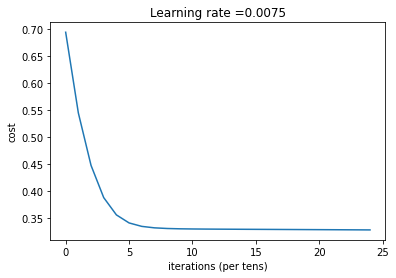

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 25, 49, 1]
Cost after iteration 0: 0.699021
Cost after iteration 100: 0.570442
Cost after iteration 200: 0.480210
Cost after iteration 300: 0.420615
Cost after iteration 400: 0.382695
Cost after iteration 500: 0.359803
Cost after iteration 600: 0.346652
Cost after iteration 700: 0.339373
Cost after iteration 800: 0.335434
Cost after iteration 900: 0.333322
Cost after iteration 1000: 0.332177
Cost after iteration 1100: 0.331541
Cost after iteration 1200: 0.331181
Cost after iteration 1300: 0.330963
Cost after iteration 1400: 0.330821
Cost after iteration 1500: 0.330721
Cost after iteration 1600: 0.330641
Cost after iteration 1700: 0.330572
Cost after iteration 1800: 0.330510
Cost after iteration 1900: 0.330452
Cost after iteration 2000: 0.330397
Cost after iteration 2100: 0.330342
Cost after iteration 2200: 0.330288
Cost after iteration 2300: 0.330233
Cost after 

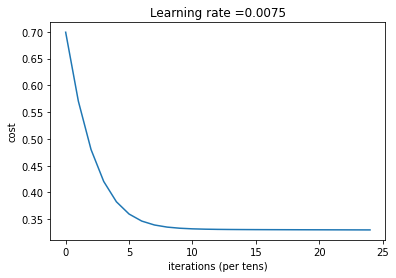

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 25, 49, 1]
Cost after iteration 0: 0.686974
Cost after iteration 100: 0.486082
Cost after iteration 200: 0.379588
Cost after iteration 300: 0.342933
Cost after iteration 400: 0.333413
Cost after iteration 500: 0.330956
Cost after iteration 600: 0.330155
Cost after iteration 700: 0.329718
Cost after iteration 800: 0.329362
Cost after iteration 900: 0.329071
Cost after iteration 1000: 0.328812
Cost after iteration 1100: 0.328554
Cost after iteration 1200: 0.328291
Cost after iteration 1300: 0.328028
Cost after iteration 1400: 0.327780
Cost after iteration 1500: 0.327535
Cost after iteration 1600: 0.327291
Cost after iteration 1700: 0.327045
Cost after iteration 1800: 0.326795
Cost after iteration 1900: 0.326536
Cost after iteration 2000: 0.326267
Cost after iteration 2100: 0.325987
Cost after iteration 2200: 0.325691
Cost after iteration 2300: 0.325400
Cost after 

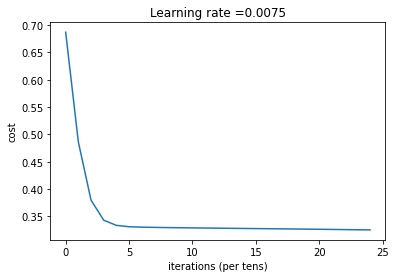

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 25, 49, 1]
Cost after iteration 0: 0.694607
Cost after iteration 100: 0.561673
Cost after iteration 200: 0.475856
Cost after iteration 300: 0.418328
Cost after iteration 400: 0.381022
Cost after iteration 500: 0.358297
Cost after iteration 600: 0.345304
Cost after iteration 700: 0.338211
Cost after iteration 800: 0.334429
Cost after iteration 900: 0.332427
Cost after iteration 1000: 0.331336
Cost after iteration 1100: 0.330648
Cost after iteration 1200: 0.330190
Cost after iteration 1300: 0.329901
Cost after iteration 1400: 0.329704
Cost after iteration 1500: 0.329553
Cost after iteration 1600: 0.329431
Cost after iteration 1700: 0.329323
Cost after iteration 1800: 0.329225
Cost after iteration 1900: 0.329129
Cost after iteration 2000: 0.329034
Cost after iteration 2100: 0.328941
Cost after iteration 2200: 0.328850
Cost after iteration 2300: 0.328758
Cost after 

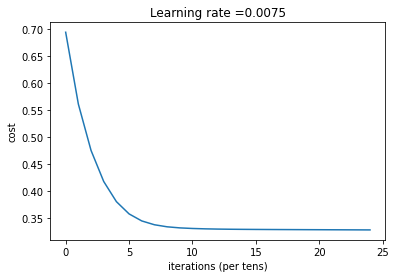

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 25, 49, 1]
Cost after iteration 0: 0.696483
Cost after iteration 100: 0.544098
Cost after iteration 200: 0.446667
Cost after iteration 300: 0.386298
Cost after iteration 400: 0.354816
Cost after iteration 500: 0.340805
Cost after iteration 600: 0.335094
Cost after iteration 700: 0.332729
Cost after iteration 800: 0.331623
Cost after iteration 900: 0.330987
Cost after iteration 1000: 0.330632
Cost after iteration 1100: 0.330397
Cost after iteration 1200: 0.330212
Cost after iteration 1300: 0.330053
Cost after iteration 1400: 0.329910
Cost after iteration 1500: 0.329774
Cost after iteration 1600: 0.329644
Cost after iteration 1700: 0.329518
Cost after iteration 1800: 0.329392
Cost after iteration 1900: 0.329268
Cost after iteration 2000: 0.329143
Cost after iteration 2100: 0.329018
Cost after iteration 2200: 0.328891
Cost after iteration 2300: 0.328764
Cost after 

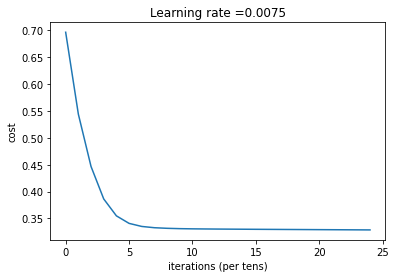

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 25, 49, 1]
Cost after iteration 0: 0.690308
Cost after iteration 100: 0.544239
Cost after iteration 200: 0.440012
Cost after iteration 300: 0.379244
Cost after iteration 400: 0.350595
Cost after iteration 500: 0.338629
Cost after iteration 600: 0.333943
Cost after iteration 700: 0.332099
Cost after iteration 800: 0.331300
Cost after iteration 900: 0.330893
Cost after iteration 1000: 0.330629
Cost after iteration 1100: 0.330417
Cost after iteration 1200: 0.330218
Cost after iteration 1300: 0.330033
Cost after iteration 1400: 0.329851
Cost after iteration 1500: 0.329673
Cost after iteration 1600: 0.329496
Cost after iteration 1700: 0.329320
Cost after iteration 1800: 0.329144
Cost after iteration 1900: 0.328966
Cost after iteration 2000: 0.328791
Cost after iteration 2100: 0.328619
Cost after iteration 2200: 0.328447
Cost after iteration 2300: 0.328274
Cost after 

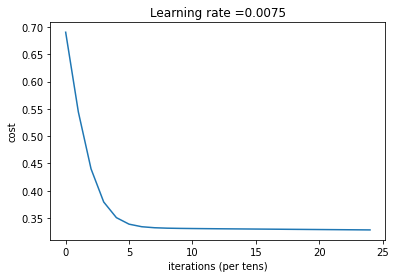

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 25, 49, 1]
Cost after iteration 0: 0.705282
Cost after iteration 100: 0.570437
Cost after iteration 200: 0.478472
Cost after iteration 300: 0.419212
Cost after iteration 400: 0.381485
Cost after iteration 500: 0.358832
Cost after iteration 600: 0.345754
Cost after iteration 700: 0.338444
Cost after iteration 800: 0.334508
Cost after iteration 900: 0.332395
Cost after iteration 1000: 0.331237
Cost after iteration 1100: 0.330567
Cost after iteration 1200: 0.330124
Cost after iteration 1300: 0.329793
Cost after iteration 1400: 0.329545
Cost after iteration 1500: 0.329335
Cost after iteration 1600: 0.329149
Cost after iteration 1700: 0.328973
Cost after iteration 1800: 0.328796
Cost after iteration 1900: 0.328624
Cost after iteration 2000: 0.328447
Cost after iteration 2100: 0.328265
Cost after iteration 2200: 0.328022
Cost after iteration 2300: 0.327636
Cost after 

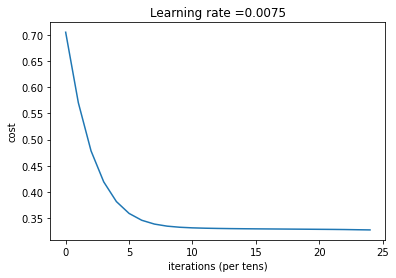

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 33, 49, 1]
Cost after iteration 0: 0.693165
Cost after iteration 100: 0.542829
Cost after iteration 200: 0.450273
Cost after iteration 300: 0.392179
Cost after iteration 400: 0.356277
Cost after iteration 500: 0.339631
Cost after iteration 600: 0.332452
Cost after iteration 700: 0.329347
Cost after iteration 800: 0.327827
Cost after iteration 900: 0.326949
Cost after iteration 1000: 0.326316
Cost after iteration 1100: 0.325727
Cost after iteration 1200: 0.325140
Cost after iteration 1300: 0.324580
Cost after iteration 1400: 0.324008
Cost after iteration 1500: 0.323350
Cost after iteration 1600: 0.322486
Cost after iteration 1700: 0.321767
Cost after iteration 1800: 0.321044
Cost after iteration 1900: 0.320290
Cost after iteration 2000: 0.319497
Cost after iteration 2100: 0.318668
Cost after iteration 2200: 0.317806
Cost after iteration 2300: 0.316923
Cost after i

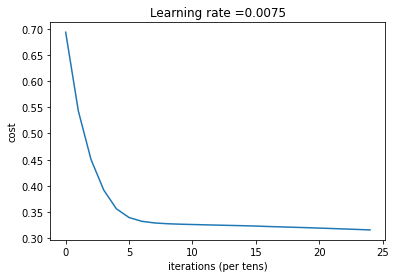

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 33, 49, 1]
Cost after iteration 0: 0.691469
Cost after iteration 100: 0.527921
Cost after iteration 200: 0.425353
Cost after iteration 300: 0.370536
Cost after iteration 400: 0.345625
Cost after iteration 500: 0.335447
Cost after iteration 600: 0.331162
Cost after iteration 700: 0.329322
Cost after iteration 800: 0.328438
Cost after iteration 900: 0.327955
Cost after iteration 1000: 0.327610
Cost after iteration 1100: 0.327317
Cost after iteration 1200: 0.327052
Cost after iteration 1300: 0.326799
Cost after iteration 1400: 0.326551
Cost after iteration 1500: 0.326308
Cost after iteration 1600: 0.326064
Cost after iteration 1700: 0.325817
Cost after iteration 1800: 0.325566
Cost after iteration 1900: 0.325309
Cost after iteration 2000: 0.325046
Cost after iteration 2100: 0.324774
Cost after iteration 2200: 0.324494
Cost after iteration 2300: 0.324205
Cost after i

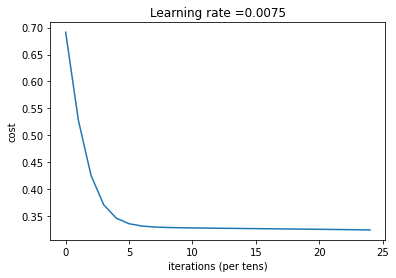

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 33, 49, 1]
Cost after iteration 0: 0.694133
Cost after iteration 100: 0.556826
Cost after iteration 200: 0.459063
Cost after iteration 300: 0.398833
Cost after iteration 400: 0.364367
Cost after iteration 500: 0.346457
Cost after iteration 600: 0.337799
Cost after iteration 700: 0.333678
Cost after iteration 800: 0.331746
Cost after iteration 900: 0.330769
Cost after iteration 1000: 0.330233
Cost after iteration 1100: 0.329927
Cost after iteration 1200: 0.329726
Cost after iteration 1300: 0.329574
Cost after iteration 1400: 0.329441
Cost after iteration 1500: 0.329310
Cost after iteration 1600: 0.329154
Cost after iteration 1700: 0.328982
Cost after iteration 1800: 0.328857
Cost after iteration 1900: 0.328742
Cost after iteration 2000: 0.328628
Cost after iteration 2100: 0.328513
Cost after iteration 2200: 0.328397
Cost after iteration 2300: 0.328279
Cost after 

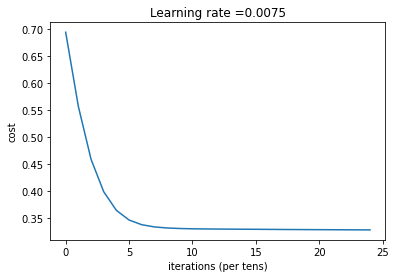

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 33, 49, 1]
Cost after iteration 0: 0.691522
Cost after iteration 100: 0.566406
Cost after iteration 200: 0.478995
Cost after iteration 300: 0.420660
Cost after iteration 400: 0.382809
Cost after iteration 500: 0.359549
Cost after iteration 600: 0.346029
Cost after iteration 700: 0.338570
Cost after iteration 800: 0.334656
Cost after iteration 900: 0.332663
Cost after iteration 1000: 0.331654
Cost after iteration 1100: 0.331129
Cost after iteration 1200: 0.330832
Cost after iteration 1300: 0.330646
Cost after iteration 1400: 0.330520
Cost after iteration 1500: 0.330424
Cost after iteration 1600: 0.330344
Cost after iteration 1700: 0.330270
Cost after iteration 1800: 0.330199
Cost after iteration 1900: 0.330131
Cost after iteration 2000: 0.330065
Cost after iteration 2100: 0.330000
Cost after iteration 2200: 0.329937
Cost after iteration 2300: 0.329874
Cost after 

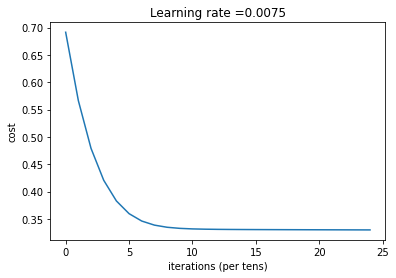

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 33, 49, 1]
Cost after iteration 0: 0.692024
Cost after iteration 100: 0.561964
Cost after iteration 200: 0.475219
Cost after iteration 300: 0.415865
Cost after iteration 400: 0.377372
Cost after iteration 500: 0.354454
Cost after iteration 600: 0.341923
Cost after iteration 700: 0.335499
Cost after iteration 800: 0.332330
Cost after iteration 900: 0.330766
Cost after iteration 1000: 0.329924
Cost after iteration 1100: 0.329407
Cost after iteration 1200: 0.329096
Cost after iteration 1300: 0.328867
Cost after iteration 1400: 0.328667
Cost after iteration 1500: 0.328483
Cost after iteration 1600: 0.328321
Cost after iteration 1700: 0.328173
Cost after iteration 1800: 0.328032
Cost after iteration 1900: 0.327891
Cost after iteration 2000: 0.327751
Cost after iteration 2100: 0.327610
Cost after iteration 2200: 0.327466
Cost after iteration 2300: 0.327318
Cost after 

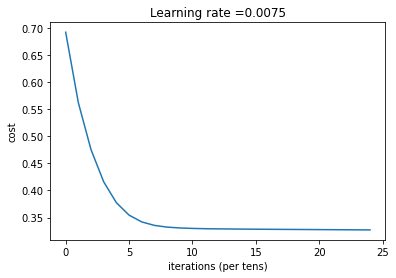

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 33, 49, 1]
Cost after iteration 0: 0.685376
Cost after iteration 100: 0.530014
Cost after iteration 200: 0.430521
Cost after iteration 300: 0.374379
Cost after iteration 400: 0.347973
Cost after iteration 500: 0.337113
Cost after iteration 600: 0.332914
Cost after iteration 700: 0.331270
Cost after iteration 800: 0.330563
Cost after iteration 900: 0.330195
Cost after iteration 1000: 0.329952
Cost after iteration 1100: 0.329754
Cost after iteration 1200: 0.329578
Cost after iteration 1300: 0.329411
Cost after iteration 1400: 0.329250
Cost after iteration 1500: 0.329091
Cost after iteration 1600: 0.328933
Cost after iteration 1700: 0.328776
Cost after iteration 1800: 0.328620
Cost after iteration 1900: 0.328463
Cost after iteration 2000: 0.328307
Cost after iteration 2100: 0.328149
Cost after iteration 2200: 0.327989
Cost after iteration 2300: 0.327827
Cost after 

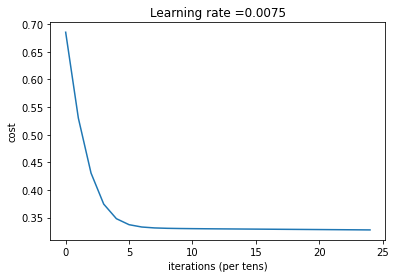

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 33, 49, 1]
Cost after iteration 0: 0.690033
Cost after iteration 100: 0.555163
Cost after iteration 200: 0.464660
Cost after iteration 300: 0.404545
Cost after iteration 400: 0.368355
Cost after iteration 500: 0.349036
Cost after iteration 600: 0.339677
Cost after iteration 700: 0.335389
Cost after iteration 800: 0.333442
Cost after iteration 900: 0.332515
Cost after iteration 1000: 0.332032
Cost after iteration 1100: 0.331732
Cost after iteration 1200: 0.331515
Cost after iteration 1300: 0.331334
Cost after iteration 1400: 0.331179
Cost after iteration 1500: 0.331040
Cost after iteration 1600: 0.330914
Cost after iteration 1700: 0.330794
Cost after iteration 1800: 0.330684
Cost after iteration 1900: 0.330577
Cost after iteration 2000: 0.330471
Cost after iteration 2100: 0.330365
Cost after iteration 2200: 0.330254
Cost after iteration 2300: 0.330143
Cost after 

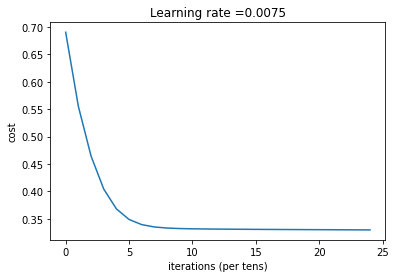

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 33, 49, 1]
Cost after iteration 0: 0.691984
Cost after iteration 100: 0.562849
Cost after iteration 200: 0.465730
Cost after iteration 300: 0.400771
Cost after iteration 400: 0.362508
Cost after iteration 500: 0.343374
Cost after iteration 600: 0.334900
Cost after iteration 700: 0.331369
Cost after iteration 800: 0.329879
Cost after iteration 900: 0.329169
Cost after iteration 1000: 0.328732
Cost after iteration 1100: 0.328412
Cost after iteration 1200: 0.328135
Cost after iteration 1300: 0.327881
Cost after iteration 1400: 0.327642
Cost after iteration 1500: 0.327419
Cost after iteration 1600: 0.327204
Cost after iteration 1700: 0.326996
Cost after iteration 1800: 0.326796
Cost after iteration 1900: 0.326599
Cost after iteration 2000: 0.326401
Cost after iteration 2100: 0.326199
Cost after iteration 2200: 0.325990
Cost after iteration 2300: 0.325777
Cost after 

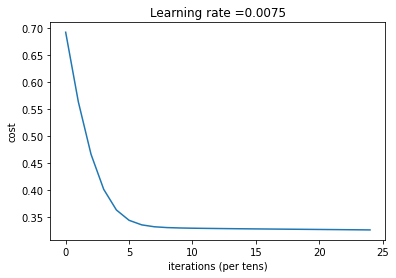

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 41, 49, 1]
Cost after iteration 0: 0.693175
Cost after iteration 100: 0.549244
Cost after iteration 200: 0.460967
Cost after iteration 300: 0.406763
Cost after iteration 400: 0.374257
Cost after iteration 500: 0.355314
Cost after iteration 600: 0.344078
Cost after iteration 700: 0.336345
Cost after iteration 800: 0.332569
Cost after iteration 900: 0.330501
Cost after iteration 1000: 0.329288
Cost after iteration 1100: 0.328504
Cost after iteration 1200: 0.327926
Cost after iteration 1300: 0.327466
Cost after iteration 1400: 0.327065
Cost after iteration 1500: 0.326687
Cost after iteration 1600: 0.326317
Cost after iteration 1700: 0.325943
Cost after iteration 1800: 0.325563
Cost after iteration 1900: 0.325172
Cost after iteration 2000: 0.324765
Cost after iteration 2100: 0.324343
Cost after iteration 2200: 0.323904
Cost after iteration 2300: 0.323446
Cost after i

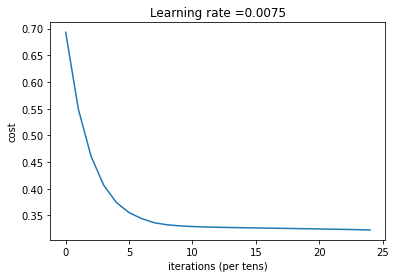

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 41, 49, 1]
Cost after iteration 0: 0.692432
Cost after iteration 100: 0.536736
Cost after iteration 200: 0.433096
Cost after iteration 300: 0.373767
Cost after iteration 400: 0.346422
Cost after iteration 500: 0.335906
Cost after iteration 600: 0.332235
Cost after iteration 700: 0.330967
Cost after iteration 800: 0.330483
Cost after iteration 900: 0.330269
Cost after iteration 1000: 0.330142
Cost after iteration 1100: 0.330041
Cost after iteration 1200: 0.329948
Cost after iteration 1300: 0.329849
Cost after iteration 1400: 0.329750
Cost after iteration 1500: 0.329659
Cost after iteration 1600: 0.329569
Cost after iteration 1700: 0.329478
Cost after iteration 1800: 0.329387
Cost after iteration 1900: 0.329294
Cost after iteration 2000: 0.329200
Cost after iteration 2100: 0.329104
Cost after iteration 2200: 0.329006
Cost after iteration 2300: 0.328907
Cost after i

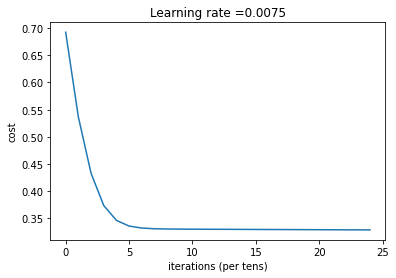

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 41, 49, 1]
Cost after iteration 0: 0.695680
Cost after iteration 100: 0.568928
Cost after iteration 200: 0.484127
Cost after iteration 300: 0.424867
Cost after iteration 400: 0.385362
Cost after iteration 500: 0.360583
Cost after iteration 600: 0.346208
Cost after iteration 700: 0.338391
Cost after iteration 800: 0.334315
Cost after iteration 900: 0.332221
Cost after iteration 1000: 0.331137
Cost after iteration 1100: 0.330554
Cost after iteration 1200: 0.330209
Cost after iteration 1300: 0.329978
Cost after iteration 1400: 0.329800
Cost after iteration 1500: 0.329647
Cost after iteration 1600: 0.329506
Cost after iteration 1700: 0.329370
Cost after iteration 1800: 0.329239
Cost after iteration 1900: 0.329106
Cost after iteration 2000: 0.328969
Cost after iteration 2100: 0.328816
Cost after iteration 2200: 0.328655
Cost after iteration 2300: 0.328483
Cost after 

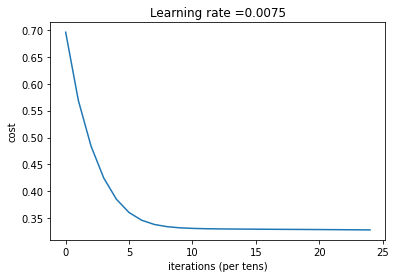

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 41, 49, 1]
Cost after iteration 0: 0.693201
Cost after iteration 100: 0.550124
Cost after iteration 200: 0.452723
Cost after iteration 300: 0.390905
Cost after iteration 400: 0.356920
Cost after iteration 500: 0.340727
Cost after iteration 600: 0.333782
Cost after iteration 700: 0.330928
Cost after iteration 800: 0.329741
Cost after iteration 900: 0.329208
Cost after iteration 1000: 0.328927
Cost after iteration 1100: 0.328738
Cost after iteration 1200: 0.328585
Cost after iteration 1300: 0.328447
Cost after iteration 1400: 0.328315
Cost after iteration 1500: 0.328183
Cost after iteration 1600: 0.328048
Cost after iteration 1700: 0.327909
Cost after iteration 1800: 0.327767
Cost after iteration 1900: 0.327612
Cost after iteration 2000: 0.327431
Cost after iteration 2100: 0.327241
Cost after iteration 2200: 0.327055
Cost after iteration 2300: 0.326868
Cost after 

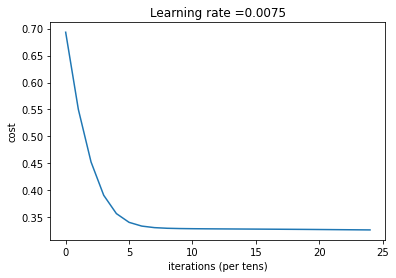

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 41, 49, 1]
Cost after iteration 0: 0.687729
Cost after iteration 100: 0.521838
Cost after iteration 200: 0.418613
Cost after iteration 300: 0.366357
Cost after iteration 400: 0.344385
Cost after iteration 500: 0.336092
Cost after iteration 600: 0.332815
Cost after iteration 700: 0.331417
Cost after iteration 800: 0.330804
Cost after iteration 900: 0.330464
Cost after iteration 1000: 0.330210
Cost after iteration 1100: 0.329991
Cost after iteration 1200: 0.329779
Cost after iteration 1300: 0.329539
Cost after iteration 1400: 0.329288
Cost after iteration 1500: 0.329051
Cost after iteration 1600: 0.328838
Cost after iteration 1700: 0.328630
Cost after iteration 1800: 0.328417
Cost after iteration 1900: 0.328194
Cost after iteration 2000: 0.327961
Cost after iteration 2100: 0.327733
Cost after iteration 2200: 0.327497
Cost after iteration 2300: 0.327227
Cost after 

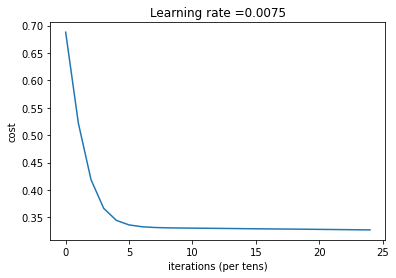

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 41, 49, 1]
Cost after iteration 0: 0.690991
Cost after iteration 100: 0.522153
Cost after iteration 200: 0.423838
Cost after iteration 300: 0.371631
Cost after iteration 400: 0.347476
Cost after iteration 500: 0.337283
Cost after iteration 600: 0.333071
Cost after iteration 700: 0.331284
Cost after iteration 800: 0.330462
Cost after iteration 900: 0.330020
Cost after iteration 1000: 0.329730
Cost after iteration 1100: 0.329507
Cost after iteration 1200: 0.329313
Cost after iteration 1300: 0.329131
Cost after iteration 1400: 0.328948
Cost after iteration 1500: 0.328758
Cost after iteration 1600: 0.328565
Cost after iteration 1700: 0.328366
Cost after iteration 1800: 0.328167
Cost after iteration 1900: 0.327968
Cost after iteration 2000: 0.327775
Cost after iteration 2100: 0.327586
Cost after iteration 2200: 0.327398
Cost after iteration 2300: 0.327210
Cost after 

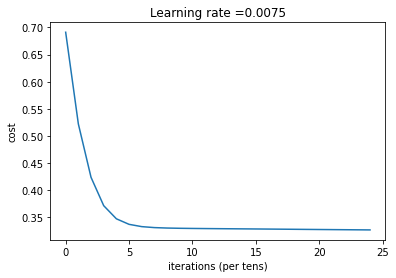

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 41, 49, 1]
Cost after iteration 0: 0.692781
Cost after iteration 100: 0.546276
Cost after iteration 200: 0.450081
Cost after iteration 300: 0.390382
Cost after iteration 400: 0.357449
Cost after iteration 500: 0.341403
Cost after iteration 600: 0.334215
Cost after iteration 700: 0.331074
Cost after iteration 800: 0.329655
Cost after iteration 900: 0.328939
Cost after iteration 1000: 0.328508
Cost after iteration 1100: 0.328194
Cost after iteration 1200: 0.327931
Cost after iteration 1300: 0.327683
Cost after iteration 1400: 0.327439
Cost after iteration 1500: 0.327175
Cost after iteration 1600: 0.326847
Cost after iteration 1700: 0.326462
Cost after iteration 1800: 0.326153
Cost after iteration 1900: 0.325894
Cost after iteration 2000: 0.325658
Cost after iteration 2100: 0.325433
Cost after iteration 2200: 0.325210
Cost after iteration 2300: 0.324985
Cost after 

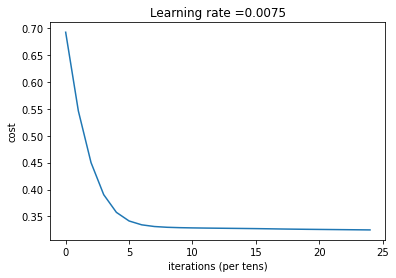

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 41, 49, 1]
Cost after iteration 0: 0.690720
Cost after iteration 100: 0.507814
Cost after iteration 200: 0.409436
Cost after iteration 300: 0.361353
Cost after iteration 400: 0.341213
Cost after iteration 500: 0.333460
Cost after iteration 600: 0.330350
Cost after iteration 700: 0.329103
Cost after iteration 800: 0.328517
Cost after iteration 900: 0.328143
Cost after iteration 1000: 0.327834
Cost after iteration 1100: 0.327560
Cost after iteration 1200: 0.327317
Cost after iteration 1300: 0.327098
Cost after iteration 1400: 0.326889
Cost after iteration 1500: 0.326684
Cost after iteration 1600: 0.326478
Cost after iteration 1700: 0.326269
Cost after iteration 1800: 0.326060
Cost after iteration 1900: 0.325850
Cost after iteration 2000: 0.325639
Cost after iteration 2100: 0.325425
Cost after iteration 2200: 0.325209
Cost after iteration 2300: 0.324988
Cost after 

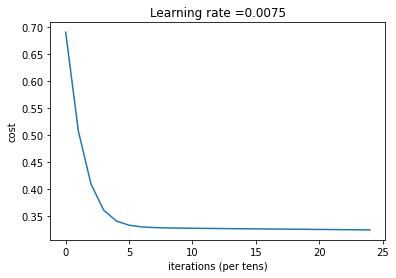

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 49, 49, 1]
Cost after iteration 0: 0.693155
Cost after iteration 100: 0.541623
Cost after iteration 200: 0.451747
Cost after iteration 300: 0.398255
Cost after iteration 400: 0.367528
Cost after iteration 500: 0.350564
Cost after iteration 600: 0.341468
Cost after iteration 700: 0.336672
Cost after iteration 800: 0.334127
Cost after iteration 900: 0.332462
Cost after iteration 1000: 0.331191
Cost after iteration 1100: 0.330606
Cost after iteration 1200: 0.330249
Cost after iteration 1300: 0.329996
Cost after iteration 1400: 0.329799
Cost after iteration 1500: 0.329625
Cost after iteration 1600: 0.329459
Cost after iteration 1700: 0.329294
Cost after iteration 1800: 0.329127
Cost after iteration 1900: 0.328956
Cost after iteration 2000: 0.328779
Cost after iteration 2100: 0.328594
Cost after iteration 2200: 0.328400
Cost after iteration 2300: 0.328196
Cost after i

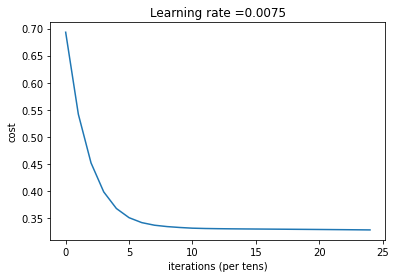

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 49, 49, 1]
Cost after iteration 0: 0.690416
Cost after iteration 100: 0.519114
Cost after iteration 200: 0.417213
Cost after iteration 300: 0.364114
Cost after iteration 400: 0.342316
Cost after iteration 500: 0.334841
Cost after iteration 600: 0.332461
Cost after iteration 700: 0.331663
Cost after iteration 800: 0.331314
Cost after iteration 900: 0.331119
Cost after iteration 1000: 0.330970
Cost after iteration 1100: 0.330832
Cost after iteration 1200: 0.330696
Cost after iteration 1300: 0.330563
Cost after iteration 1400: 0.330433
Cost after iteration 1500: 0.330306
Cost after iteration 1600: 0.330180
Cost after iteration 1700: 0.330055
Cost after iteration 1800: 0.329928
Cost after iteration 1900: 0.329801
Cost after iteration 2000: 0.329672
Cost after iteration 2100: 0.329542
Cost after iteration 2200: 0.329410
Cost after iteration 2300: 0.329275
Cost after i

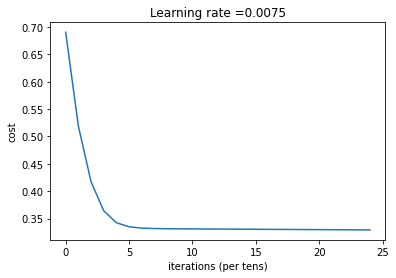

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 49, 49, 1]
Cost after iteration 0: 0.689269
Cost after iteration 100: 0.529119
Cost after iteration 200: 0.428794
Cost after iteration 300: 0.372651
Cost after iteration 400: 0.346891
Cost after iteration 500: 0.336876
Cost after iteration 600: 0.333280
Cost after iteration 700: 0.331958
Cost after iteration 800: 0.331401
Cost after iteration 900: 0.331108
Cost after iteration 1000: 0.330900
Cost after iteration 1100: 0.330732
Cost after iteration 1200: 0.330581
Cost after iteration 1300: 0.330440
Cost after iteration 1400: 0.330301
Cost after iteration 1500: 0.330161
Cost after iteration 1600: 0.330021
Cost after iteration 1700: 0.329881
Cost after iteration 1800: 0.329739
Cost after iteration 1900: 0.329597
Cost after iteration 2000: 0.329456
Cost after iteration 2100: 0.329315
Cost after iteration 2200: 0.329173
Cost after iteration 2300: 0.329031
Cost after 

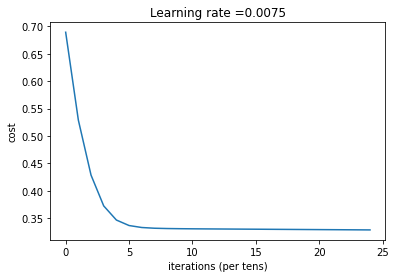

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 49, 49, 1]
Cost after iteration 0: 0.696097
Cost after iteration 100: 0.549166
Cost after iteration 200: 0.458947
Cost after iteration 300: 0.402340
Cost after iteration 400: 0.368496
Cost after iteration 500: 0.349611
Cost after iteration 600: 0.339706
Cost after iteration 700: 0.334716
Cost after iteration 800: 0.332244
Cost after iteration 900: 0.331005
Cost after iteration 1000: 0.330345
Cost after iteration 1100: 0.329944
Cost after iteration 1200: 0.329629
Cost after iteration 1300: 0.329310
Cost after iteration 1400: 0.329085
Cost after iteration 1500: 0.328922
Cost after iteration 1600: 0.328781
Cost after iteration 1700: 0.328645
Cost after iteration 1800: 0.328511
Cost after iteration 1900: 0.328378
Cost after iteration 2000: 0.328246
Cost after iteration 2100: 0.328114
Cost after iteration 2200: 0.327980
Cost after iteration 2300: 0.327844
Cost after 

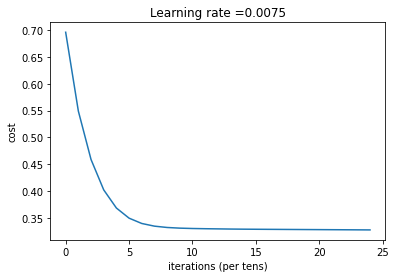

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 49, 49, 1]
Cost after iteration 0: 0.695133
Cost after iteration 100: 0.532075
Cost after iteration 200: 0.432792
Cost after iteration 300: 0.377668
Cost after iteration 400: 0.350483
Cost after iteration 500: 0.338508
Cost after iteration 600: 0.333556
Cost after iteration 700: 0.331501
Cost after iteration 800: 0.330608
Cost after iteration 900: 0.330171
Cost after iteration 1000: 0.329913
Cost after iteration 1100: 0.329723
Cost after iteration 1200: 0.329561
Cost after iteration 1300: 0.329413
Cost after iteration 1400: 0.329271
Cost after iteration 1500: 0.329130
Cost after iteration 1600: 0.328990
Cost after iteration 1700: 0.328846
Cost after iteration 1800: 0.328702
Cost after iteration 1900: 0.328548
Cost after iteration 2000: 0.328379
Cost after iteration 2100: 0.328179
Cost after iteration 2200: 0.327969
Cost after iteration 2300: 0.327743
Cost after 

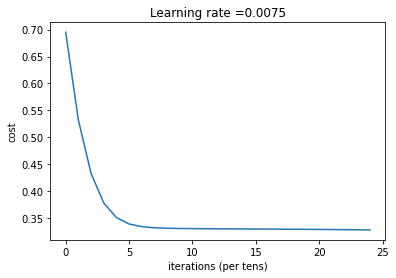

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 49, 49, 1]
Cost after iteration 0: 0.693892
Cost after iteration 100: 0.545794
Cost after iteration 200: 0.450668
Cost after iteration 300: 0.392584
Cost after iteration 400: 0.360612
Cost after iteration 500: 0.344705
Cost after iteration 600: 0.337356
Cost after iteration 700: 0.334018
Cost after iteration 800: 0.332479
Cost after iteration 900: 0.331723
Cost after iteration 1000: 0.331313
Cost after iteration 1100: 0.331060
Cost after iteration 1200: 0.330879
Cost after iteration 1300: 0.330735
Cost after iteration 1400: 0.330607
Cost after iteration 1500: 0.330487
Cost after iteration 1600: 0.330372
Cost after iteration 1700: 0.330259
Cost after iteration 1800: 0.330149
Cost after iteration 1900: 0.330039
Cost after iteration 2000: 0.329931
Cost after iteration 2100: 0.329821
Cost after iteration 2200: 0.329712
Cost after iteration 2300: 0.329600
Cost after 

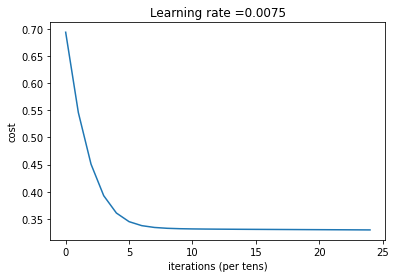

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 49, 49, 1]
Cost after iteration 0: 0.693021
Cost after iteration 100: 0.558072
Cost after iteration 200: 0.465601
Cost after iteration 300: 0.405440
Cost after iteration 400: 0.369003
Cost after iteration 500: 0.348933
Cost after iteration 600: 0.338759
Cost after iteration 700: 0.333871
Cost after iteration 800: 0.331555
Cost after iteration 900: 0.330428
Cost after iteration 1000: 0.329837
Cost after iteration 1100: 0.329478
Cost after iteration 1200: 0.329227
Cost after iteration 1300: 0.329021
Cost after iteration 1400: 0.328808
Cost after iteration 1500: 0.328540
Cost after iteration 1600: 0.328335
Cost after iteration 1700: 0.328169
Cost after iteration 1800: 0.328013
Cost after iteration 1900: 0.327858
Cost after iteration 2000: 0.327704
Cost after iteration 2100: 0.327549
Cost after iteration 2200: 0.327389
Cost after iteration 2300: 0.327225
Cost after 

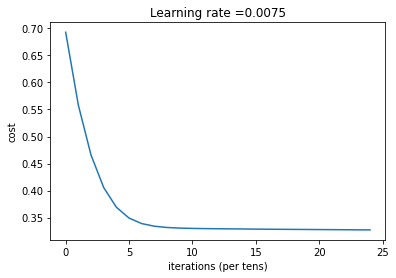

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 49, 49, 1]
Cost after iteration 0: 0.686264
Cost after iteration 100: 0.521186
Cost after iteration 200: 0.421196
Cost after iteration 300: 0.368025
Cost after iteration 400: 0.344584
Cost after iteration 500: 0.335586
Cost after iteration 600: 0.332321
Cost after iteration 700: 0.331100
Cost after iteration 800: 0.330565
Cost after iteration 900: 0.330255
Cost after iteration 1000: 0.330036
Cost after iteration 1100: 0.329857
Cost after iteration 1200: 0.329692
Cost after iteration 1300: 0.329533
Cost after iteration 1400: 0.329381
Cost after iteration 1500: 0.329235
Cost after iteration 1600: 0.329089
Cost after iteration 1700: 0.328944
Cost after iteration 1800: 0.328796
Cost after iteration 1900: 0.328645
Cost after iteration 2000: 0.328492
Cost after iteration 2100: 0.328337
Cost after iteration 2200: 0.328181
Cost after iteration 2300: 0.328022
Cost after 

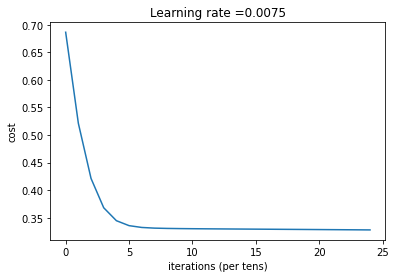

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 57, 49, 1]
Cost after iteration 0: 0.693088
Cost after iteration 100: 0.518252
Cost after iteration 200: 0.387076
Cost after iteration 300: 0.337661
Cost after iteration 400: 0.329109
Cost after iteration 500: 0.327833
Cost after iteration 600: 0.327399
Cost after iteration 700: 0.327043
Cost after iteration 800: 0.326683
Cost after iteration 900: 0.326310
Cost after iteration 1000: 0.325922
Cost after iteration 1100: 0.325519
Cost after iteration 1200: 0.325097
Cost after iteration 1300: 0.324655
Cost after iteration 1400: 0.324192
Cost after iteration 1500: 0.323706
Cost after iteration 1600: 0.323194
Cost after iteration 1700: 0.322653
Cost after iteration 1800: 0.322082
Cost after iteration 1900: 0.321478
Cost after iteration 2000: 0.320836
Cost after iteration 2100: 0.320154
Cost after iteration 2200: 0.319427
Cost after iteration 2300: 0.318651
Cost after i

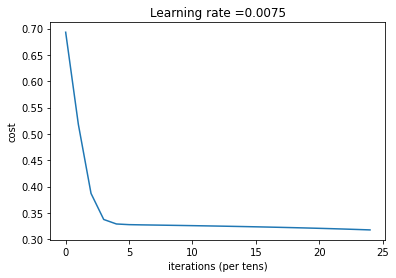

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 57, 49, 1]
Cost after iteration 0: 0.694335
Cost after iteration 100: 0.552506
Cost after iteration 200: 0.459059
Cost after iteration 300: 0.398506
Cost after iteration 400: 0.363048
Cost after iteration 500: 0.344980
Cost after iteration 600: 0.336875
Cost after iteration 700: 0.333513
Cost after iteration 800: 0.332122
Cost after iteration 900: 0.331474
Cost after iteration 1000: 0.331132
Cost after iteration 1100: 0.330923
Cost after iteration 1200: 0.330775
Cost after iteration 1300: 0.330648
Cost after iteration 1400: 0.330525
Cost after iteration 1500: 0.330401
Cost after iteration 1600: 0.330278
Cost after iteration 1700: 0.330155
Cost after iteration 1800: 0.330029
Cost after iteration 1900: 0.329898
Cost after iteration 2000: 0.329758
Cost after iteration 2100: 0.329617
Cost after iteration 2200: 0.329478
Cost after iteration 2300: 0.329334
Cost after i

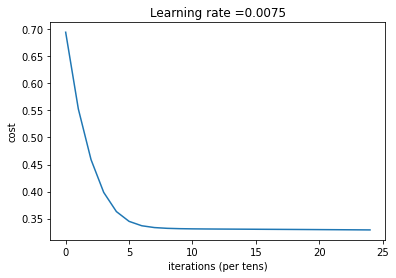

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 57, 49, 1]
Cost after iteration 0: 0.696361
Cost after iteration 100: 0.575168
Cost after iteration 200: 0.492237
Cost after iteration 300: 0.433840
Cost after iteration 400: 0.393117
Cost after iteration 500: 0.366327
Cost after iteration 600: 0.350109
Cost after iteration 700: 0.341095
Cost after iteration 800: 0.336419
Cost after iteration 900: 0.334086
Cost after iteration 1000: 0.332920
Cost after iteration 1100: 0.332280
Cost after iteration 1200: 0.331883
Cost after iteration 1300: 0.331665
Cost after iteration 1400: 0.331523
Cost after iteration 1500: 0.331413
Cost after iteration 1600: 0.331317
Cost after iteration 1700: 0.331227
Cost after iteration 1800: 0.331139
Cost after iteration 1900: 0.331052
Cost after iteration 2000: 0.330965
Cost after iteration 2100: 0.330878
Cost after iteration 2200: 0.330792
Cost after iteration 2300: 0.330705
Cost after 

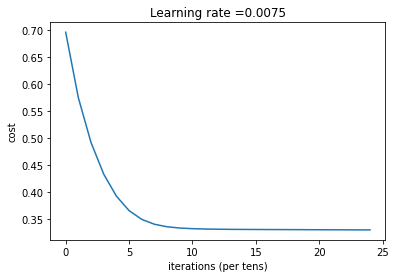

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 57, 49, 1]
Cost after iteration 0: 0.686231
Cost after iteration 100: 0.520588
Cost after iteration 200: 0.415456
Cost after iteration 300: 0.361962
Cost after iteration 400: 0.340946
Cost after iteration 500: 0.333924
Cost after iteration 600: 0.331678
Cost after iteration 700: 0.330877
Cost after iteration 800: 0.330482
Cost after iteration 900: 0.330180
Cost after iteration 1000: 0.329895
Cost after iteration 1100: 0.329684
Cost after iteration 1200: 0.329501
Cost after iteration 1300: 0.329329
Cost after iteration 1400: 0.329158
Cost after iteration 1500: 0.328987
Cost after iteration 1600: 0.328817
Cost after iteration 1700: 0.328644
Cost after iteration 1800: 0.328469
Cost after iteration 1900: 0.328292
Cost after iteration 2000: 0.328113
Cost after iteration 2100: 0.327929
Cost after iteration 2200: 0.327742
Cost after iteration 2300: 0.327548
Cost after 

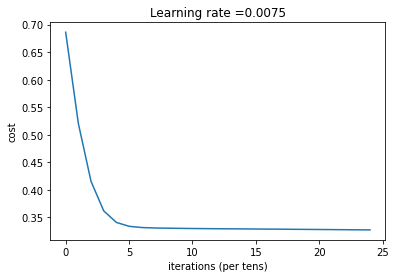

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 57, 49, 1]
Cost after iteration 0: 0.685743
Cost after iteration 100: 0.531766
Cost after iteration 200: 0.433701
Cost after iteration 300: 0.378344
Cost after iteration 400: 0.351095
Cost after iteration 500: 0.339162
Cost after iteration 600: 0.334265
Cost after iteration 700: 0.332270
Cost after iteration 800: 0.331422
Cost after iteration 900: 0.331006
Cost after iteration 1000: 0.330758
Cost after iteration 1100: 0.330571
Cost after iteration 1200: 0.330409
Cost after iteration 1300: 0.330257
Cost after iteration 1400: 0.330104
Cost after iteration 1500: 0.329868
Cost after iteration 1600: 0.329649
Cost after iteration 1700: 0.329482
Cost after iteration 1800: 0.329328
Cost after iteration 1900: 0.329177
Cost after iteration 2000: 0.329019
Cost after iteration 2100: 0.328851
Cost after iteration 2200: 0.328667
Cost after iteration 2300: 0.328476
Cost after 

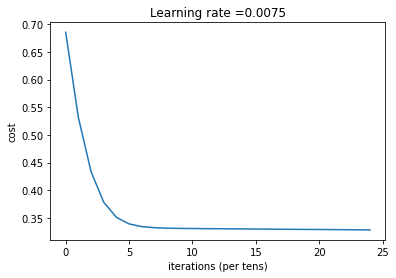

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 57, 49, 1]
Cost after iteration 0: 0.689538
Cost after iteration 100: 0.527861
Cost after iteration 200: 0.428160
Cost after iteration 300: 0.372922
Cost after iteration 400: 0.347621
Cost after iteration 500: 0.337622
Cost after iteration 600: 0.333920
Cost after iteration 700: 0.332509
Cost after iteration 800: 0.331881
Cost after iteration 900: 0.331518
Cost after iteration 1000: 0.331272
Cost after iteration 1100: 0.331086
Cost after iteration 1200: 0.330921
Cost after iteration 1300: 0.330768
Cost after iteration 1400: 0.330622
Cost after iteration 1500: 0.330479
Cost after iteration 1600: 0.330336
Cost after iteration 1700: 0.330194
Cost after iteration 1800: 0.330045
Cost after iteration 1900: 0.329865
Cost after iteration 2000: 0.329702
Cost after iteration 2100: 0.329549
Cost after iteration 2200: 0.329396
Cost after iteration 2300: 0.329242
Cost after 

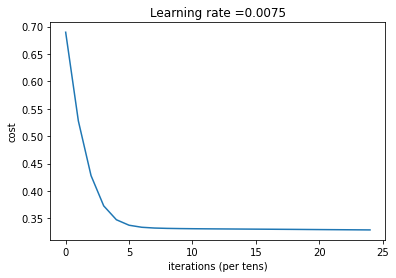

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 57, 49, 1]
Cost after iteration 0: 0.693955
Cost after iteration 100: 0.541555
Cost after iteration 200: 0.448056
Cost after iteration 300: 0.391353
Cost after iteration 400: 0.359648
Cost after iteration 500: 0.343558
Cost after iteration 600: 0.335932
Cost after iteration 700: 0.332419
Cost after iteration 800: 0.330772
Cost after iteration 900: 0.329946
Cost after iteration 1000: 0.329487
Cost after iteration 1100: 0.329187
Cost after iteration 1200: 0.328929
Cost after iteration 1300: 0.328670
Cost after iteration 1400: 0.328462
Cost after iteration 1500: 0.328285
Cost after iteration 1600: 0.328122
Cost after iteration 1700: 0.327965
Cost after iteration 1800: 0.327806
Cost after iteration 1900: 0.327644
Cost after iteration 2000: 0.327478
Cost after iteration 2100: 0.327308
Cost after iteration 2200: 0.327134
Cost after iteration 2300: 0.326951
Cost after 

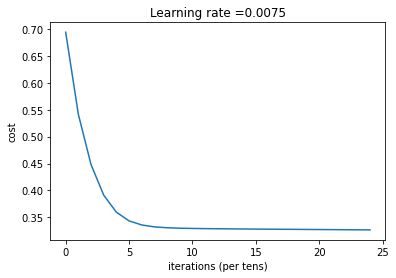

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 57, 49, 1]
Cost after iteration 0: 0.692001
Cost after iteration 100: 0.556793
Cost after iteration 200: 0.465488
Cost after iteration 300: 0.404065
Cost after iteration 400: 0.366672
Cost after iteration 500: 0.346826
Cost after iteration 600: 0.337360
Cost after iteration 700: 0.333121
Cost after iteration 800: 0.331220
Cost after iteration 900: 0.330284
Cost after iteration 1000: 0.329787
Cost after iteration 1100: 0.329465
Cost after iteration 1200: 0.329206
Cost after iteration 1300: 0.328969
Cost after iteration 1400: 0.328734
Cost after iteration 1500: 0.328472
Cost after iteration 1600: 0.328197
Cost after iteration 1700: 0.327943
Cost after iteration 1800: 0.327703
Cost after iteration 1900: 0.327468
Cost after iteration 2000: 0.327242
Cost after iteration 2100: 0.327020
Cost after iteration 2200: 0.326803
Cost after iteration 2300: 0.326591
Cost after 

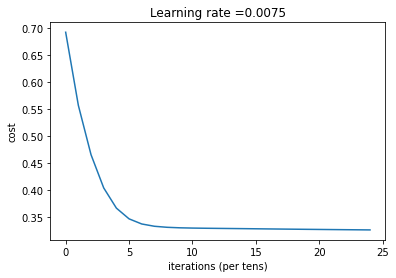

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 1, 57, 1]
Cost after iteration 0: 0.693155
Cost after iteration 100: 0.569661
Cost after iteration 200: 0.484720
Cost after iteration 300: 0.426607
Cost after iteration 400: 0.386508
Cost after iteration 500: 0.360076
Cost after iteration 600: 0.344654
Cost after iteration 700: 0.336696
Cost after iteration 800: 0.332591
Cost after iteration 900: 0.331261
Cost after iteration 1000: 0.330785
Cost after iteration 1100: 0.330603
Cost after iteration 1200: 0.330518
Cost after iteration 1300: 0.330464
Cost after iteration 1400: 0.330419
Cost after iteration 1500: 0.330376
Cost after iteration 1600: 0.330332
Cost after iteration 1700: 0.330288
Cost after iteration 1800: 0.330243
Cost after iteration 1900: 0.330196
Cost after iteration 2000: 0.330148
Cost after iteration 2100: 0.330099
Cost after iteration 2200: 0.330048
Cost after iteration 2300: 0.329996
Cost after it

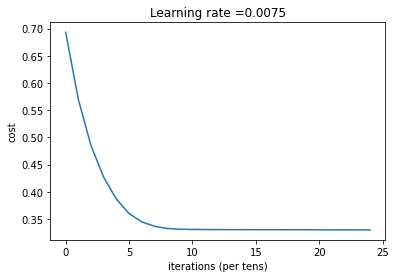

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 1, 57, 1]
Cost after iteration 0: 0.699521
Cost after iteration 100: 0.582134
Cost after iteration 200: 0.507444
Cost after iteration 300: 0.455851
Cost after iteration 400: 0.419307
Cost after iteration 500: 0.392974
Cost after iteration 600: 0.374142
Cost after iteration 700: 0.360859
Cost after iteration 800: 0.351602
Cost after iteration 900: 0.345188
Cost after iteration 1000: 0.340766
Cost after iteration 1100: 0.337738
Cost after iteration 1200: 0.335673
Cost after iteration 1300: 0.334269
Cost after iteration 1400: 0.333318
Cost after iteration 1500: 0.332672
Cost after iteration 1600: 0.332234
Cost after iteration 1700: 0.331934
Cost after iteration 1800: 0.331727
Cost after iteration 1900: 0.331583
Cost after iteration 2000: 0.331480
Cost after iteration 2100: 0.331405
Cost after iteration 2200: 0.331347
Cost after iteration 2300: 0.331301
Cost after it

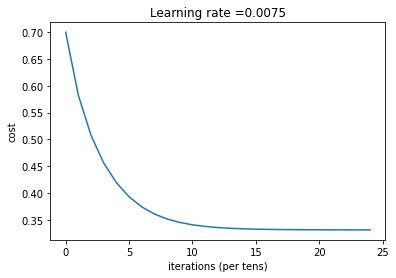

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 1, 57, 1]
Cost after iteration 0: 0.692046
Cost after iteration 100: 0.412064
Cost after iteration 200: 0.335909
Cost after iteration 300: 0.331320
Cost after iteration 400: 0.330639
Cost after iteration 500: 0.330117
Cost after iteration 600: 0.329740
Cost after iteration 700: 0.329402
Cost after iteration 800: 0.329076
Cost after iteration 900: 0.328751
Cost after iteration 1000: 0.328425
Cost after iteration 1100: 0.328093
Cost after iteration 1200: 0.327749
Cost after iteration 1300: 0.327382
Cost after iteration 1400: 0.326986
Cost after iteration 1500: 0.326560
Cost after iteration 1600: 0.326147
Cost after iteration 1700: 0.325738
Cost after iteration 1800: 0.325320
Cost after iteration 1900: 0.324887
Cost after iteration 2000: 0.324437
Cost after iteration 2100: 0.323967
Cost after iteration 2200: 0.323474
Cost after iteration 2300: 0.322957
Cost after i

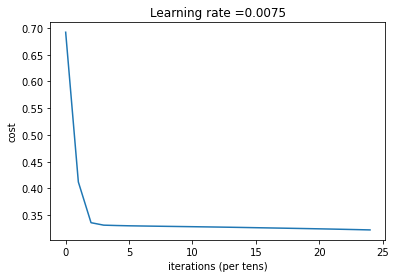

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 1, 57, 1]
Cost after iteration 0: 0.693219
Cost after iteration 100: 0.577021
Cost after iteration 200: 0.500014
Cost after iteration 300: 0.447736
Cost after iteration 400: 0.411805
Cost after iteration 500: 0.386990
Cost after iteration 600: 0.369838
Cost after iteration 700: 0.357988
Cost after iteration 800: 0.349810
Cost after iteration 900: 0.344167
Cost after iteration 1000: 0.340276
Cost after iteration 1100: 0.337588
Cost after iteration 1200: 0.335697
Cost after iteration 1300: 0.334169
Cost after iteration 1400: 0.333123
Cost after iteration 1500: 0.332368
Cost after iteration 1600: 0.331707
Cost after iteration 1700: 0.330994
Cost after iteration 1800: 0.330148
Cost after iteration 1900: 0.329409
Cost after iteration 2000: 0.328881
Cost after iteration 2100: 0.328450
Cost after iteration 2200: 0.328065
Cost after iteration 2300: 0.327718
Cost after i

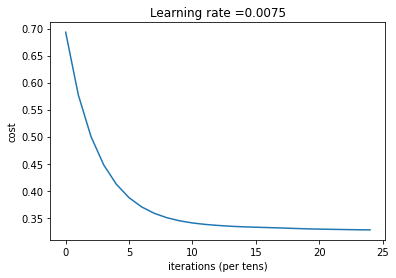

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 1, 57, 1]
Cost after iteration 0: 0.693043
Cost after iteration 100: 0.543805
Cost after iteration 200: 0.396135
Cost after iteration 300: 0.337487
Cost after iteration 400: 0.330621
Cost after iteration 500: 0.329624
Cost after iteration 600: 0.329078
Cost after iteration 700: 0.328429
Cost after iteration 800: 0.327798
Cost after iteration 900: 0.327321
Cost after iteration 1000: 0.326874
Cost after iteration 1100: 0.326428
Cost after iteration 1200: 0.325974
Cost after iteration 1300: 0.325504
Cost after iteration 1400: 0.325028
Cost after iteration 1500: 0.324537
Cost after iteration 1600: 0.324025
Cost after iteration 1700: 0.323488
Cost after iteration 1800: 0.322918
Cost after iteration 1900: 0.322312
Cost after iteration 2000: 0.321665
Cost after iteration 2100: 0.320971
Cost after iteration 2200: 0.319967
Cost after iteration 2300: 0.319091
Cost after i

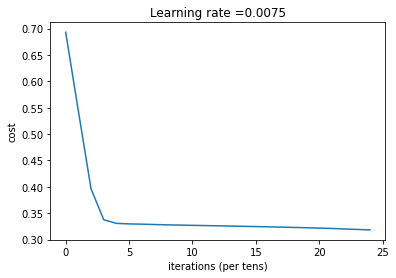

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 1, 57, 1]
Cost after iteration 0: 0.690479
Cost after iteration 100: 0.535472
Cost after iteration 200: 0.379642
Cost after iteration 300: 0.336952
Cost after iteration 400: 0.332378
Cost after iteration 500: 0.331213
Cost after iteration 600: 0.330269
Cost after iteration 700: 0.329528
Cost after iteration 800: 0.328950
Cost after iteration 900: 0.328442
Cost after iteration 1000: 0.327941
Cost after iteration 1100: 0.327440
Cost after iteration 1200: 0.326904
Cost after iteration 1300: 0.326378
Cost after iteration 1400: 0.325877
Cost after iteration 1500: 0.325412
Cost after iteration 1600: 0.324952
Cost after iteration 1700: 0.324481
Cost after iteration 1800: 0.323991
Cost after iteration 1900: 0.323481
Cost after iteration 2000: 0.322947
Cost after iteration 2100: 0.322387
Cost after iteration 2200: 0.321797
Cost after iteration 2300: 0.321176
Cost after i

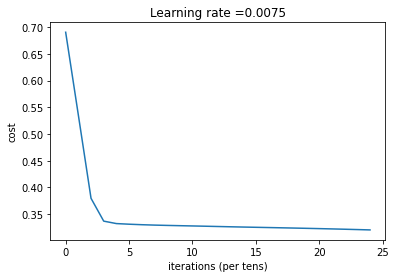

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 1, 57, 1]
Cost after iteration 0: 0.690264
Cost after iteration 100: 0.515594
Cost after iteration 200: 0.369214
Cost after iteration 300: 0.332070
Cost after iteration 400: 0.328285
Cost after iteration 500: 0.327566
Cost after iteration 600: 0.327061
Cost after iteration 700: 0.326516
Cost after iteration 800: 0.325835
Cost after iteration 900: 0.325147
Cost after iteration 1000: 0.324549
Cost after iteration 1100: 0.323993
Cost after iteration 1200: 0.323420
Cost after iteration 1300: 0.322815
Cost after iteration 1400: 0.322177
Cost after iteration 1500: 0.321498
Cost after iteration 1600: 0.320774
Cost after iteration 1700: 0.319995
Cost after iteration 1800: 0.319161
Cost after iteration 1900: 0.318263
Cost after iteration 2000: 0.317293
Cost after iteration 2100: 0.316254
Cost after iteration 2200: 0.315140
Cost after iteration 2300: 0.313943
Cost after i

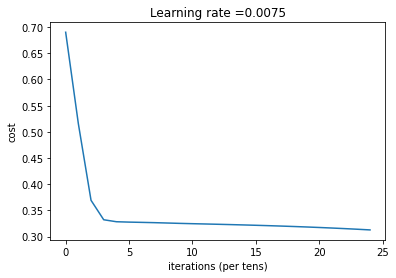

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 1, 57, 1]
Cost after iteration 0: 0.691787
Cost after iteration 100: 0.488676
Cost after iteration 200: 0.352586
Cost after iteration 300: 0.330479
Cost after iteration 400: 0.327908
Cost after iteration 500: 0.327033
Cost after iteration 600: 0.326335
Cost after iteration 700: 0.325688
Cost after iteration 800: 0.325106
Cost after iteration 900: 0.324554
Cost after iteration 1000: 0.324007
Cost after iteration 1100: 0.323447
Cost after iteration 1200: 0.322870
Cost after iteration 1300: 0.322266
Cost after iteration 1400: 0.321627
Cost after iteration 1500: 0.320951
Cost after iteration 1600: 0.320234
Cost after iteration 1700: 0.319469
Cost after iteration 1800: 0.318652
Cost after iteration 1900: 0.317775
Cost after iteration 2000: 0.316829
Cost after iteration 2100: 0.315818
Cost after iteration 2200: 0.314727
Cost after iteration 2300: 0.313552
Cost after i

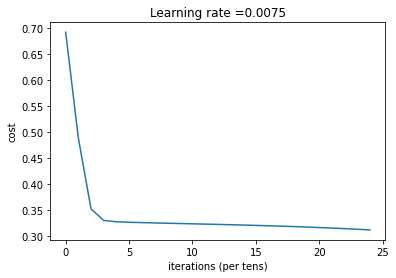

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 9, 57, 1]
Cost after iteration 0: 0.693142
Cost after iteration 100: 0.561061
Cost after iteration 200: 0.475120
Cost after iteration 300: 0.414633
Cost after iteration 400: 0.369043
Cost after iteration 500: 0.343024
Cost after iteration 600: 0.332616
Cost after iteration 700: 0.329451
Cost after iteration 800: 0.328496
Cost after iteration 900: 0.328075
Cost after iteration 1000: 0.327762
Cost after iteration 1100: 0.327459
Cost after iteration 1200: 0.327145
Cost after iteration 1300: 0.326815
Cost after iteration 1400: 0.326465
Cost after iteration 1500: 0.326090
Cost after iteration 1600: 0.325641
Cost after iteration 1700: 0.325173
Cost after iteration 1800: 0.324707
Cost after iteration 1900: 0.324215
Cost after iteration 2000: 0.323692
Cost after iteration 2100: 0.323133
Cost after iteration 2200: 0.322534
Cost after iteration 2300: 0.321891
Cost after it

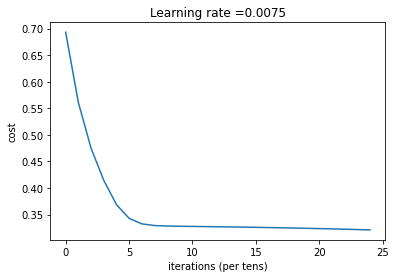

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 9, 57, 1]
Cost after iteration 0: 0.689940
Cost after iteration 100: 0.522619
Cost after iteration 200: 0.411961
Cost after iteration 300: 0.357245
Cost after iteration 400: 0.338686
Cost after iteration 500: 0.333481
Cost after iteration 600: 0.332019
Cost after iteration 700: 0.331549
Cost after iteration 800: 0.331354
Cost after iteration 900: 0.331229
Cost after iteration 1000: 0.331123
Cost after iteration 1100: 0.331021
Cost after iteration 1200: 0.330921
Cost after iteration 1300: 0.330822
Cost after iteration 1400: 0.330722
Cost after iteration 1500: 0.330621
Cost after iteration 1600: 0.330520
Cost after iteration 1700: 0.330417
Cost after iteration 1800: 0.330314
Cost after iteration 1900: 0.330209
Cost after iteration 2000: 0.330104
Cost after iteration 2100: 0.329998
Cost after iteration 2200: 0.329890
Cost after iteration 2300: 0.329781
Cost after it

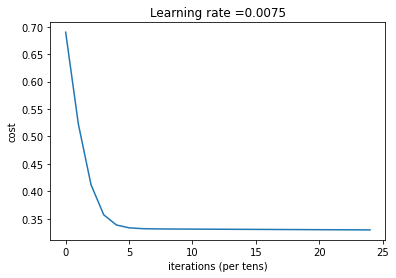

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 9, 57, 1]
Cost after iteration 0: 0.696271
Cost after iteration 100: 0.567427
Cost after iteration 200: 0.481108
Cost after iteration 300: 0.424255
Cost after iteration 400: 0.387449
Cost after iteration 500: 0.364343
Cost after iteration 600: 0.350348
Cost after iteration 700: 0.342164
Cost after iteration 800: 0.337521
Cost after iteration 900: 0.334951
Cost after iteration 1000: 0.333547
Cost after iteration 1100: 0.332782
Cost after iteration 1200: 0.332360
Cost after iteration 1300: 0.332120
Cost after iteration 1400: 0.331974
Cost after iteration 1500: 0.331879
Cost after iteration 1600: 0.331810
Cost after iteration 1700: 0.331755
Cost after iteration 1800: 0.331707
Cost after iteration 1900: 0.331664
Cost after iteration 2000: 0.331626
Cost after iteration 2100: 0.331586
Cost after iteration 2200: 0.331547
Cost after iteration 2300: 0.331506
Cost after i

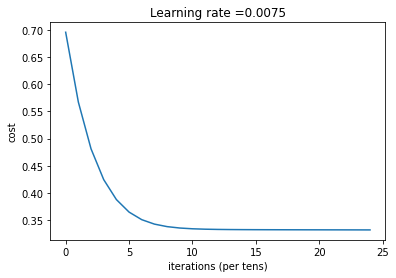

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 9, 57, 1]
Cost after iteration 0: 0.690144
Cost after iteration 100: 0.553269
Cost after iteration 200: 0.457978
Cost after iteration 300: 0.392303
Cost after iteration 400: 0.355072
Cost after iteration 500: 0.338807
Cost after iteration 600: 0.332880
Cost after iteration 700: 0.330854
Cost after iteration 800: 0.330110
Cost after iteration 900: 0.329759
Cost after iteration 1000: 0.329533
Cost after iteration 1100: 0.329348
Cost after iteration 1200: 0.329178
Cost after iteration 1300: 0.329014
Cost after iteration 1400: 0.328852
Cost after iteration 1500: 0.328690
Cost after iteration 1600: 0.328527
Cost after iteration 1700: 0.328361
Cost after iteration 1800: 0.328193
Cost after iteration 1900: 0.328021
Cost after iteration 2000: 0.327845
Cost after iteration 2100: 0.327664
Cost after iteration 2200: 0.327479
Cost after iteration 2300: 0.327291
Cost after i

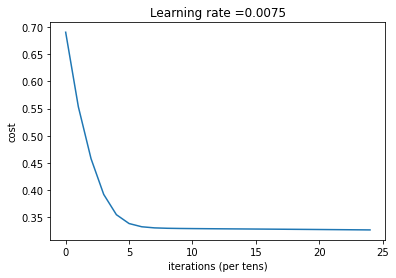

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 9, 57, 1]
Cost after iteration 0: 0.694698
Cost after iteration 100: 0.566466
Cost after iteration 200: 0.475160
Cost after iteration 300: 0.411911
Cost after iteration 400: 0.372420
Cost after iteration 500: 0.350527
Cost after iteration 600: 0.339695
Cost after iteration 700: 0.334693
Cost after iteration 800: 0.332452
Cost after iteration 900: 0.331432
Cost after iteration 1000: 0.330928
Cost after iteration 1100: 0.330637
Cost after iteration 1200: 0.330430
Cost after iteration 1300: 0.330244
Cost after iteration 1400: 0.330059
Cost after iteration 1500: 0.329838
Cost after iteration 1600: 0.329636
Cost after iteration 1700: 0.329473
Cost after iteration 1800: 0.329317
Cost after iteration 1900: 0.329094
Cost after iteration 2000: 0.328956
Cost after iteration 2100: 0.328828
Cost after iteration 2200: 0.328702
Cost after iteration 2300: 0.328575
Cost after i

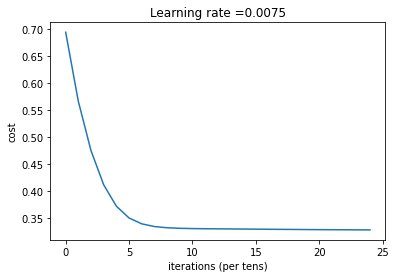

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 9, 57, 1]
Cost after iteration 0: 0.689755
Cost after iteration 100: 0.522396
Cost after iteration 200: 0.414784
Cost after iteration 300: 0.360160
Cost after iteration 400: 0.340375
Cost after iteration 500: 0.334465
Cost after iteration 600: 0.332726
Cost after iteration 700: 0.332083
Cost after iteration 800: 0.331711
Cost after iteration 900: 0.331407
Cost after iteration 1000: 0.331099
Cost after iteration 1100: 0.330791
Cost after iteration 1200: 0.330524
Cost after iteration 1300: 0.330265
Cost after iteration 1400: 0.330052
Cost after iteration 1500: 0.329865
Cost after iteration 1600: 0.329687
Cost after iteration 1700: 0.329513
Cost after iteration 1800: 0.329341
Cost after iteration 1900: 0.329168
Cost after iteration 2000: 0.328993
Cost after iteration 2100: 0.328815
Cost after iteration 2200: 0.328634
Cost after iteration 2300: 0.328450
Cost after i

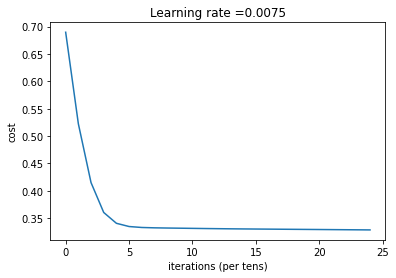

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 9, 57, 1]
Cost after iteration 0: 0.691793
Cost after iteration 100: 0.522078
Cost after iteration 200: 0.420393
Cost after iteration 300: 0.366689
Cost after iteration 400: 0.343277
Cost after iteration 500: 0.334273
Cost after iteration 600: 0.330943
Cost after iteration 700: 0.329646
Cost after iteration 800: 0.329030
Cost after iteration 900: 0.328635
Cost after iteration 1000: 0.328303
Cost after iteration 1100: 0.327965
Cost after iteration 1200: 0.327611
Cost after iteration 1300: 0.327331
Cost after iteration 1400: 0.327088
Cost after iteration 1500: 0.326853
Cost after iteration 1600: 0.326618
Cost after iteration 1700: 0.326380
Cost after iteration 1800: 0.326139
Cost after iteration 1900: 0.325890
Cost after iteration 2000: 0.325636
Cost after iteration 2100: 0.325376
Cost after iteration 2200: 0.325110
Cost after iteration 2300: 0.324837
Cost after i

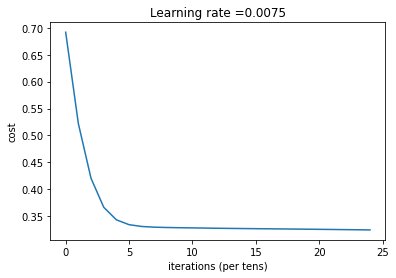

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 9, 57, 1]
Cost after iteration 0: 0.695474
Cost after iteration 100: 0.551850
Cost after iteration 200: 0.449755
Cost after iteration 300: 0.382692
Cost after iteration 400: 0.349270
Cost after iteration 500: 0.336505
Cost after iteration 600: 0.332183
Cost after iteration 700: 0.330642
Cost after iteration 800: 0.329922
Cost after iteration 900: 0.329422
Cost after iteration 1000: 0.329045
Cost after iteration 1100: 0.328686
Cost after iteration 1200: 0.328344
Cost after iteration 1300: 0.328015
Cost after iteration 1400: 0.327699
Cost after iteration 1500: 0.327418
Cost after iteration 1600: 0.327152
Cost after iteration 1700: 0.326890
Cost after iteration 1800: 0.326623
Cost after iteration 1900: 0.326348
Cost after iteration 2000: 0.326073
Cost after iteration 2100: 0.325803
Cost after iteration 2200: 0.325531
Cost after iteration 2300: 0.325255
Cost after i

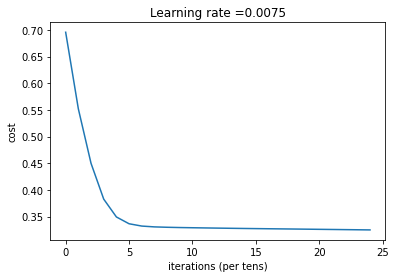

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 17, 57, 1]
Cost after iteration 0: 0.693082
Cost after iteration 100: 0.504661
Cost after iteration 200: 0.364259
Cost after iteration 300: 0.331338
Cost after iteration 400: 0.327841
Cost after iteration 500: 0.327215
Cost after iteration 600: 0.326796
Cost after iteration 700: 0.326379
Cost after iteration 800: 0.325946
Cost after iteration 900: 0.325495
Cost after iteration 1000: 0.325022
Cost after iteration 1100: 0.324525
Cost after iteration 1200: 0.324006
Cost after iteration 1300: 0.323461
Cost after iteration 1400: 0.322886
Cost after iteration 1500: 0.322279
Cost after iteration 1600: 0.321637
Cost after iteration 1700: 0.320895
Cost after iteration 1800: 0.320038
Cost after iteration 1900: 0.319255
Cost after iteration 2000: 0.318422
Cost after iteration 2100: 0.317534
Cost after iteration 2200: 0.316587
Cost after iteration 2300: 0.315573
Cost after i

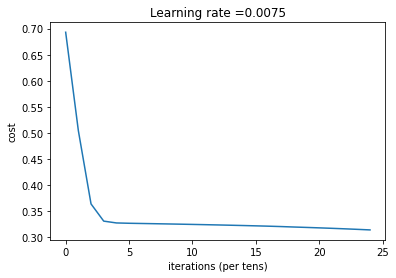

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 17, 57, 1]
Cost after iteration 0: 0.690716
Cost after iteration 100: 0.512529
Cost after iteration 200: 0.407264
Cost after iteration 300: 0.356736
Cost after iteration 400: 0.338447
Cost after iteration 500: 0.332790
Cost after iteration 600: 0.331059
Cost after iteration 700: 0.330474
Cost after iteration 800: 0.330218
Cost after iteration 900: 0.330050
Cost after iteration 1000: 0.329905
Cost after iteration 1100: 0.329767
Cost after iteration 1200: 0.329631
Cost after iteration 1300: 0.329497
Cost after iteration 1400: 0.329365
Cost after iteration 1500: 0.329231
Cost after iteration 1600: 0.329096
Cost after iteration 1700: 0.328960
Cost after iteration 1800: 0.328820
Cost after iteration 1900: 0.328678
Cost after iteration 2000: 0.328532
Cost after iteration 2100: 0.328381
Cost after iteration 2200: 0.328225
Cost after iteration 2300: 0.328065
Cost after i

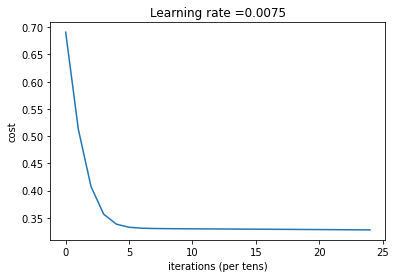

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 17, 57, 1]
Cost after iteration 0: 0.697780
Cost after iteration 100: 0.525256
Cost after iteration 200: 0.413186
Cost after iteration 300: 0.356612
Cost after iteration 400: 0.337196
Cost after iteration 500: 0.331786
Cost after iteration 600: 0.330223
Cost after iteration 700: 0.329620
Cost after iteration 800: 0.329286
Cost after iteration 900: 0.329031
Cost after iteration 1000: 0.328802
Cost after iteration 1100: 0.328579
Cost after iteration 1200: 0.328342
Cost after iteration 1300: 0.328097
Cost after iteration 1400: 0.327855
Cost after iteration 1500: 0.327606
Cost after iteration 1600: 0.327231
Cost after iteration 1700: 0.326671
Cost after iteration 1800: 0.326396
Cost after iteration 1900: 0.326128
Cost after iteration 2000: 0.325868
Cost after iteration 2100: 0.325609
Cost after iteration 2200: 0.325344
Cost after iteration 2300: 0.325069
Cost after 

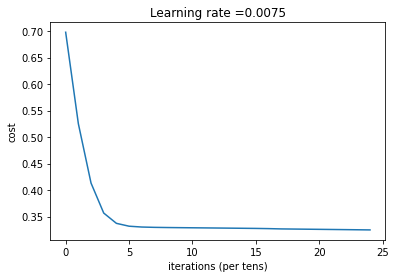

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 17, 57, 1]
Cost after iteration 0: 0.697386
Cost after iteration 100: 0.557929
Cost after iteration 200: 0.463211
Cost after iteration 300: 0.402189
Cost after iteration 400: 0.366220
Cost after iteration 500: 0.347272
Cost after iteration 600: 0.338197
Cost after iteration 700: 0.334114
Cost after iteration 800: 0.332323
Cost after iteration 900: 0.331524
Cost after iteration 1000: 0.331146
Cost after iteration 1100: 0.330946
Cost after iteration 1200: 0.330819
Cost after iteration 1300: 0.330722
Cost after iteration 1400: 0.330640
Cost after iteration 1500: 0.330563
Cost after iteration 1600: 0.330489
Cost after iteration 1700: 0.330417
Cost after iteration 1800: 0.330346
Cost after iteration 1900: 0.330275
Cost after iteration 2000: 0.330203
Cost after iteration 2100: 0.330132
Cost after iteration 2200: 0.330060
Cost after iteration 2300: 0.329987
Cost after 

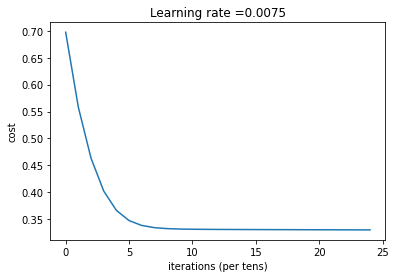

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 17, 57, 1]
Cost after iteration 0: 0.699133
Cost after iteration 100: 0.564457
Cost after iteration 200: 0.476836
Cost after iteration 300: 0.419232
Cost after iteration 400: 0.382783
Cost after iteration 500: 0.360436
Cost after iteration 600: 0.347198
Cost after iteration 700: 0.339570
Cost after iteration 800: 0.335245
Cost after iteration 900: 0.332807
Cost after iteration 1000: 0.331426
Cost after iteration 1100: 0.330626
Cost after iteration 1200: 0.330149
Cost after iteration 1300: 0.329848
Cost after iteration 1400: 0.329646
Cost after iteration 1500: 0.329482
Cost after iteration 1600: 0.329305
Cost after iteration 1700: 0.329142
Cost after iteration 1800: 0.329037
Cost after iteration 1900: 0.328946
Cost after iteration 2000: 0.328862
Cost after iteration 2100: 0.328780
Cost after iteration 2200: 0.328698
Cost after iteration 2300: 0.328615
Cost after 

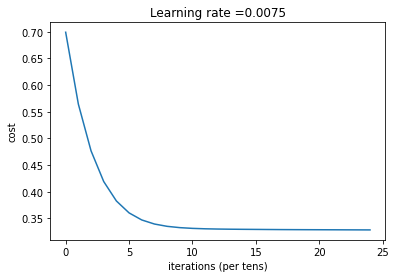

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 17, 57, 1]
Cost after iteration 0: 0.693643
Cost after iteration 100: 0.552619
Cost after iteration 200: 0.458524
Cost after iteration 300: 0.396956
Cost after iteration 400: 0.361156
Cost after iteration 500: 0.343388
Cost after iteration 600: 0.335575
Cost after iteration 700: 0.332212
Cost after iteration 800: 0.330780
Cost after iteration 900: 0.330110
Cost after iteration 1000: 0.329740
Cost after iteration 1100: 0.329489
Cost after iteration 1200: 0.329281
Cost after iteration 1300: 0.329089
Cost after iteration 1400: 0.328900
Cost after iteration 1500: 0.328705
Cost after iteration 1600: 0.328502
Cost after iteration 1700: 0.328293
Cost after iteration 1800: 0.328082
Cost after iteration 1900: 0.327884
Cost after iteration 2000: 0.327696
Cost after iteration 2100: 0.327508
Cost after iteration 2200: 0.327318
Cost after iteration 2300: 0.327123
Cost after 

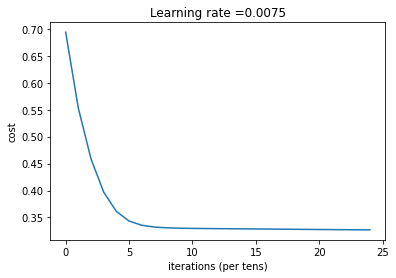

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 17, 57, 1]
Cost after iteration 0: 0.693537
Cost after iteration 100: 0.513422
Cost after iteration 200: 0.411628
Cost after iteration 300: 0.362546
Cost after iteration 400: 0.341908
Cost after iteration 500: 0.333979
Cost after iteration 600: 0.330960
Cost after iteration 700: 0.329747
Cost after iteration 800: 0.329174
Cost after iteration 900: 0.328828
Cost after iteration 1000: 0.328556
Cost after iteration 1100: 0.328296
Cost after iteration 1200: 0.327958
Cost after iteration 1300: 0.327670
Cost after iteration 1400: 0.327433
Cost after iteration 1500: 0.327211
Cost after iteration 1600: 0.326989
Cost after iteration 1700: 0.326767
Cost after iteration 1800: 0.326547
Cost after iteration 1900: 0.326325
Cost after iteration 2000: 0.326099
Cost after iteration 2100: 0.325868
Cost after iteration 2200: 0.325631
Cost after iteration 2300: 0.325385
Cost after 

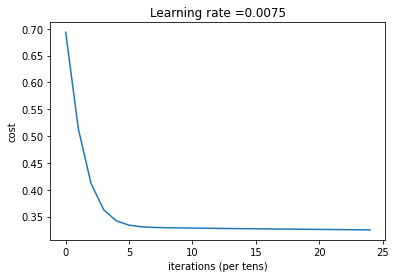

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 17, 57, 1]
Cost after iteration 0: 0.684070
Cost after iteration 100: 0.490315
Cost after iteration 200: 0.385051
Cost after iteration 300: 0.345824
Cost after iteration 400: 0.334659
Cost after iteration 500: 0.331555
Cost after iteration 600: 0.330547
Cost after iteration 700: 0.330071
Cost after iteration 800: 0.329726
Cost after iteration 900: 0.329409
Cost after iteration 1000: 0.329070
Cost after iteration 1100: 0.328743
Cost after iteration 1200: 0.328447
Cost after iteration 1300: 0.328166
Cost after iteration 1400: 0.327885
Cost after iteration 1500: 0.327597
Cost after iteration 1600: 0.327294
Cost after iteration 1700: 0.326988
Cost after iteration 1800: 0.326686
Cost after iteration 1900: 0.326388
Cost after iteration 2000: 0.326098
Cost after iteration 2100: 0.325809
Cost after iteration 2200: 0.325517
Cost after iteration 2300: 0.325221
Cost after 

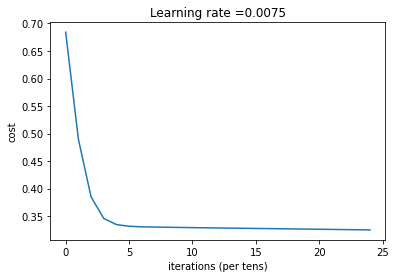

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 25, 57, 1]
Cost after iteration 0: 0.693060
Cost after iteration 100: 0.455626
Cost after iteration 200: 0.343167
Cost after iteration 300: 0.328485
Cost after iteration 400: 0.327075
Cost after iteration 500: 0.326555
Cost after iteration 600: 0.326073
Cost after iteration 700: 0.325576
Cost after iteration 800: 0.325017
Cost after iteration 900: 0.324471
Cost after iteration 1000: 0.323901
Cost after iteration 1100: 0.323305
Cost after iteration 1200: 0.322678
Cost after iteration 1300: 0.322018
Cost after iteration 1400: 0.321321
Cost after iteration 1500: 0.320585
Cost after iteration 1600: 0.319801
Cost after iteration 1700: 0.318828
Cost after iteration 1800: 0.317931
Cost after iteration 1900: 0.316979
Cost after iteration 2000: 0.315963
Cost after iteration 2100: 0.314854
Cost after iteration 2200: 0.313669
Cost after iteration 2300: 0.312418
Cost after i

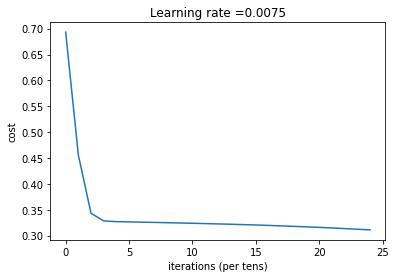

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 25, 57, 1]
Cost after iteration 0: 0.697193
Cost after iteration 100: 0.548254
Cost after iteration 200: 0.453124
Cost after iteration 300: 0.397080
Cost after iteration 400: 0.365048
Cost after iteration 500: 0.347754
Cost after iteration 600: 0.338833
Cost after iteration 700: 0.334360
Cost after iteration 800: 0.332146
Cost after iteration 900: 0.331034
Cost after iteration 1000: 0.330429
Cost after iteration 1100: 0.330108
Cost after iteration 1200: 0.329910
Cost after iteration 1300: 0.329760
Cost after iteration 1400: 0.329614
Cost after iteration 1500: 0.329487
Cost after iteration 1600: 0.329377
Cost after iteration 1700: 0.329281
Cost after iteration 1800: 0.329190
Cost after iteration 1900: 0.329103
Cost after iteration 2000: 0.329017
Cost after iteration 2100: 0.328930
Cost after iteration 2200: 0.328841
Cost after iteration 2300: 0.328752
Cost after i

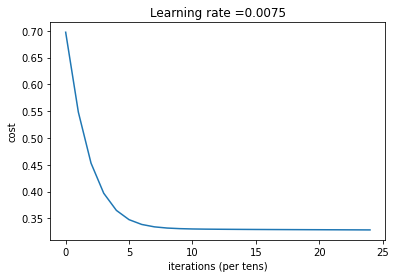

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 25, 57, 1]
Cost after iteration 0: 0.692172
Cost after iteration 100: 0.550690
Cost after iteration 200: 0.456779
Cost after iteration 300: 0.396945
Cost after iteration 400: 0.362795
Cost after iteration 500: 0.345661
Cost after iteration 600: 0.337864
Cost after iteration 700: 0.334510
Cost after iteration 800: 0.333090
Cost after iteration 900: 0.332468
Cost after iteration 1000: 0.332168
Cost after iteration 1100: 0.331996
Cost after iteration 1200: 0.331881
Cost after iteration 1300: 0.331794
Cost after iteration 1400: 0.331718
Cost after iteration 1500: 0.331651
Cost after iteration 1600: 0.331589
Cost after iteration 1700: 0.331531
Cost after iteration 1800: 0.331475
Cost after iteration 1900: 0.331421
Cost after iteration 2000: 0.331366
Cost after iteration 2100: 0.331313
Cost after iteration 2200: 0.331259
Cost after iteration 2300: 0.331207
Cost after 

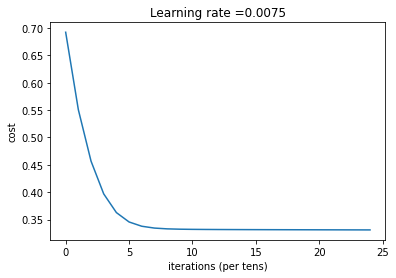

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 25, 57, 1]
Cost after iteration 0: 0.693903
Cost after iteration 100: 0.563941
Cost after iteration 200: 0.476529
Cost after iteration 300: 0.415925
Cost after iteration 400: 0.376322
Cost after iteration 500: 0.353161
Cost after iteration 600: 0.341017
Cost after iteration 700: 0.335168
Cost after iteration 800: 0.332452
Cost after iteration 900: 0.331184
Cost after iteration 1000: 0.330560
Cost after iteration 1100: 0.330214
Cost after iteration 1200: 0.329975
Cost after iteration 1300: 0.329775
Cost after iteration 1400: 0.329610
Cost after iteration 1500: 0.329468
Cost after iteration 1600: 0.329339
Cost after iteration 1700: 0.329216
Cost after iteration 1800: 0.329096
Cost after iteration 1900: 0.328977
Cost after iteration 2000: 0.328859
Cost after iteration 2100: 0.328741
Cost after iteration 2200: 0.328621
Cost after iteration 2300: 0.328498
Cost after 

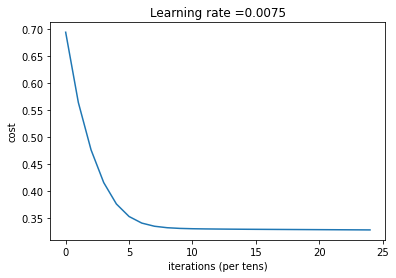

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 25, 57, 1]
Cost after iteration 0: 0.685634
Cost after iteration 100: 0.495520
Cost after iteration 200: 0.394534
Cost after iteration 300: 0.351432
Cost after iteration 400: 0.336768
Cost after iteration 500: 0.332228
Cost after iteration 600: 0.330640
Cost after iteration 700: 0.330012
Cost after iteration 800: 0.329684
Cost after iteration 900: 0.329453
Cost after iteration 1000: 0.329254
Cost after iteration 1100: 0.329070
Cost after iteration 1200: 0.328884
Cost after iteration 1300: 0.328700
Cost after iteration 1400: 0.328515
Cost after iteration 1500: 0.328333
Cost after iteration 1600: 0.328151
Cost after iteration 1700: 0.327963
Cost after iteration 1800: 0.327765
Cost after iteration 1900: 0.327570
Cost after iteration 2000: 0.327378
Cost after iteration 2100: 0.327184
Cost after iteration 2200: 0.326987
Cost after iteration 2300: 0.326786
Cost after 

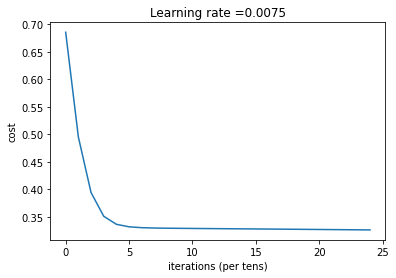

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 25, 57, 1]
Cost after iteration 0: 0.690856
Cost after iteration 100: 0.545309
Cost after iteration 200: 0.450507
Cost after iteration 300: 0.391699
Cost after iteration 400: 0.359114
Cost after iteration 500: 0.343118
Cost after iteration 600: 0.335852
Cost after iteration 700: 0.332620
Cost after iteration 800: 0.331137
Cost after iteration 900: 0.330387
Cost after iteration 1000: 0.329958
Cost after iteration 1100: 0.329666
Cost after iteration 1200: 0.329436
Cost after iteration 1300: 0.329241
Cost after iteration 1400: 0.329067
Cost after iteration 1500: 0.328905
Cost after iteration 1600: 0.328747
Cost after iteration 1700: 0.328591
Cost after iteration 1800: 0.328436
Cost after iteration 1900: 0.328281
Cost after iteration 2000: 0.328125
Cost after iteration 2100: 0.327967
Cost after iteration 2200: 0.327808
Cost after iteration 2300: 0.327645
Cost after 

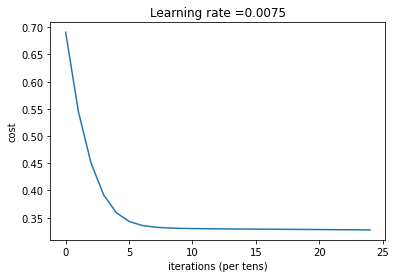

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 25, 57, 1]
Cost after iteration 0: 0.689920
Cost after iteration 100: 0.503674
Cost after iteration 200: 0.398689
Cost after iteration 300: 0.352274
Cost after iteration 400: 0.335611
Cost after iteration 500: 0.330078
Cost after iteration 600: 0.328116
Cost after iteration 700: 0.327300
Cost after iteration 800: 0.326857
Cost after iteration 900: 0.326524
Cost after iteration 1000: 0.326209
Cost after iteration 1100: 0.325854
Cost after iteration 1200: 0.325446
Cost after iteration 1300: 0.325055
Cost after iteration 1400: 0.324685
Cost after iteration 1500: 0.324339
Cost after iteration 1600: 0.324001
Cost after iteration 1700: 0.323669
Cost after iteration 1800: 0.323337
Cost after iteration 1900: 0.323000
Cost after iteration 2000: 0.322656
Cost after iteration 2100: 0.322304
Cost after iteration 2200: 0.321942
Cost after iteration 2300: 0.321568
Cost after 

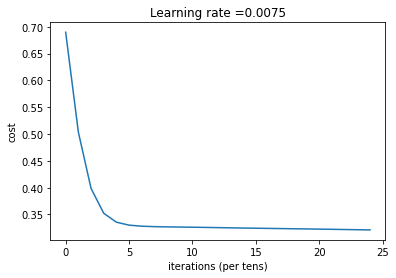

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 25, 57, 1]
Cost after iteration 0: 0.696078
Cost after iteration 100: 0.549290
Cost after iteration 200: 0.452936
Cost after iteration 300: 0.391828
Cost after iteration 400: 0.358322
Cost after iteration 500: 0.342544
Cost after iteration 600: 0.335758
Cost after iteration 700: 0.332928
Cost after iteration 800: 0.331705
Cost after iteration 900: 0.331116
Cost after iteration 1000: 0.330780
Cost after iteration 1100: 0.330548
Cost after iteration 1200: 0.330362
Cost after iteration 1300: 0.330195
Cost after iteration 1400: 0.330038
Cost after iteration 1500: 0.329884
Cost after iteration 1600: 0.329731
Cost after iteration 1700: 0.329579
Cost after iteration 1800: 0.329427
Cost after iteration 1900: 0.329272
Cost after iteration 2000: 0.329115
Cost after iteration 2100: 0.328954
Cost after iteration 2200: 0.328790
Cost after iteration 2300: 0.328620
Cost after 

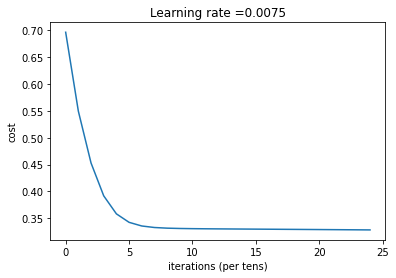

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 33, 57, 1]
Cost after iteration 0: 0.693143
Cost after iteration 100: 0.552227
Cost after iteration 200: 0.458331
Cost after iteration 300: 0.389808
Cost after iteration 400: 0.350203
Cost after iteration 500: 0.334360
Cost after iteration 600: 0.329825
Cost after iteration 700: 0.328622
Cost after iteration 800: 0.328174
Cost after iteration 900: 0.327869
Cost after iteration 1000: 0.327581
Cost after iteration 1100: 0.327285
Cost after iteration 1200: 0.326974
Cost after iteration 1300: 0.326647
Cost after iteration 1400: 0.326302
Cost after iteration 1500: 0.325936
Cost after iteration 1600: 0.325549
Cost after iteration 1700: 0.325138
Cost after iteration 1800: 0.324700
Cost after iteration 1900: 0.324235
Cost after iteration 2000: 0.323737
Cost after iteration 2100: 0.323014
Cost after iteration 2200: 0.322308
Cost after iteration 2300: 0.321540
Cost after i

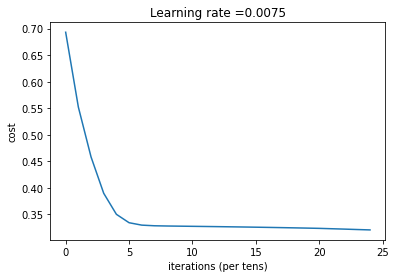

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 33, 57, 1]
Cost after iteration 0: 0.688081
Cost after iteration 100: 0.538457
Cost after iteration 200: 0.431981
Cost after iteration 300: 0.369816
Cost after iteration 400: 0.343568
Cost after iteration 500: 0.334997
Cost after iteration 600: 0.332503
Cost after iteration 700: 0.331758
Cost after iteration 800: 0.331481
Cost after iteration 900: 0.331324
Cost after iteration 1000: 0.331195
Cost after iteration 1100: 0.331073
Cost after iteration 1200: 0.330952
Cost after iteration 1300: 0.330832
Cost after iteration 1400: 0.330712
Cost after iteration 1500: 0.330592
Cost after iteration 1600: 0.330473
Cost after iteration 1700: 0.330351
Cost after iteration 1800: 0.330227
Cost after iteration 1900: 0.330104
Cost after iteration 2000: 0.329979
Cost after iteration 2100: 0.329848
Cost after iteration 2200: 0.329718
Cost after iteration 2300: 0.329586
Cost after i

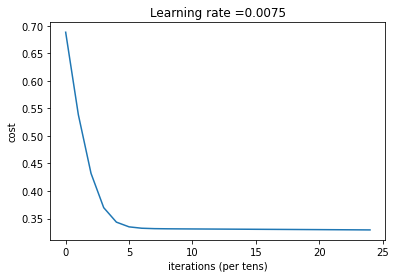

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 33, 57, 1]
Cost after iteration 0: 0.686481
Cost after iteration 100: 0.519745
Cost after iteration 200: 0.418358
Cost after iteration 300: 0.366234
Cost after iteration 400: 0.343771
Cost after iteration 500: 0.335214
Cost after iteration 600: 0.332074
Cost after iteration 700: 0.330900
Cost after iteration 800: 0.330407
Cost after iteration 900: 0.330145
Cost after iteration 1000: 0.329964
Cost after iteration 1100: 0.329810
Cost after iteration 1200: 0.329667
Cost after iteration 1300: 0.329526
Cost after iteration 1400: 0.329382
Cost after iteration 1500: 0.329237
Cost after iteration 1600: 0.329092
Cost after iteration 1700: 0.328947
Cost after iteration 1800: 0.328801
Cost after iteration 1900: 0.328654
Cost after iteration 2000: 0.328504
Cost after iteration 2100: 0.328353
Cost after iteration 2200: 0.328198
Cost after iteration 2300: 0.328039
Cost after 

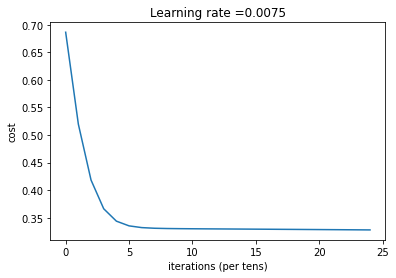

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 33, 57, 1]
Cost after iteration 0: 0.688614
Cost after iteration 100: 0.530992
Cost after iteration 200: 0.431174
Cost after iteration 300: 0.376087
Cost after iteration 400: 0.349144
Cost after iteration 500: 0.337184
Cost after iteration 600: 0.332130
Cost after iteration 700: 0.329959
Cost after iteration 800: 0.328948
Cost after iteration 900: 0.328391
Cost after iteration 1000: 0.328033
Cost after iteration 1100: 0.327753
Cost after iteration 1200: 0.327499
Cost after iteration 1300: 0.327262
Cost after iteration 1400: 0.327064
Cost after iteration 1500: 0.326878
Cost after iteration 1600: 0.326698
Cost after iteration 1700: 0.326516
Cost after iteration 1800: 0.326332
Cost after iteration 1900: 0.326142
Cost after iteration 2000: 0.325940
Cost after iteration 2100: 0.325723
Cost after iteration 2200: 0.325502
Cost after iteration 2300: 0.325282
Cost after 

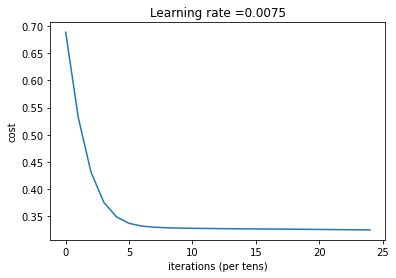

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 33, 57, 1]
Cost after iteration 0: 0.694458
Cost after iteration 100: 0.562655
Cost after iteration 200: 0.474932
Cost after iteration 300: 0.416520
Cost after iteration 400: 0.379056
Cost after iteration 500: 0.356580
Cost after iteration 600: 0.344045
Cost after iteration 700: 0.337461
Cost after iteration 800: 0.334124
Cost after iteration 900: 0.332439
Cost after iteration 1000: 0.331554
Cost after iteration 1100: 0.331060
Cost after iteration 1200: 0.330758
Cost after iteration 1300: 0.330552
Cost after iteration 1400: 0.330398
Cost after iteration 1500: 0.330272
Cost after iteration 1600: 0.330159
Cost after iteration 1700: 0.330054
Cost after iteration 1800: 0.329956
Cost after iteration 1900: 0.329864
Cost after iteration 2000: 0.329775
Cost after iteration 2100: 0.329689
Cost after iteration 2200: 0.329604
Cost after iteration 2300: 0.329520
Cost after 

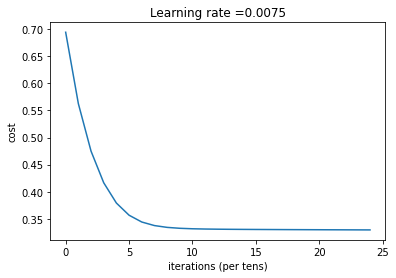

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 33, 57, 1]
Cost after iteration 0: 0.687390
Cost after iteration 100: 0.513573
Cost after iteration 200: 0.412822
Cost after iteration 300: 0.363293
Cost after iteration 400: 0.342889
Cost after iteration 500: 0.335377
Cost after iteration 600: 0.332688
Cost after iteration 700: 0.331628
Cost after iteration 800: 0.331087
Cost after iteration 900: 0.330725
Cost after iteration 1000: 0.330446
Cost after iteration 1100: 0.330189
Cost after iteration 1200: 0.329896
Cost after iteration 1300: 0.329569
Cost after iteration 1400: 0.329289
Cost after iteration 1500: 0.329021
Cost after iteration 1600: 0.328757
Cost after iteration 1700: 0.328479
Cost after iteration 1800: 0.328203
Cost after iteration 1900: 0.327943
Cost after iteration 2000: 0.327691
Cost after iteration 2100: 0.327448
Cost after iteration 2200: 0.327210
Cost after iteration 2300: 0.326971
Cost after 

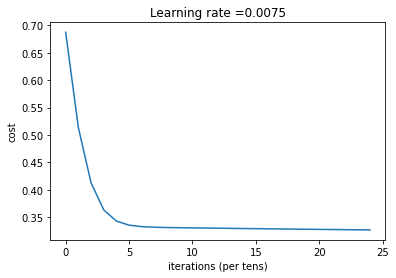

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 33, 57, 1]
Cost after iteration 0: 0.694453
Cost after iteration 100: 0.546230
Cost after iteration 200: 0.452270
Cost after iteration 300: 0.393140
Cost after iteration 400: 0.359968
Cost after iteration 500: 0.343487
Cost after iteration 600: 0.335994
Cost after iteration 700: 0.332741
Cost after iteration 800: 0.331327
Cost after iteration 900: 0.330678
Cost after iteration 1000: 0.330337
Cost after iteration 1100: 0.330118
Cost after iteration 1200: 0.329951
Cost after iteration 1300: 0.329803
Cost after iteration 1400: 0.329662
Cost after iteration 1500: 0.329525
Cost after iteration 1600: 0.329385
Cost after iteration 1700: 0.329242
Cost after iteration 1800: 0.329083
Cost after iteration 1900: 0.328915
Cost after iteration 2000: 0.328743
Cost after iteration 2100: 0.328532
Cost after iteration 2200: 0.328271
Cost after iteration 2300: 0.328027
Cost after 

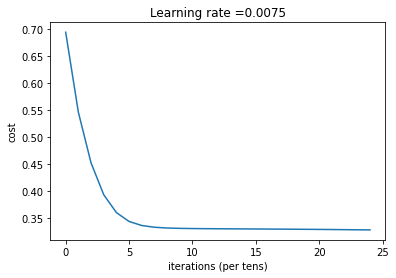

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 33, 57, 1]
Cost after iteration 0: 0.694602
Cost after iteration 100: 0.562129
Cost after iteration 200: 0.473010
Cost after iteration 300: 0.414358
Cost after iteration 400: 0.377158
Cost after iteration 500: 0.355069
Cost after iteration 600: 0.342821
Cost after iteration 700: 0.336394
Cost after iteration 800: 0.333103
Cost after iteration 900: 0.331431
Cost after iteration 1000: 0.330563
Cost after iteration 1100: 0.330074
Cost after iteration 1200: 0.329755
Cost after iteration 1300: 0.329521
Cost after iteration 1400: 0.329330
Cost after iteration 1500: 0.329151
Cost after iteration 1600: 0.328971
Cost after iteration 1700: 0.328799
Cost after iteration 1800: 0.328641
Cost after iteration 1900: 0.328490
Cost after iteration 2000: 0.328341
Cost after iteration 2100: 0.328192
Cost after iteration 2200: 0.328042
Cost after iteration 2300: 0.327887
Cost after 

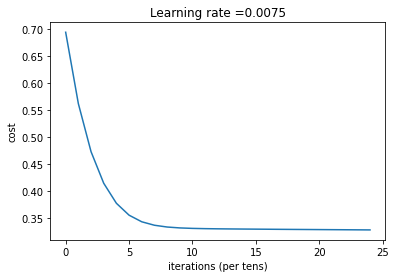

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 41, 57, 1]
Cost after iteration 0: 0.693186
Cost after iteration 100: 0.547729
Cost after iteration 200: 0.459377
Cost after iteration 300: 0.405432
Cost after iteration 400: 0.373293
Cost after iteration 500: 0.354733
Cost after iteration 600: 0.344283
Cost after iteration 700: 0.338497
Cost after iteration 800: 0.335310
Cost after iteration 900: 0.333480
Cost after iteration 1000: 0.331383
Cost after iteration 1100: 0.330137
Cost after iteration 1200: 0.329465
Cost after iteration 1300: 0.329030
Cost after iteration 1400: 0.328695
Cost after iteration 1500: 0.328404
Cost after iteration 1600: 0.328129
Cost after iteration 1700: 0.327856
Cost after iteration 1800: 0.327581
Cost after iteration 1900: 0.327299
Cost after iteration 2000: 0.327006
Cost after iteration 2100: 0.326700
Cost after iteration 2200: 0.326378
Cost after iteration 2300: 0.326024
Cost after i

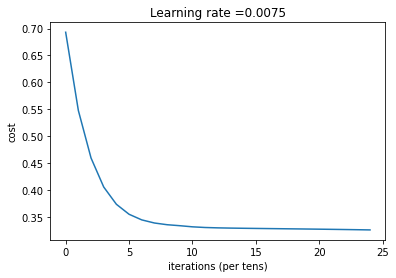

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 41, 57, 1]
Cost after iteration 0: 0.699259
Cost after iteration 100: 0.551568
Cost after iteration 200: 0.453934
Cost after iteration 300: 0.389380
Cost after iteration 400: 0.354545
Cost after iteration 500: 0.339152
Cost after iteration 600: 0.333126
Cost after iteration 700: 0.330812
Cost after iteration 800: 0.329897
Cost after iteration 900: 0.329461
Cost after iteration 1000: 0.329119
Cost after iteration 1100: 0.328915
Cost after iteration 1200: 0.328738
Cost after iteration 1300: 0.328562
Cost after iteration 1400: 0.328384
Cost after iteration 1500: 0.328201
Cost after iteration 1600: 0.328023
Cost after iteration 1700: 0.327850
Cost after iteration 1800: 0.327678
Cost after iteration 1900: 0.327501
Cost after iteration 2000: 0.327323
Cost after iteration 2100: 0.327142
Cost after iteration 2200: 0.326957
Cost after iteration 2300: 0.326768
Cost after i

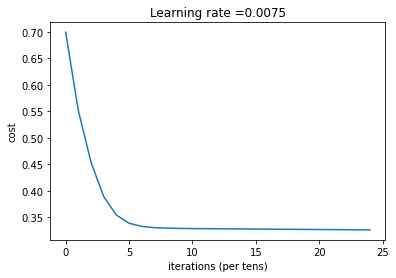

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 41, 57, 1]
Cost after iteration 0: 0.696103
Cost after iteration 100: 0.556380
Cost after iteration 200: 0.465184
Cost after iteration 300: 0.404689
Cost after iteration 400: 0.367918
Cost after iteration 500: 0.348093
Cost after iteration 600: 0.338505
Cost after iteration 700: 0.334171
Cost after iteration 800: 0.332263
Cost after iteration 900: 0.331404
Cost after iteration 1000: 0.330982
Cost after iteration 1100: 0.330734
Cost after iteration 1200: 0.330560
Cost after iteration 1300: 0.330419
Cost after iteration 1400: 0.330298
Cost after iteration 1500: 0.330188
Cost after iteration 1600: 0.330080
Cost after iteration 1700: 0.329974
Cost after iteration 1800: 0.329869
Cost after iteration 1900: 0.329764
Cost after iteration 2000: 0.329659
Cost after iteration 2100: 0.329554
Cost after iteration 2200: 0.329448
Cost after iteration 2300: 0.329340
Cost after 

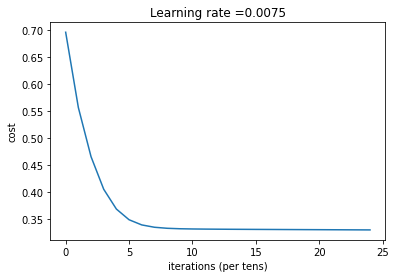

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 41, 57, 1]
Cost after iteration 0: 0.698572
Cost after iteration 100: 0.556031
Cost after iteration 200: 0.466603
Cost after iteration 300: 0.407669
Cost after iteration 400: 0.371308
Cost after iteration 500: 0.350820
Cost after iteration 600: 0.340139
Cost after iteration 700: 0.334812
Cost after iteration 800: 0.332200
Cost after iteration 900: 0.330849
Cost after iteration 1000: 0.330099
Cost after iteration 1100: 0.329709
Cost after iteration 1200: 0.329467
Cost after iteration 1300: 0.329285
Cost after iteration 1400: 0.329129
Cost after iteration 1500: 0.328983
Cost after iteration 1600: 0.328842
Cost after iteration 1700: 0.328705
Cost after iteration 1800: 0.328576
Cost after iteration 1900: 0.328449
Cost after iteration 2000: 0.328325
Cost after iteration 2100: 0.328202
Cost after iteration 2200: 0.328079
Cost after iteration 2300: 0.327954
Cost after 

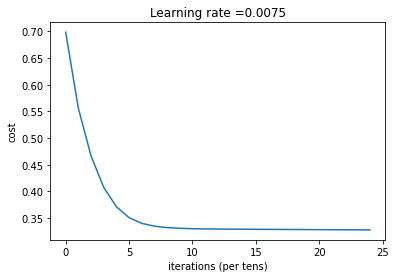

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 41, 57, 1]
Cost after iteration 0: 0.697548
Cost after iteration 100: 0.546511
Cost after iteration 200: 0.450001
Cost after iteration 300: 0.393487
Cost after iteration 400: 0.362162
Cost after iteration 500: 0.346038
Cost after iteration 600: 0.338059
Cost after iteration 700: 0.334174
Cost after iteration 800: 0.332259
Cost after iteration 900: 0.331293
Cost after iteration 1000: 0.330784
Cost after iteration 1100: 0.330490
Cost after iteration 1200: 0.330302
Cost after iteration 1300: 0.330160
Cost after iteration 1400: 0.330041
Cost after iteration 1500: 0.329934
Cost after iteration 1600: 0.329829
Cost after iteration 1700: 0.329727
Cost after iteration 1800: 0.329628
Cost after iteration 1900: 0.329530
Cost after iteration 2000: 0.329435
Cost after iteration 2100: 0.329341
Cost after iteration 2200: 0.329246
Cost after iteration 2300: 0.329152
Cost after 

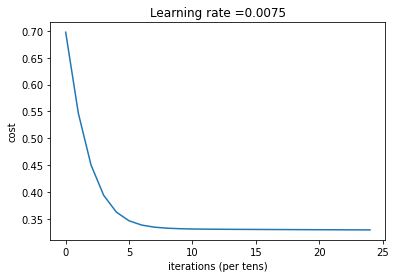

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 41, 57, 1]
Cost after iteration 0: 0.689345
Cost after iteration 100: 0.545652
Cost after iteration 200: 0.452302
Cost after iteration 300: 0.393671
Cost after iteration 400: 0.360607
Cost after iteration 500: 0.343982
Cost after iteration 600: 0.336287
Cost after iteration 700: 0.332861
Cost after iteration 800: 0.331322
Cost after iteration 900: 0.330579
Cost after iteration 1000: 0.330174
Cost after iteration 1100: 0.329917
Cost after iteration 1200: 0.329726
Cost after iteration 1300: 0.329563
Cost after iteration 1400: 0.329413
Cost after iteration 1500: 0.329274
Cost after iteration 1600: 0.329141
Cost after iteration 1700: 0.329009
Cost after iteration 1800: 0.328873
Cost after iteration 1900: 0.328663
Cost after iteration 2000: 0.328152
Cost after iteration 2100: 0.327934
Cost after iteration 2200: 0.327753
Cost after iteration 2300: 0.327581
Cost after 

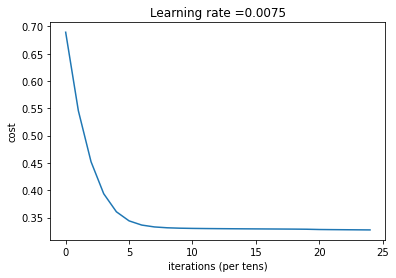

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 41, 57, 1]
Cost after iteration 0: 0.692980
Cost after iteration 100: 0.551646
Cost after iteration 200: 0.461910
Cost after iteration 300: 0.404416
Cost after iteration 400: 0.369964
Cost after iteration 500: 0.350830
Cost after iteration 600: 0.340846
Cost after iteration 700: 0.335881
Cost after iteration 800: 0.333457
Cost after iteration 900: 0.332259
Cost after iteration 1000: 0.331638
Cost after iteration 1100: 0.331287
Cost after iteration 1200: 0.331065
Cost after iteration 1300: 0.330904
Cost after iteration 1400: 0.330765
Cost after iteration 1500: 0.330632
Cost after iteration 1600: 0.330504
Cost after iteration 1700: 0.330372
Cost after iteration 1800: 0.330236
Cost after iteration 1900: 0.330094
Cost after iteration 2000: 0.329935
Cost after iteration 2100: 0.329742
Cost after iteration 2200: 0.329539
Cost after iteration 2300: 0.329371
Cost after 

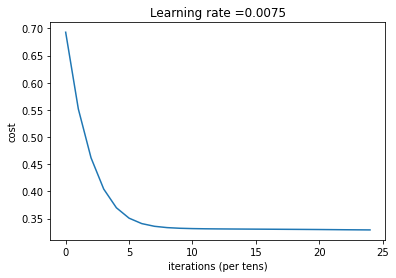

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 41, 57, 1]
Cost after iteration 0: 0.694366
Cost after iteration 100: 0.560979
Cost after iteration 200: 0.471834
Cost after iteration 300: 0.412944
Cost after iteration 400: 0.375347
Cost after iteration 500: 0.353198
Cost after iteration 600: 0.341064
Cost after iteration 700: 0.334680
Cost after iteration 800: 0.331242
Cost after iteration 900: 0.329379
Cost after iteration 1000: 0.328406
Cost after iteration 1100: 0.327837
Cost after iteration 1200: 0.327456
Cost after iteration 1300: 0.327161
Cost after iteration 1400: 0.326906
Cost after iteration 1500: 0.326666
Cost after iteration 1600: 0.326432
Cost after iteration 1700: 0.326193
Cost after iteration 1800: 0.325941
Cost after iteration 1900: 0.325679
Cost after iteration 2000: 0.325410
Cost after iteration 2100: 0.325136
Cost after iteration 2200: 0.324845
Cost after iteration 2300: 0.324522
Cost after 

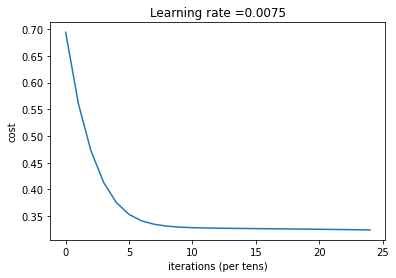

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 49, 57, 1]
Cost after iteration 0: 0.693140
Cost after iteration 100: 0.550501
Cost after iteration 200: 0.461089
Cost after iteration 300: 0.400576
Cost after iteration 400: 0.364241
Cost after iteration 500: 0.344869
Cost after iteration 600: 0.335671
Cost after iteration 700: 0.331640
Cost after iteration 800: 0.329906
Cost after iteration 900: 0.329103
Cost after iteration 1000: 0.328653
Cost after iteration 1100: 0.328332
Cost after iteration 1200: 0.328050
Cost after iteration 1300: 0.327775
Cost after iteration 1400: 0.327492
Cost after iteration 1500: 0.327195
Cost after iteration 1600: 0.326880
Cost after iteration 1700: 0.326545
Cost after iteration 1800: 0.326187
Cost after iteration 1900: 0.325804
Cost after iteration 2000: 0.325391
Cost after iteration 2100: 0.324938
Cost after iteration 2200: 0.324436
Cost after iteration 2300: 0.323840
Cost after i

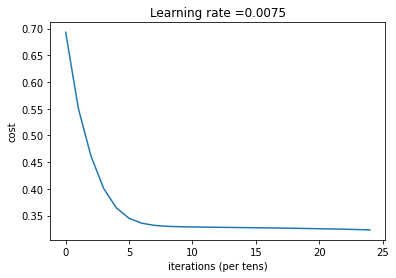

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 49, 57, 1]
Cost after iteration 0: 0.692734
Cost after iteration 100: 0.534775
Cost after iteration 200: 0.433782
Cost after iteration 300: 0.375552
Cost after iteration 400: 0.347952
Cost after iteration 500: 0.336984
Cost after iteration 600: 0.333022
Cost after iteration 700: 0.331624
Cost after iteration 800: 0.331084
Cost after iteration 900: 0.330819
Cost after iteration 1000: 0.330652
Cost after iteration 1100: 0.330518
Cost after iteration 1200: 0.330401
Cost after iteration 1300: 0.330292
Cost after iteration 1400: 0.330187
Cost after iteration 1500: 0.330083
Cost after iteration 1600: 0.329978
Cost after iteration 1700: 0.329872
Cost after iteration 1800: 0.329764
Cost after iteration 1900: 0.329655
Cost after iteration 2000: 0.329544
Cost after iteration 2100: 0.329430
Cost after iteration 2200: 0.329315
Cost after iteration 2300: 0.329200
Cost after i

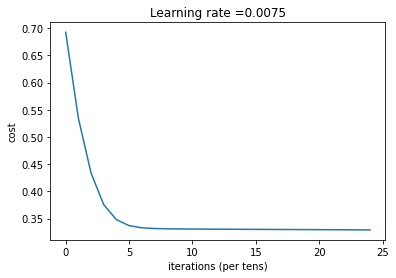

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 49, 57, 1]
Cost after iteration 0: 0.699172
Cost after iteration 100: 0.558691
Cost after iteration 200: 0.464950
Cost after iteration 300: 0.401275
Cost after iteration 400: 0.363844
Cost after iteration 500: 0.345337
Cost after iteration 600: 0.337360
Cost after iteration 700: 0.334148
Cost after iteration 800: 0.332813
Cost after iteration 900: 0.332169
Cost after iteration 1000: 0.331864
Cost after iteration 1100: 0.331680
Cost after iteration 1200: 0.331541
Cost after iteration 1300: 0.331420
Cost after iteration 1400: 0.331308
Cost after iteration 1500: 0.331199
Cost after iteration 1600: 0.331091
Cost after iteration 1700: 0.330983
Cost after iteration 1800: 0.330875
Cost after iteration 1900: 0.330768
Cost after iteration 2000: 0.330659
Cost after iteration 2100: 0.330550
Cost after iteration 2200: 0.330439
Cost after iteration 2300: 0.330327
Cost after 

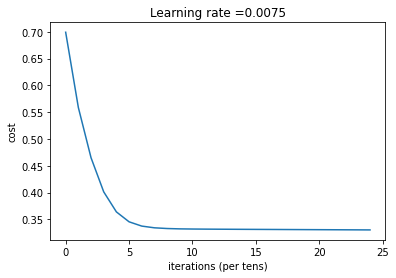

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 49, 57, 1]
Cost after iteration 0: 0.682985
Cost after iteration 100: 0.523319
Cost after iteration 200: 0.417783
Cost after iteration 300: 0.361934
Cost after iteration 400: 0.339468
Cost after iteration 500: 0.332226
Cost after iteration 600: 0.330060
Cost after iteration 700: 0.329276
Cost after iteration 800: 0.328795
Cost after iteration 900: 0.328419
Cost after iteration 1000: 0.328135
Cost after iteration 1100: 0.327900
Cost after iteration 1200: 0.327686
Cost after iteration 1300: 0.327483
Cost after iteration 1400: 0.327282
Cost after iteration 1500: 0.327080
Cost after iteration 1600: 0.326876
Cost after iteration 1700: 0.326671
Cost after iteration 1800: 0.326464
Cost after iteration 1900: 0.326254
Cost after iteration 2000: 0.326040
Cost after iteration 2100: 0.325822
Cost after iteration 2200: 0.325599
Cost after iteration 2300: 0.325371
Cost after 

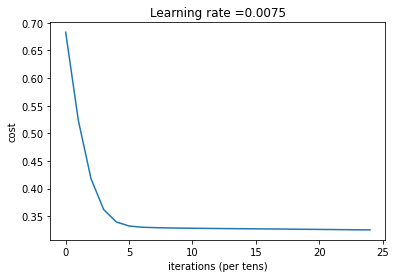

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 49, 57, 1]
Cost after iteration 0: 0.689882
Cost after iteration 100: 0.544105
Cost after iteration 200: 0.450151
Cost after iteration 300: 0.392250
Cost after iteration 400: 0.359831
Cost after iteration 500: 0.343498
Cost after iteration 600: 0.335924
Cost after iteration 700: 0.332537
Cost after iteration 800: 0.331007
Cost after iteration 900: 0.330289
Cost after iteration 1000: 0.329915
Cost after iteration 1100: 0.329680
Cost after iteration 1200: 0.329496
Cost after iteration 1300: 0.329307
Cost after iteration 1400: 0.329144
Cost after iteration 1500: 0.329007
Cost after iteration 1600: 0.328875
Cost after iteration 1700: 0.328742
Cost after iteration 1800: 0.328595
Cost after iteration 1900: 0.328430
Cost after iteration 2000: 0.328220
Cost after iteration 2100: 0.328001
Cost after iteration 2200: 0.327821
Cost after iteration 2300: 0.327657
Cost after 

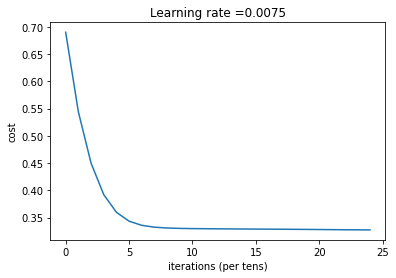

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 49, 57, 1]
Cost after iteration 0: 0.691715
Cost after iteration 100: 0.550762
Cost after iteration 200: 0.460865
Cost after iteration 300: 0.403549
Cost after iteration 400: 0.369277
Cost after iteration 500: 0.350368
Cost after iteration 600: 0.340619
Cost after iteration 700: 0.335824
Cost after iteration 800: 0.333514
Cost after iteration 900: 0.332387
Cost after iteration 1000: 0.331811
Cost after iteration 1100: 0.331493
Cost after iteration 1200: 0.331296
Cost after iteration 1300: 0.331157
Cost after iteration 1400: 0.331044
Cost after iteration 1500: 0.330945
Cost after iteration 1600: 0.330853
Cost after iteration 1700: 0.330767
Cost after iteration 1800: 0.330682
Cost after iteration 1900: 0.330600
Cost after iteration 2000: 0.330520
Cost after iteration 2100: 0.330439
Cost after iteration 2200: 0.330360
Cost after iteration 2300: 0.330280
Cost after 

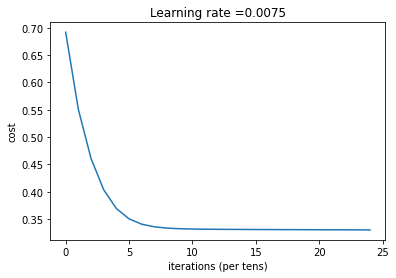

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 49, 57, 1]
Cost after iteration 0: 0.694703
Cost after iteration 100: 0.560977
Cost after iteration 200: 0.472890
Cost after iteration 300: 0.415662
Cost after iteration 400: 0.379114
Cost after iteration 500: 0.357094
Cost after iteration 600: 0.344606
Cost after iteration 700: 0.337714
Cost after iteration 800: 0.333905
Cost after iteration 900: 0.331694
Cost after iteration 1000: 0.330479
Cost after iteration 1100: 0.329795
Cost after iteration 1200: 0.329372
Cost after iteration 1300: 0.329086
Cost after iteration 1400: 0.328868
Cost after iteration 1500: 0.328680
Cost after iteration 1600: 0.328509
Cost after iteration 1700: 0.328350
Cost after iteration 1800: 0.328197
Cost after iteration 1900: 0.328043
Cost after iteration 2000: 0.327864
Cost after iteration 2100: 0.327644
Cost after iteration 2200: 0.327446
Cost after iteration 2300: 0.327271
Cost after 

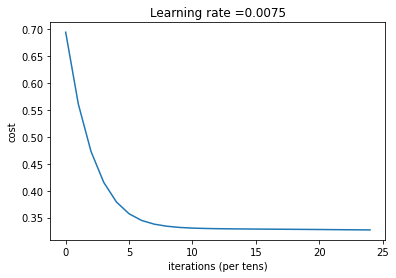

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 49, 57, 1]
Cost after iteration 0: 0.693402
Cost after iteration 100: 0.536689
Cost after iteration 200: 0.441068
Cost after iteration 300: 0.385600
Cost after iteration 400: 0.356248
Cost after iteration 500: 0.342037
Cost after iteration 600: 0.335527
Cost after iteration 700: 0.332596
Cost after iteration 800: 0.331242
Cost after iteration 900: 0.330563
Cost after iteration 1000: 0.330178
Cost after iteration 1100: 0.329919
Cost after iteration 1200: 0.329713
Cost after iteration 1300: 0.329530
Cost after iteration 1400: 0.329348
Cost after iteration 1500: 0.329157
Cost after iteration 1600: 0.328975
Cost after iteration 1700: 0.328803
Cost after iteration 1800: 0.328634
Cost after iteration 1900: 0.328469
Cost after iteration 2000: 0.328310
Cost after iteration 2100: 0.328154
Cost after iteration 2200: 0.328000
Cost after iteration 2300: 0.327846
Cost after 

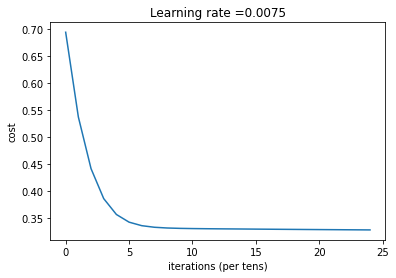

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 1, 57, 57, 1]
Cost after iteration 0: 0.693149
Cost after iteration 100: 0.528582
Cost after iteration 200: 0.434748
Cost after iteration 300: 0.379289
Cost after iteration 400: 0.350608
Cost after iteration 500: 0.337746
Cost after iteration 600: 0.332290
Cost after iteration 700: 0.329980
Cost after iteration 800: 0.328921
Cost after iteration 900: 0.328336
Cost after iteration 1000: 0.327921
Cost after iteration 1100: 0.327555
Cost after iteration 1200: 0.327154
Cost after iteration 1300: 0.326600
Cost after iteration 1400: 0.326079
Cost after iteration 1500: 0.325564
Cost after iteration 1600: 0.325000
Cost after iteration 1700: 0.324293
Cost after iteration 1800: 0.323619
Cost after iteration 1900: 0.322972
Cost after iteration 2000: 0.322320
Cost after iteration 2100: 0.321646
Cost after iteration 2200: 0.320945
Cost after iteration 2300: 0.320208
Cost after i

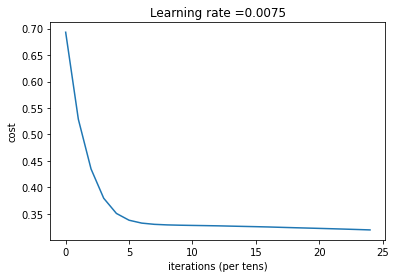

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 9, 57, 57, 1]
Cost after iteration 0: 0.691321
Cost after iteration 100: 0.539062
Cost after iteration 200: 0.437381
Cost after iteration 300: 0.376905
Cost after iteration 400: 0.347820
Cost after iteration 500: 0.336274
Cost after iteration 600: 0.332084
Cost after iteration 700: 0.330517
Cost after iteration 800: 0.329909
Cost after iteration 900: 0.329635
Cost after iteration 1000: 0.329459
Cost after iteration 1100: 0.329310
Cost after iteration 1200: 0.329165
Cost after iteration 1300: 0.329011
Cost after iteration 1400: 0.328850
Cost after iteration 1500: 0.328693
Cost after iteration 1600: 0.328540
Cost after iteration 1700: 0.328388
Cost after iteration 1800: 0.328234
Cost after iteration 1900: 0.328080
Cost after iteration 2000: 0.327922
Cost after iteration 2100: 0.327764
Cost after iteration 2200: 0.327603
Cost after iteration 2300: 0.327439
Cost after i

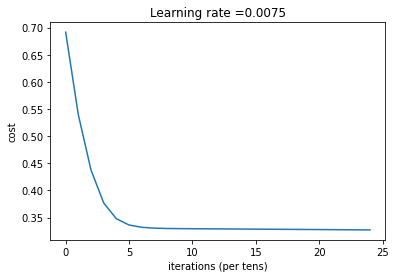

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 17, 57, 57, 1]
Cost after iteration 0: 0.698544
Cost after iteration 100: 0.564897
Cost after iteration 200: 0.476322
Cost after iteration 300: 0.415148
Cost after iteration 400: 0.375611
Cost after iteration 500: 0.352675
Cost after iteration 600: 0.340743
Cost after iteration 700: 0.335008
Cost after iteration 800: 0.332338
Cost after iteration 900: 0.331049
Cost after iteration 1000: 0.330374
Cost after iteration 1100: 0.329997
Cost after iteration 1200: 0.329763
Cost after iteration 1300: 0.329590
Cost after iteration 1400: 0.329444
Cost after iteration 1500: 0.329312
Cost after iteration 1600: 0.329184
Cost after iteration 1700: 0.329057
Cost after iteration 1800: 0.328929
Cost after iteration 1900: 0.328800
Cost after iteration 2000: 0.328669
Cost after iteration 2100: 0.328532
Cost after iteration 2200: 0.328389
Cost after iteration 2300: 0.328242
Cost after 

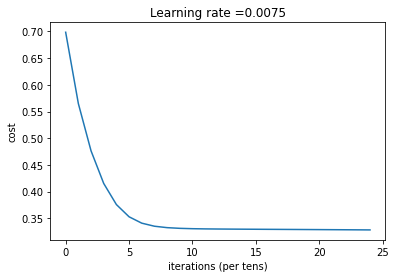

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 25, 57, 57, 1]
Cost after iteration 0: 0.696918
Cost after iteration 100: 0.527481
Cost after iteration 200: 0.426102
Cost after iteration 300: 0.372048
Cost after iteration 400: 0.346794
Cost after iteration 500: 0.336177
Cost after iteration 600: 0.331893
Cost after iteration 700: 0.330099
Cost after iteration 800: 0.329290
Cost after iteration 900: 0.328867
Cost after iteration 1000: 0.328584
Cost after iteration 1100: 0.328271
Cost after iteration 1200: 0.327983
Cost after iteration 1300: 0.327780
Cost after iteration 1400: 0.327605
Cost after iteration 1500: 0.327440
Cost after iteration 1600: 0.327277
Cost after iteration 1700: 0.327109
Cost after iteration 1800: 0.326932
Cost after iteration 1900: 0.326751
Cost after iteration 2000: 0.326570
Cost after iteration 2100: 0.326384
Cost after iteration 2200: 0.326191
Cost after iteration 2300: 0.325991
Cost after 

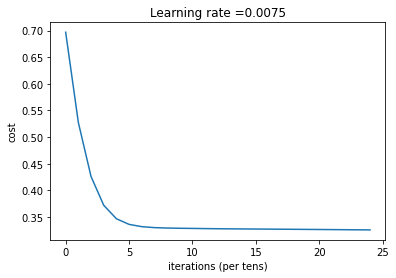

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 33, 57, 57, 1]
Cost after iteration 0: 0.689409
Cost after iteration 100: 0.544753
Cost after iteration 200: 0.448807
Cost after iteration 300: 0.389415
Cost after iteration 400: 0.357595
Cost after iteration 500: 0.342538
Cost after iteration 600: 0.335949
Cost after iteration 700: 0.333177
Cost after iteration 800: 0.331973
Cost after iteration 900: 0.331390
Cost after iteration 1000: 0.331047
Cost after iteration 1100: 0.330781
Cost after iteration 1200: 0.330541
Cost after iteration 1300: 0.330324
Cost after iteration 1400: 0.330143
Cost after iteration 1500: 0.329980
Cost after iteration 1600: 0.329827
Cost after iteration 1700: 0.329689
Cost after iteration 1800: 0.329556
Cost after iteration 1900: 0.329424
Cost after iteration 2000: 0.329293
Cost after iteration 2100: 0.329159
Cost after iteration 2200: 0.329023
Cost after iteration 2300: 0.328884
Cost after 

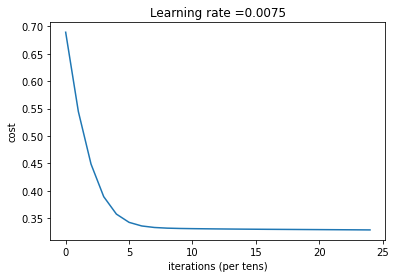

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 41, 57, 57, 1]
Cost after iteration 0: 0.693107
Cost after iteration 100: 0.534999
Cost after iteration 200: 0.440304
Cost after iteration 300: 0.385483
Cost after iteration 400: 0.356528
Cost after iteration 500: 0.342462
Cost after iteration 600: 0.335969
Cost after iteration 700: 0.333010
Cost after iteration 800: 0.331624
Cost after iteration 900: 0.330924
Cost after iteration 1000: 0.330521
Cost after iteration 1100: 0.330258
Cost after iteration 1200: 0.330054
Cost after iteration 1300: 0.329877
Cost after iteration 1400: 0.329719
Cost after iteration 1500: 0.329572
Cost after iteration 1600: 0.329436
Cost after iteration 1700: 0.329306
Cost after iteration 1800: 0.329179
Cost after iteration 1900: 0.329054
Cost after iteration 2000: 0.328929
Cost after iteration 2100: 0.328802
Cost after iteration 2200: 0.328675
Cost after iteration 2300: 0.328547
Cost after 

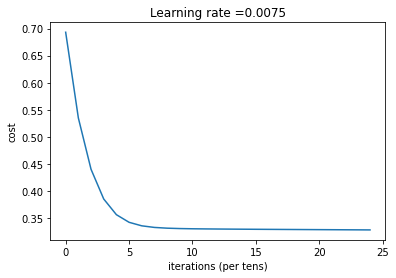

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 49, 57, 57, 1]
Cost after iteration 0: 0.692201
Cost after iteration 100: 0.559624
Cost after iteration 200: 0.467092
Cost after iteration 300: 0.405306
Cost after iteration 400: 0.366949
Cost after iteration 500: 0.346542
Cost after iteration 600: 0.336733
Cost after iteration 700: 0.332264
Cost after iteration 800: 0.330228
Cost after iteration 900: 0.329235
Cost after iteration 1000: 0.328663
Cost after iteration 1100: 0.328254
Cost after iteration 1200: 0.327909
Cost after iteration 1300: 0.327593
Cost after iteration 1400: 0.327288
Cost after iteration 1500: 0.326978
Cost after iteration 1600: 0.326698
Cost after iteration 1700: 0.326438
Cost after iteration 1800: 0.326195
Cost after iteration 1900: 0.325960
Cost after iteration 2000: 0.325725
Cost after iteration 2100: 0.325486
Cost after iteration 2200: 0.325238
Cost after iteration 2300: 0.324982
Cost after 

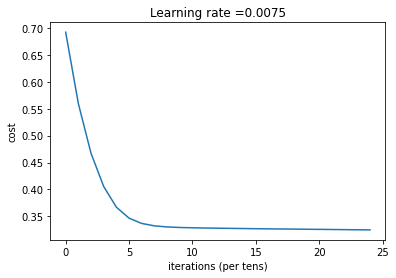

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 57, 57, 57, 1]
Cost after iteration 0: 0.694128
Cost after iteration 100: 0.559322
Cost after iteration 200: 0.462500
Cost after iteration 300: 0.401803
Cost after iteration 400: 0.366330
Cost after iteration 500: 0.347346
Cost after iteration 600: 0.337907
Cost after iteration 700: 0.333381
Cost after iteration 800: 0.331176
Cost after iteration 900: 0.329990
Cost after iteration 1000: 0.329207
Cost after iteration 1100: 0.328640
Cost after iteration 1200: 0.328226
Cost after iteration 1300: 0.327900
Cost after iteration 1400: 0.327641
Cost after iteration 1500: 0.327412
Cost after iteration 1600: 0.327200
Cost after iteration 1700: 0.326990
Cost after iteration 1800: 0.326779
Cost after iteration 1900: 0.326564
Cost after iteration 2000: 0.326334
Cost after iteration 2100: 0.326085
Cost after iteration 2200: 0.325819
Cost after iteration 2300: 0.325527
Cost after 

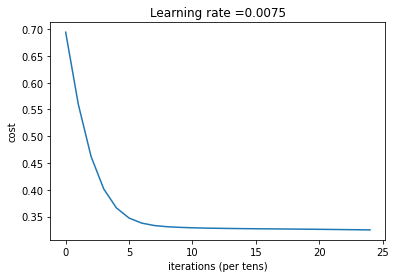

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556



In [191]:
# Define variables to save the results and the parameters
parameters_4L_cache = []
pred_train_4L_cache = []
pred_test_4L_cache = []

for neurons_L3 in range(1, x_train_flatten.shape[0]+1, 8):
  for neurons_L2 in range(1, x_train_flatten.shape[0]+1, 8):
    for neurons_L1 in range(1, x_train_flatten.shape[0]+1, 8):
      # Train the Neural Network
      layers_dims = [x_train_flatten.shape[0], neurons_L1, neurons_L2, neurons_L3 ,1]
      parameters = L_layer_model(x_train_standardize, y_train, layers_dims, num_iterations = 2500, print_cost = True)

      # Make the prediction with the training dataset
      pred_train, acurracy_train = predict(X_train_standardize, y_train, parameters, True)

      # Make the prediction with the training dataset
      pred_test, acurracy_test = predict(X_test_standardize, y_test, parameters, False)

      # Save parameters and results
      parameters_4L_cache.append(layers_dims)
      pred_train_4L_cache.append(acurracy_train)
      pred_test_4L_cache.append(acurracy_test)

In [1]:
plotAcurracy(pred_train_2L_cache, pred_test_2L_cache, '2-Layer Neural Network Acurracy')
plotAcurracy(pred_train_3L_cache, pred_test_3L_cache, '3-Layer Neural Network Acurracy')

NameError: ignored